In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/GT_labels/'
cp_data_dir = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/CP_labels/'
dl_data_dir = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/DL_labels/'

mat_cp_dir = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/IoU_CP/'
mat_dl_dir = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/IoU_DL/'

err_img_out_dir_cp = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/'
err_img_out_dir_dl = '/home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/'

all_gt_files = os.listdir(gt_data_dir)

In [3]:
def visualize(mat, seg_gt, seg_model, tag, filename, out_dir):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei gt', nb_nuc_gt)
        print('# nuclei ' + tag, nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get dummy images
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = [172, 128, 0]
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + [31, 190, 214]
        
    # pixels where under- and overdetection occured appear in pink
        
    figure, axes = plt.subplots(ncols=2, nrows=1, figsize=(30, 15))
    axes[0].imshow(seg_model)
    axes[0].set_title('prediction')
    axes[1].imshow(seg_gt)
    axes[1].set_title('ground truth')
    plt.show()
    
    plt.figure(figsize=(15,15))
    plt.imshow(error_img)
    plt.show()
    
    error_img = skimage.img_as_ubyte(error_img)
    skimage.io.imsave(out_dir + filename + '.eps', error_img)
    

1 / 50
# nuclei gt 72
# nuclei DL 65
# matches 65
# overdetections 0
# underdetections 7
# mean IoU 0.69191


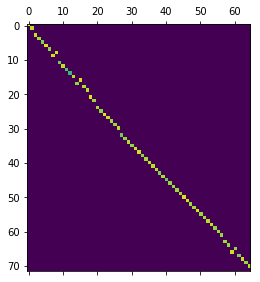

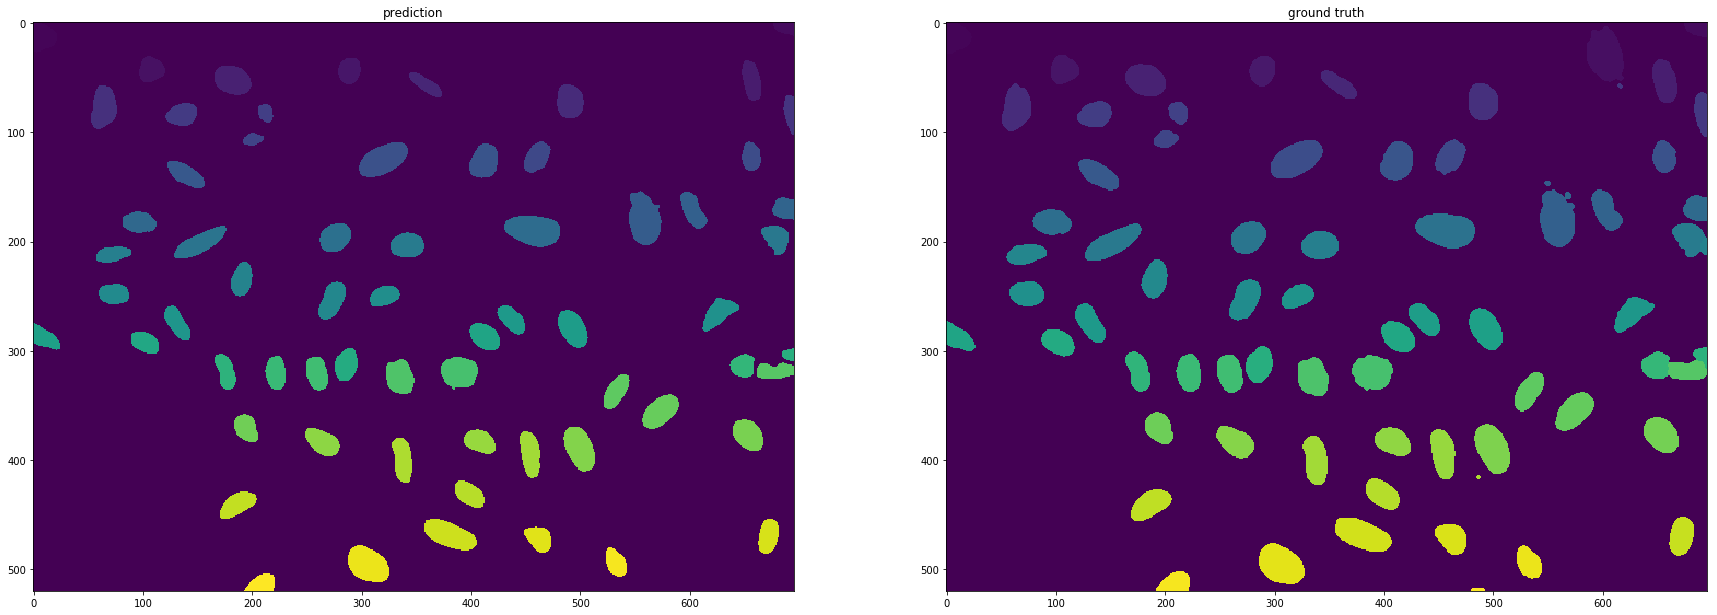

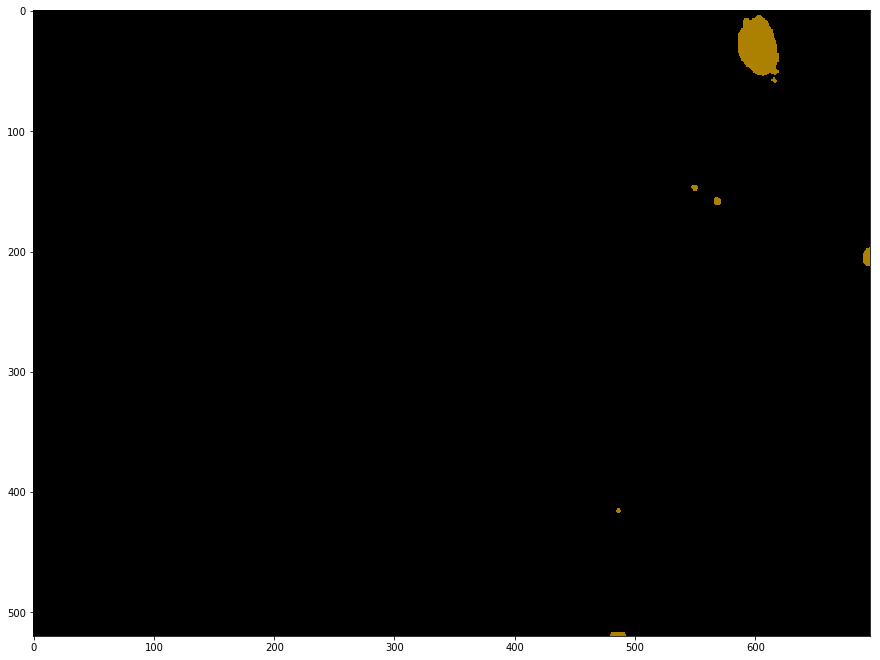

# nuclei gt 72
# nuclei CP 63
# matches 62
# overdetections 1
# underdetections 10
# mean IoU 0.777715


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B22_s6_w19397283D-2426-4942-8A0F-EB75E1D48C2D.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


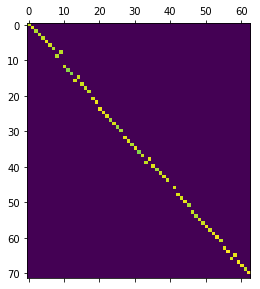

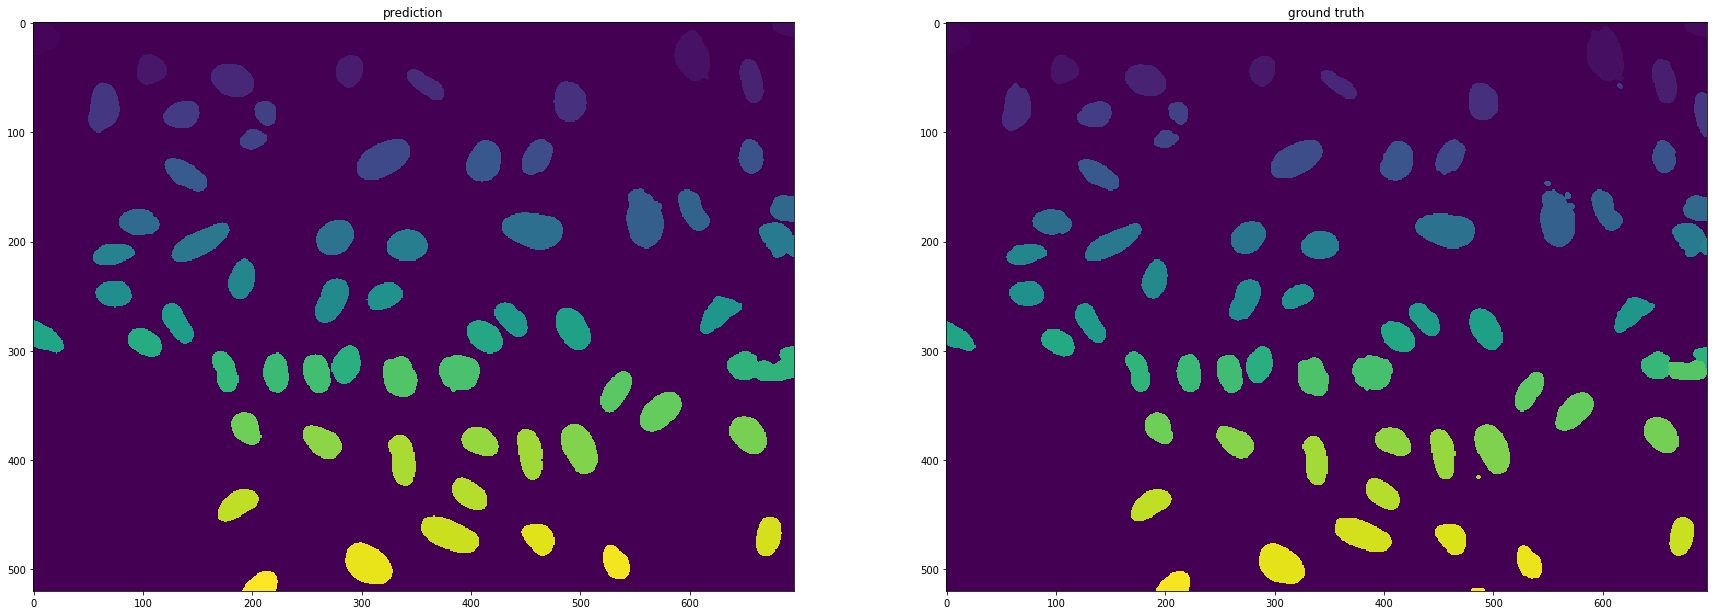

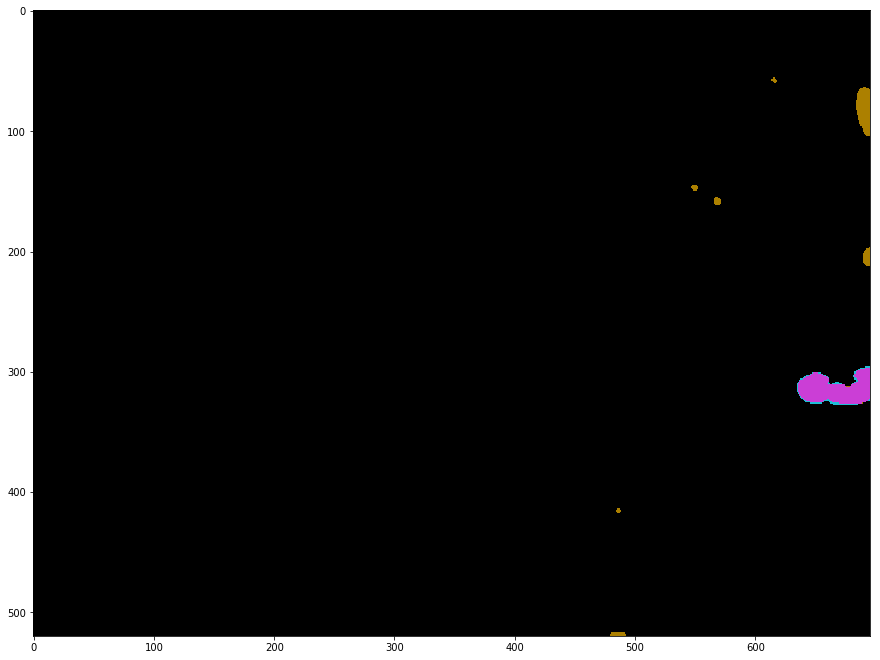

2 / 50
# nuclei gt 103
# nuclei DL 97
# matches 97
# overdetections 0
# underdetections 6
# mean IoU 0.720937


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B22_s6_w19397283D-2426-4942-8A0F-EB75E1D48C2D.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


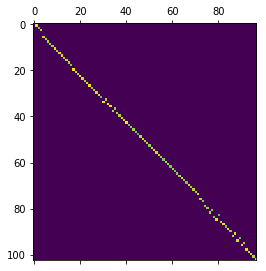

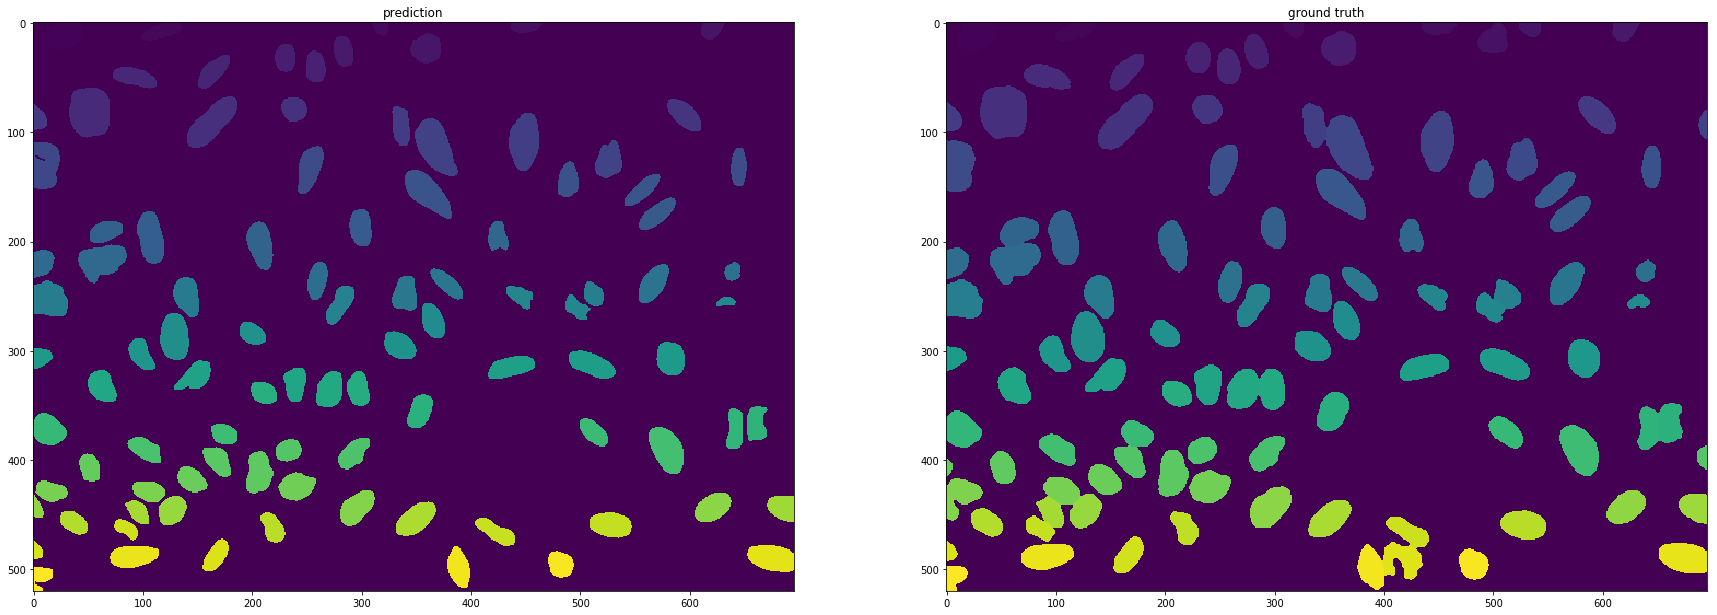

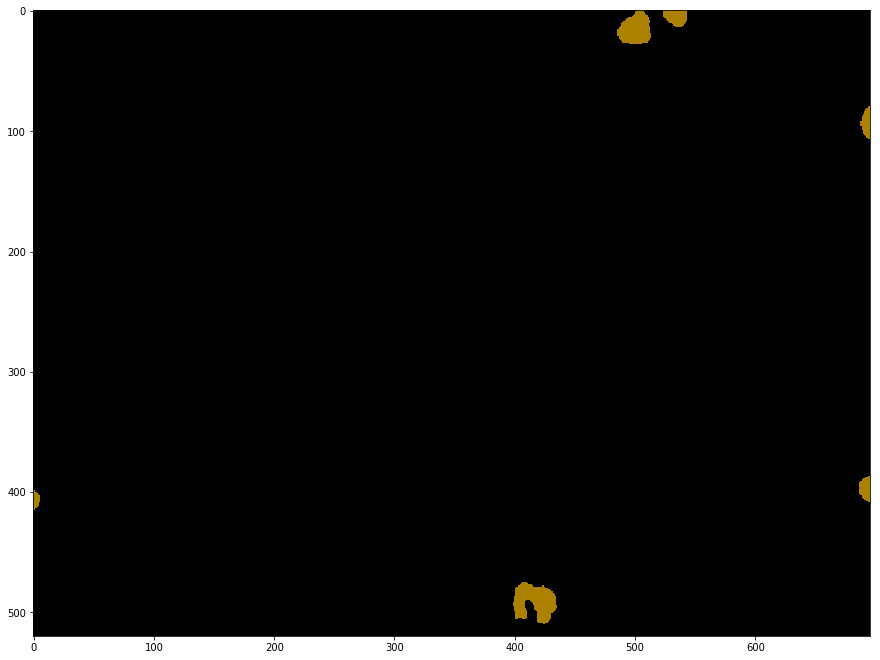

# nuclei gt 103
# nuclei CP 91
# matches 88
# overdetections 3
# underdetections 15
# mean IoU 0.744732


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B17_s7_w1215A0A98-4A76-4846-B54A-F7C1EAF84E02.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


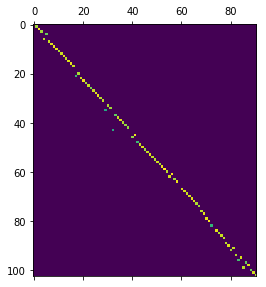

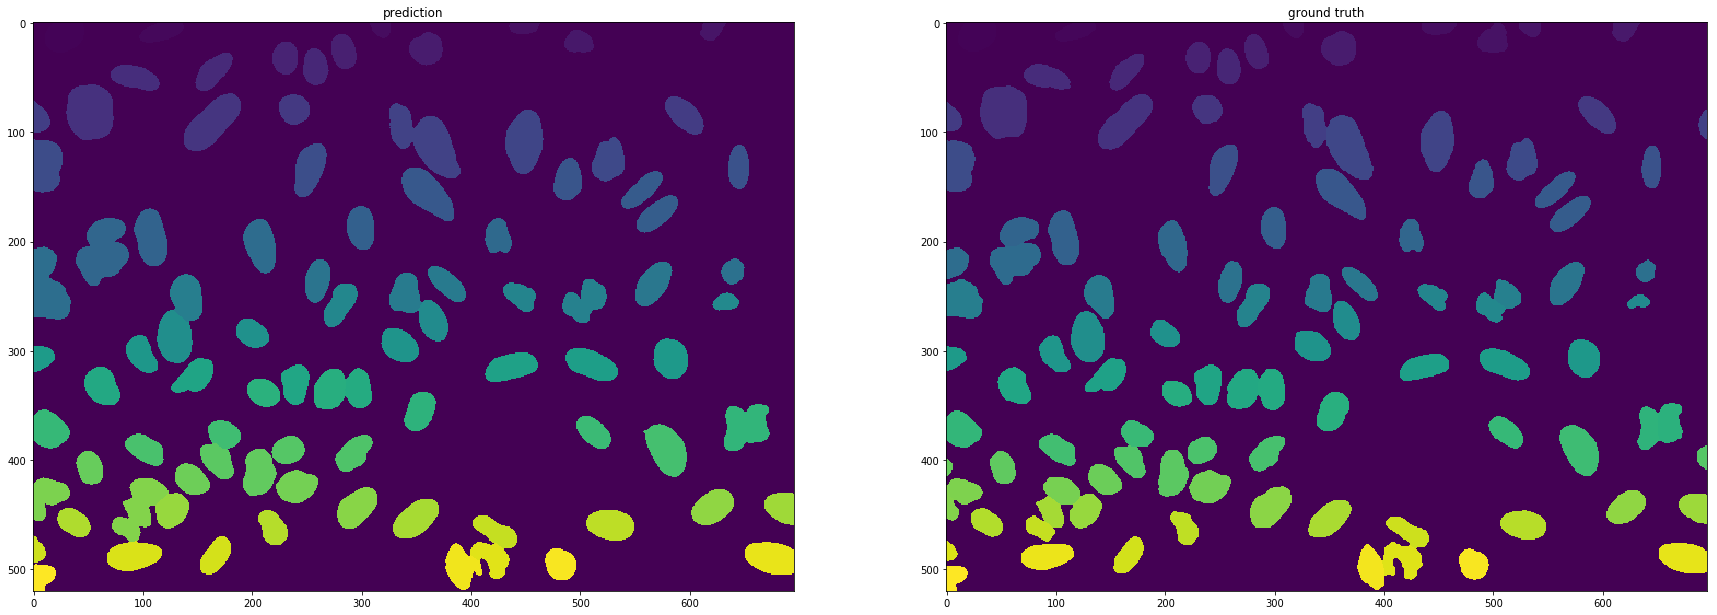

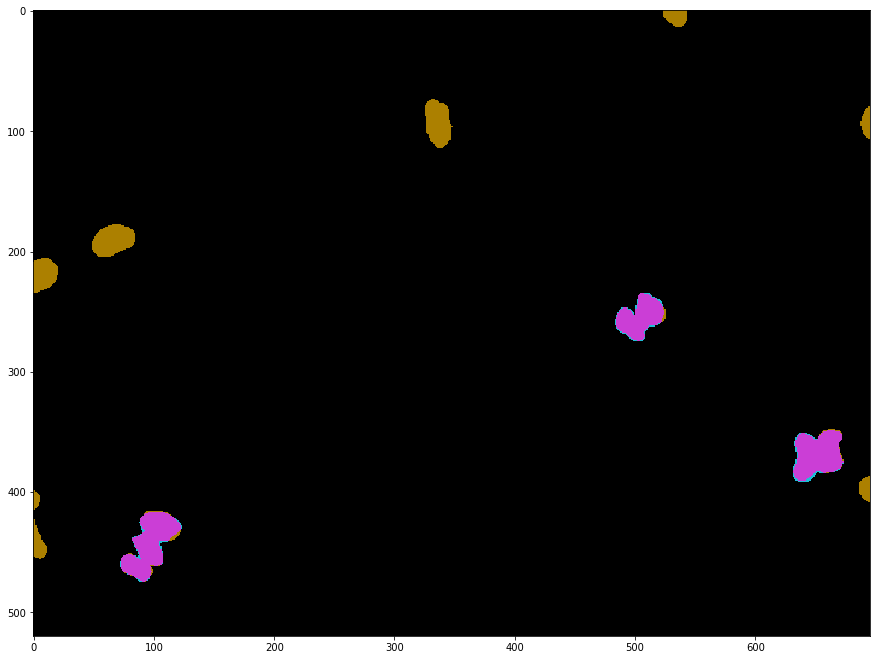

3 / 50
# nuclei gt 74
# nuclei DL 62
# matches 57
# overdetections 5
# underdetections 17
# mean IoU 0.599725


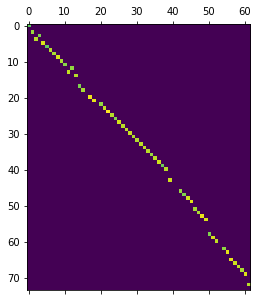

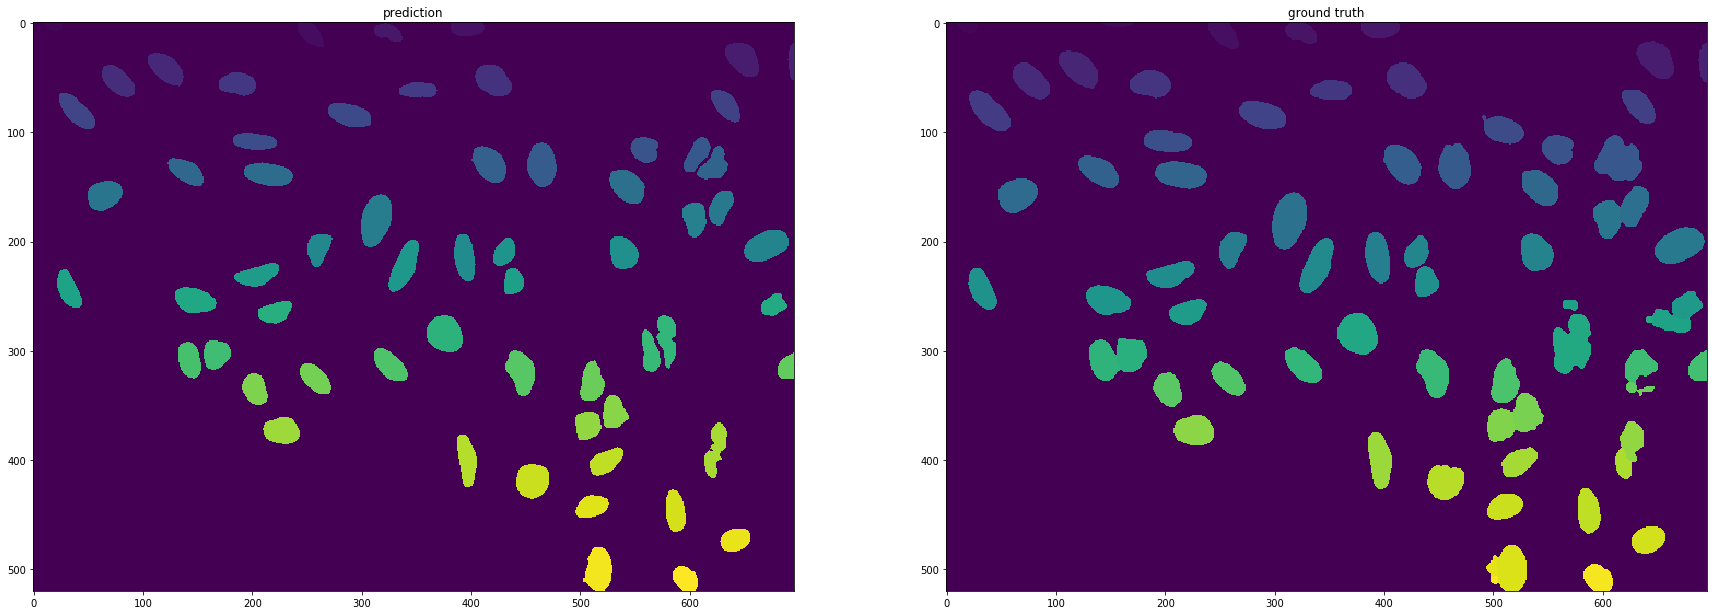

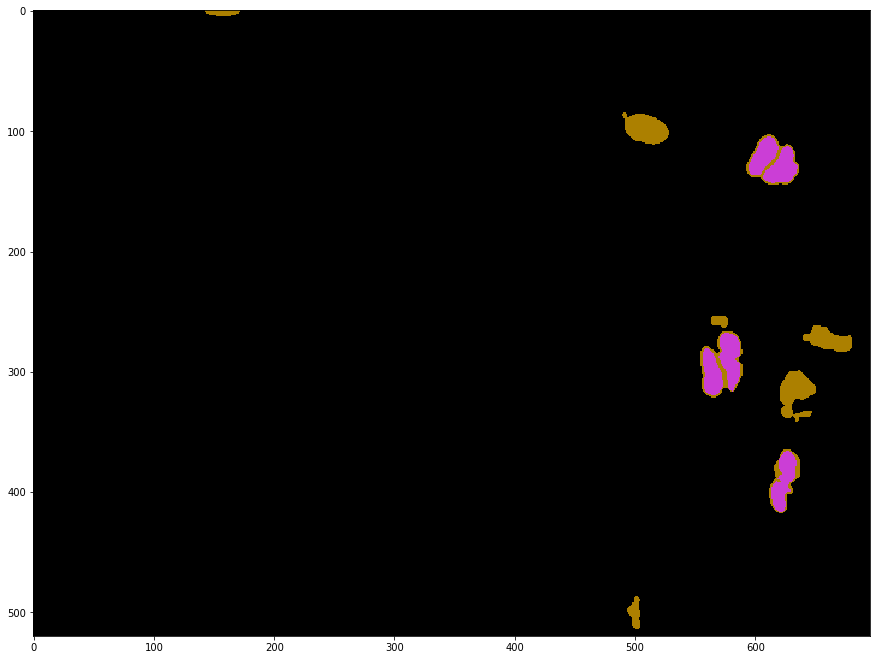

# nuclei gt 74
# nuclei CP 60
# matches 60
# overdetections 0
# underdetections 14
# mean IoU 0.728442


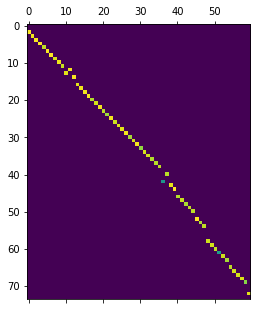

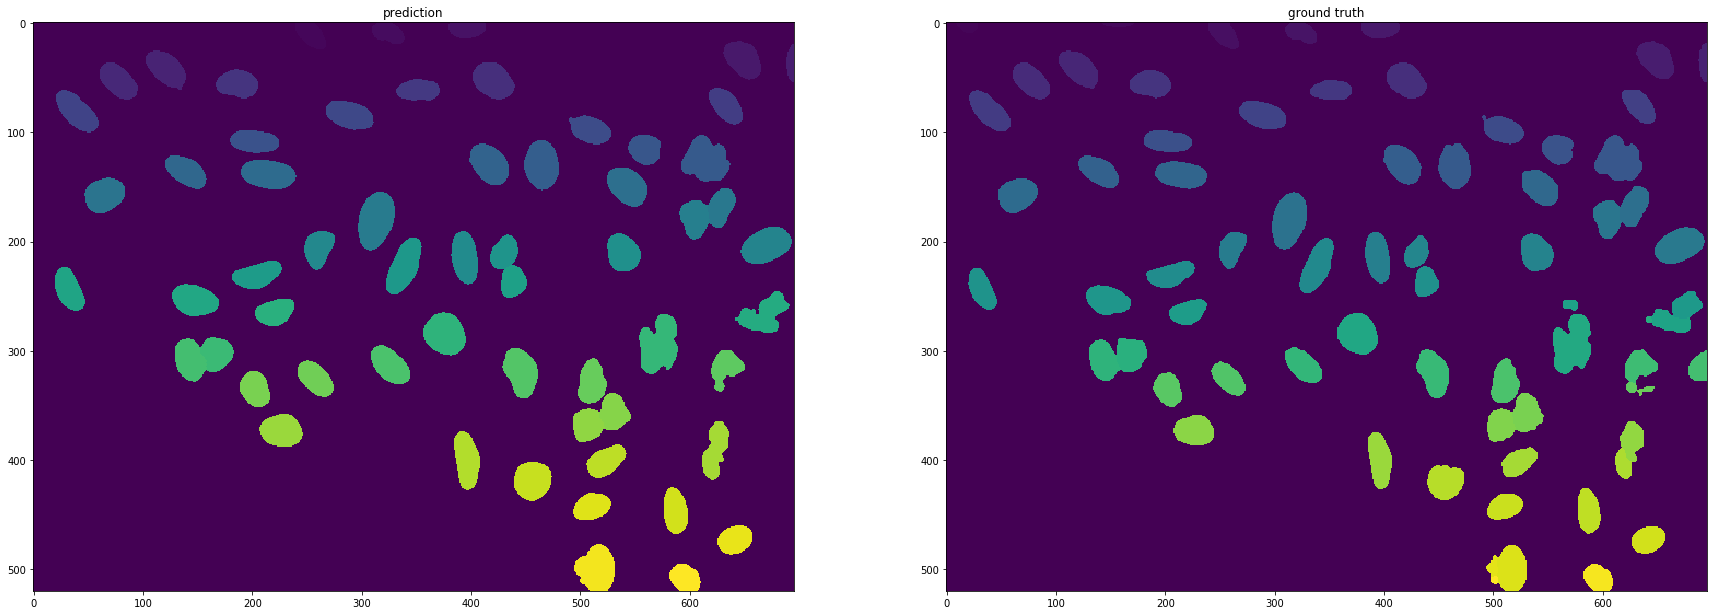

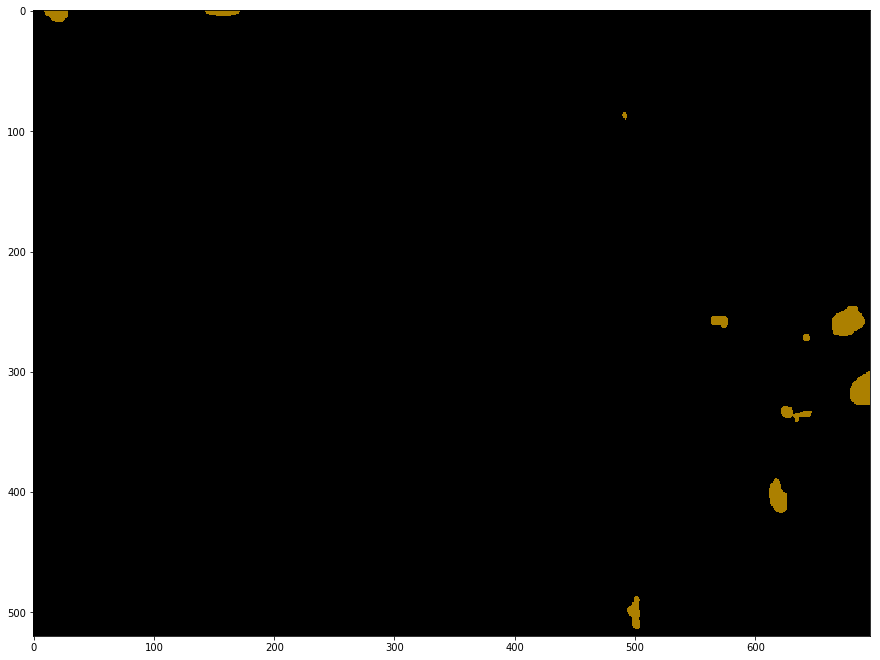

4 / 50
# nuclei gt 123
# nuclei DL 105
# matches 101
# overdetections 4
# underdetections 22
# mean IoU 0.629783


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B23_s1_w152C21D3B-75A9-4FF9-839A-23E6CE19AEEC.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


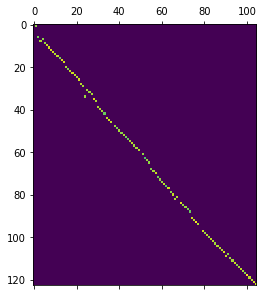

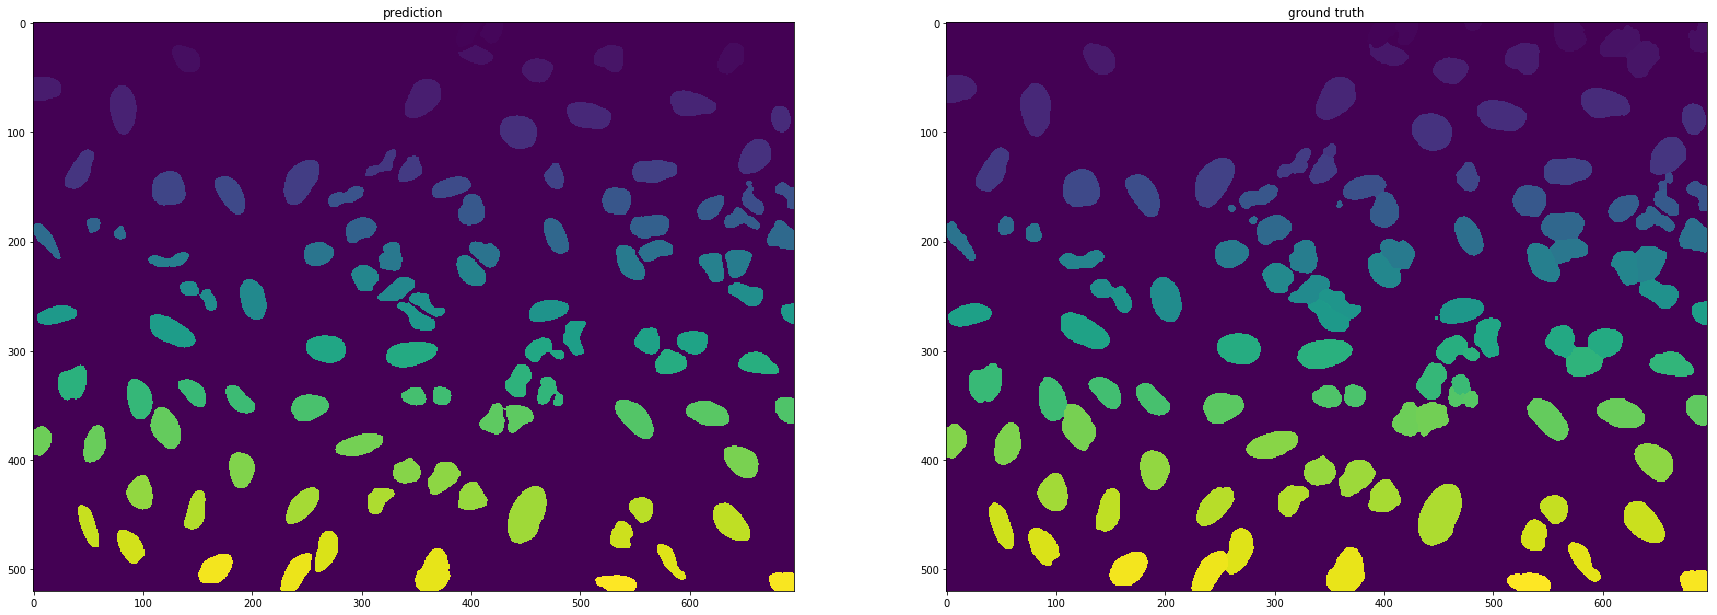

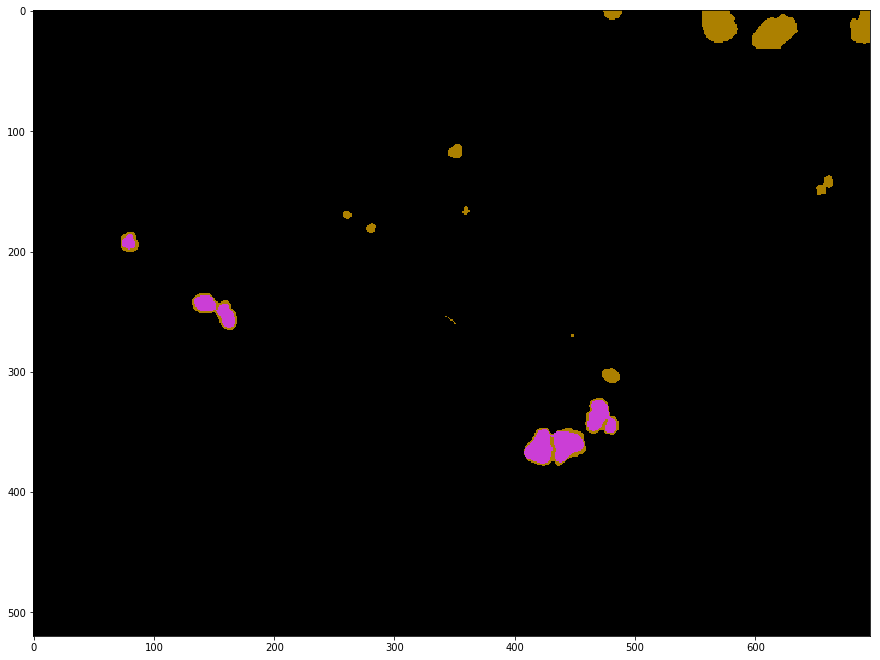

# nuclei gt 123
# nuclei CP 98
# matches 92
# overdetections 6
# underdetections 31
# mean IoU 0.661676


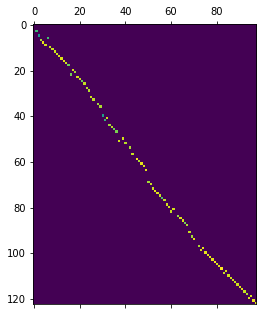

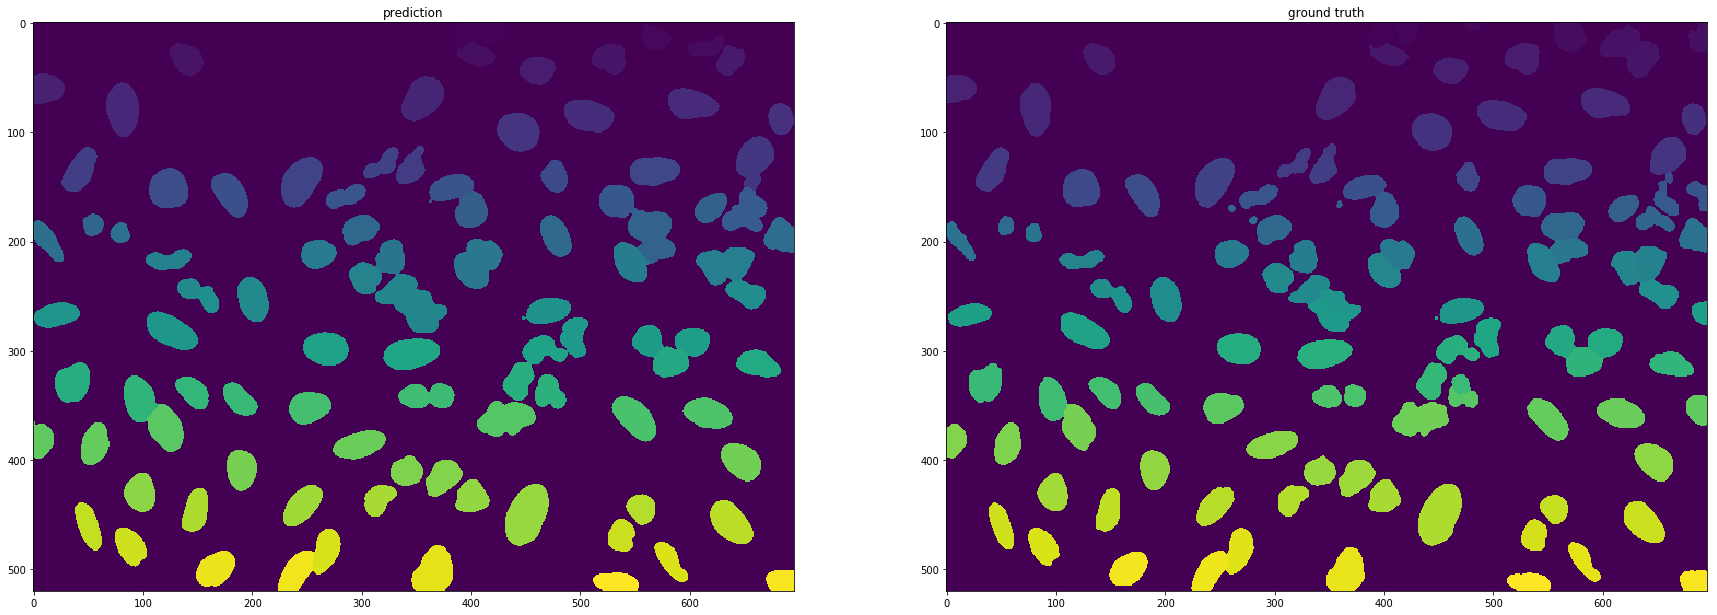

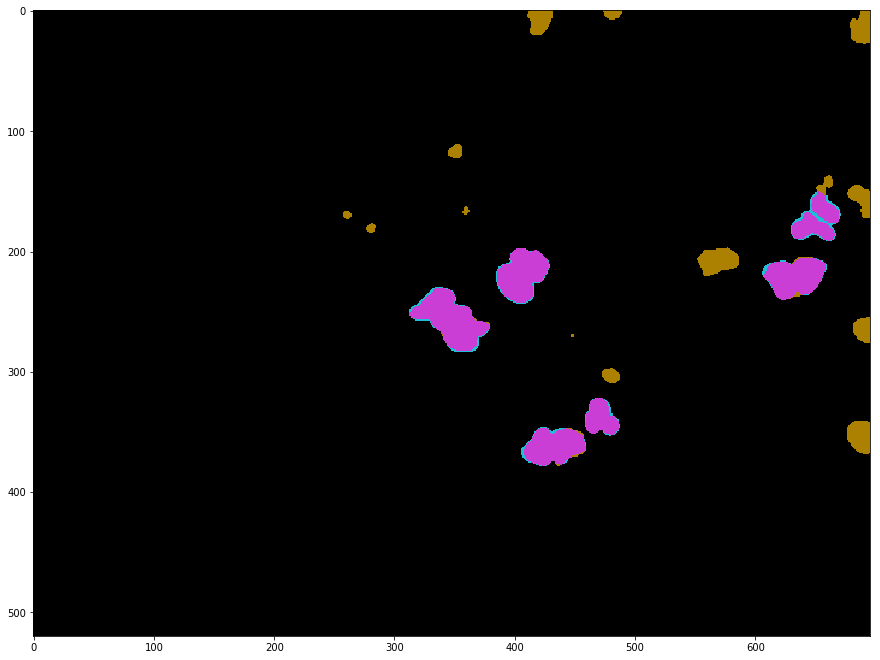

5 / 50
# nuclei gt 66
# nuclei DL 59
# matches 59
# overdetections 0
# underdetections 7
# mean IoU 0.698169


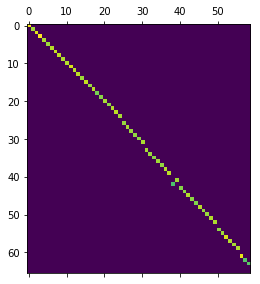

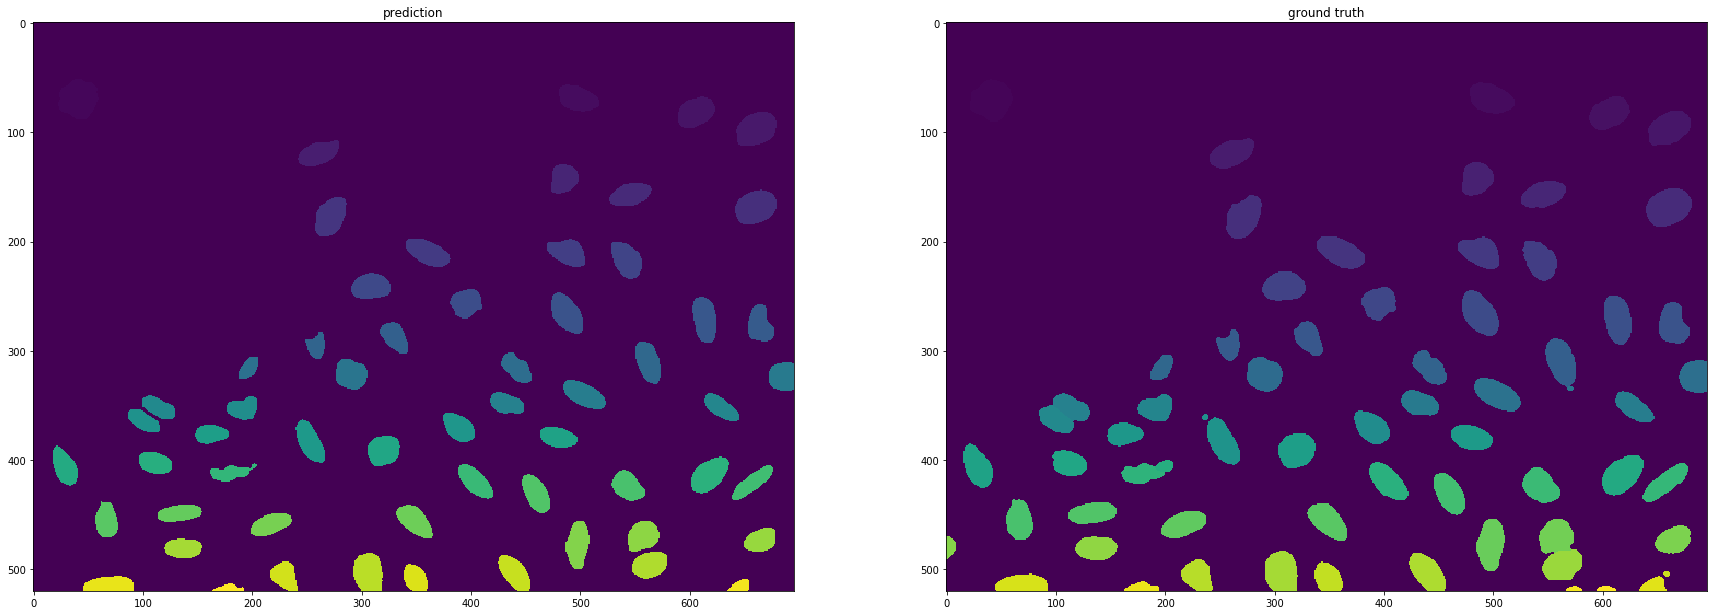

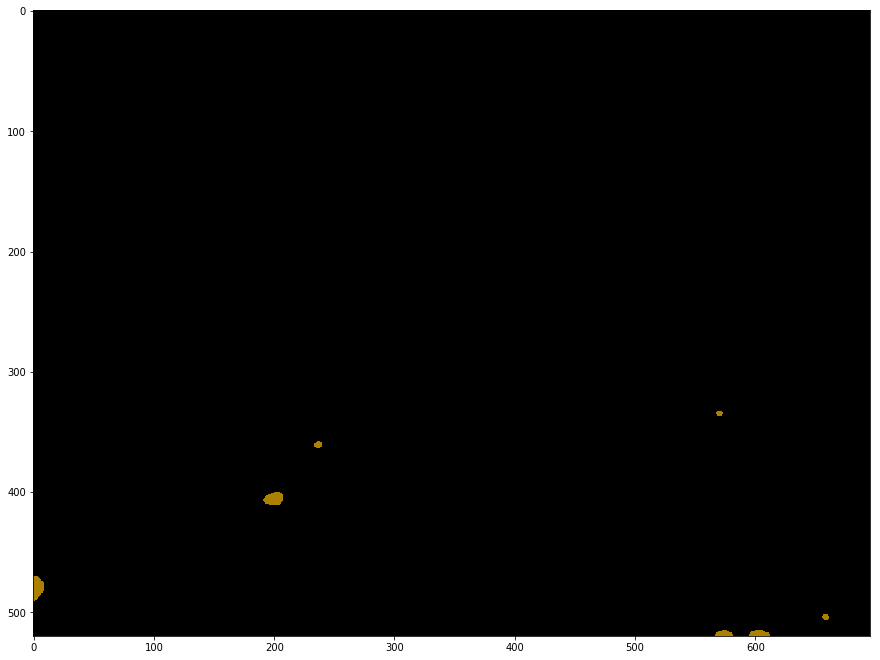

# nuclei gt 66
# nuclei CP 58
# matches 57
# overdetections 1
# underdetections 9
# mean IoU 0.759536


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


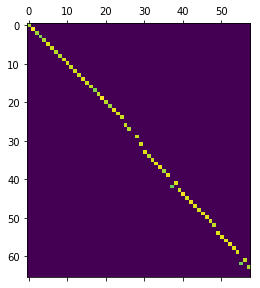

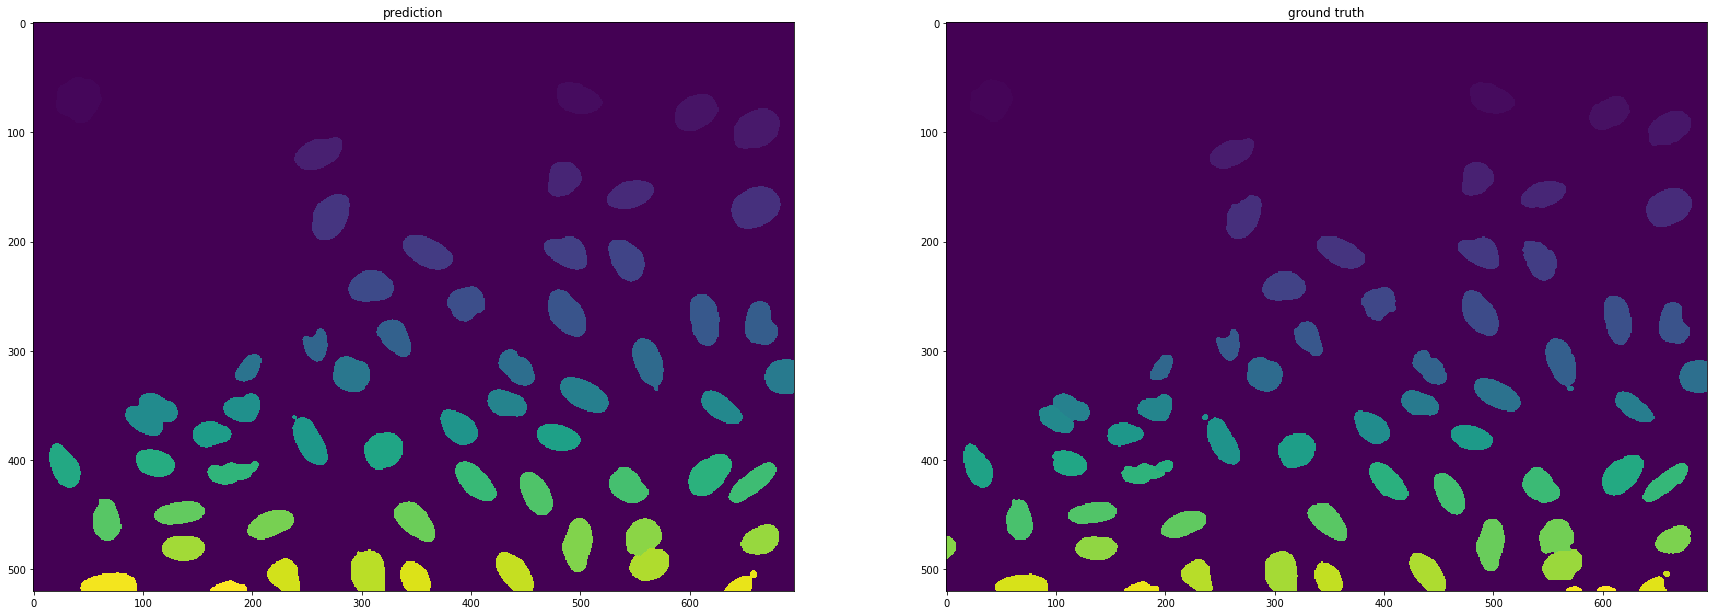

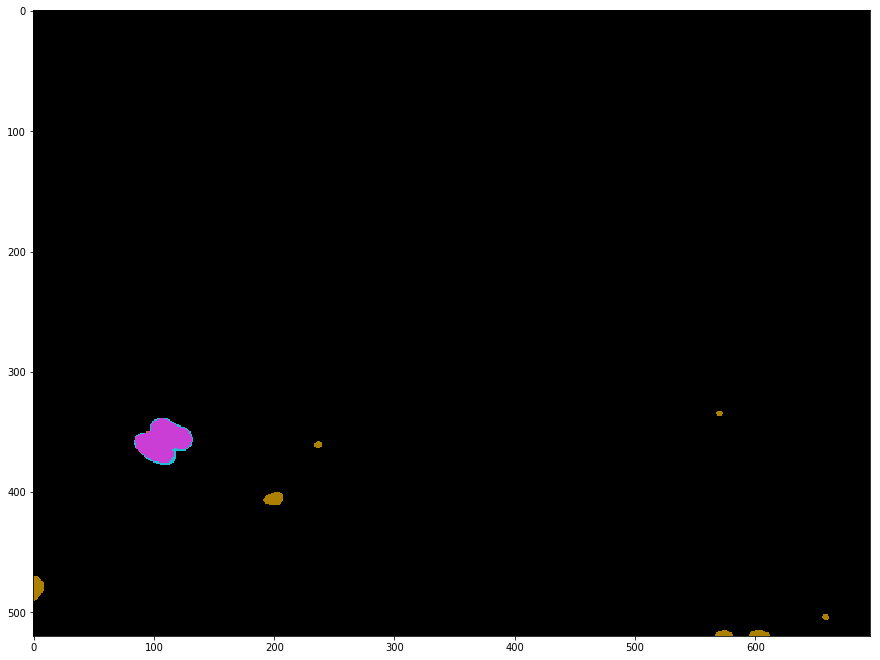

6 / 50
# nuclei gt 22
# nuclei DL 15
# matches 14
# overdetections 1
# underdetections 8
# mean IoU 0.483606


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


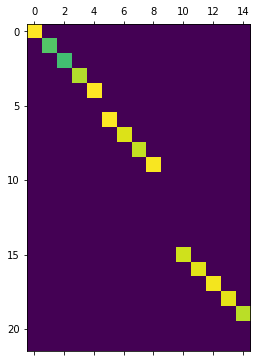

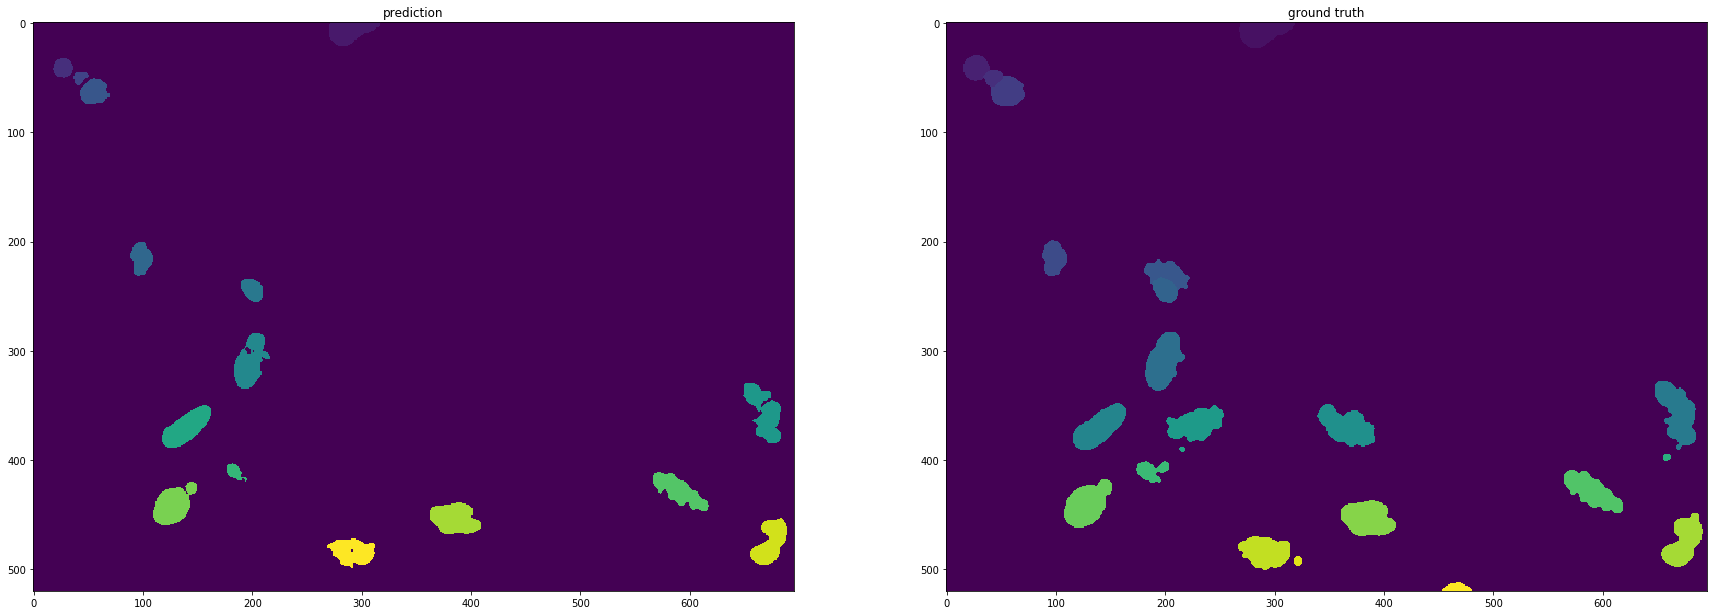

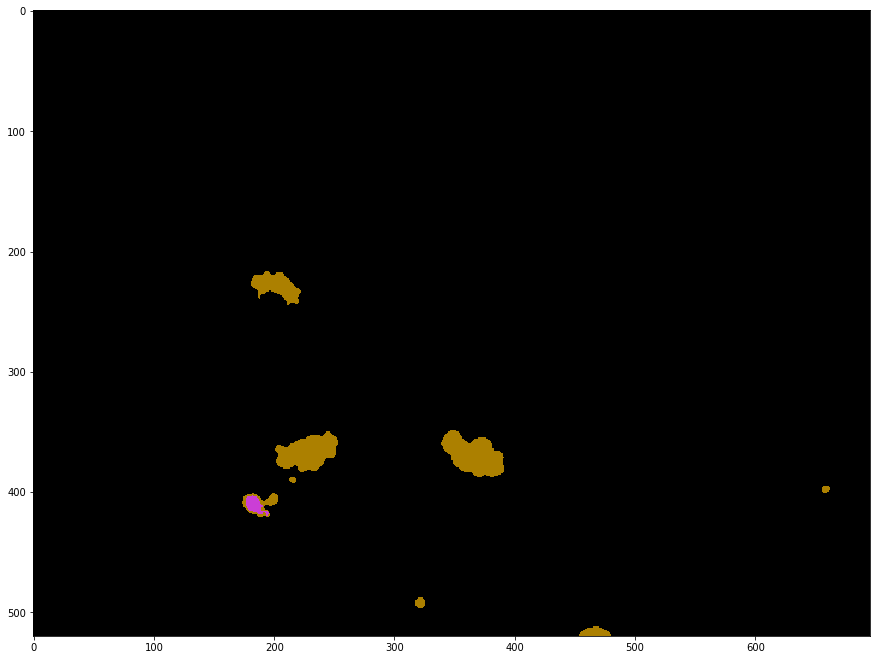

# nuclei gt 22
# nuclei CP 17
# matches 16
# overdetections 1
# underdetections 6
# mean IoU 0.619223


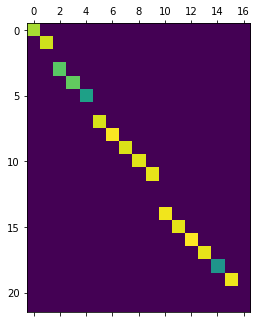

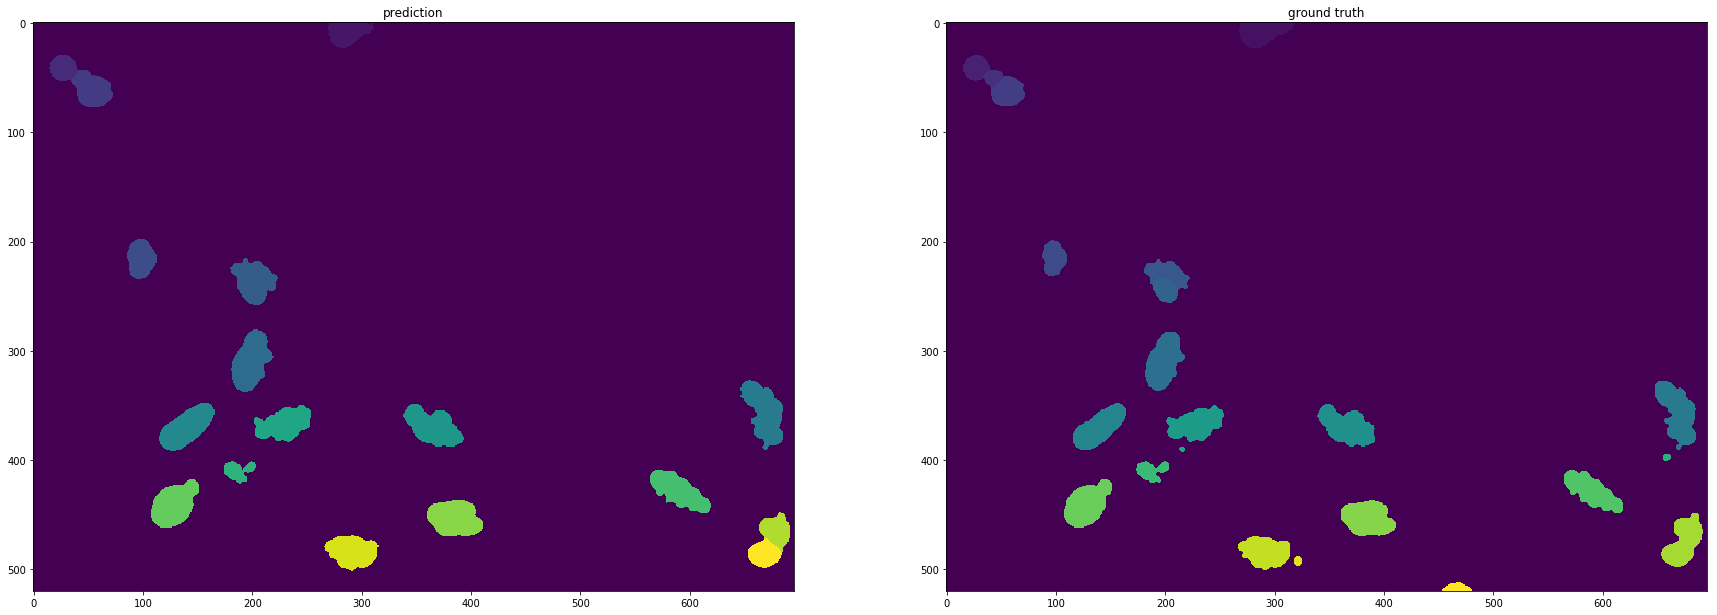

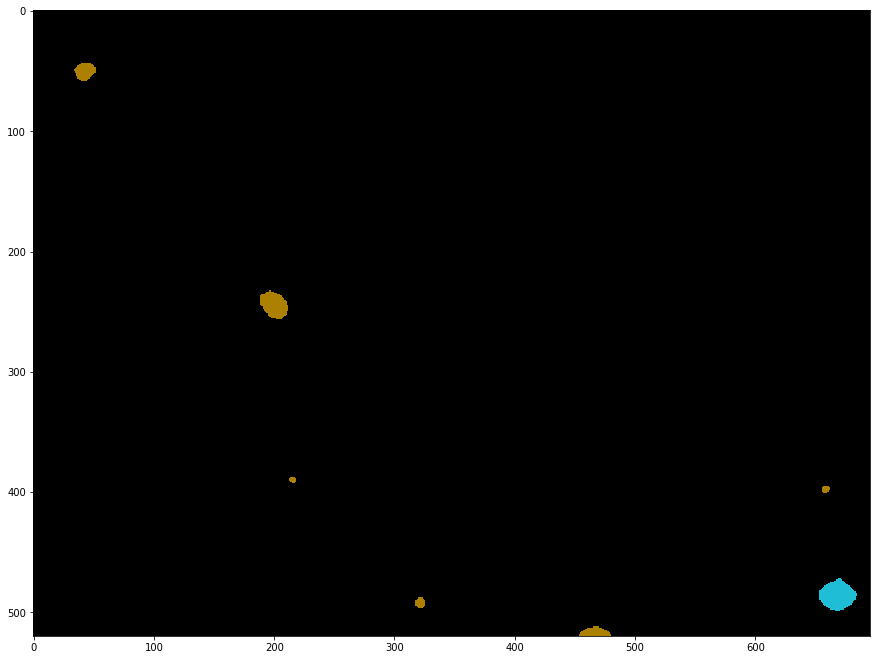

7 / 50
# nuclei gt 156
# nuclei DL 145
# matches 142
# overdetections 3
# underdetections 14
# mean IoU 0.685294


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


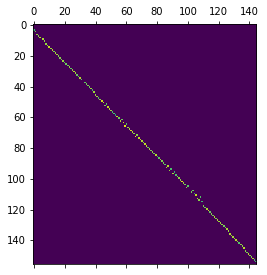

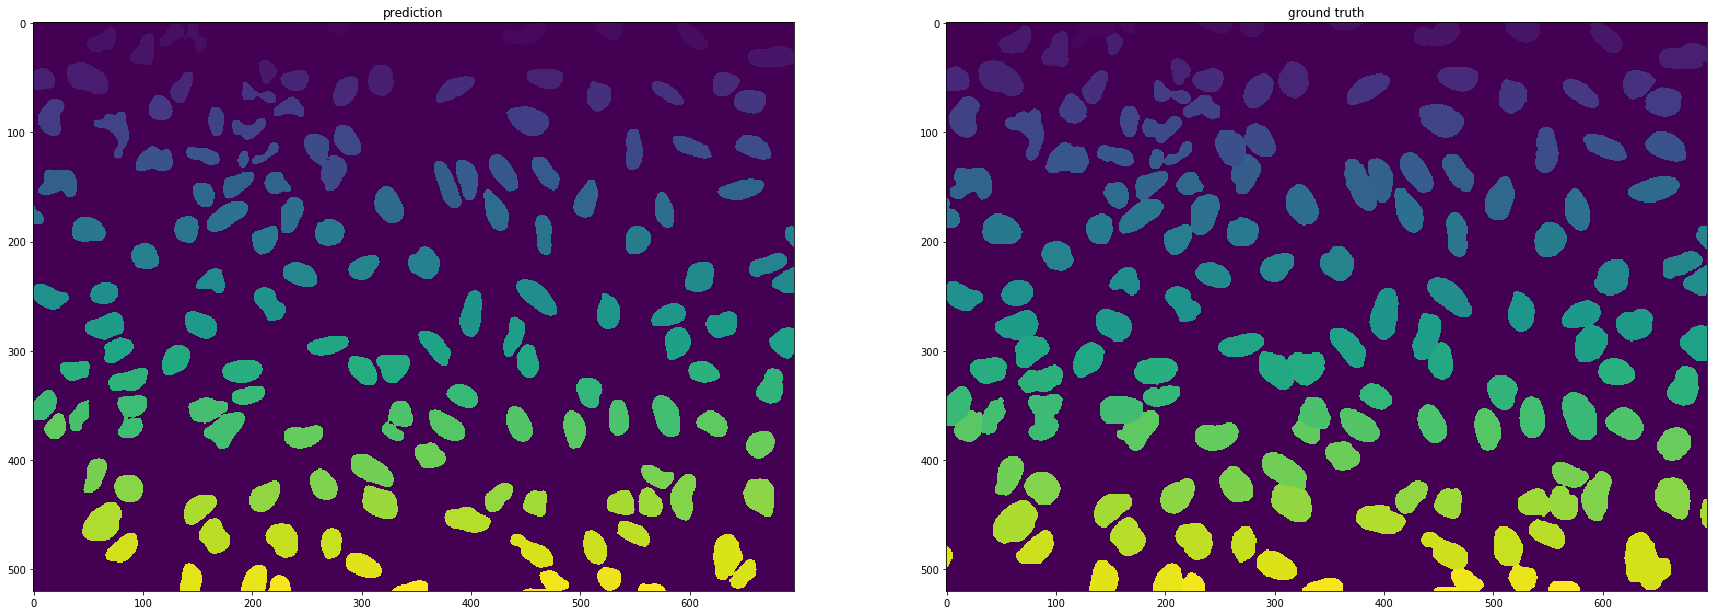

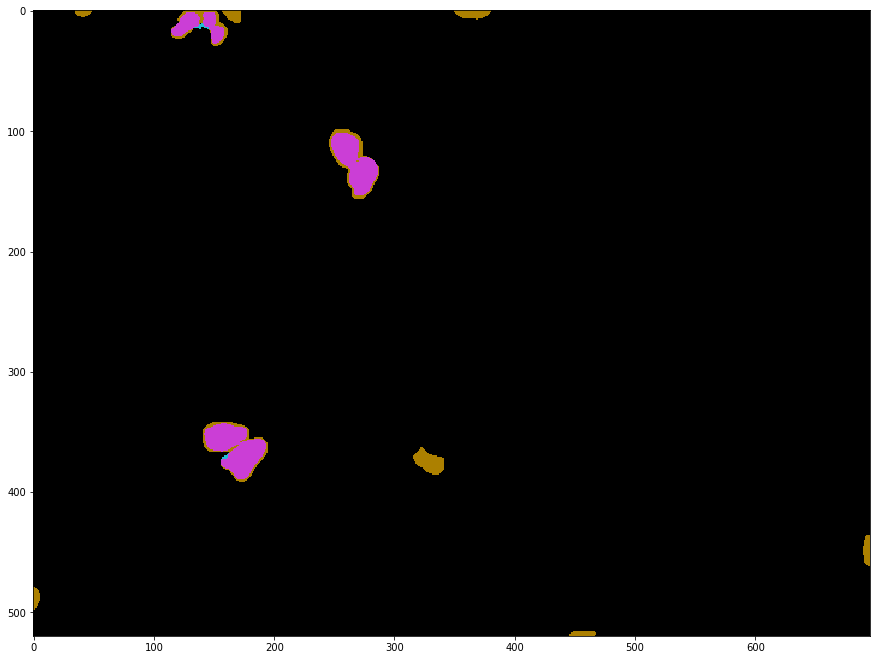

# nuclei gt 156
# nuclei CP 128
# matches 119
# overdetections 9
# underdetections 37
# mean IoU 0.671203


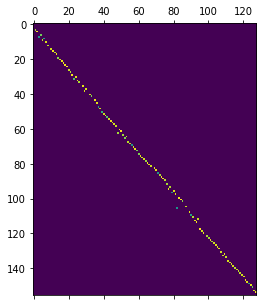

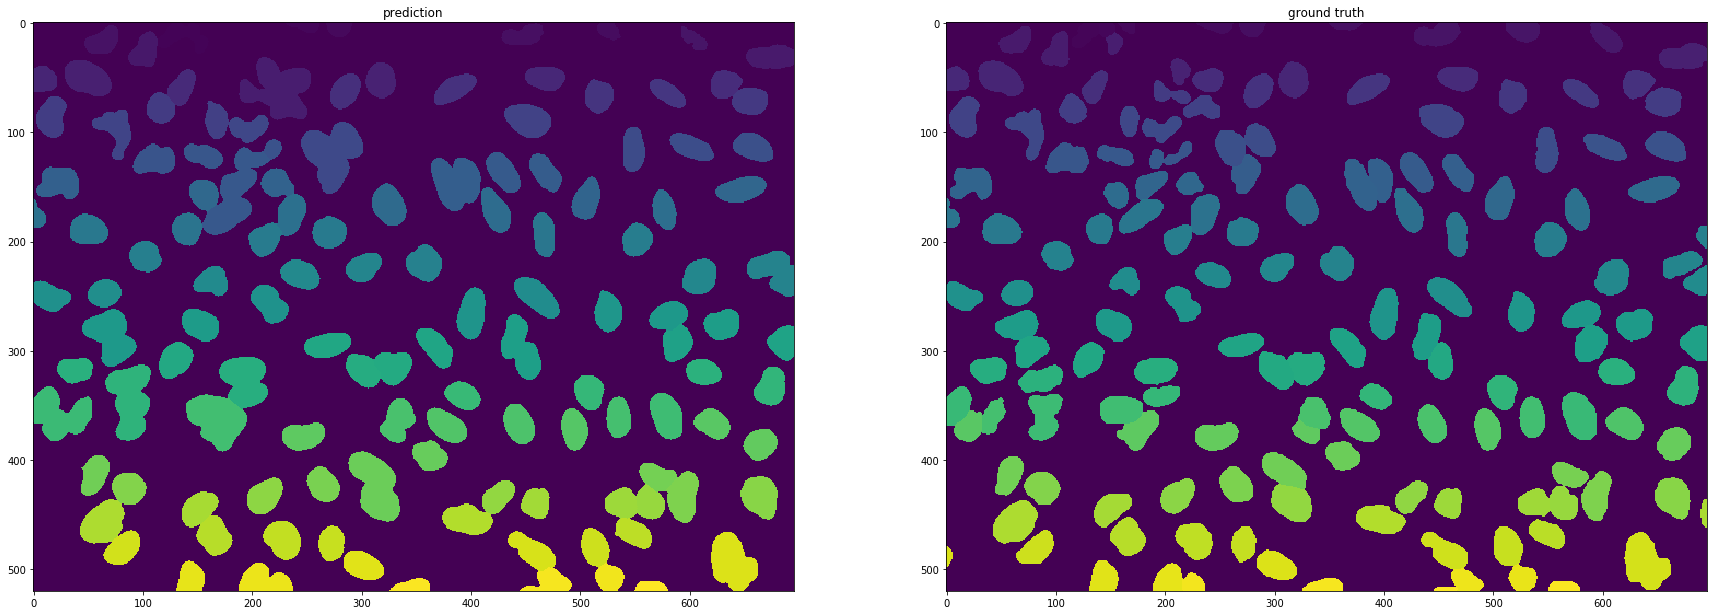

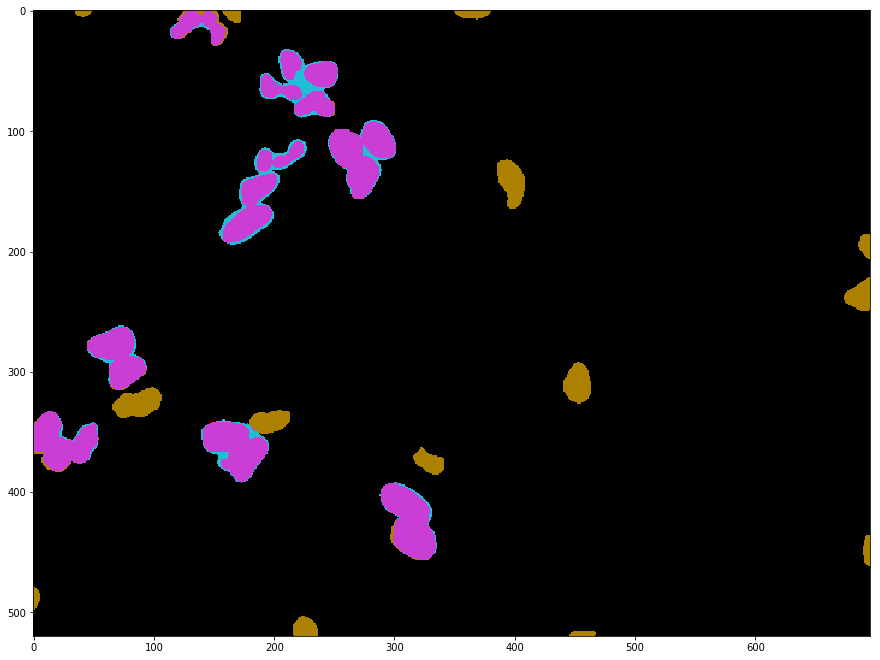

8 / 50
# nuclei gt 36
# nuclei DL 31
# matches 30
# overdetections 1
# underdetections 6
# mean IoU 0.620985


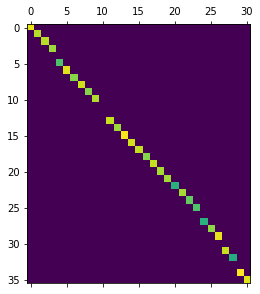

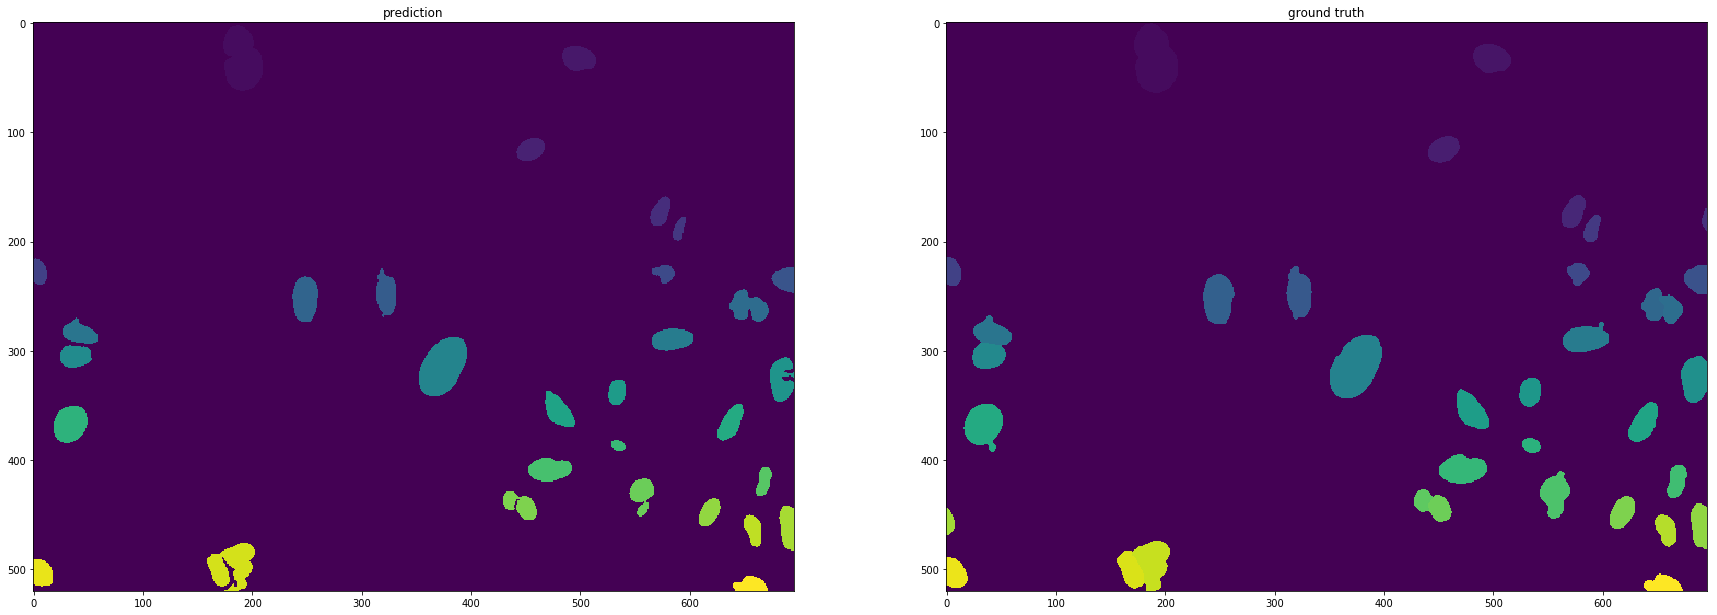

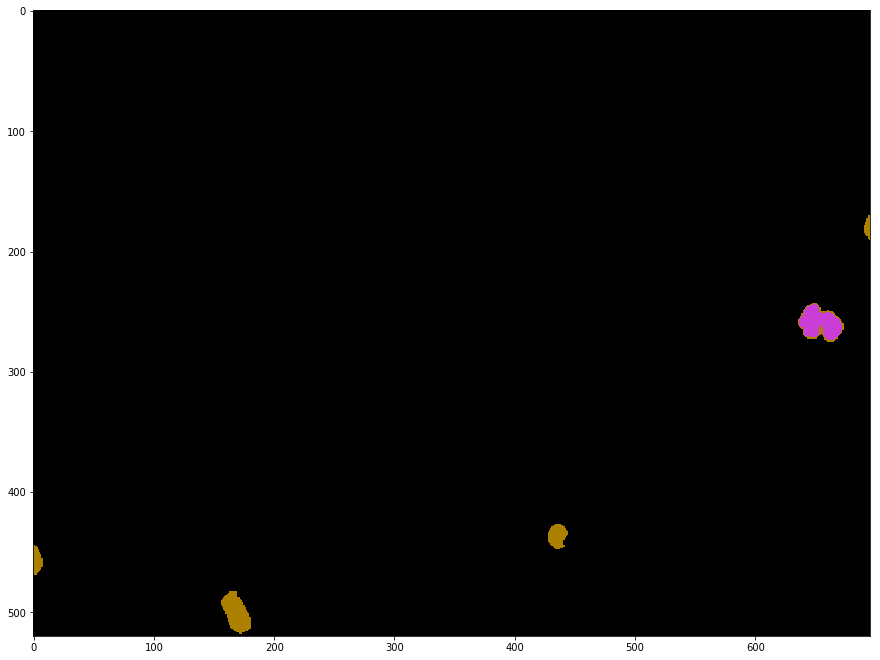

# nuclei gt 36
# nuclei CP 28
# matches 25
# overdetections 3
# underdetections 11
# mean IoU 0.612166


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


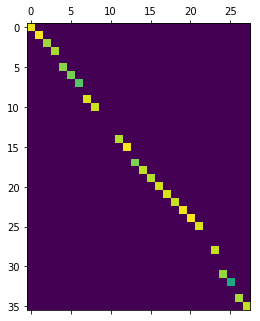

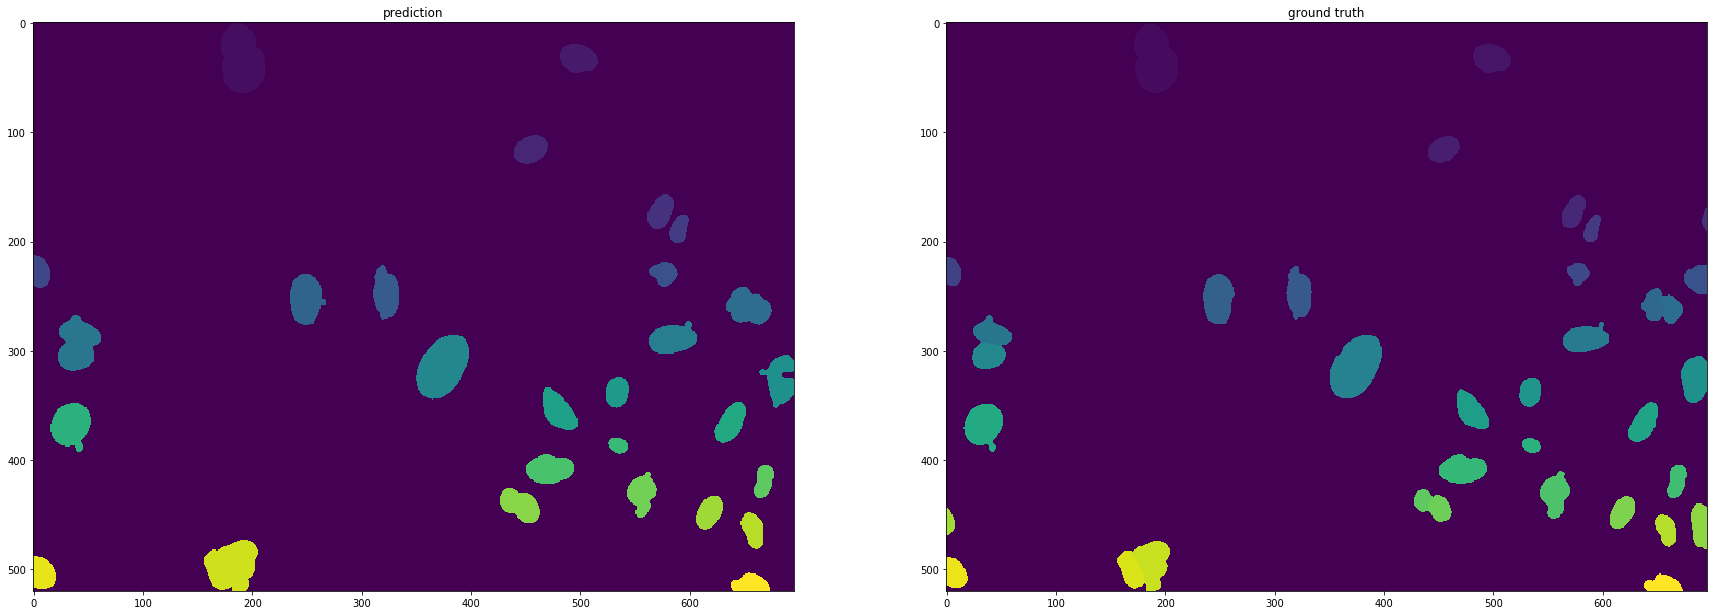

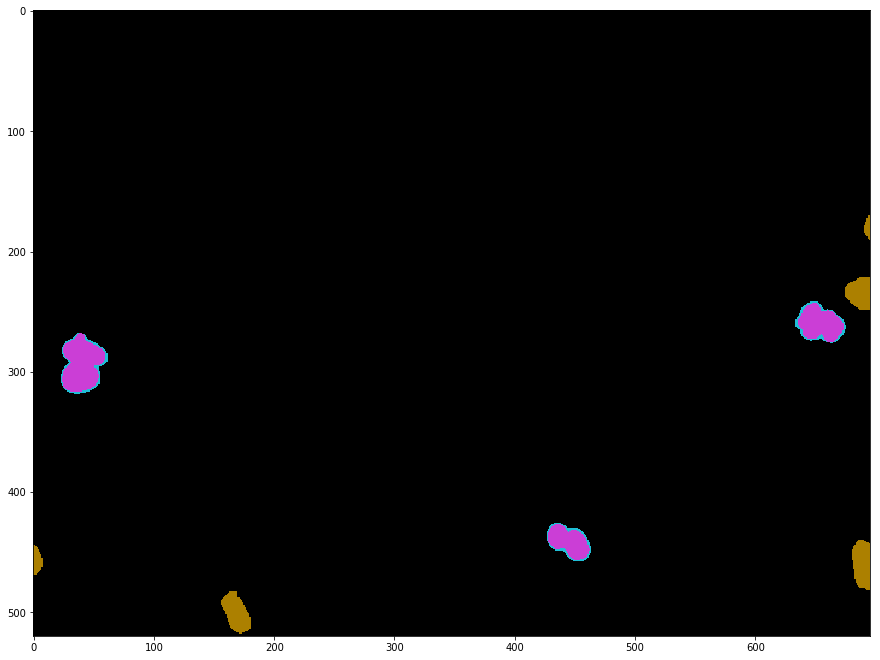

9 / 50
# nuclei gt 74
# nuclei DL 65
# matches 65
# overdetections 0
# underdetections 9
# mean IoU 0.674401


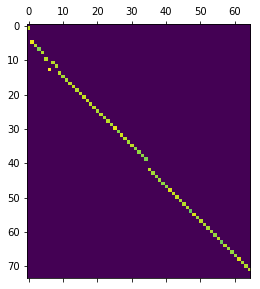

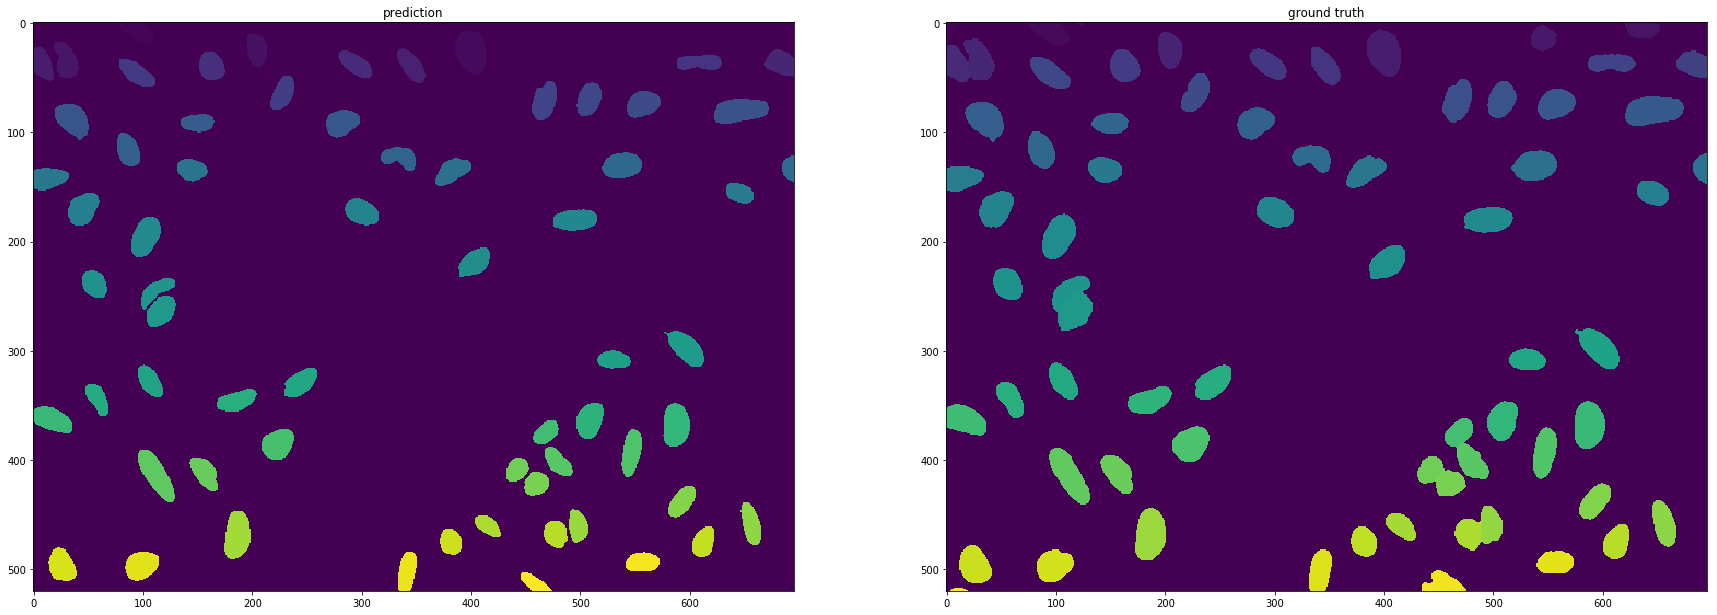

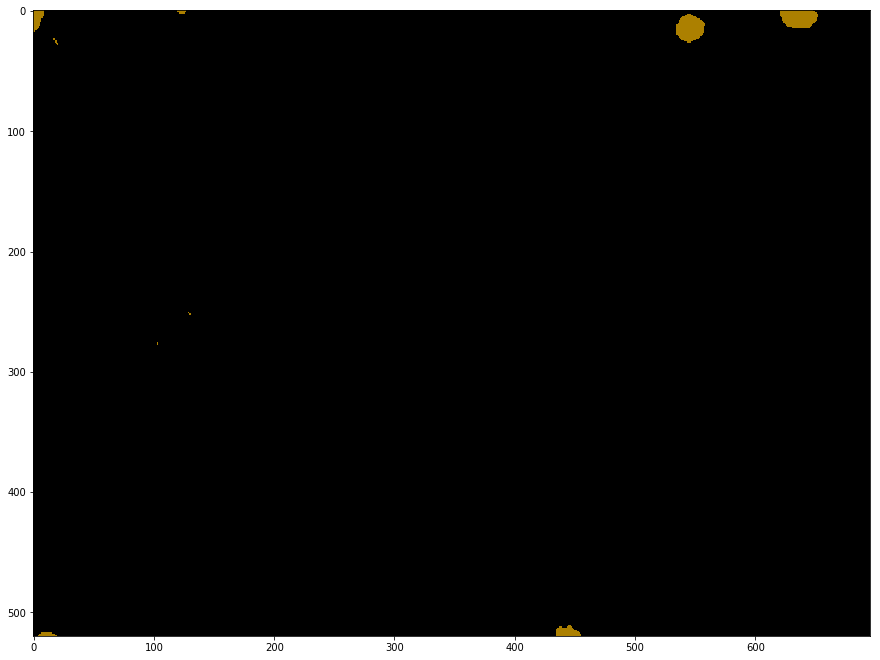

# nuclei gt 74
# nuclei CP 63
# matches 60
# overdetections 3
# underdetections 14
# mean IoU 0.726847


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A21_s1_w1D8BF2790-C628-4109-94AF-DF6D8A3480B6.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


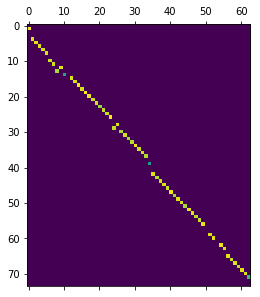

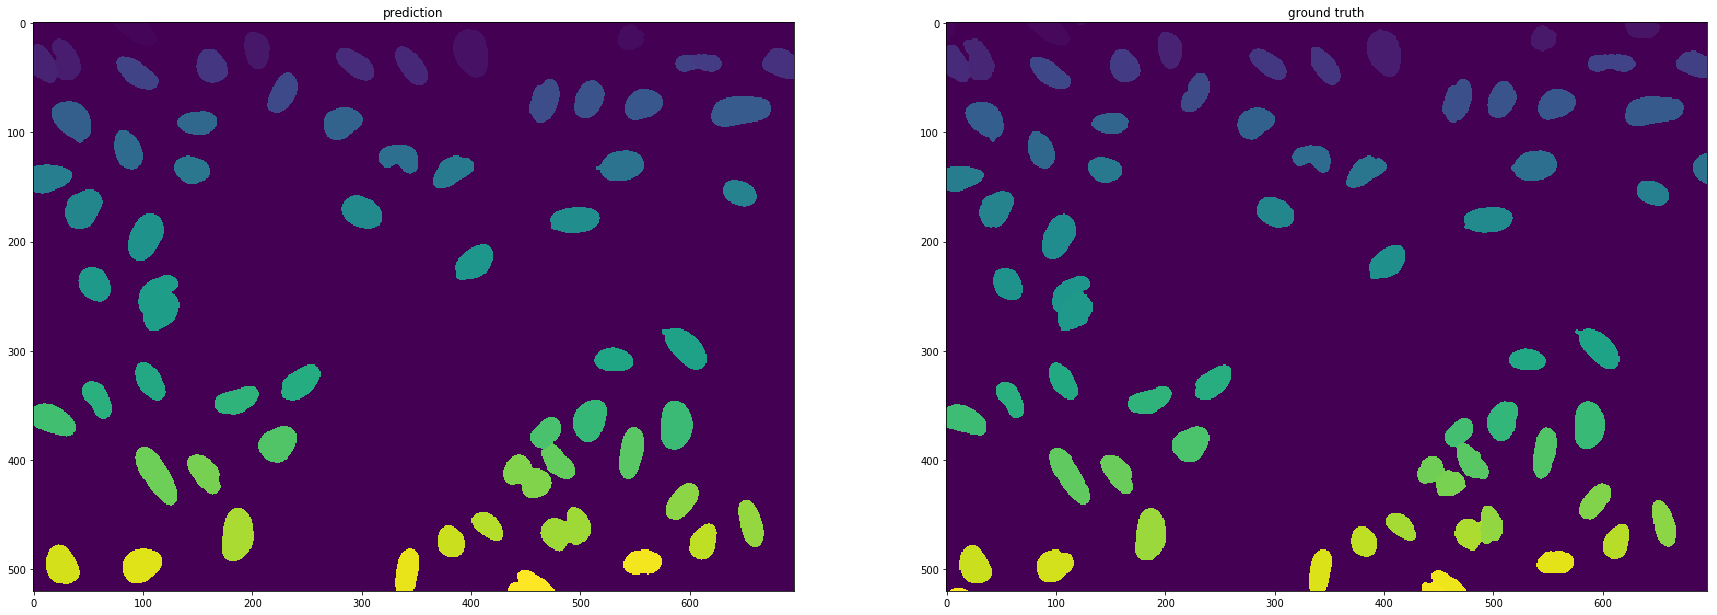

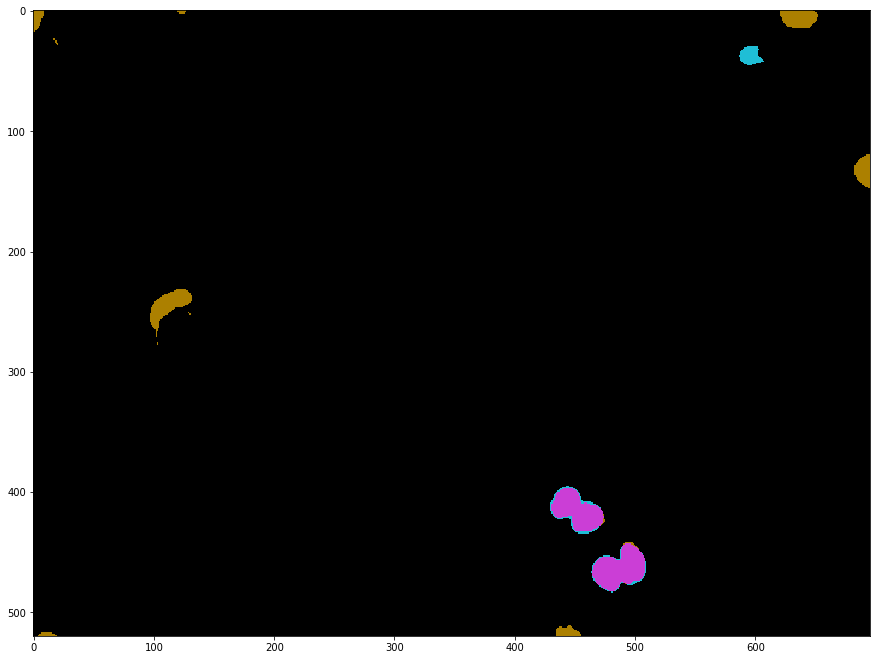

10 / 50
# nuclei gt 183
# nuclei DL 162
# matches 156
# overdetections 6
# underdetections 27
# mean IoU 0.63103


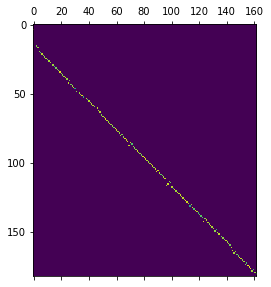

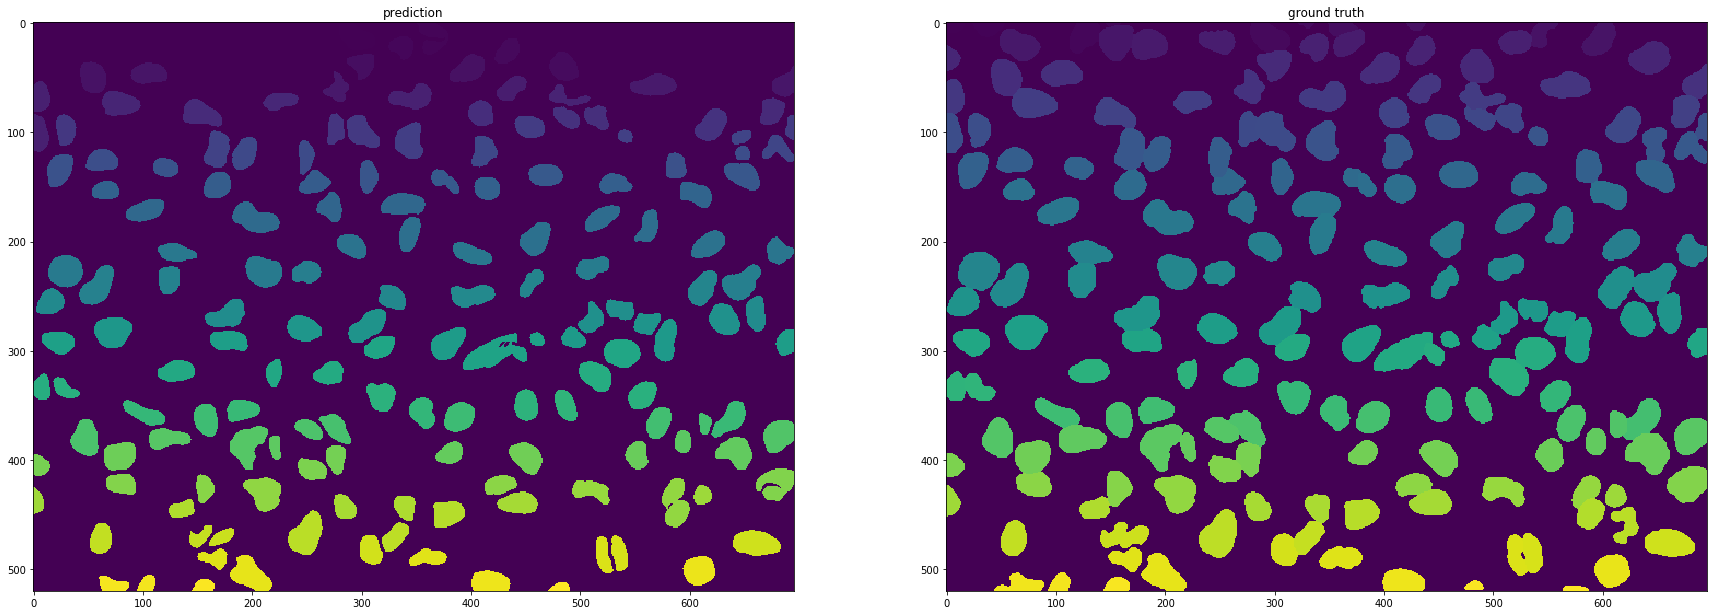

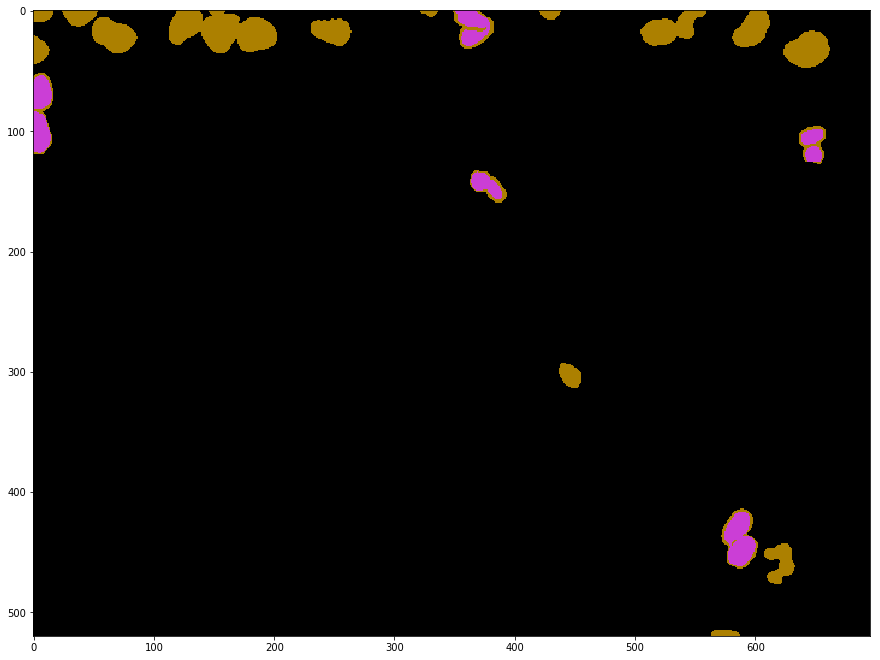

# nuclei gt 183
# nuclei CP 148
# matches 139
# overdetections 9
# underdetections 44
# mean IoU 0.644056


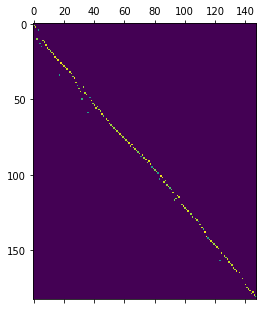

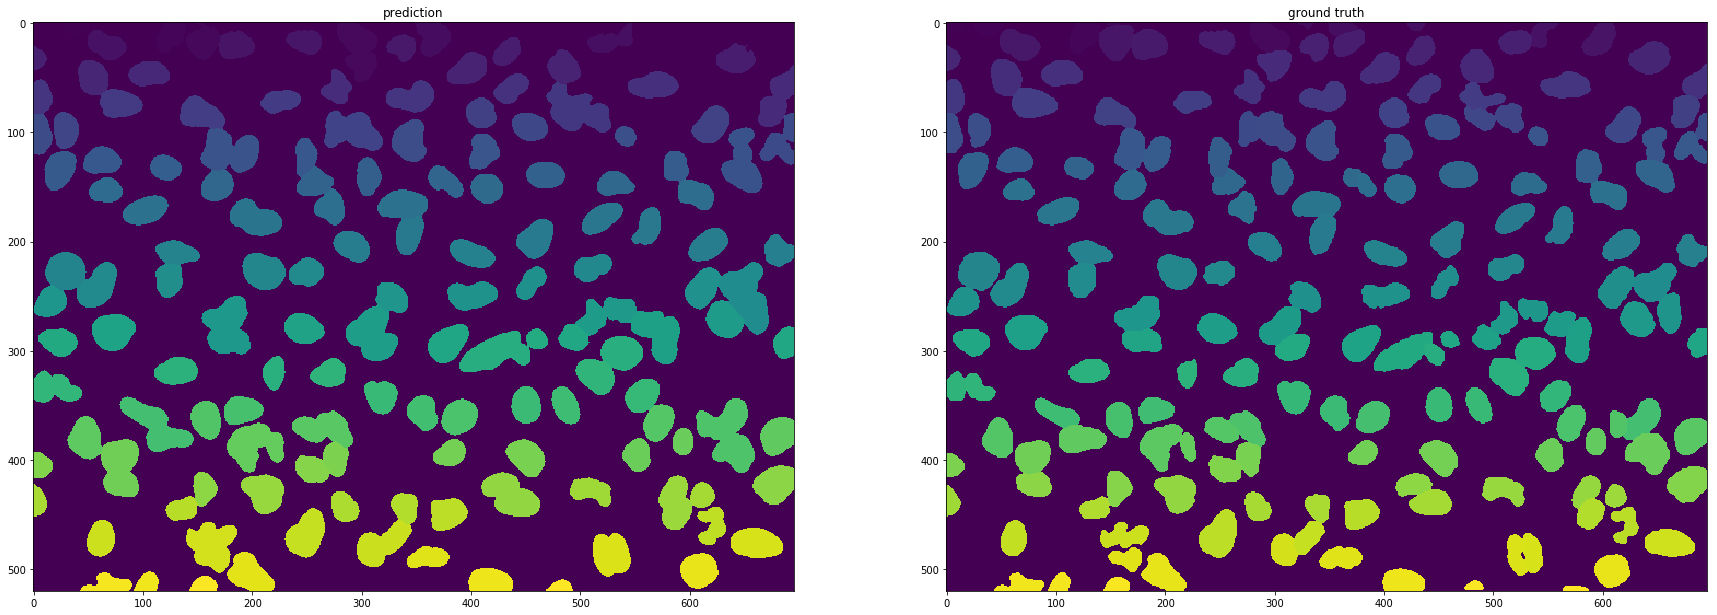

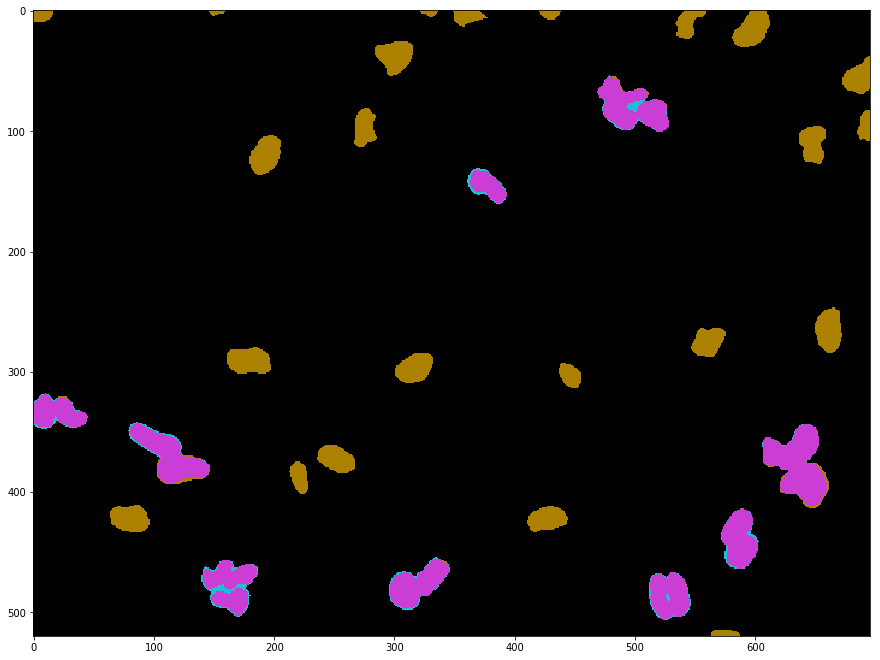

11 / 50
# nuclei gt 101
# nuclei DL 89
# matches 89
# overdetections 0
# underdetections 12
# mean IoU 0.665422


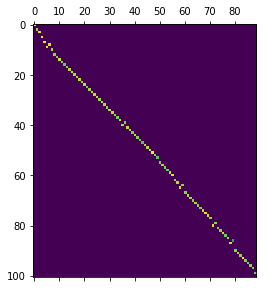

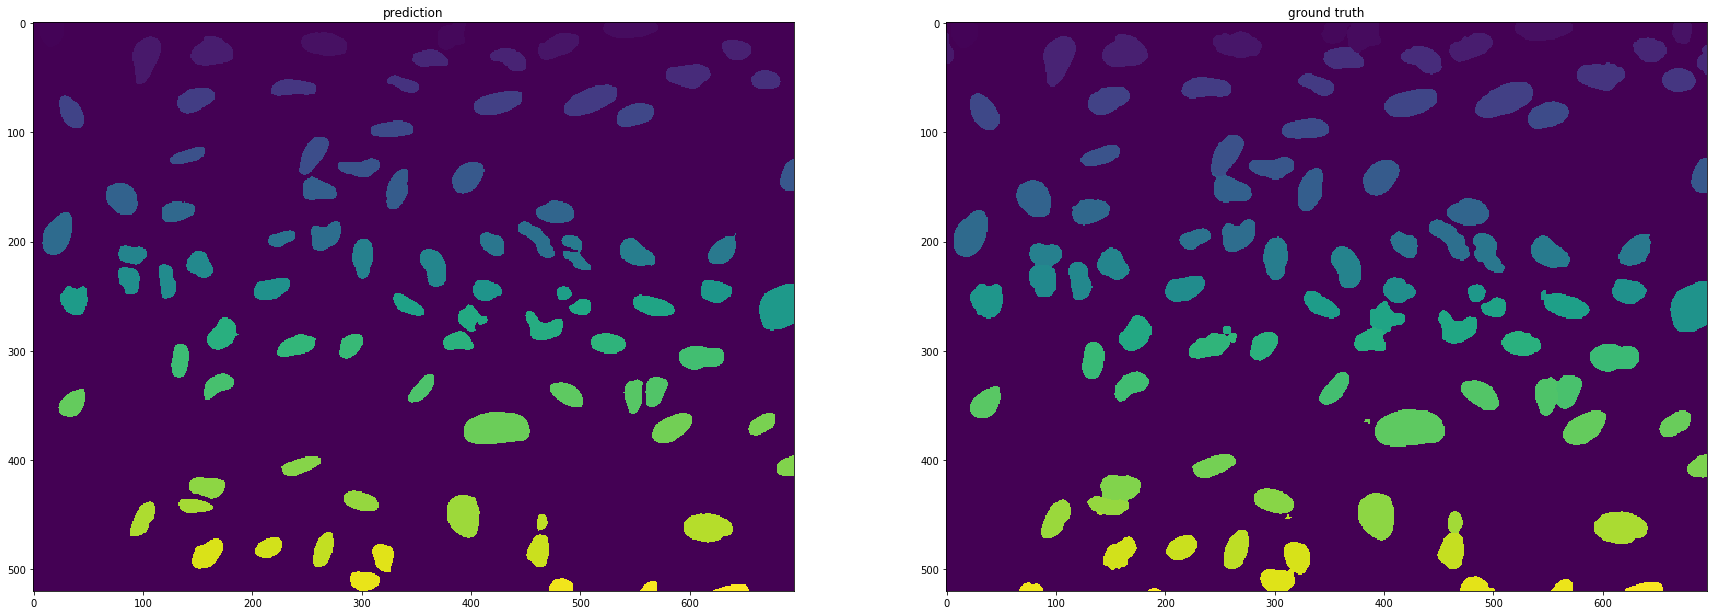

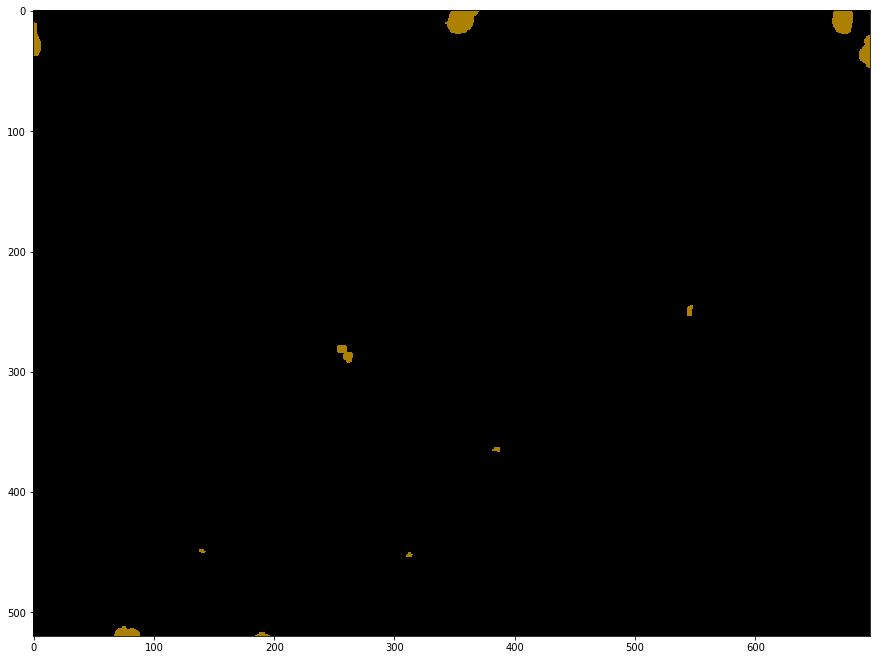

# nuclei gt 101
# nuclei CP 83
# matches 80
# overdetections 3
# underdetections 21
# mean IoU 0.700627


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B04_s4_w1F6AEFA0F-AF87-4B3B-A334-698647CFE043.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


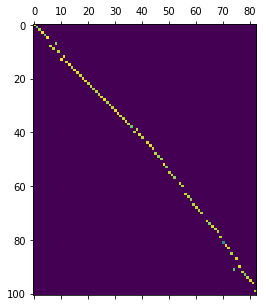

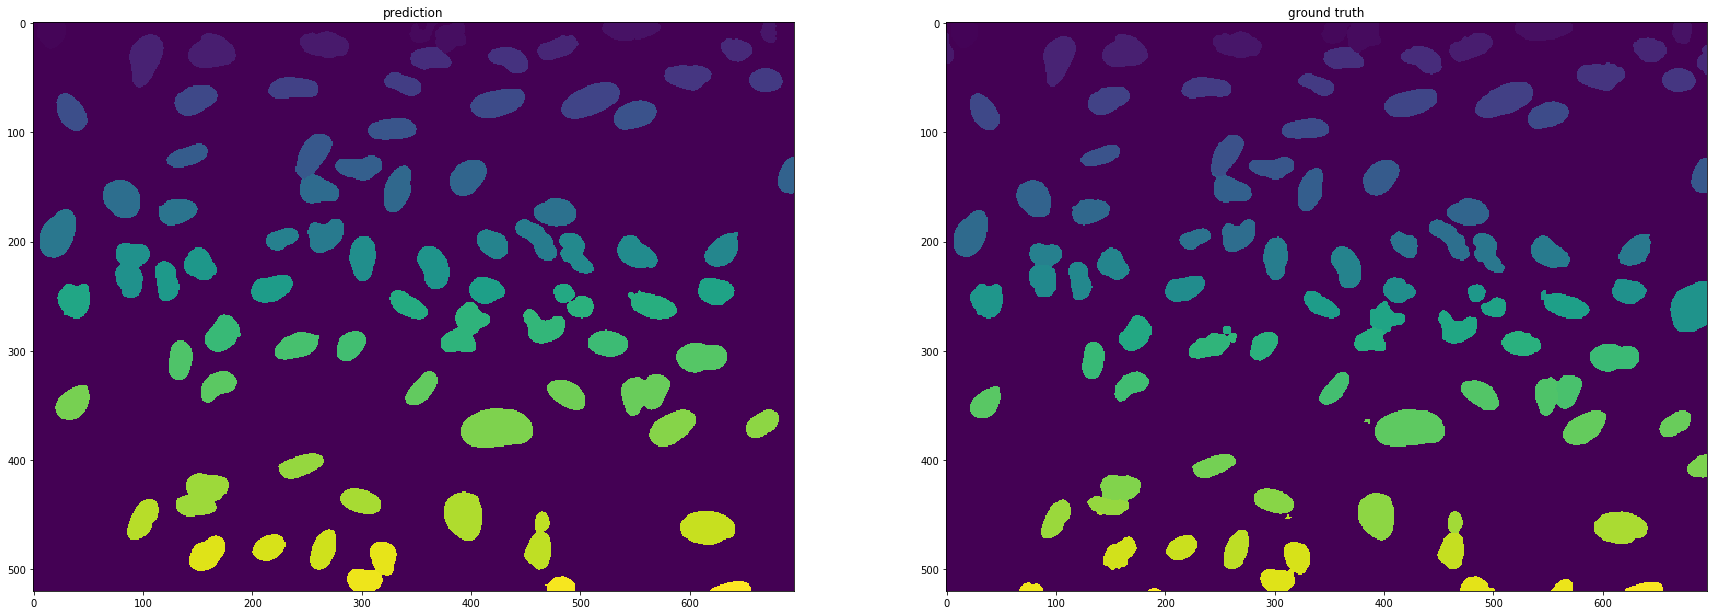

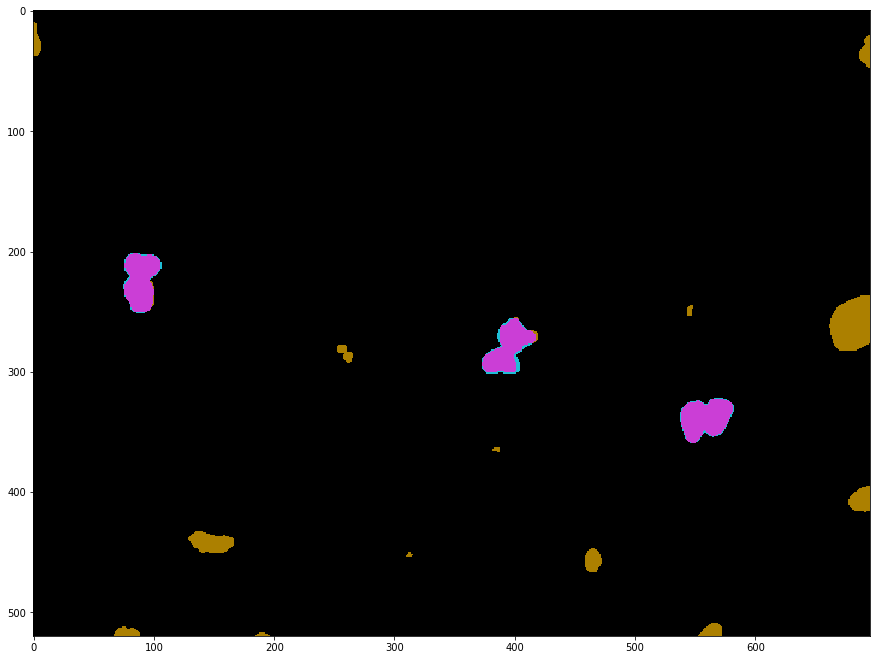

12 / 50
# nuclei gt 137
# nuclei DL 118
# matches 118
# overdetections 0
# underdetections 19
# mean IoU 0.659474


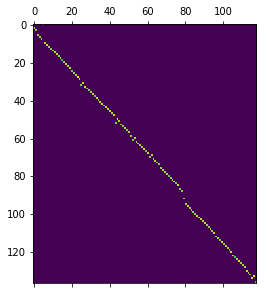

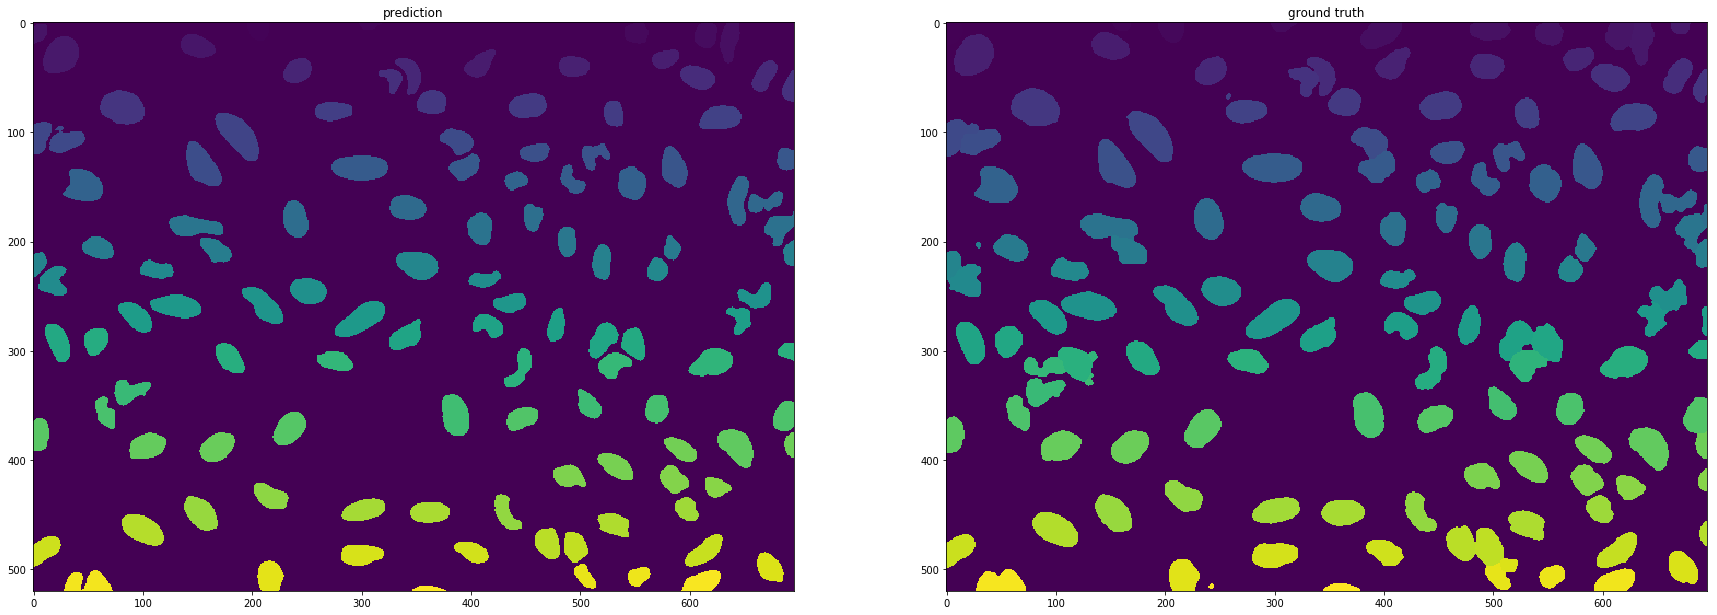

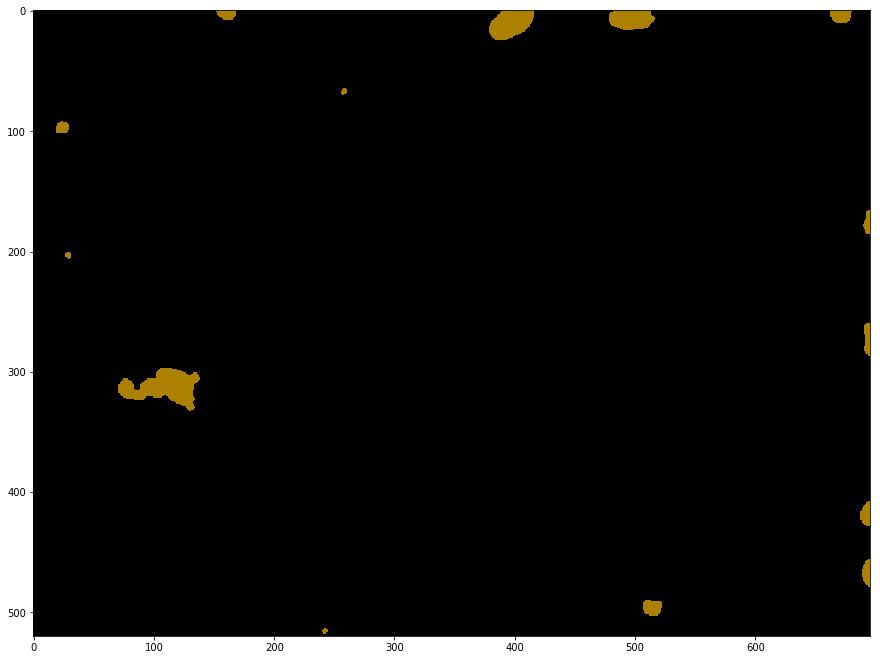

# nuclei gt 137
# nuclei CP 108
# matches 101
# overdetections 7
# underdetections 36
# mean IoU 0.638957


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C18_s1_w11C16FC59-2E29-496A-803A-89581FDF538A.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


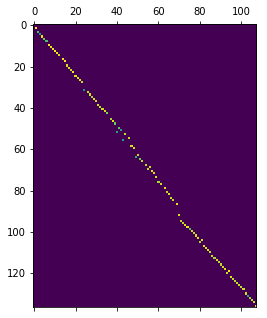

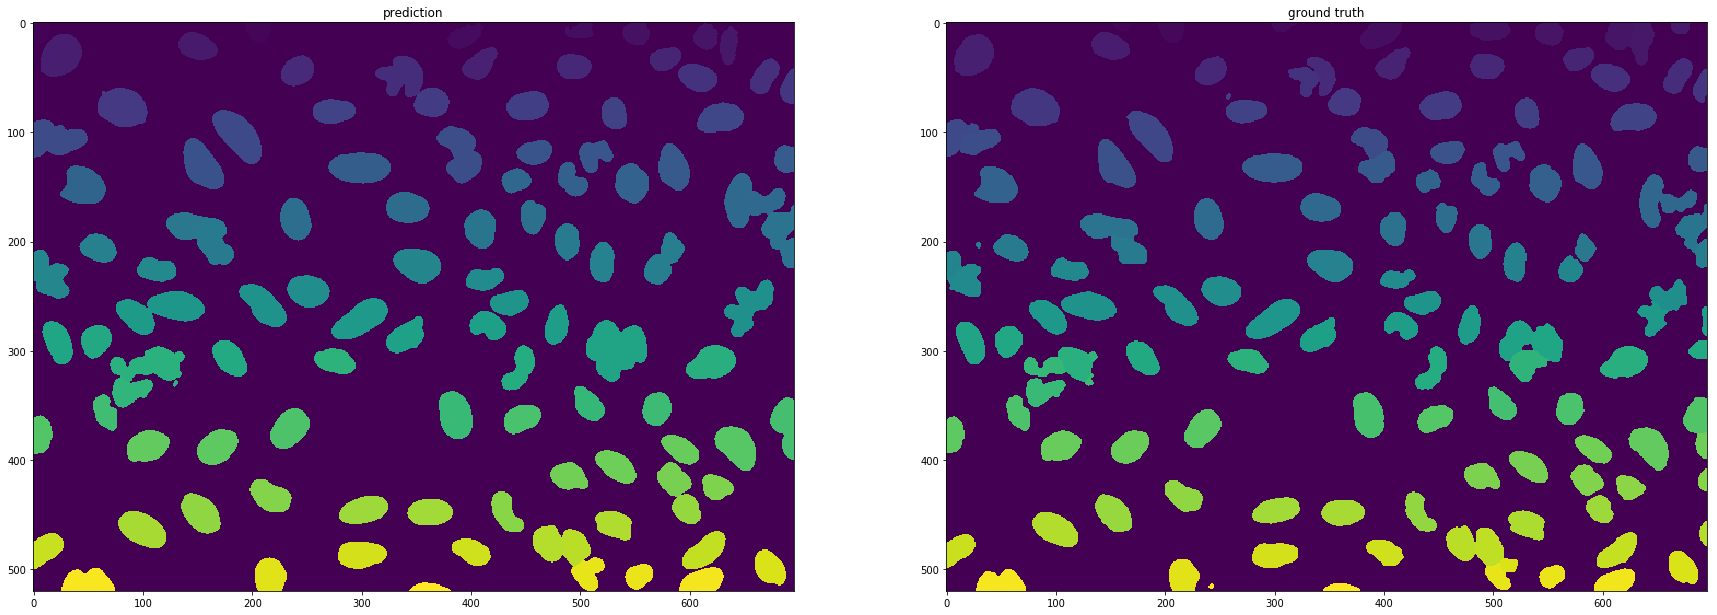

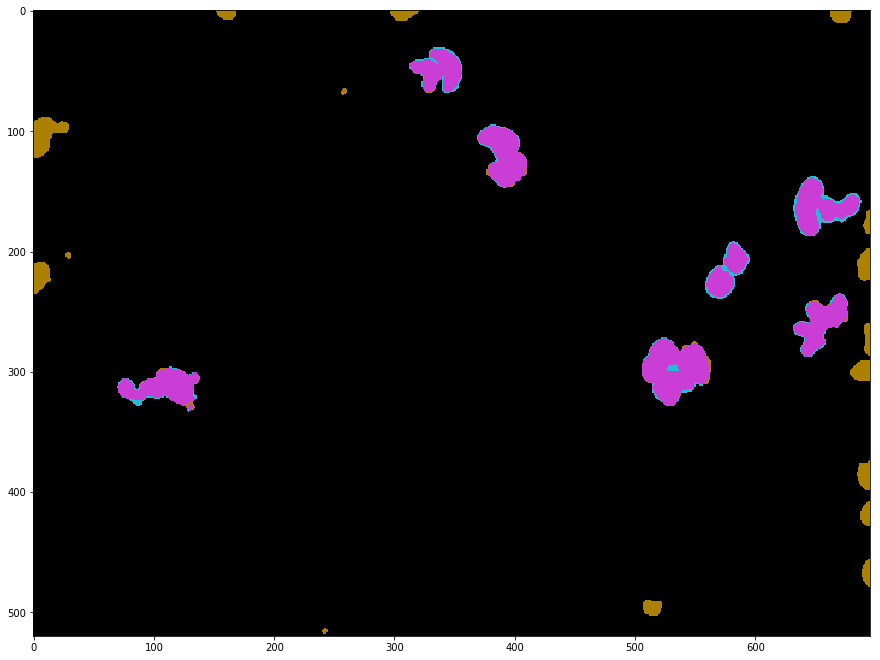

13 / 50
# nuclei gt 135
# nuclei DL 119
# matches 118
# overdetections 1
# underdetections 17
# mean IoU 0.681891


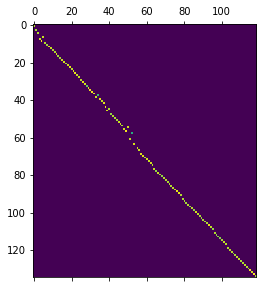

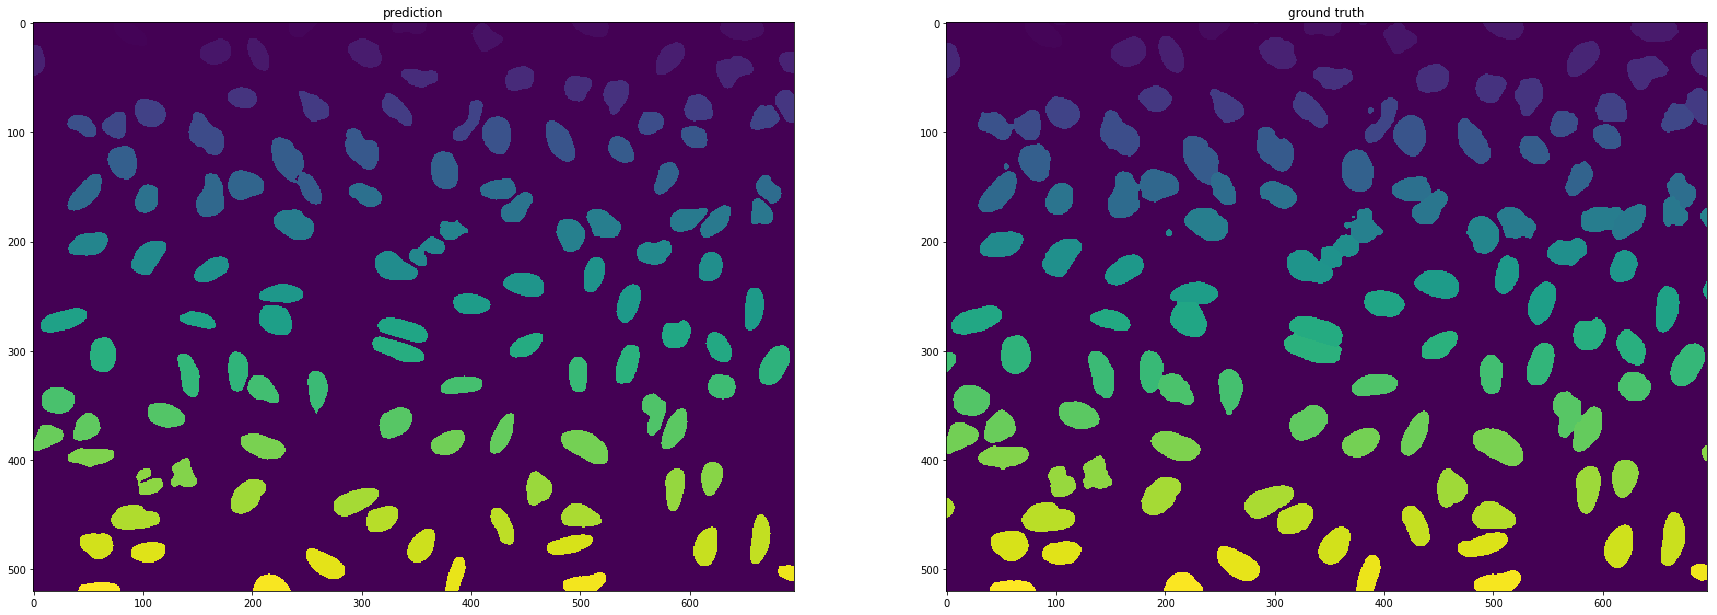

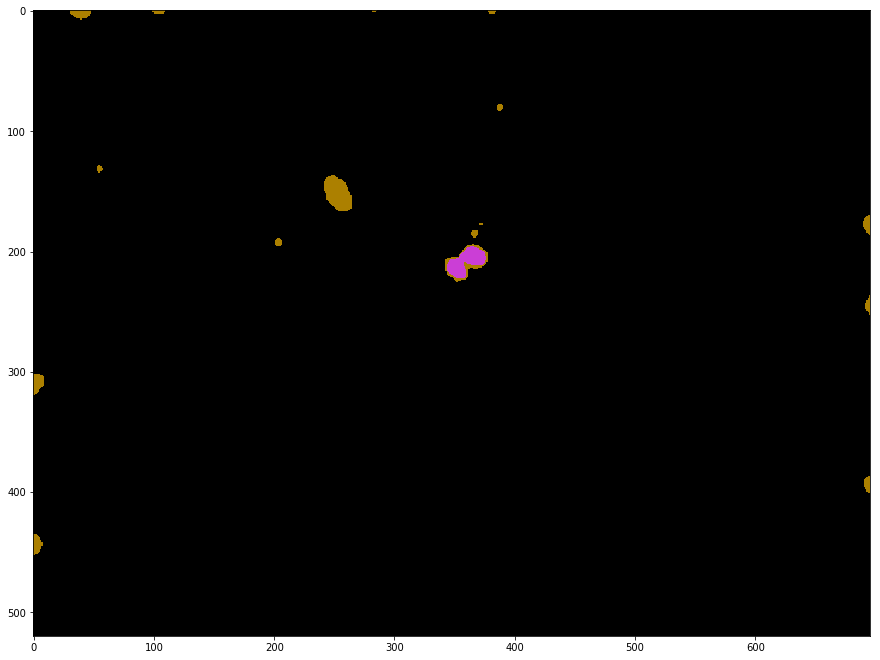

# nuclei gt 135
# nuclei CP 113
# matches 107
# overdetections 6
# underdetections 28
# mean IoU 0.70823


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


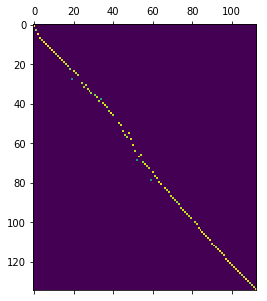

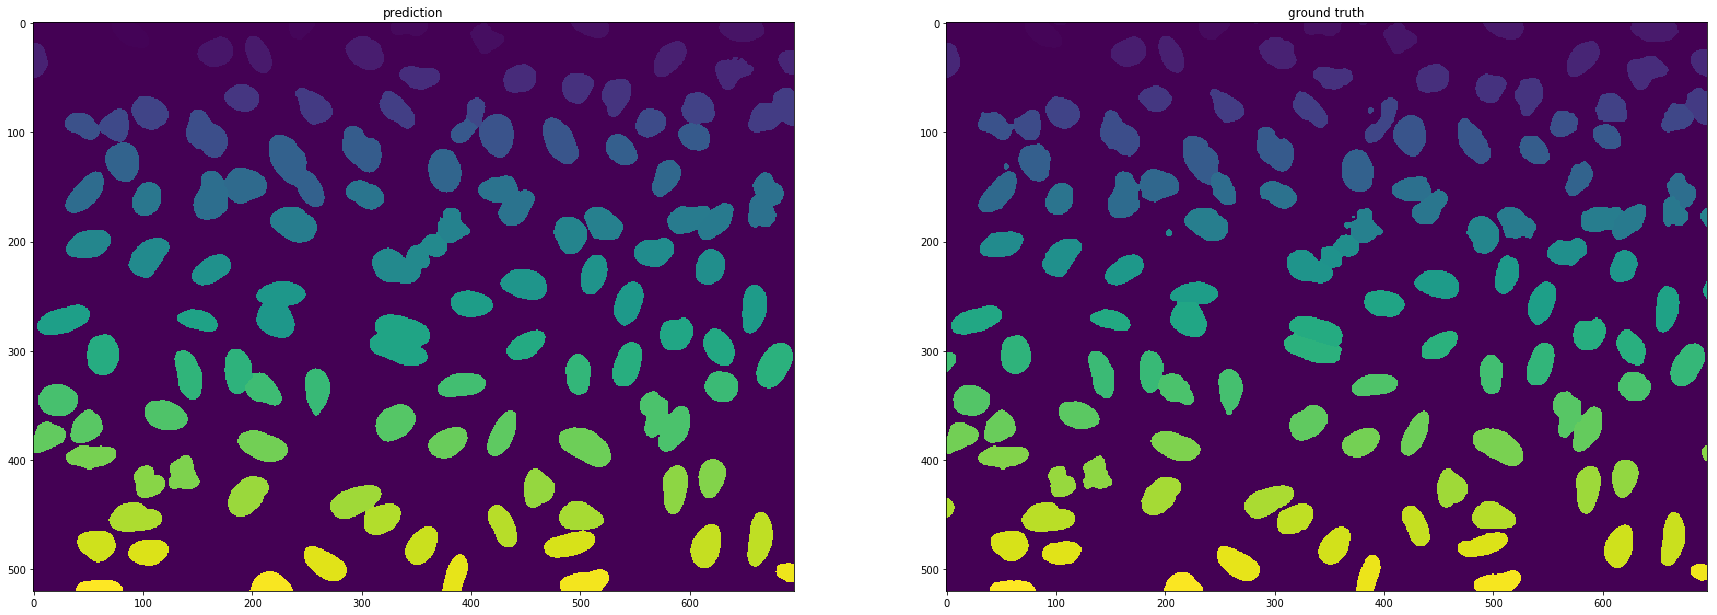

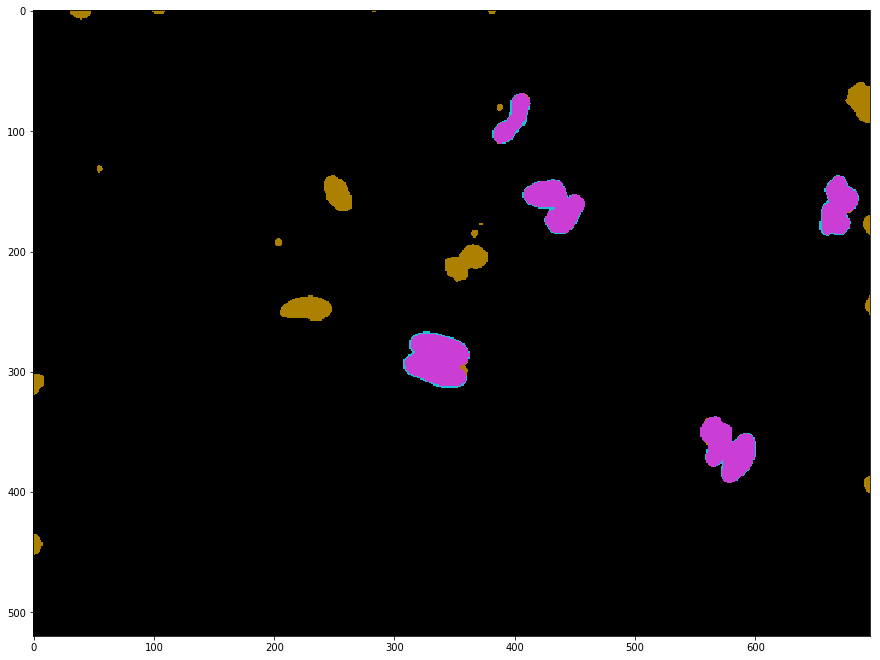

14 / 50
# nuclei gt 70
# nuclei DL 69
# matches 68
# overdetections 1
# underdetections 2
# mean IoU 0.740308


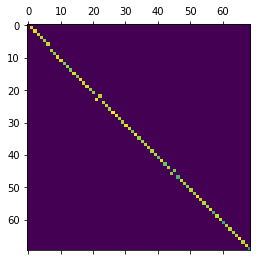

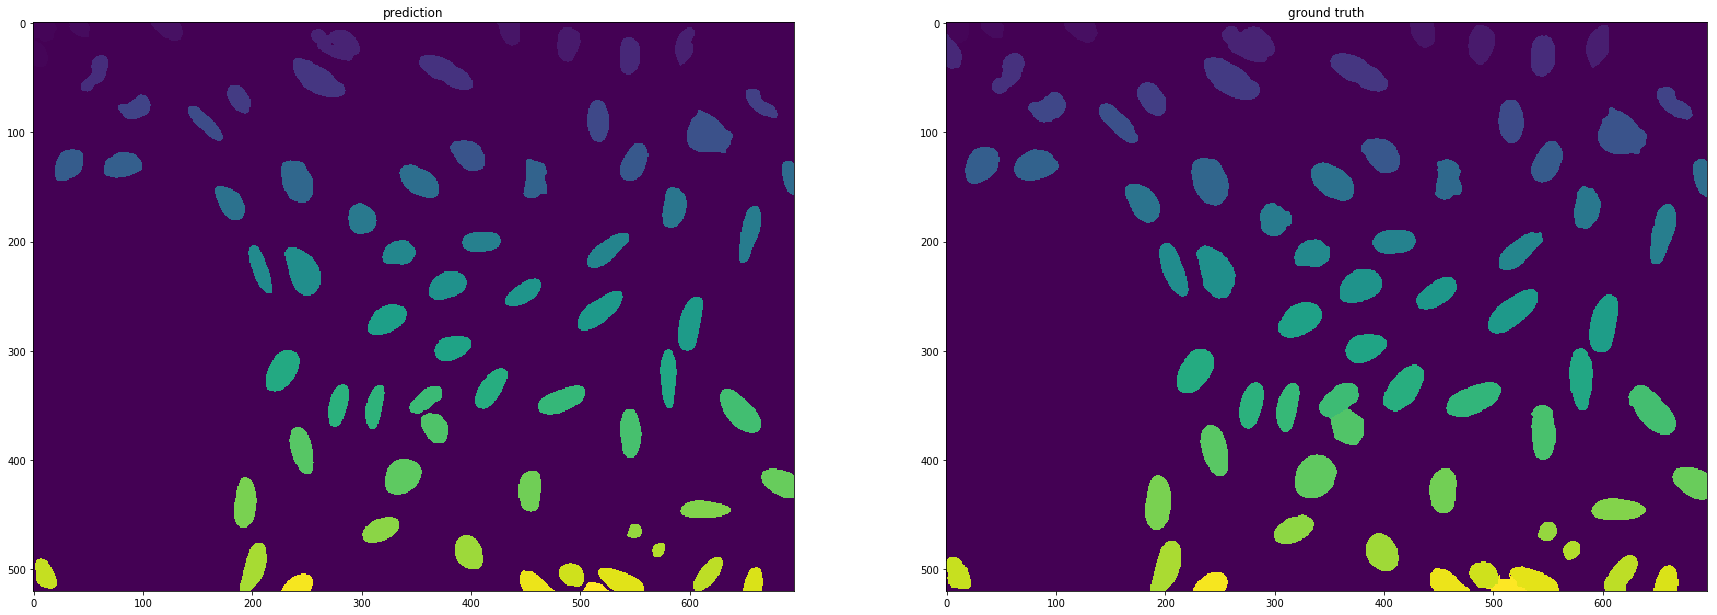

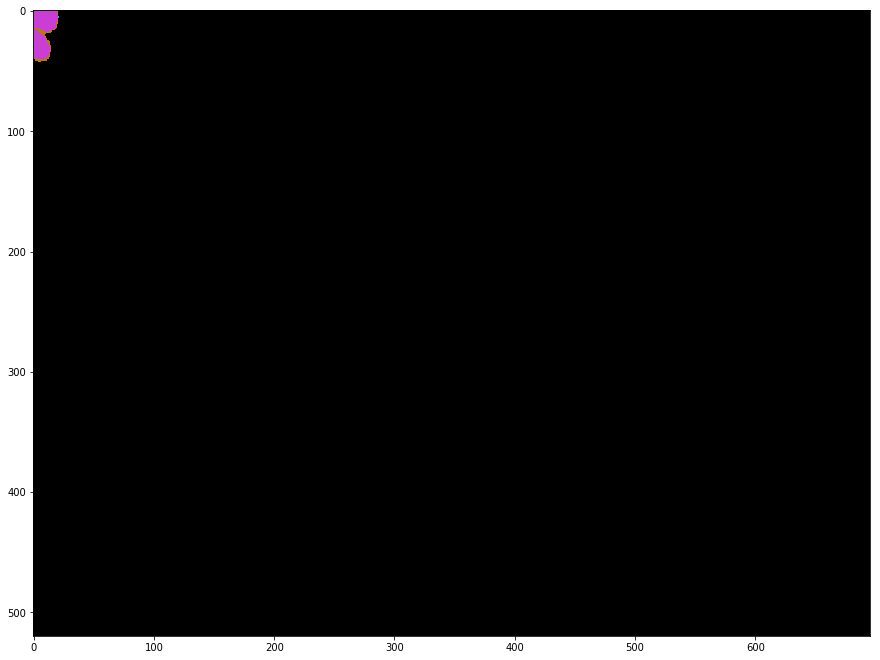

# nuclei gt 70
# nuclei CP 67
# matches 65
# overdetections 2
# underdetections 5
# mean IoU 0.837468


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B22_s8_w10754C18F-B059-47B4-A423-FF429B984D80.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


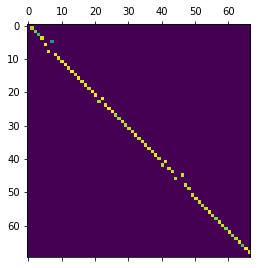

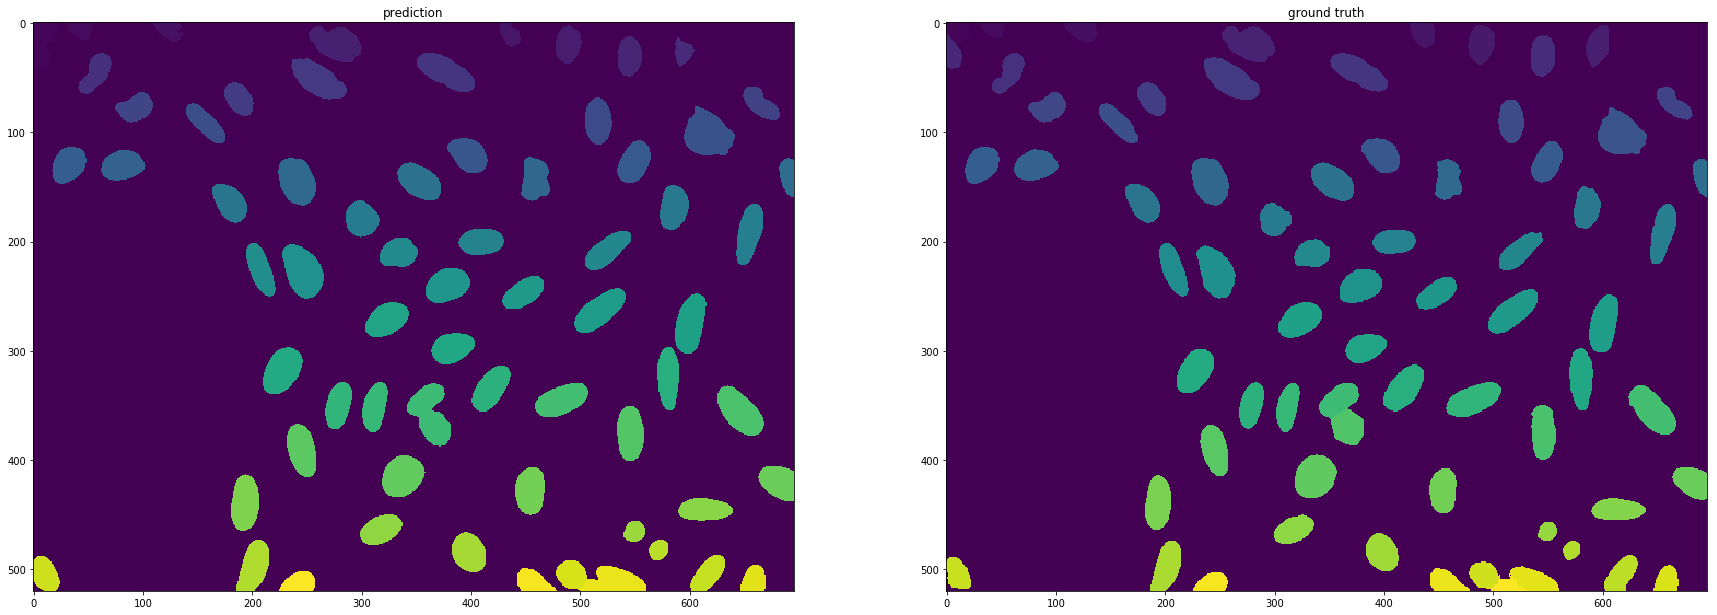

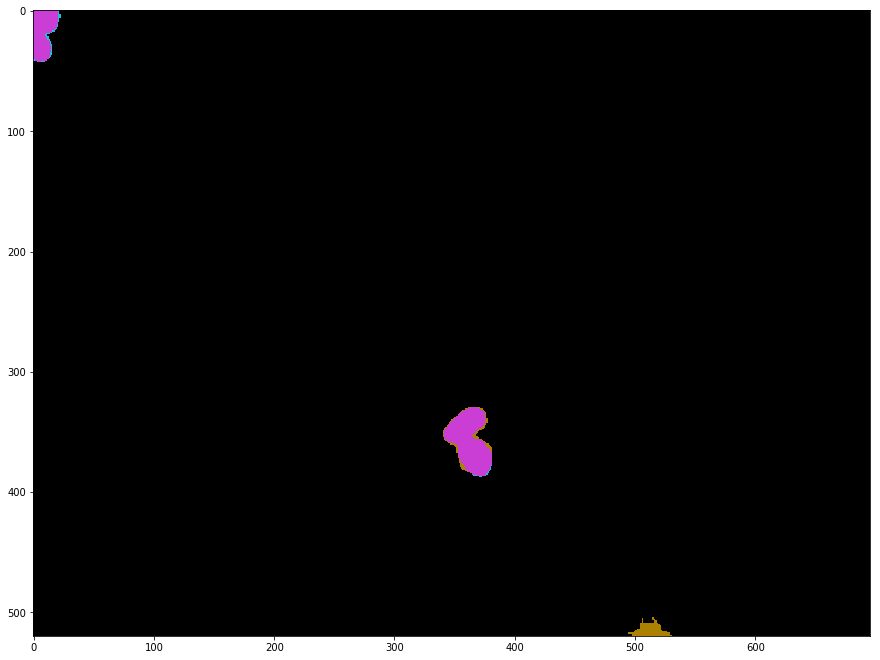

15 / 50
# nuclei gt 154
# nuclei DL 142
# matches 139
# overdetections 3
# underdetections 15
# mean IoU 0.706916


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B22_s8_w10754C18F-B059-47B4-A423-FF429B984D80.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


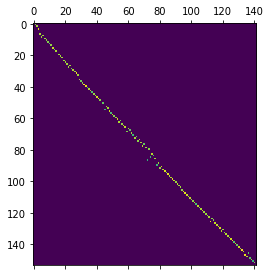

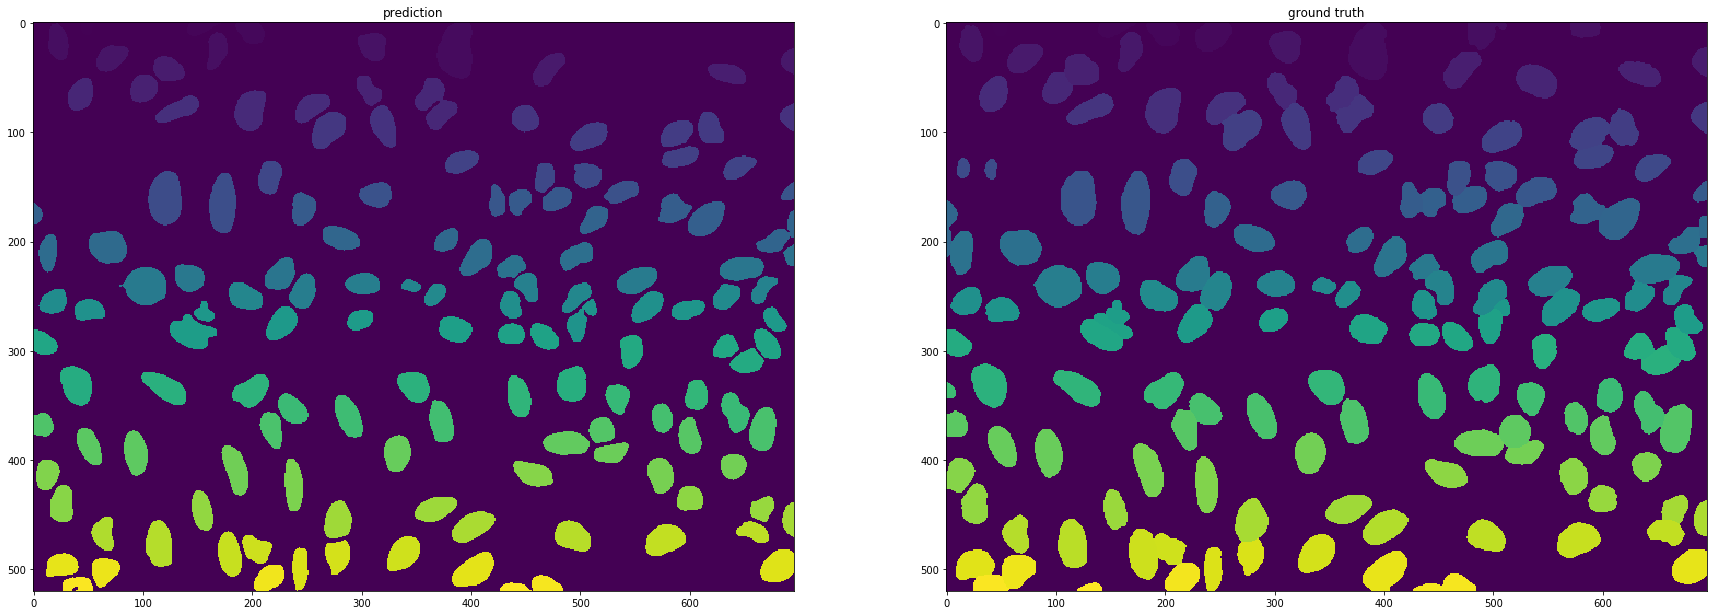

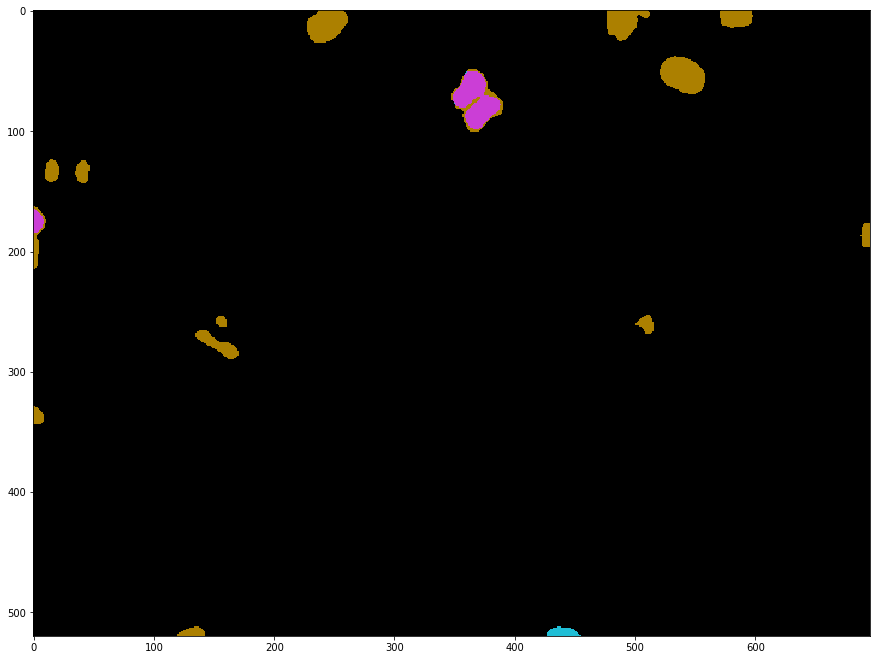

# nuclei gt 154
# nuclei CP 124
# matches 114
# overdetections 10
# underdetections 40
# mean IoU 0.634086


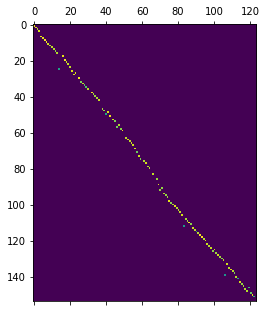

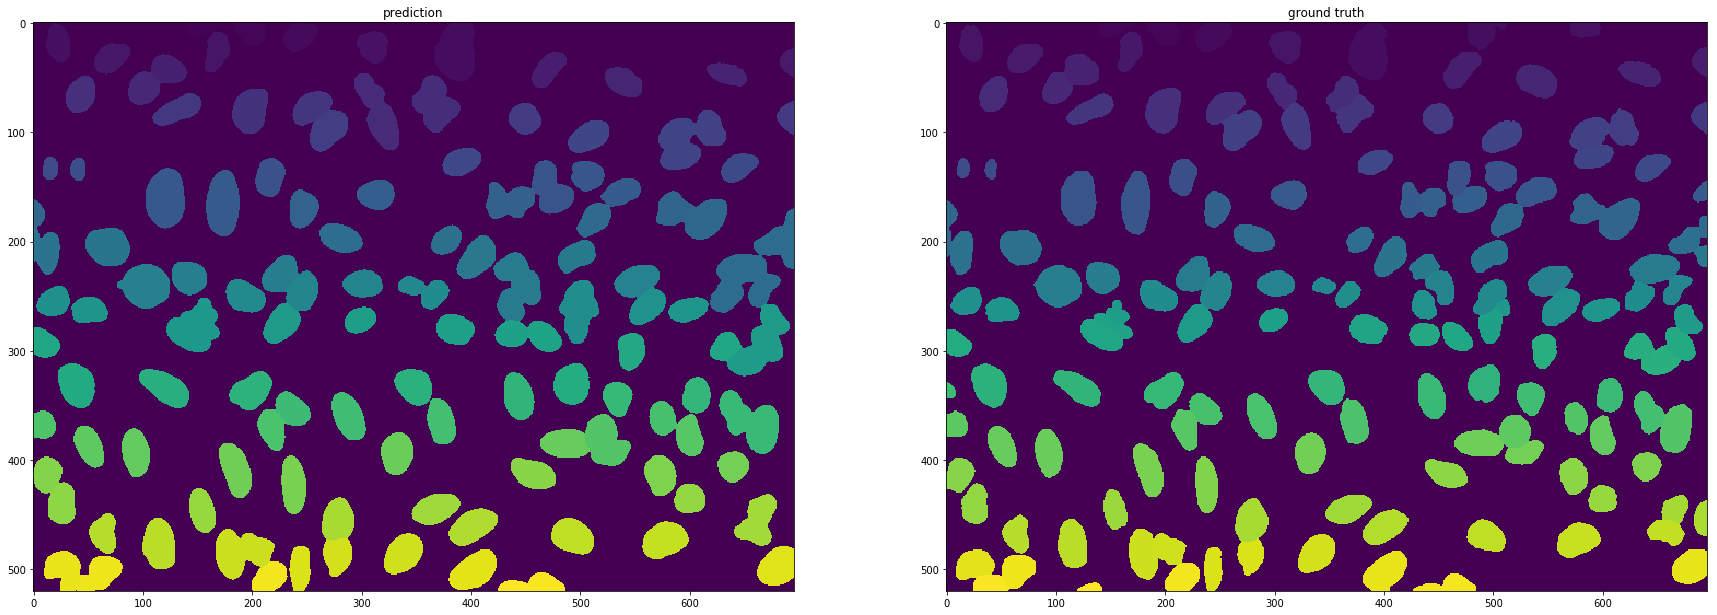

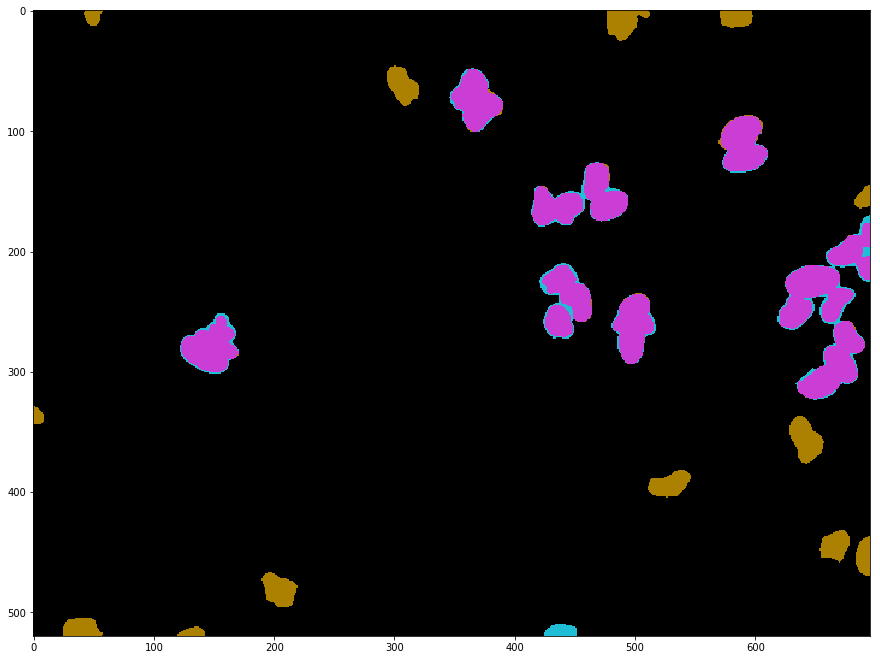

16 / 50
# nuclei gt 106
# nuclei DL 93
# matches 90
# overdetections 3
# underdetections 16
# mean IoU 0.64494


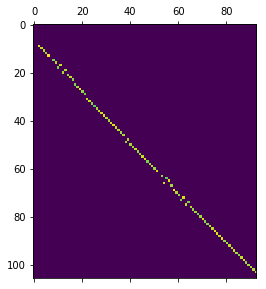

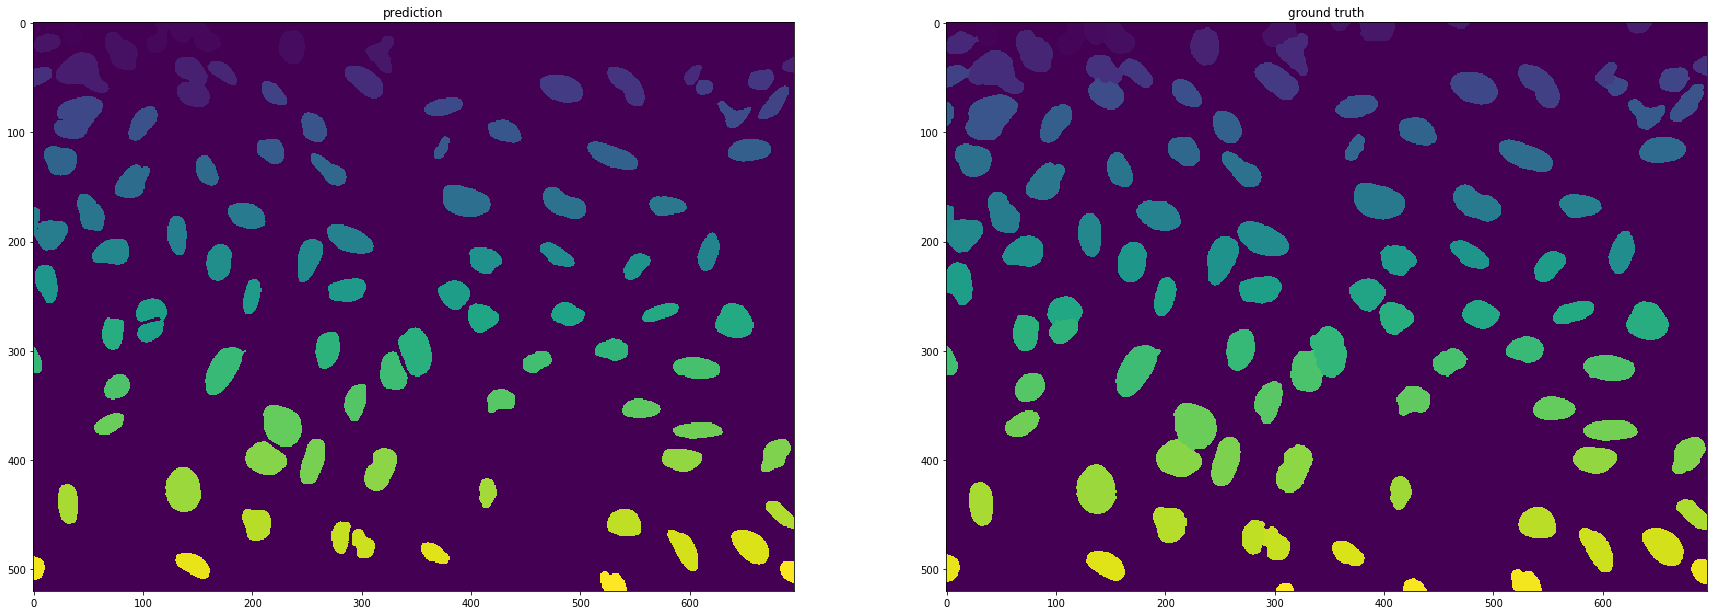

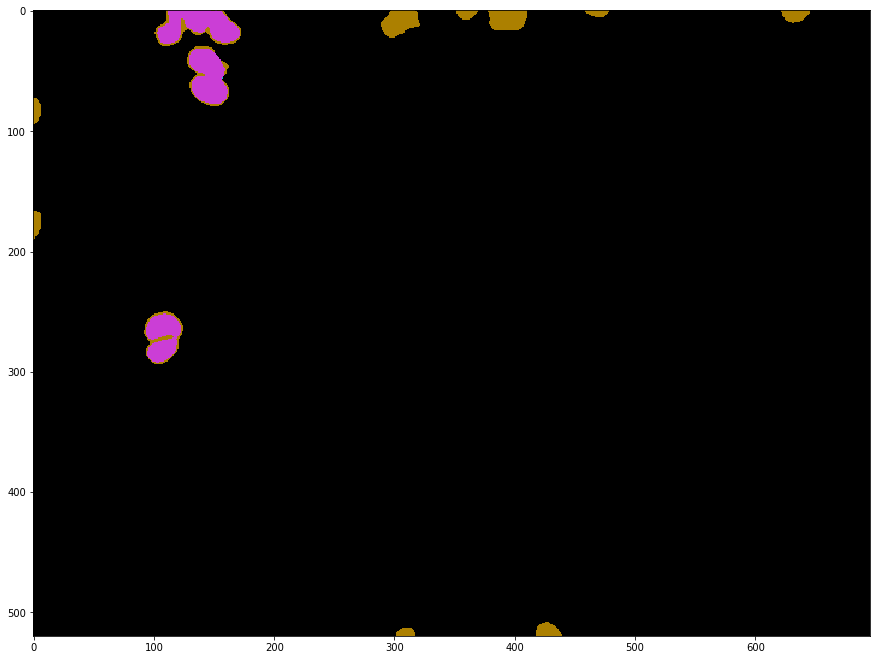

# nuclei gt 106
# nuclei CP 91
# matches 86
# overdetections 5
# underdetections 20
# mean IoU 0.727051


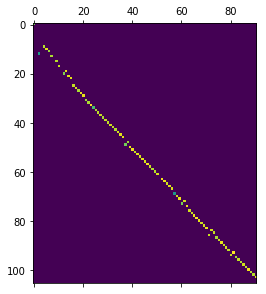

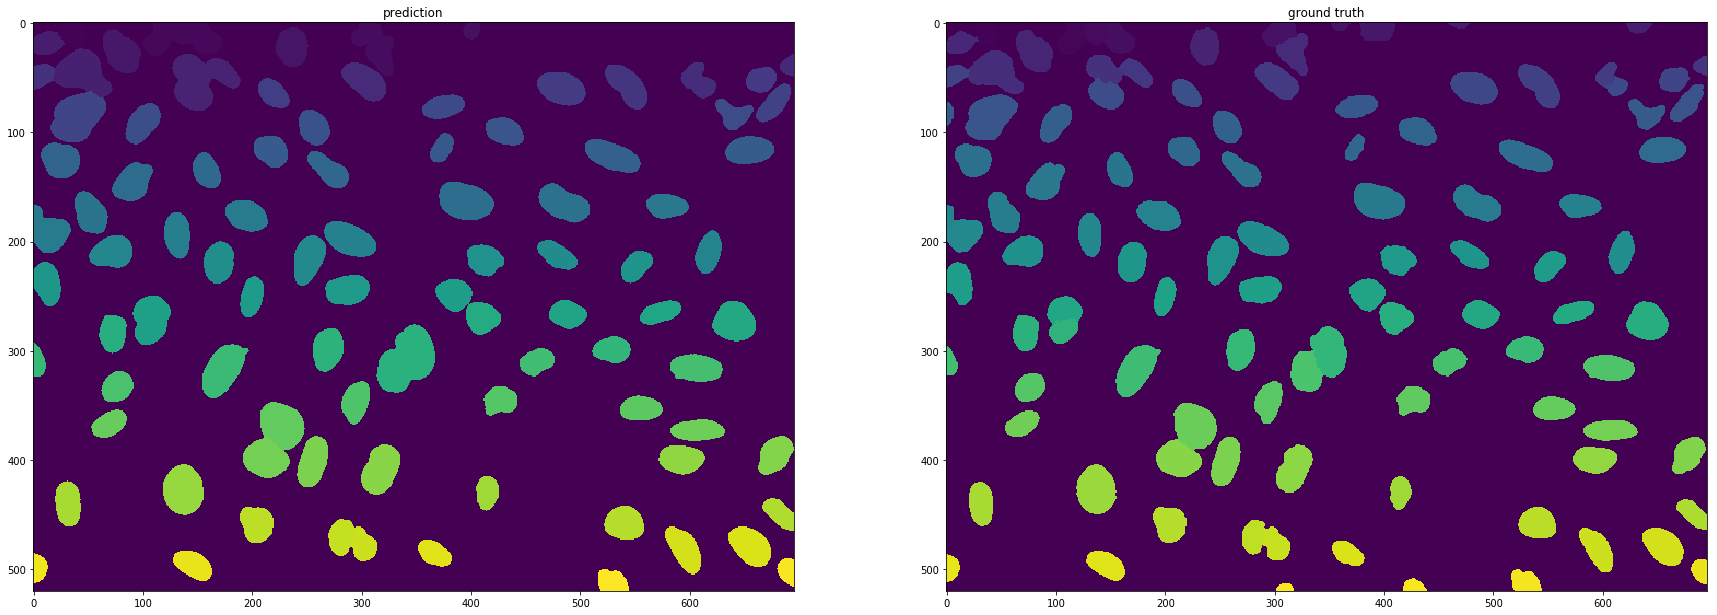

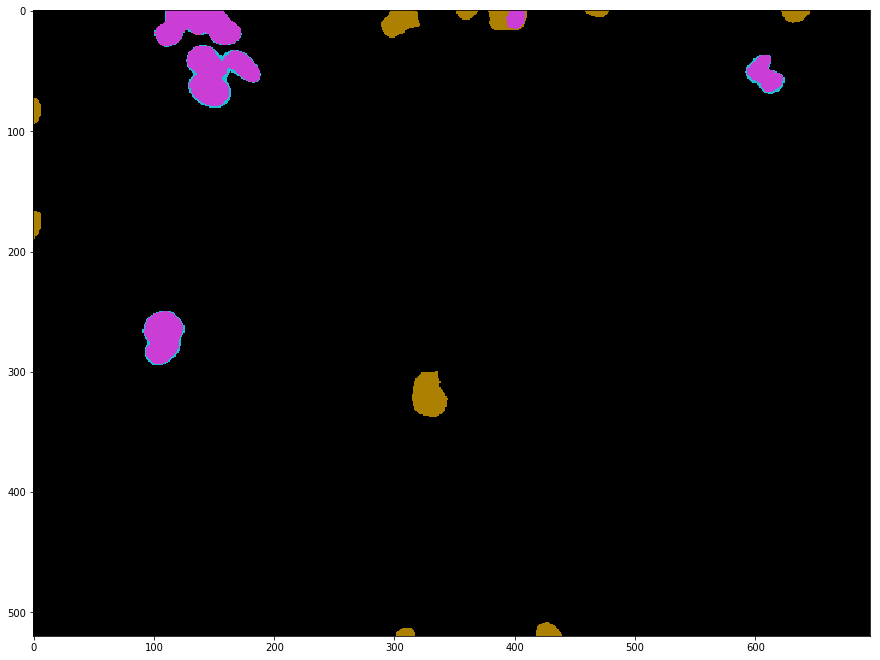

17 / 50
# nuclei gt 69
# nuclei DL 68
# matches 68
# overdetections 0
# underdetections 1
# mean IoU 0.770344


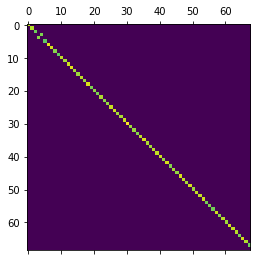

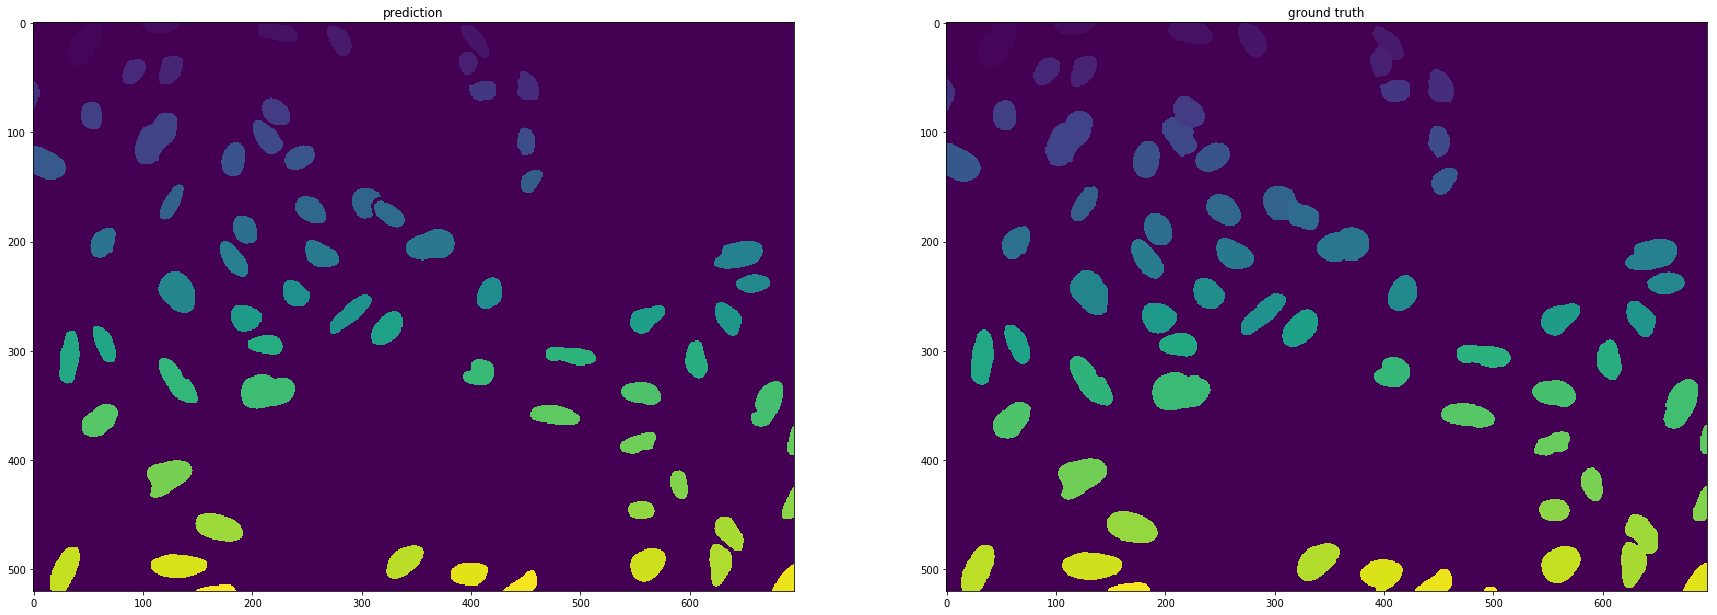

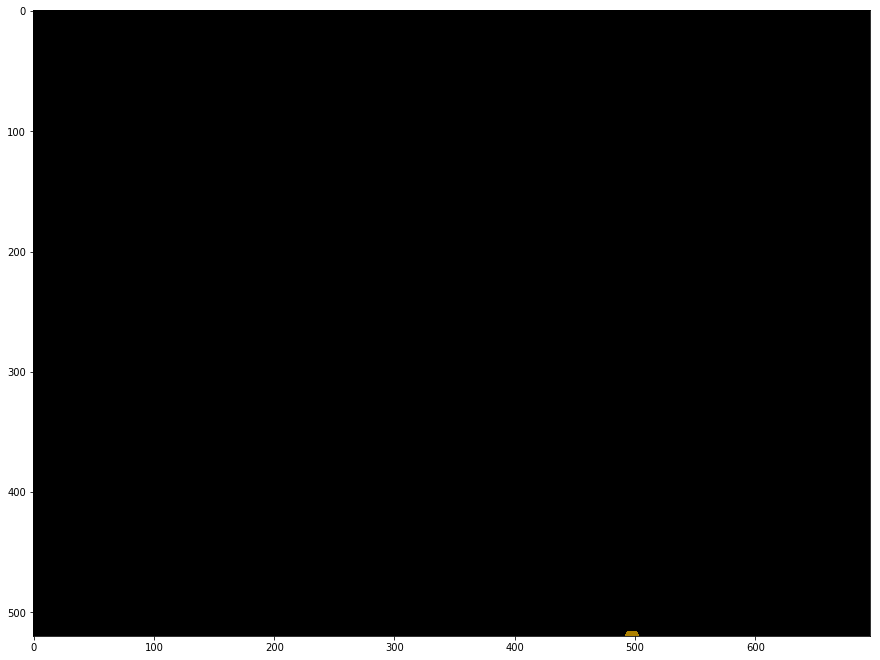

# nuclei gt 69
# nuclei CP 63
# matches 60
# overdetections 3
# underdetections 9
# mean IoU 0.767688


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A06_s6_w1B9577918-4973-4A87-BA73-A168AA755527.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


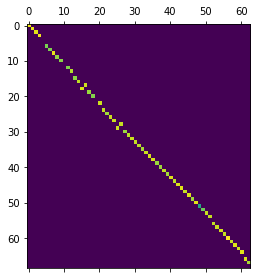

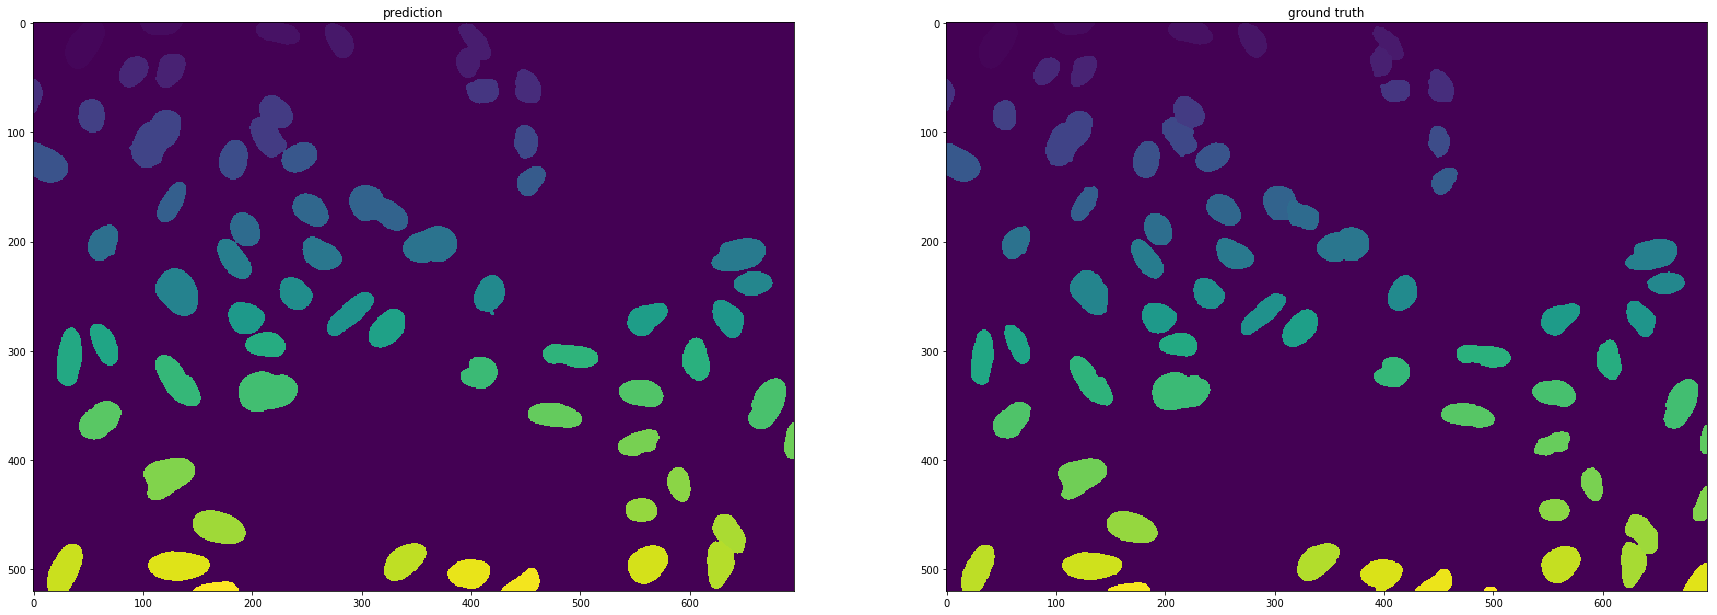

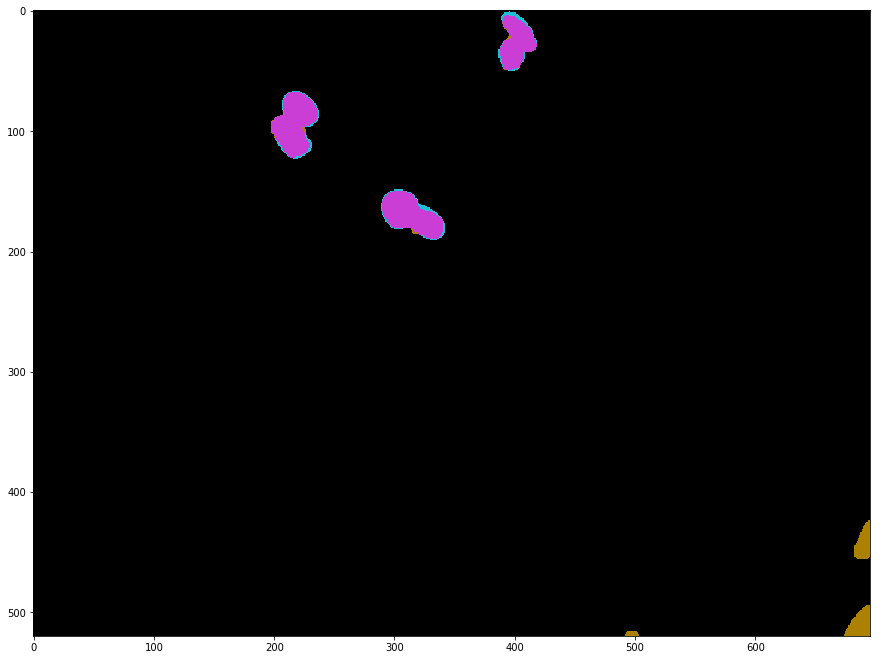

18 / 50
# nuclei gt 88
# nuclei DL 78
# matches 78
# overdetections 0
# underdetections 10
# mean IoU 0.675417


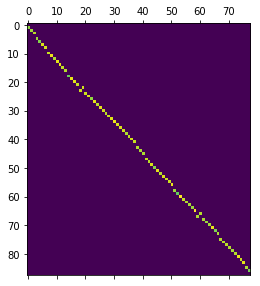

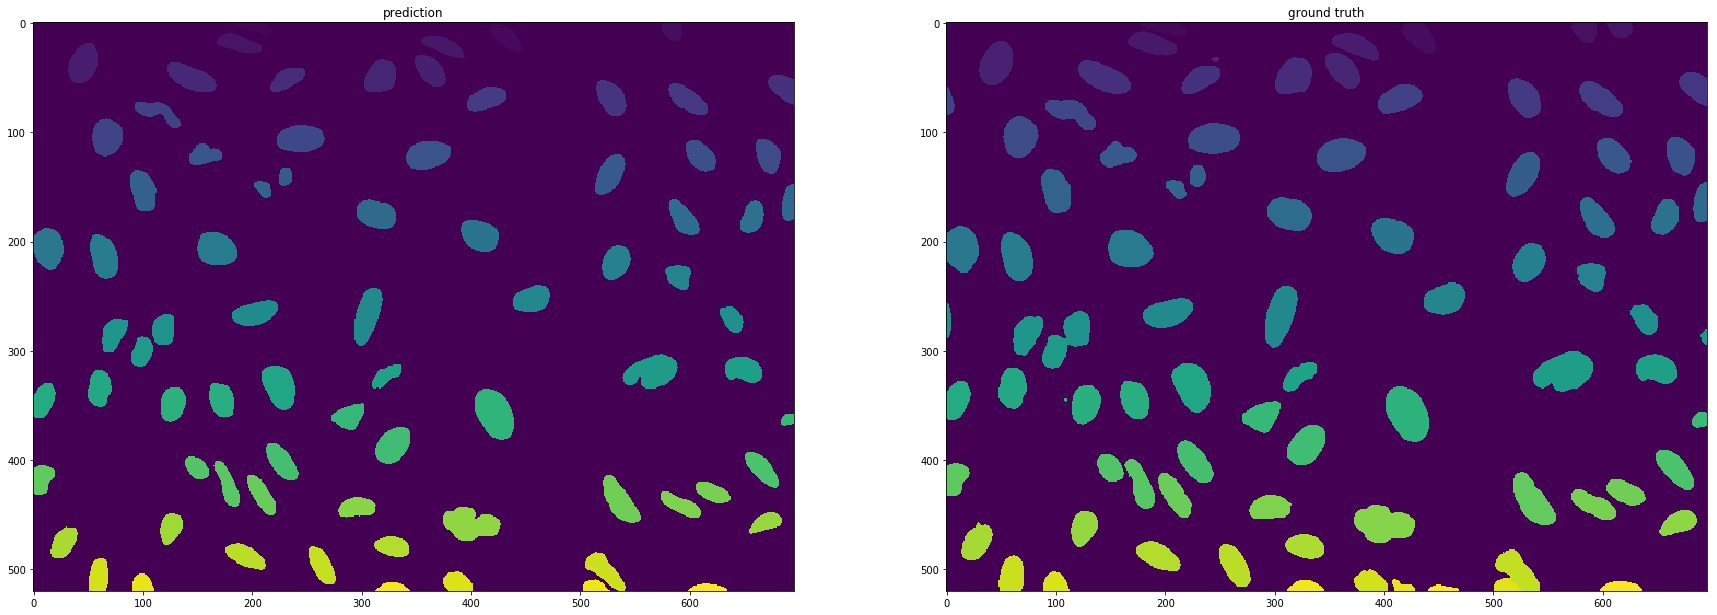

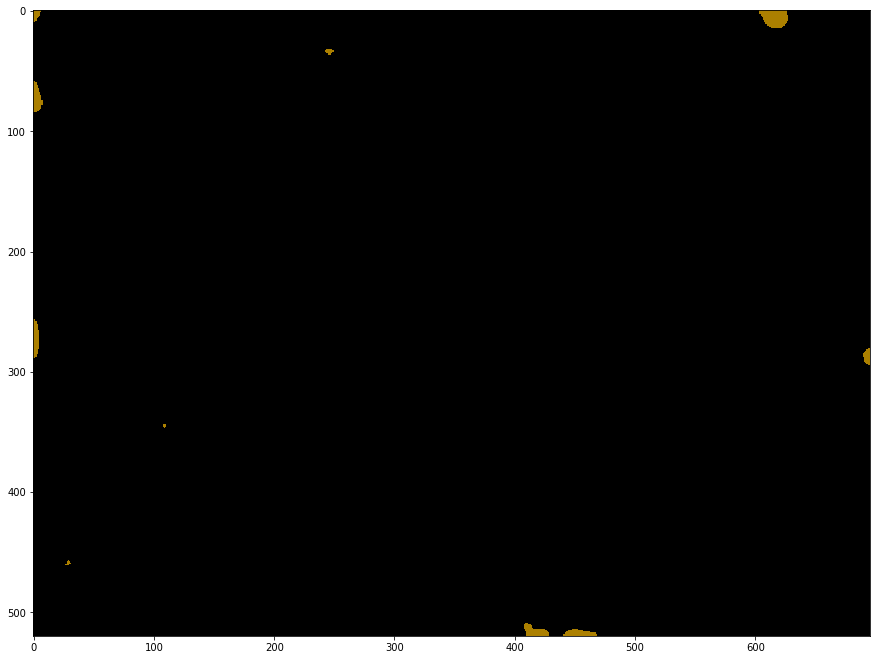

# nuclei gt 88
# nuclei CP 76
# matches 76
# overdetections 0
# underdetections 12
# mean IoU 0.796535


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B20_s2_w159B9FE71-035A-4DED-B0CA-C76916C968BC.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


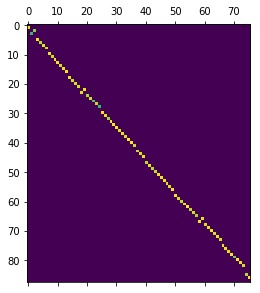

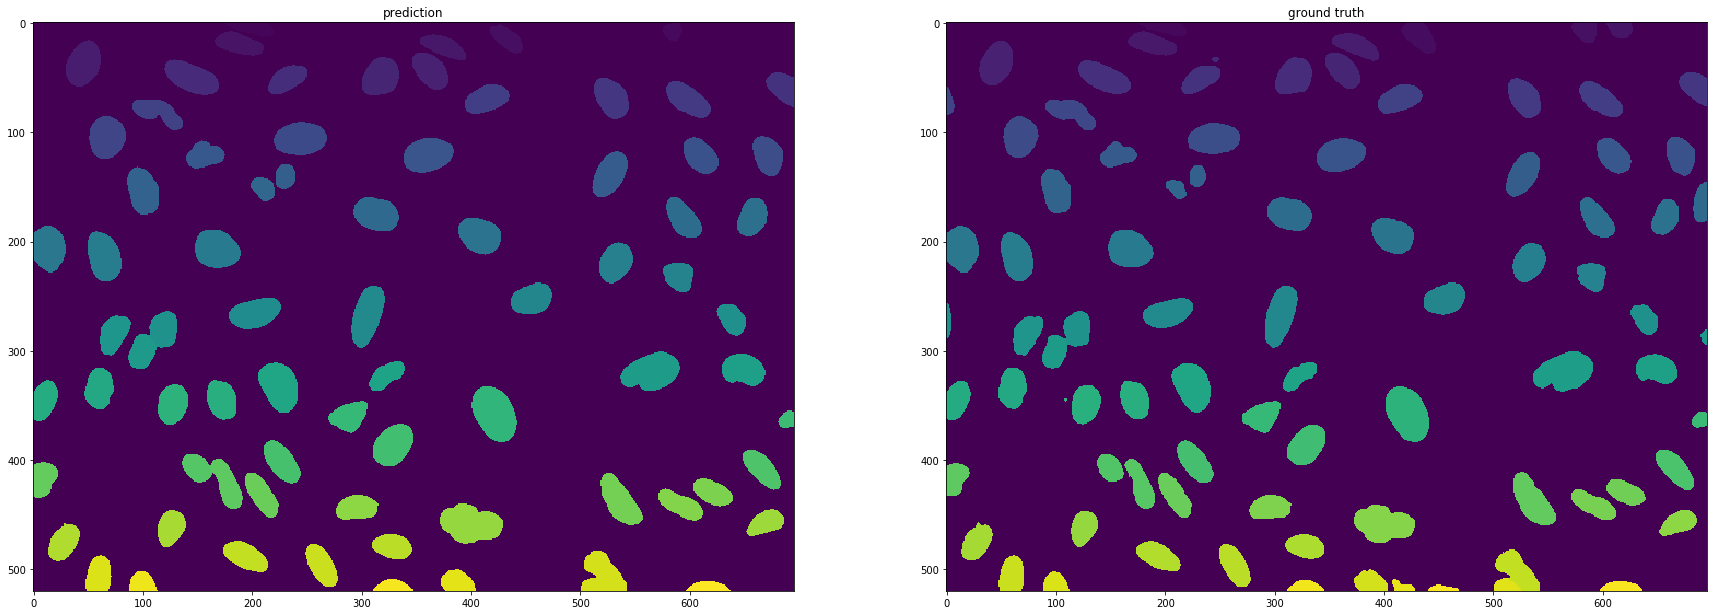

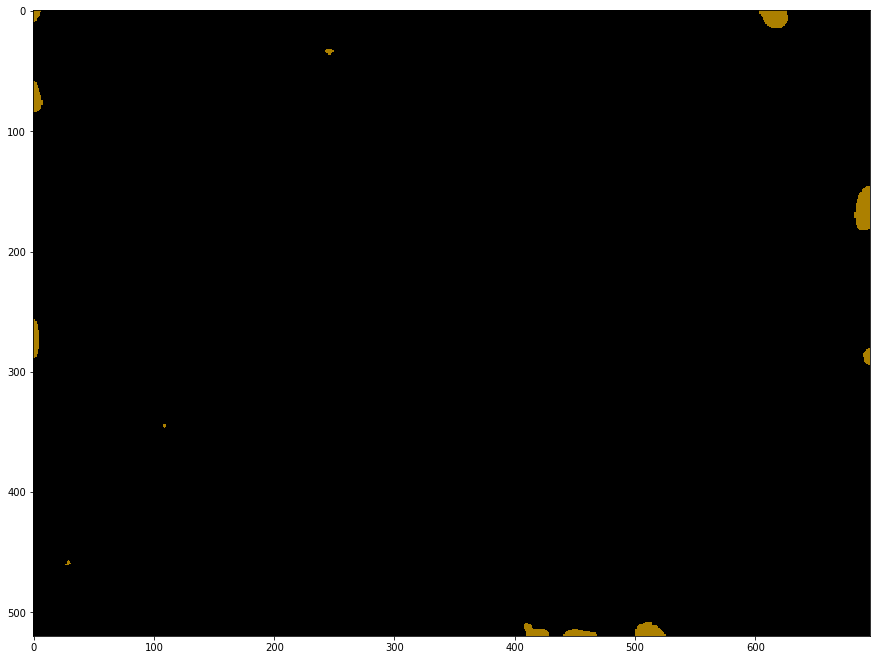

19 / 50
# nuclei gt 128
# nuclei DL 120
# matches 120
# overdetections 0
# underdetections 8
# mean IoU 0.713979


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B20_s2_w159B9FE71-035A-4DED-B0CA-C76916C968BC.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


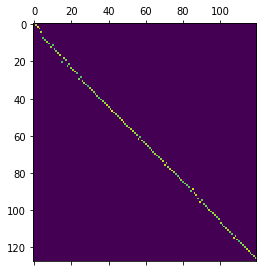

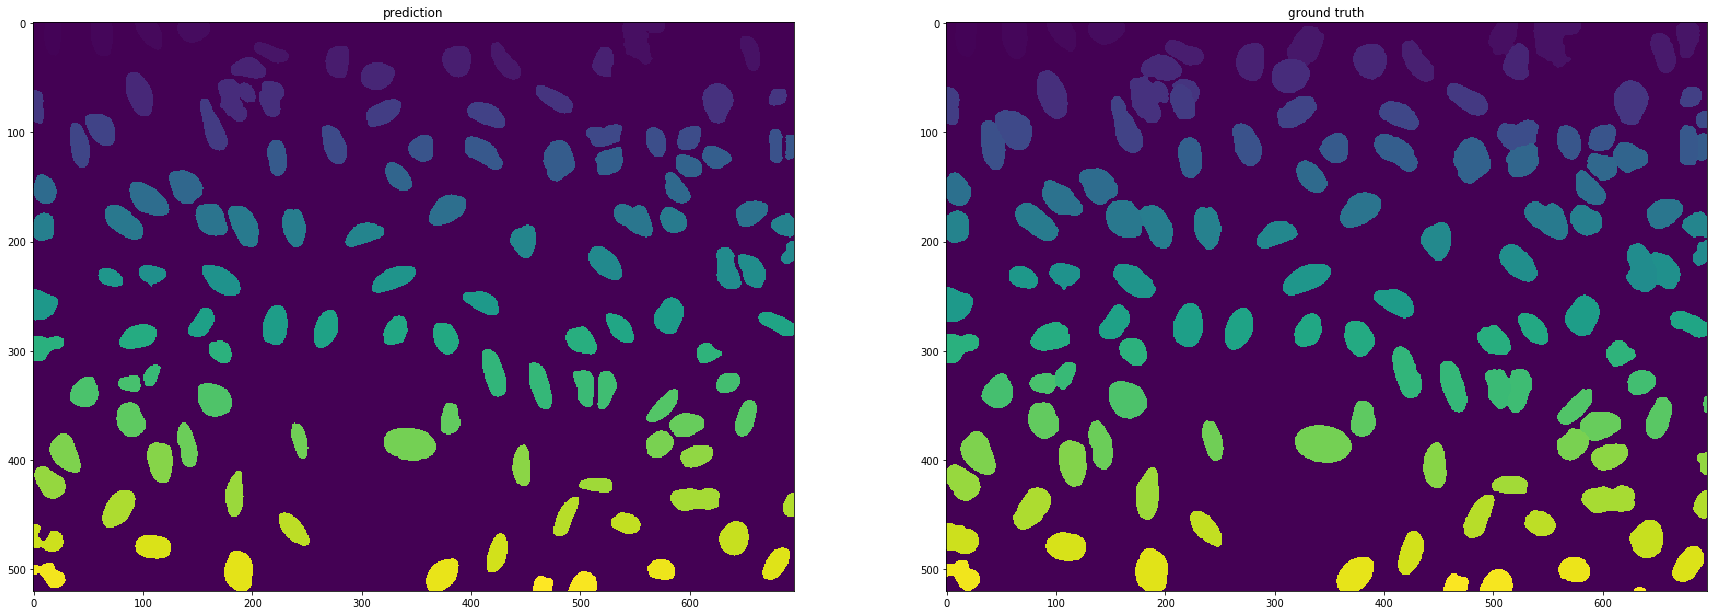

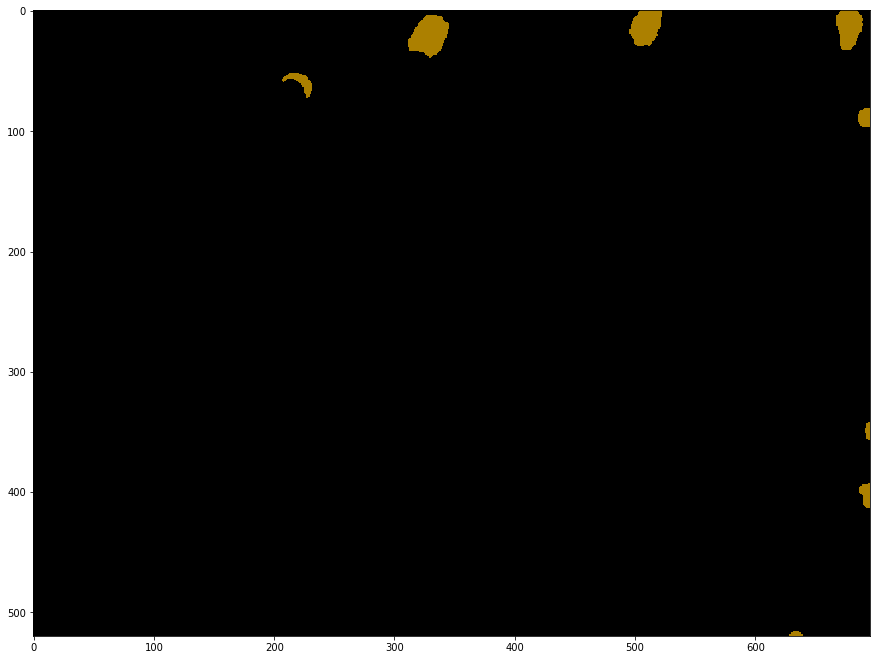

# nuclei gt 128
# nuclei CP 112
# matches 106
# overdetections 6
# underdetections 22
# mean IoU 0.729156


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_E04_s4_w1F5ABC12B-FABD-4E33-AB99-82271209853E.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


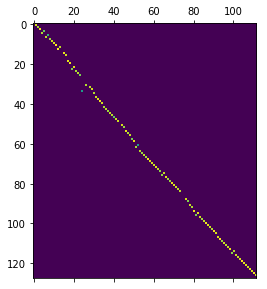

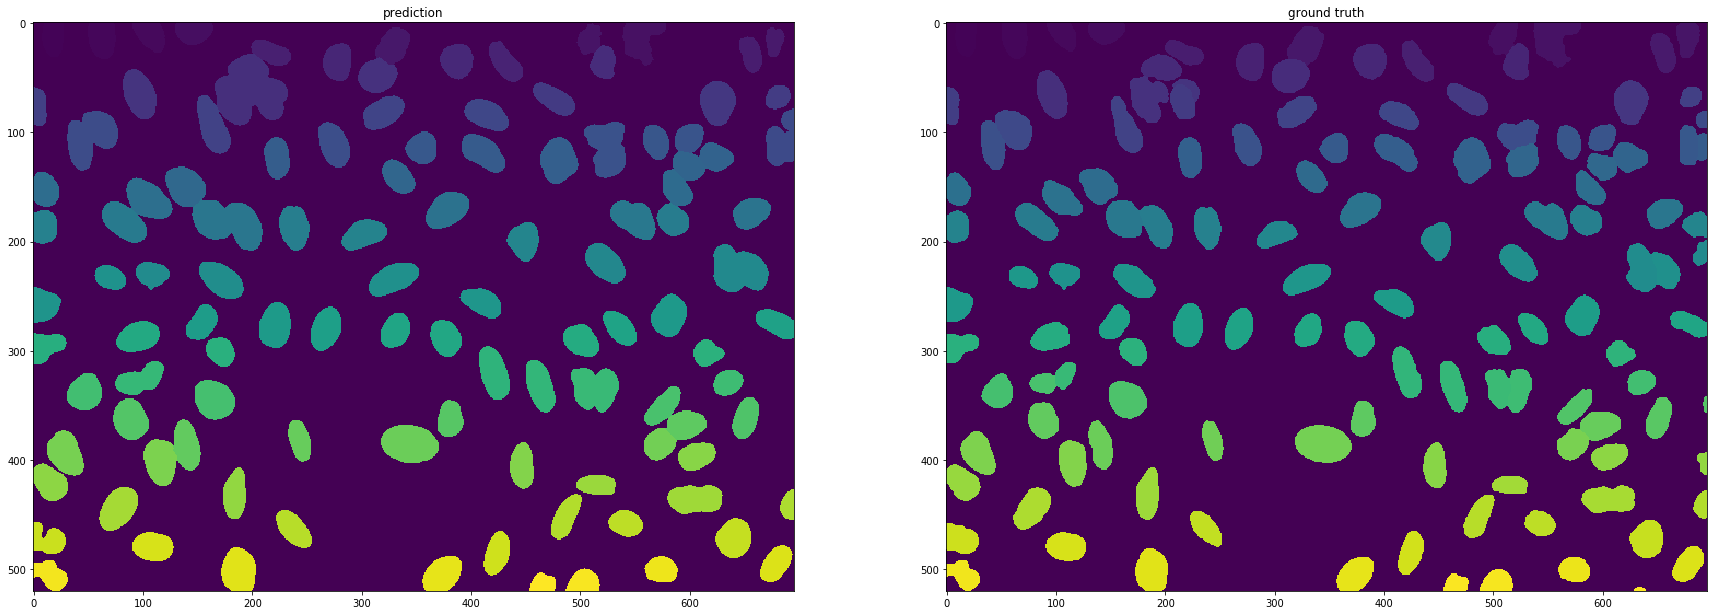

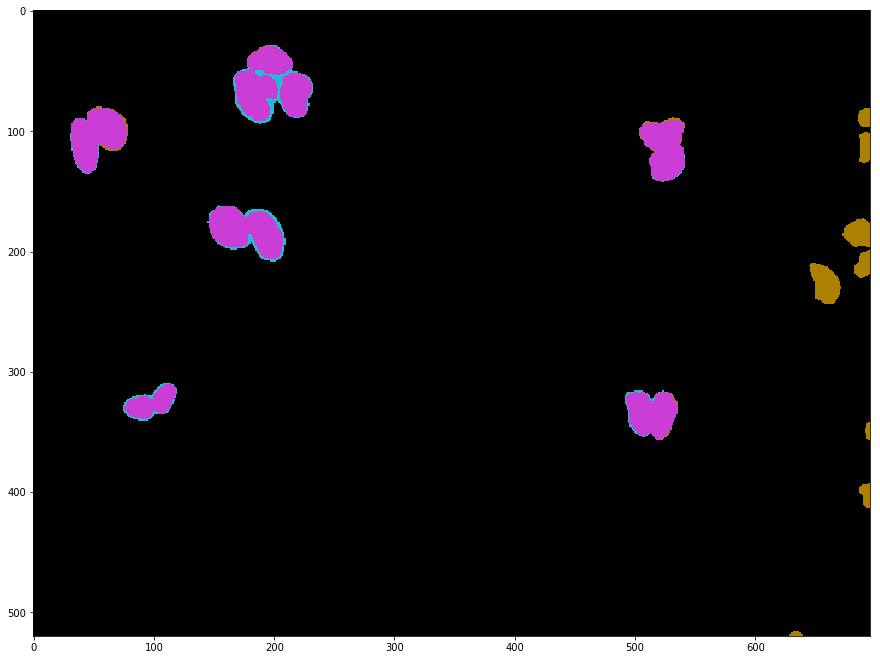

20 / 50
# nuclei gt 117
# nuclei DL 108
# matches 106
# overdetections 2
# underdetections 11
# mean IoU 0.696641


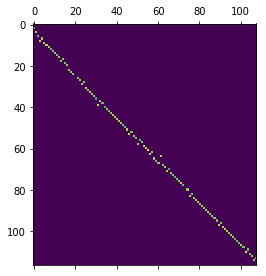

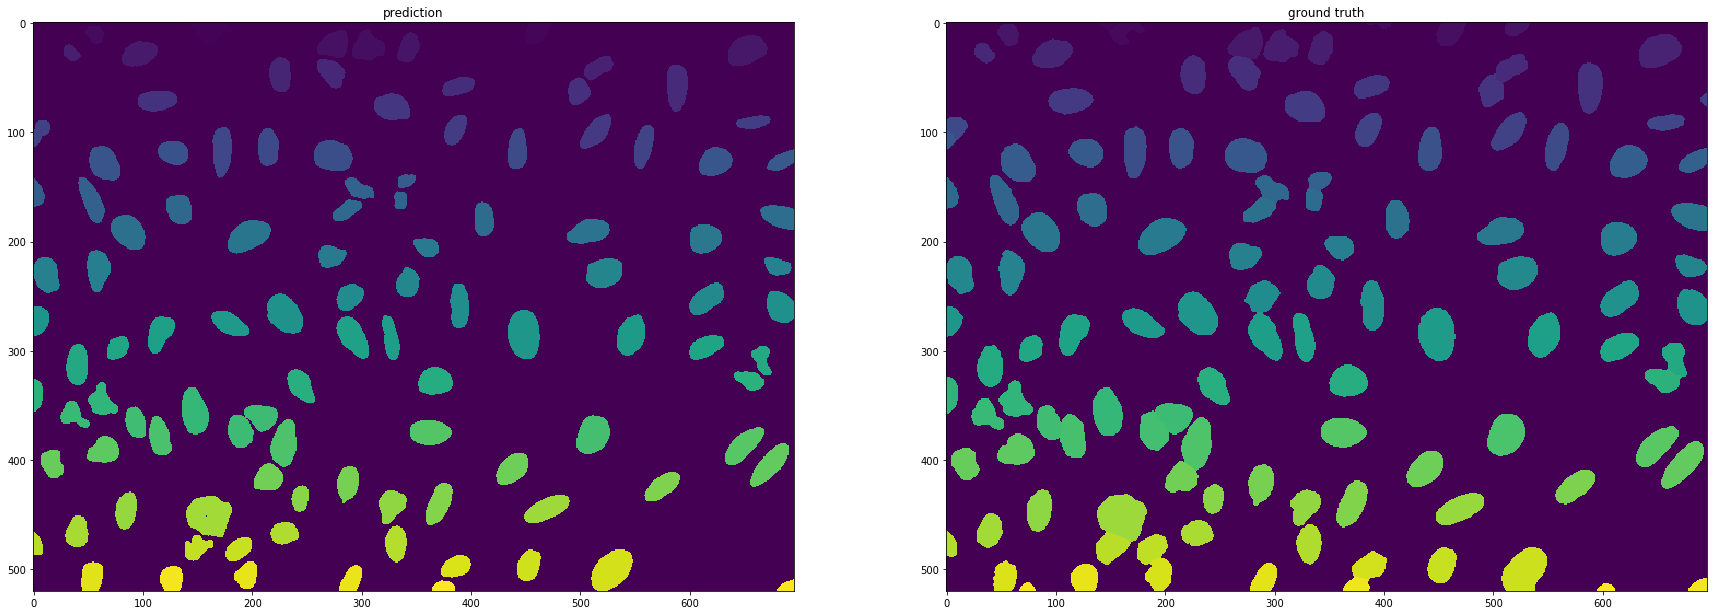

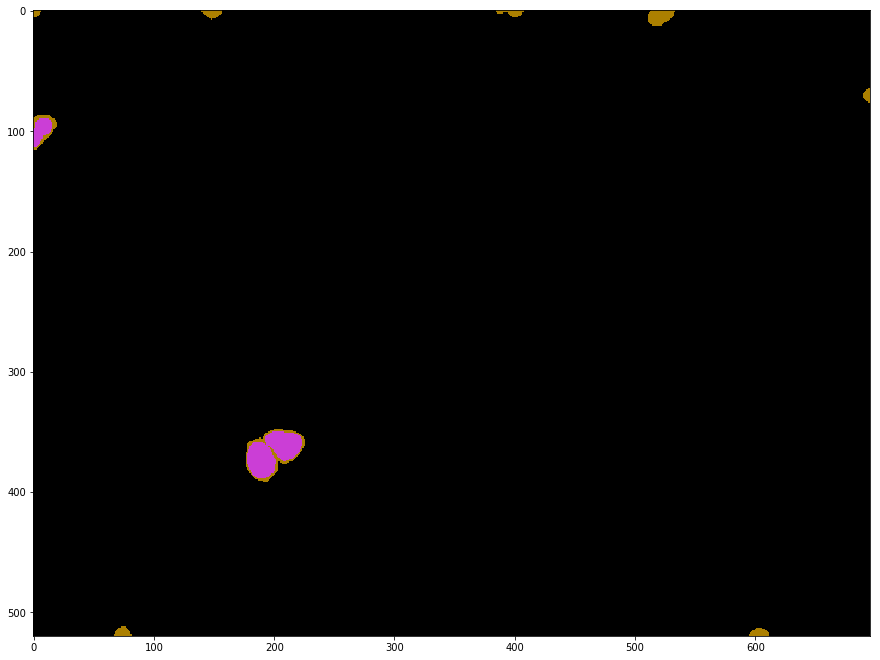

# nuclei gt 117
# nuclei CP 103
# matches 99
# overdetections 4
# underdetections 18
# mean IoU 0.722225


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C19_s4_w1AD3DC23E-B9B5-46E9-9716-26096C672A13.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


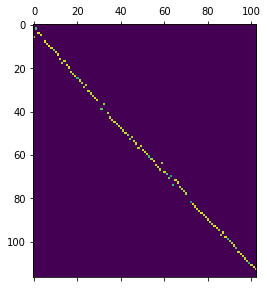

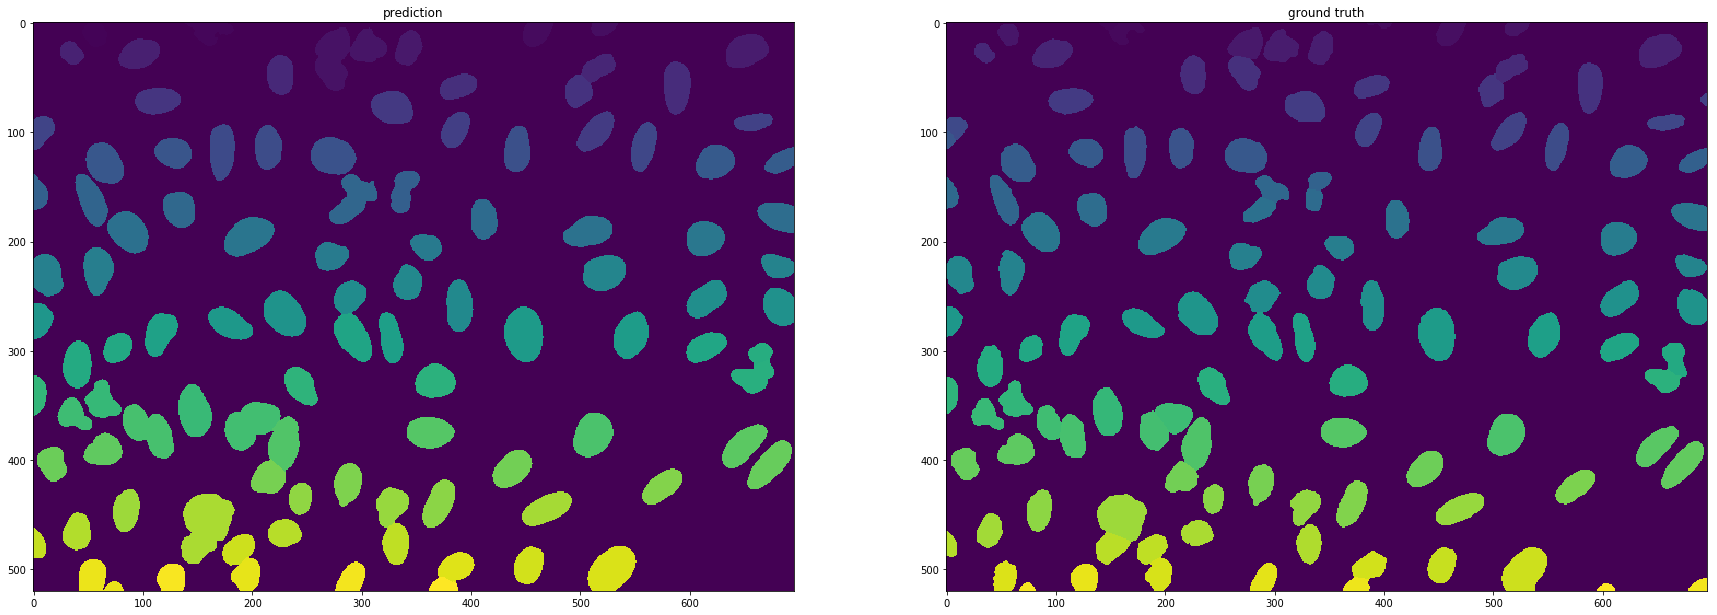

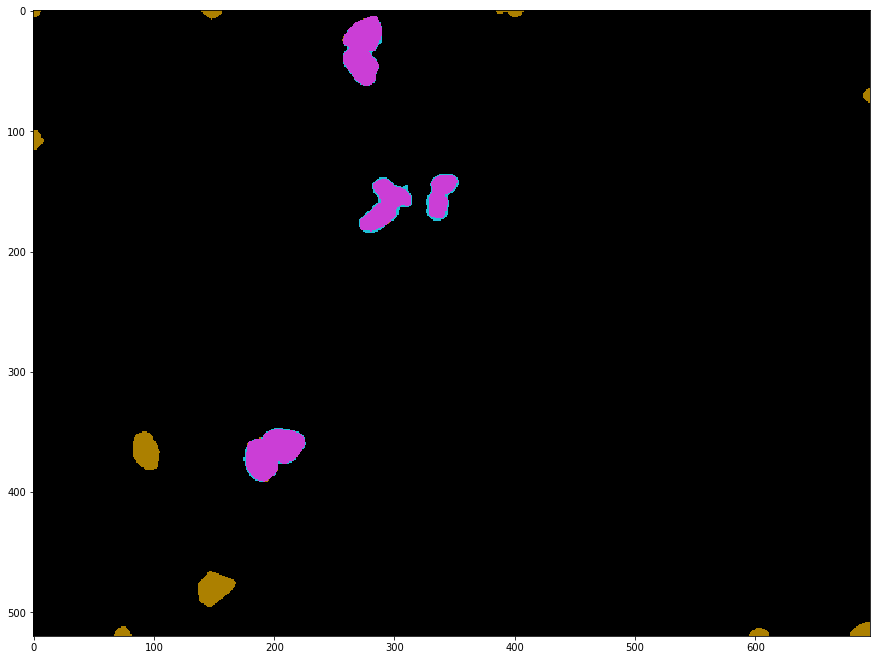

21 / 50
# nuclei gt 40
# nuclei DL 33
# matches 33
# overdetections 0
# underdetections 7
# mean IoU 0.626068


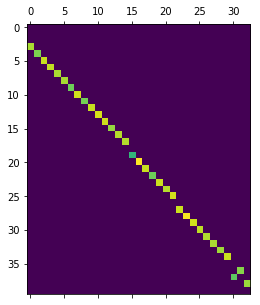

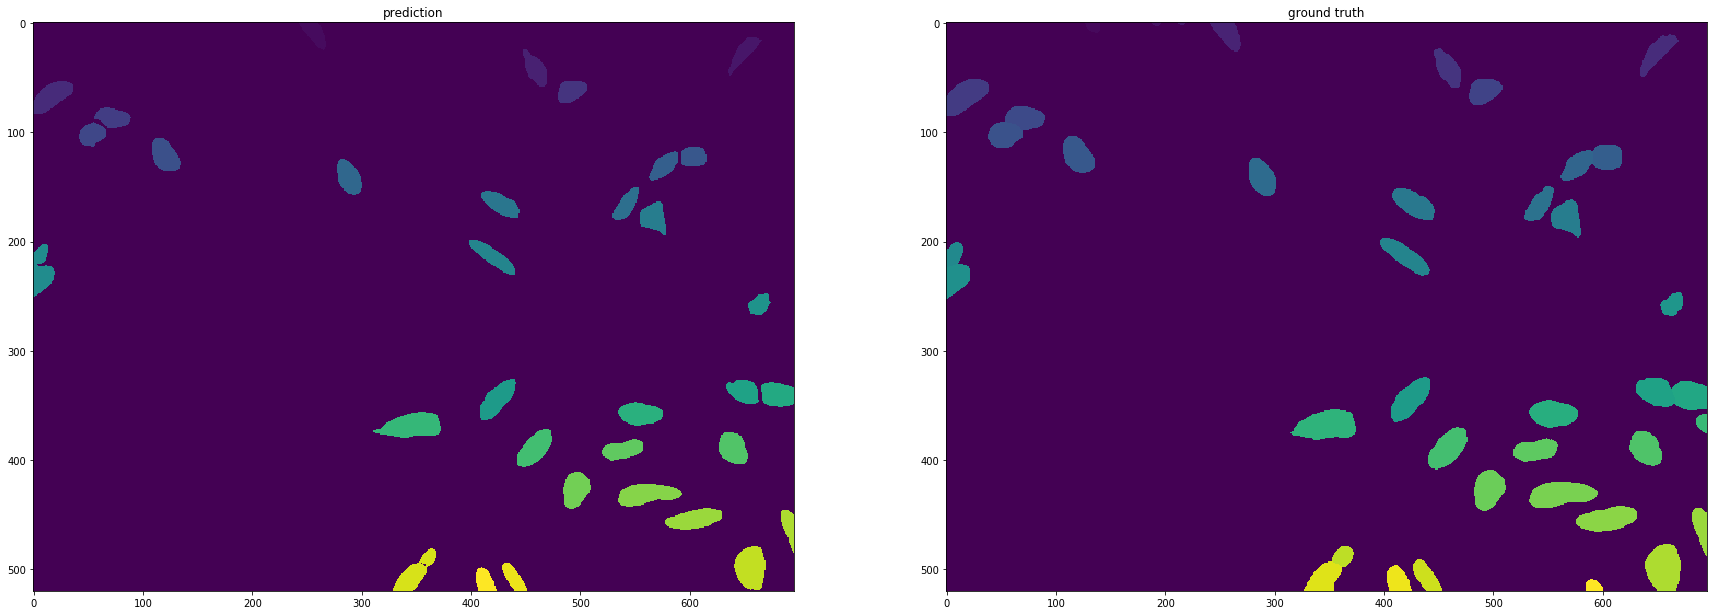

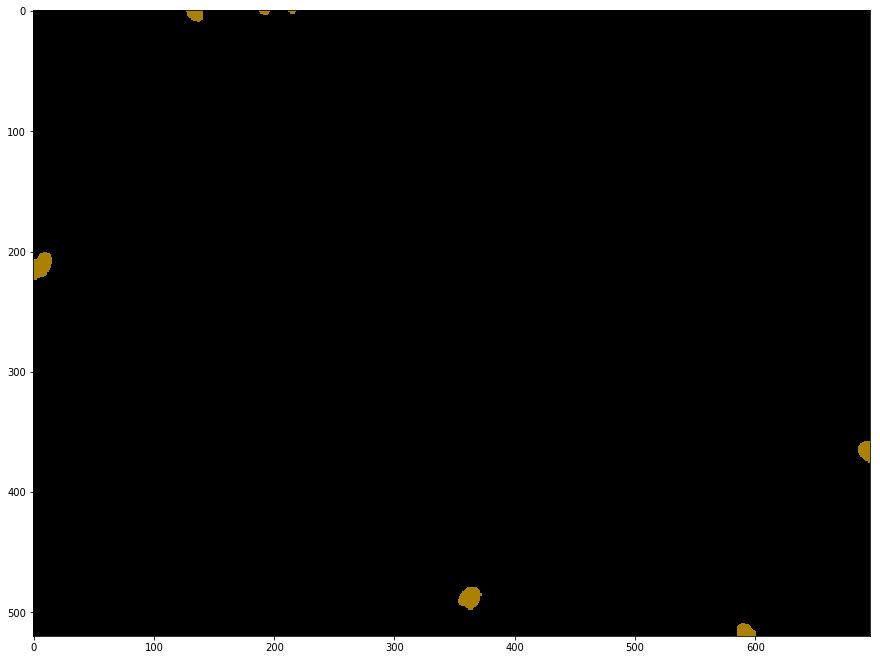

# nuclei gt 40
# nuclei CP 31
# matches 30
# overdetections 1
# underdetections 10
# mean IoU 0.634048


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


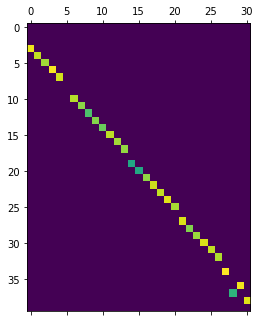

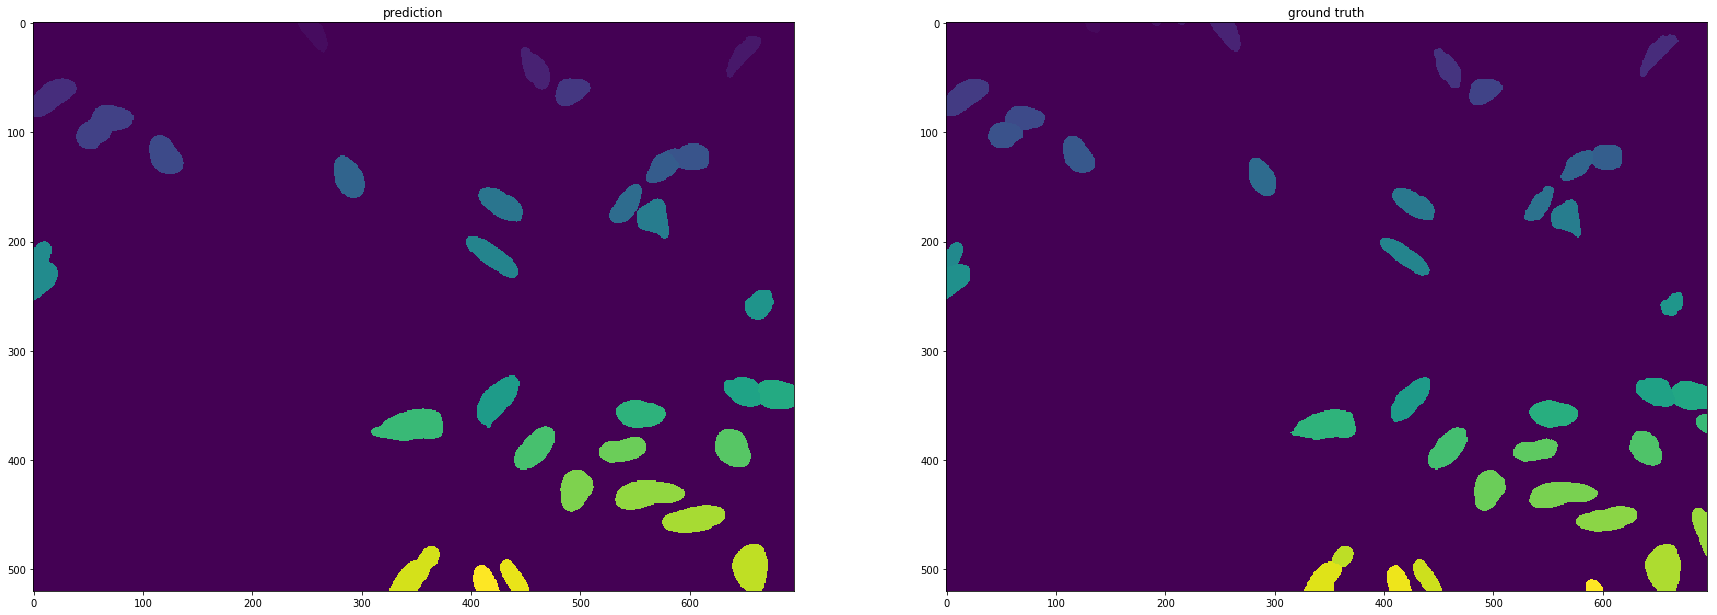

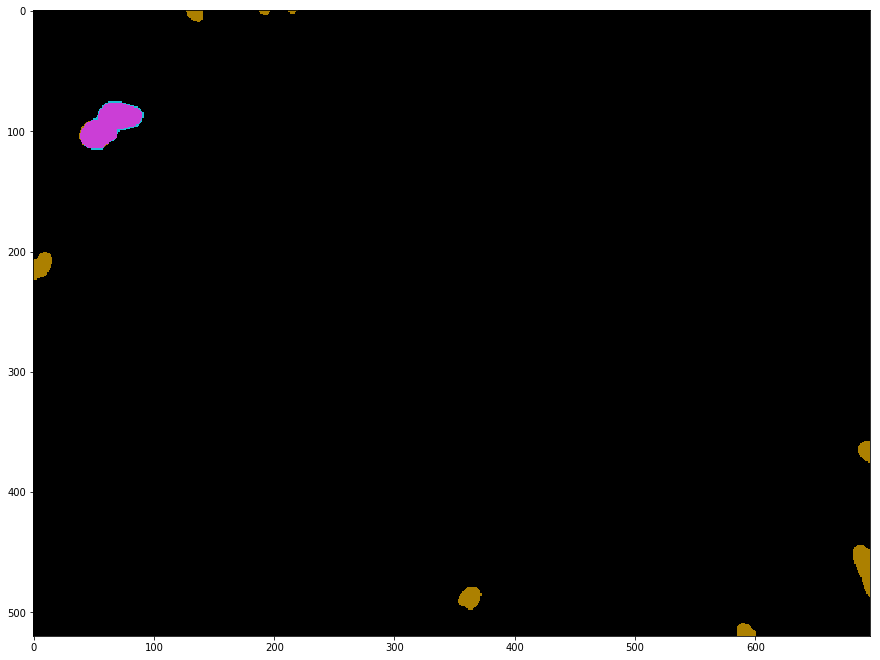

22 / 50
# nuclei gt 138
# nuclei DL 129
# matches 126
# overdetections 3
# underdetections 12
# mean IoU 0.690744


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


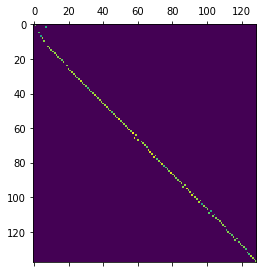

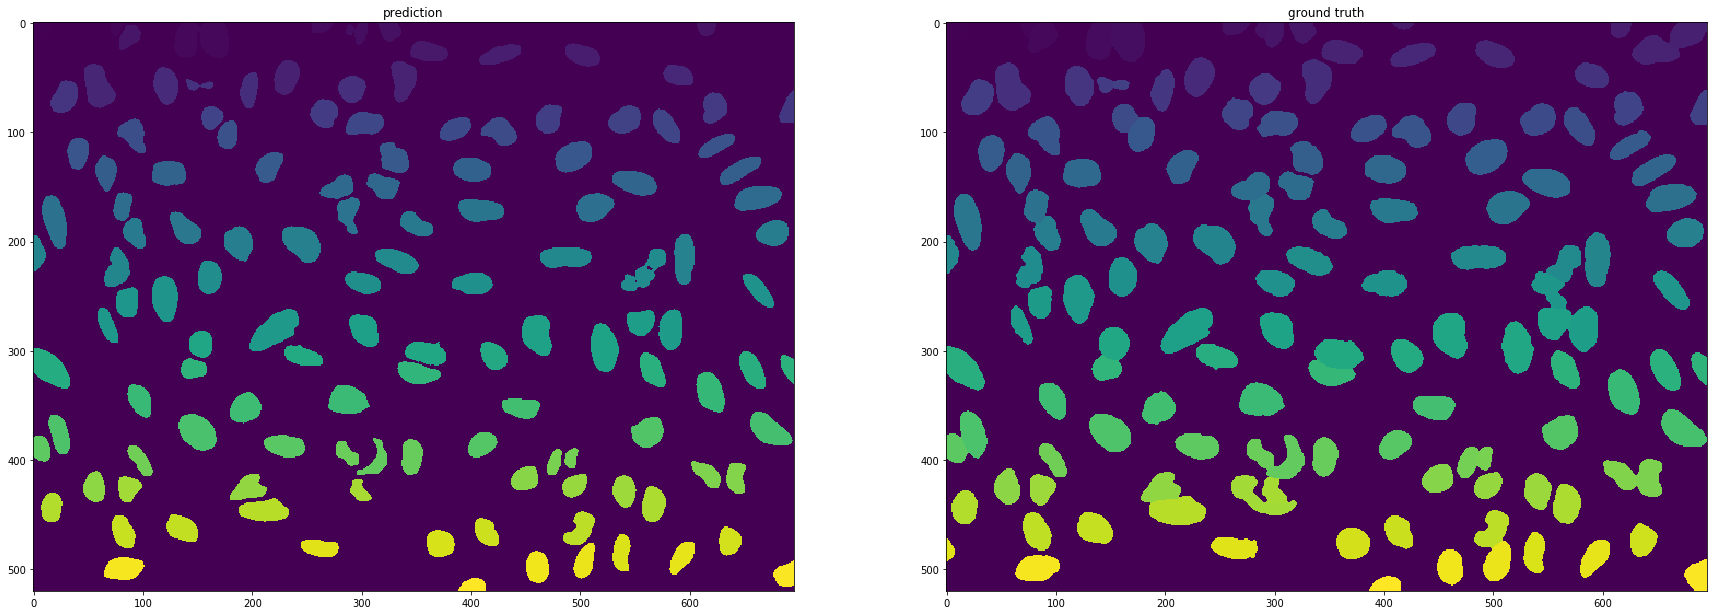

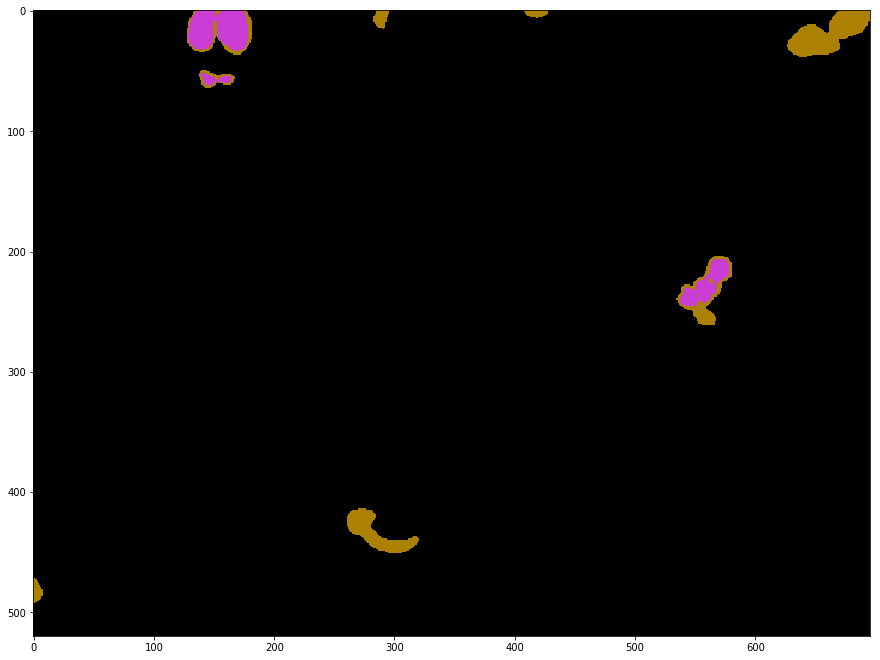

# nuclei gt 138
# nuclei CP 120
# matches 116
# overdetections 4
# underdetections 22
# mean IoU 0.726498


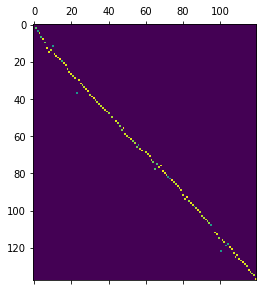

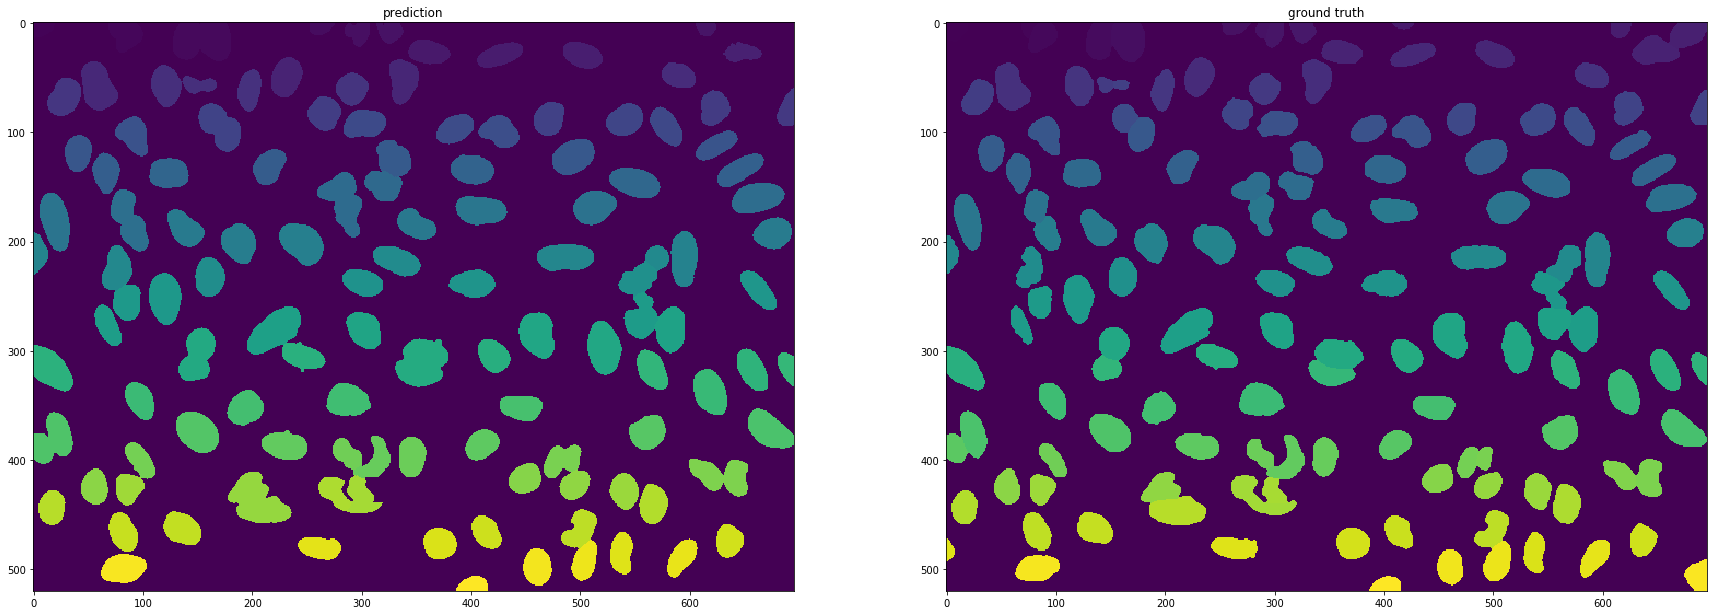

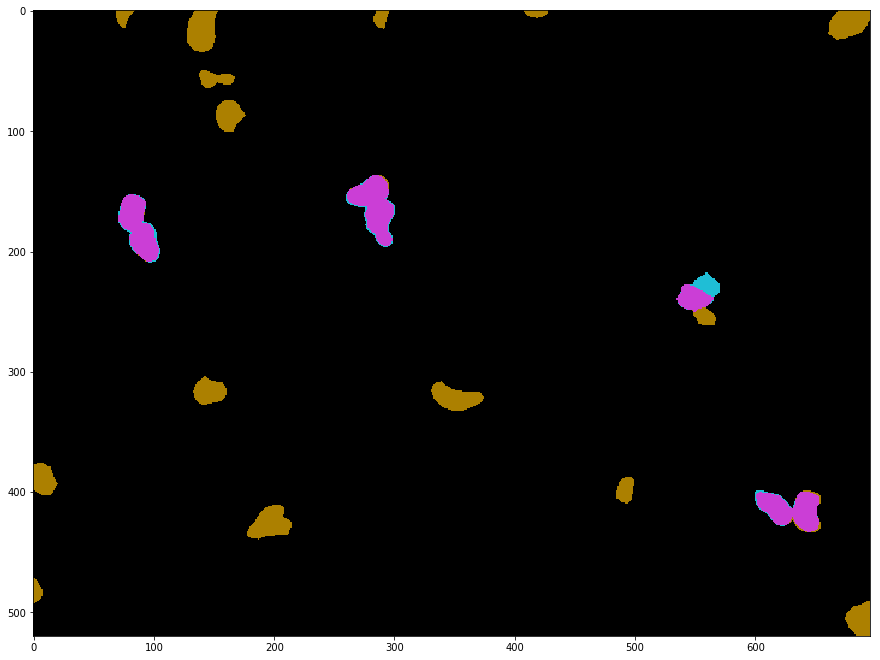

23 / 50
# nuclei gt 102
# nuclei DL 94
# matches 93
# overdetections 1
# underdetections 9
# mean IoU 0.696053


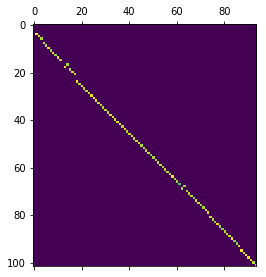

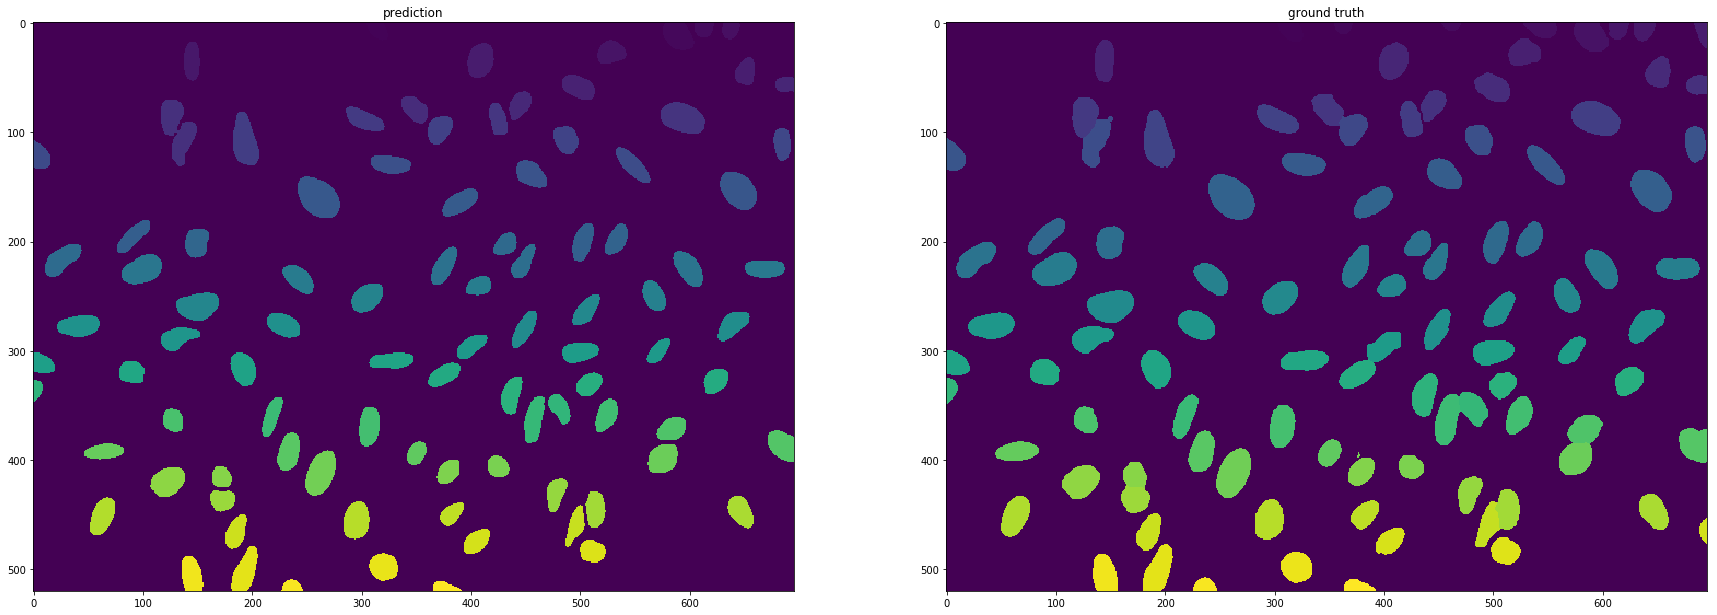

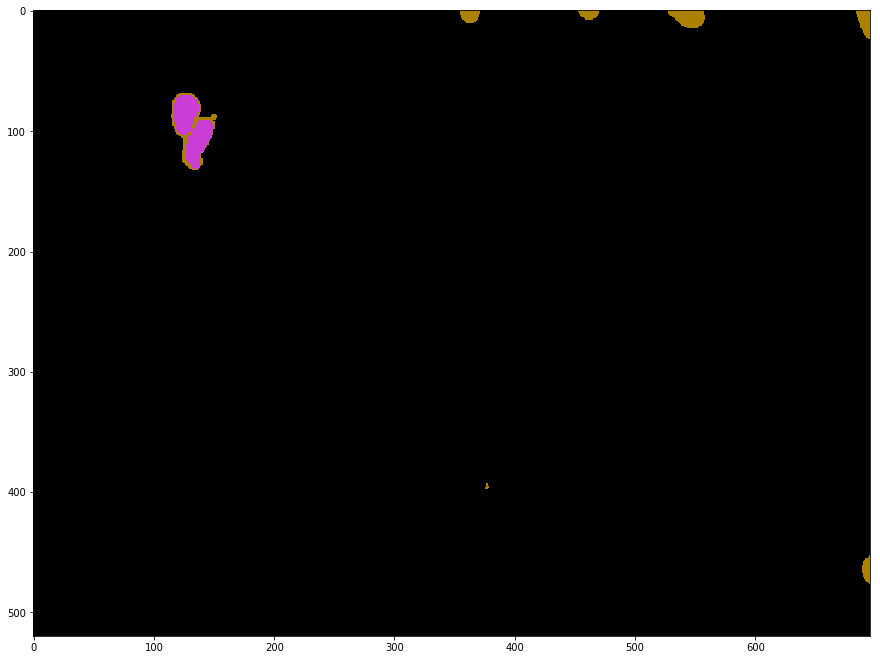

# nuclei gt 102
# nuclei CP 93
# matches 92
# overdetections 1
# underdetections 10
# mean IoU 0.795502


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A18_s1_w1BFDF1C94-9C1F-4F5F-BBC1-05196333B1BF.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


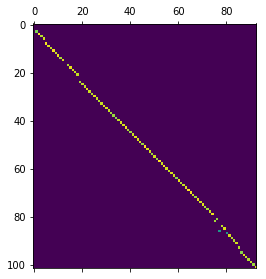

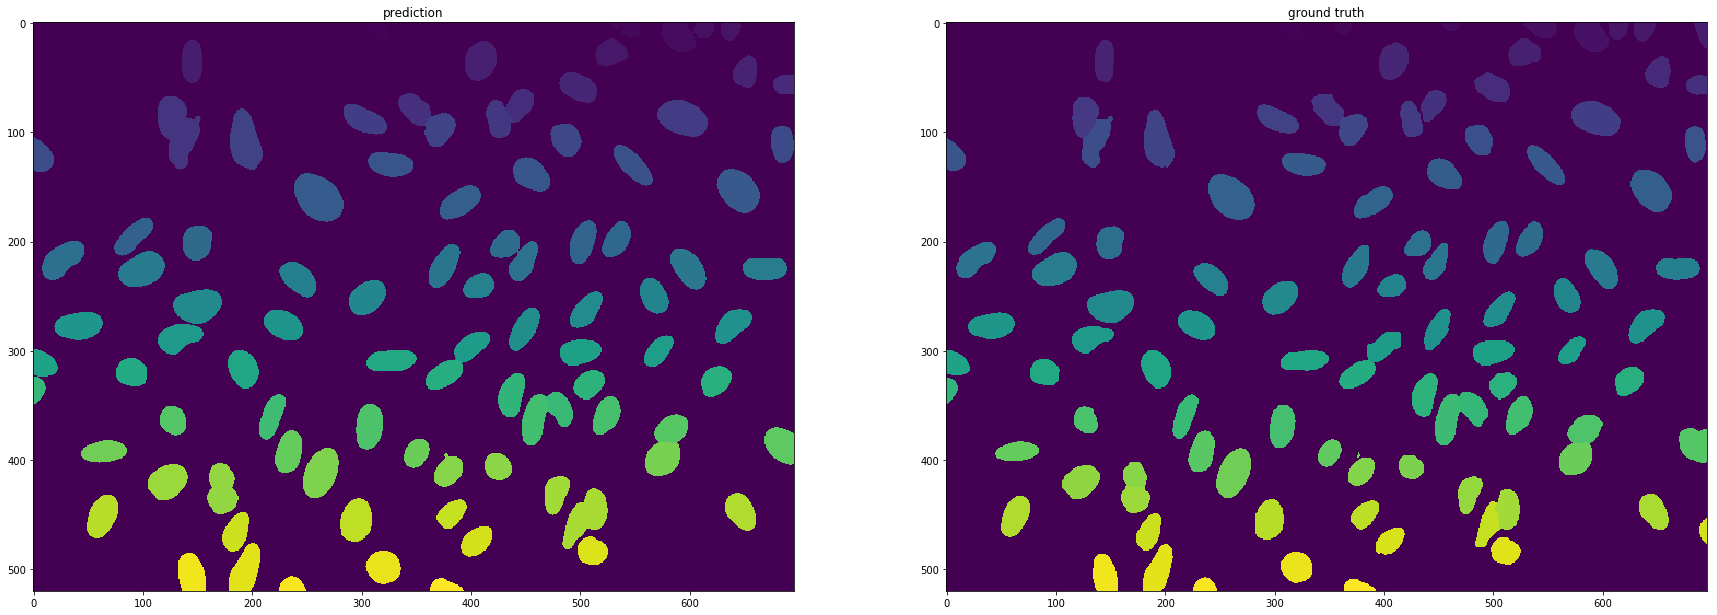

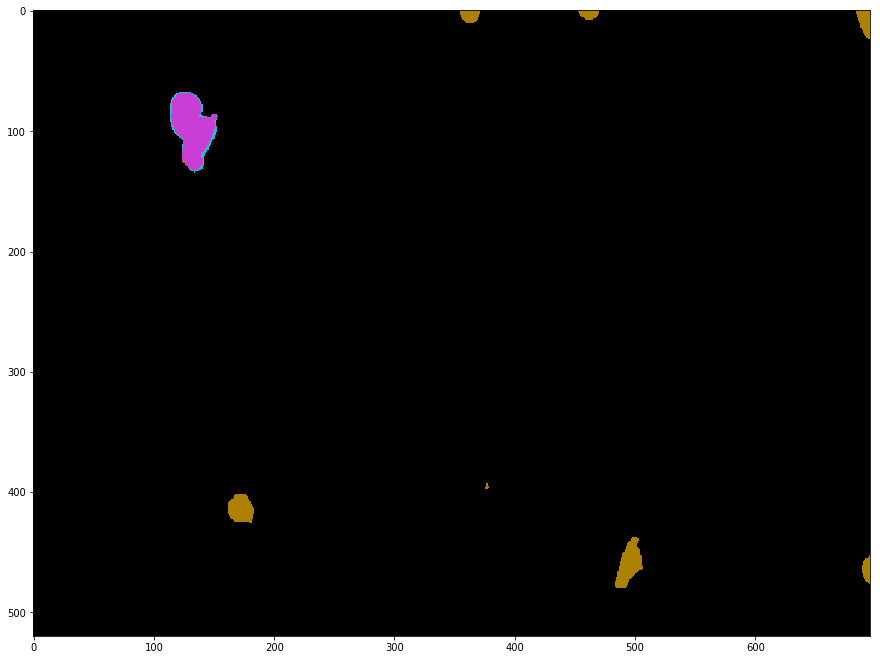

24 / 50
# nuclei gt 90
# nuclei DL 82
# matches 82
# overdetections 0
# underdetections 8
# mean IoU 0.68838


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_A18_s1_w1BFDF1C94-9C1F-4F5F-BBC1-05196333B1BF.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


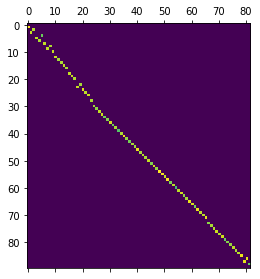

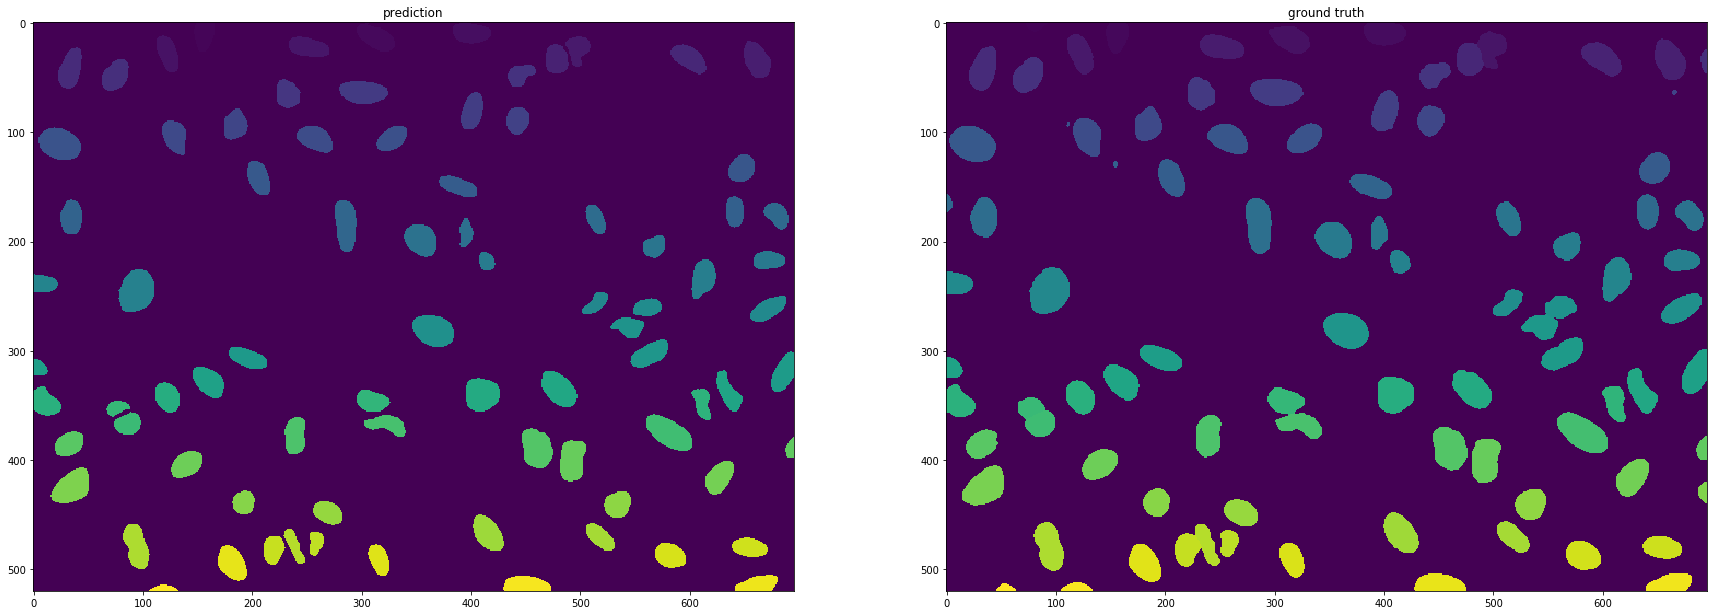

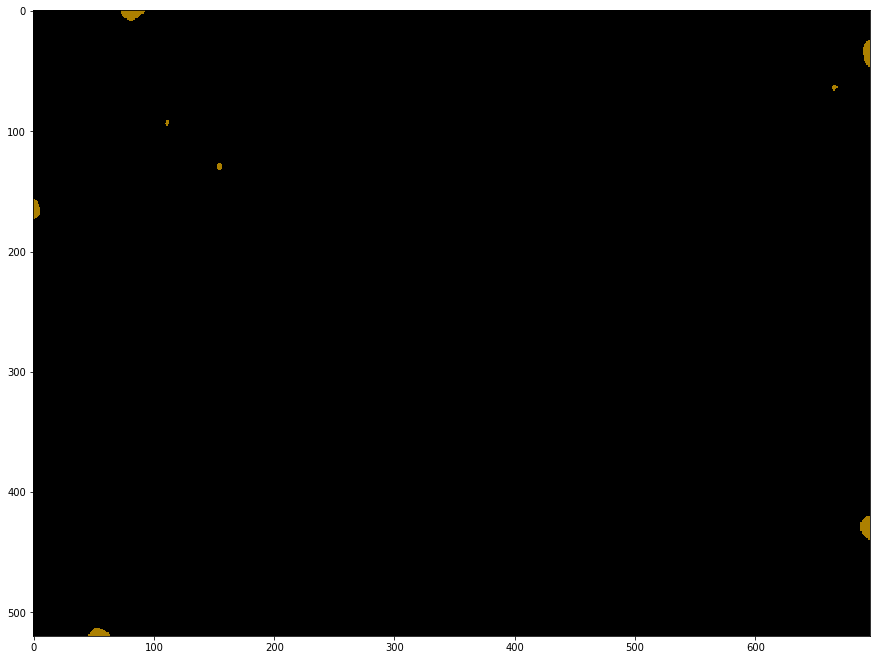

# nuclei gt 90
# nuclei CP 76
# matches 75
# overdetections 1
# underdetections 15
# mean IoU 0.7412


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B19_s7_w1E43B84DB-39E2-4BFB-8CB4-554B32098C75.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


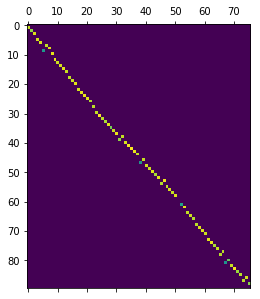

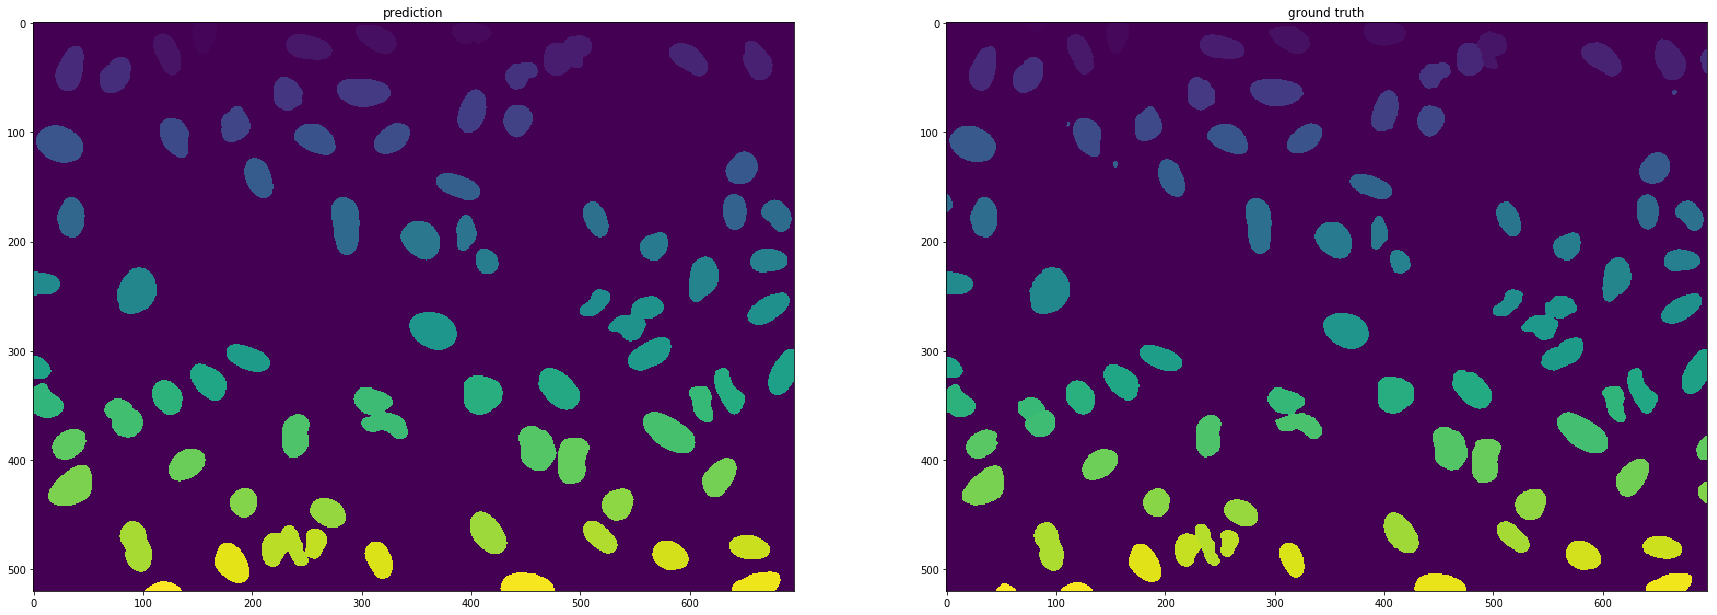

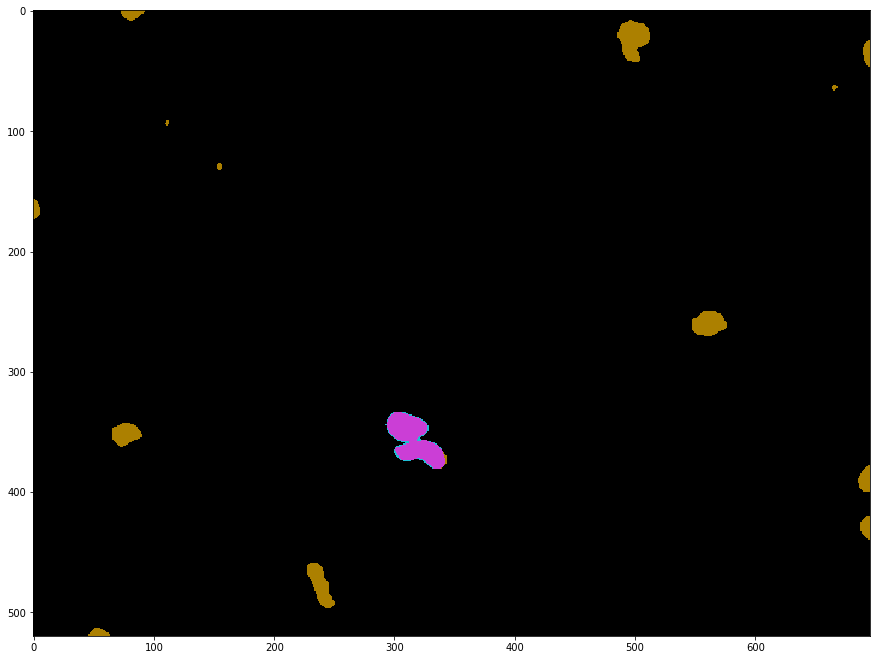

25 / 50
# nuclei gt 113
# nuclei DL 106
# matches 106
# overdetections 0
# underdetections 7
# mean IoU 0.685562


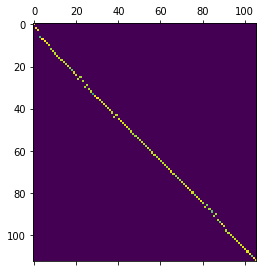

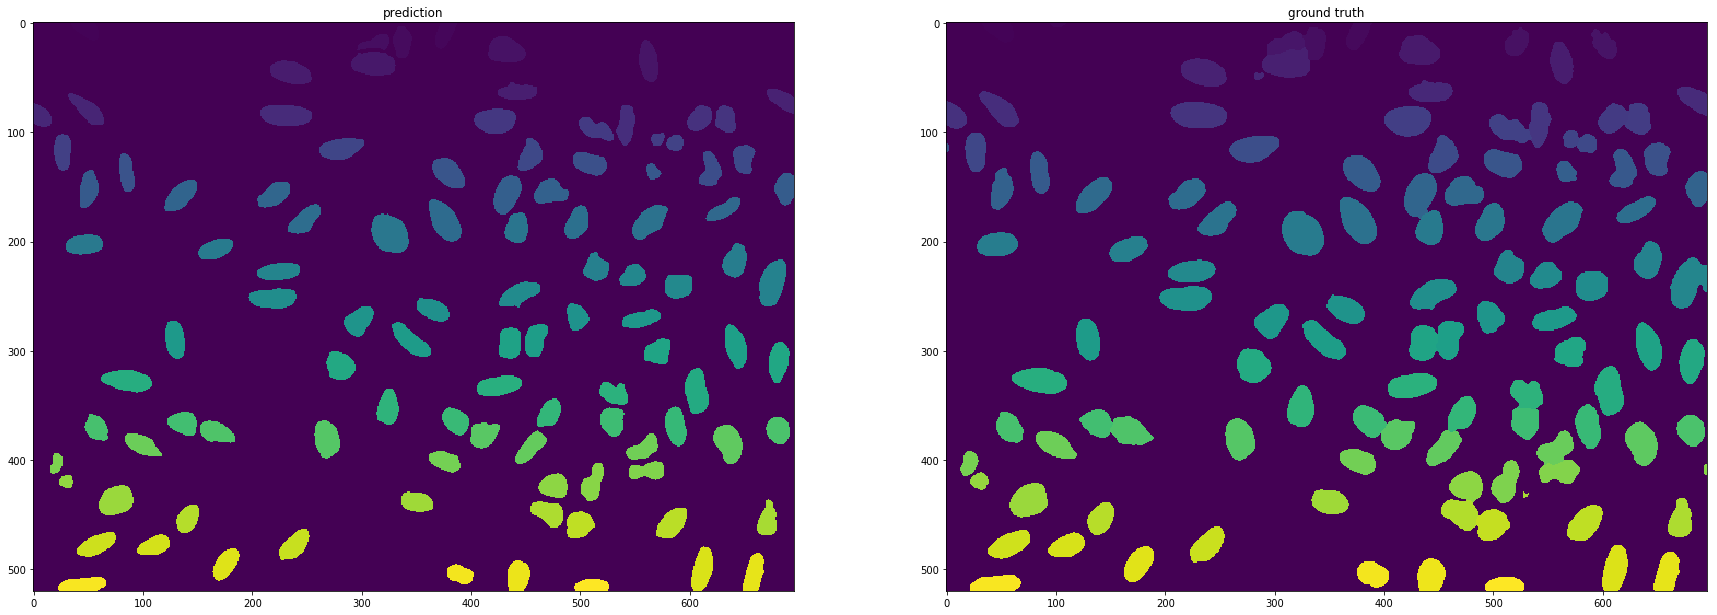

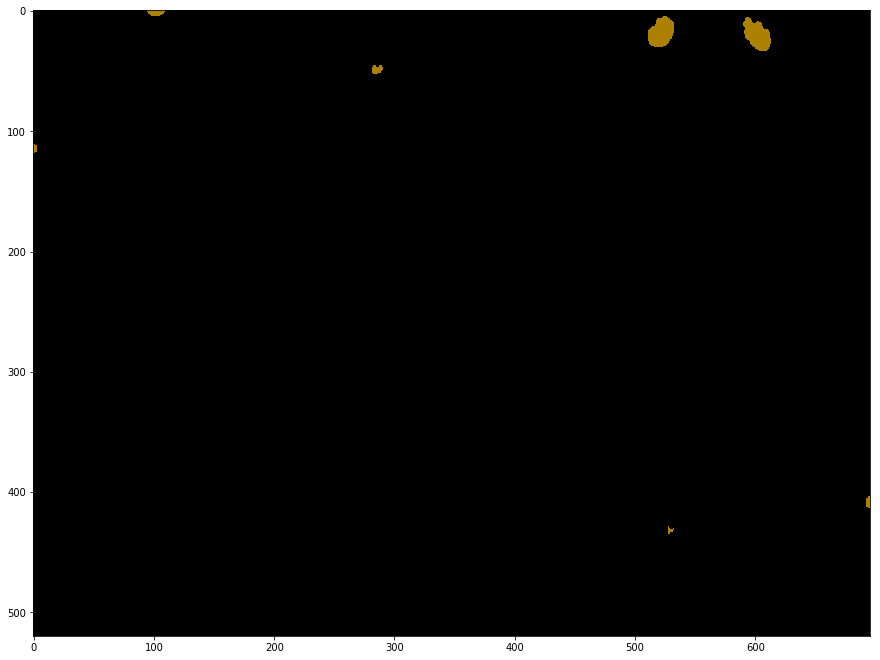

# nuclei gt 113
# nuclei CP 99
# matches 91
# overdetections 8
# underdetections 22
# mean IoU 0.734412


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B12_s2_w19F7E0279-D087-4B5E-9899-61971C29CB78.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


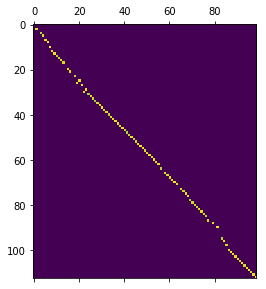

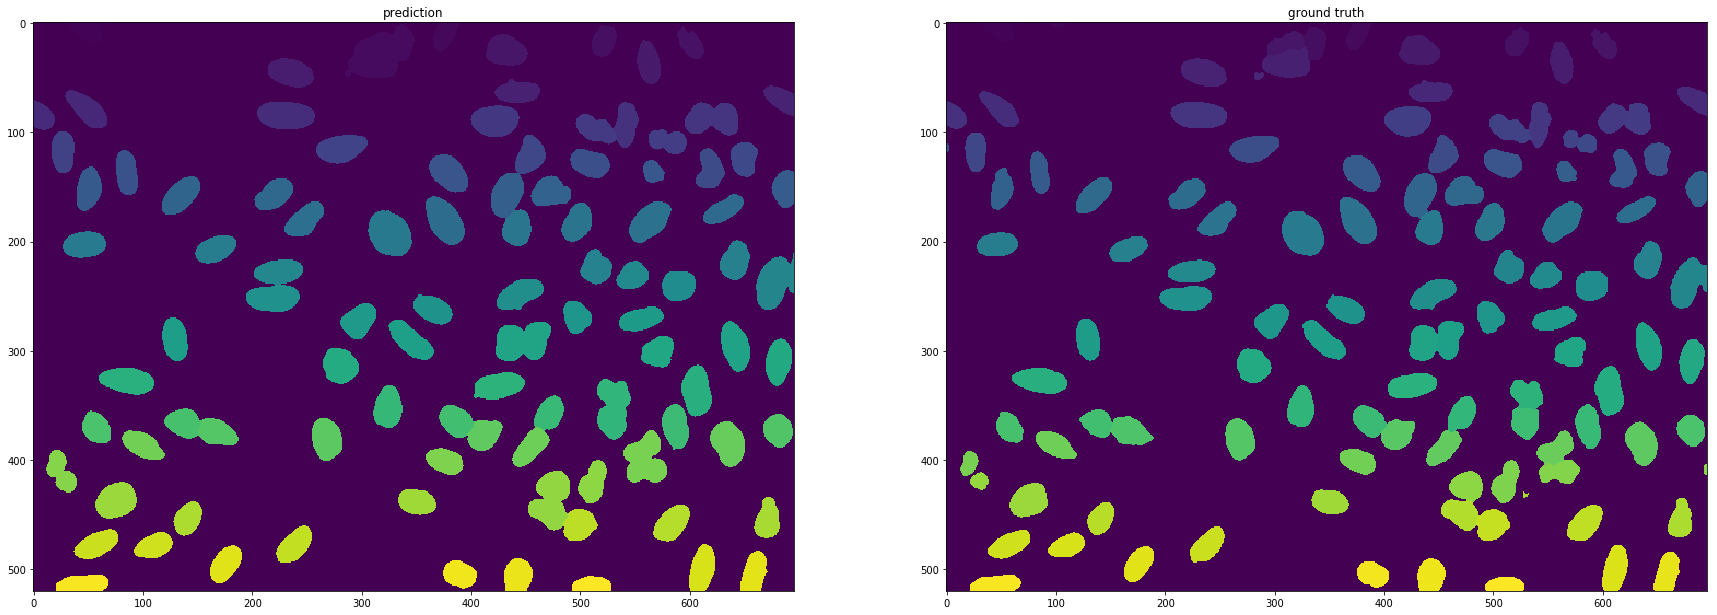

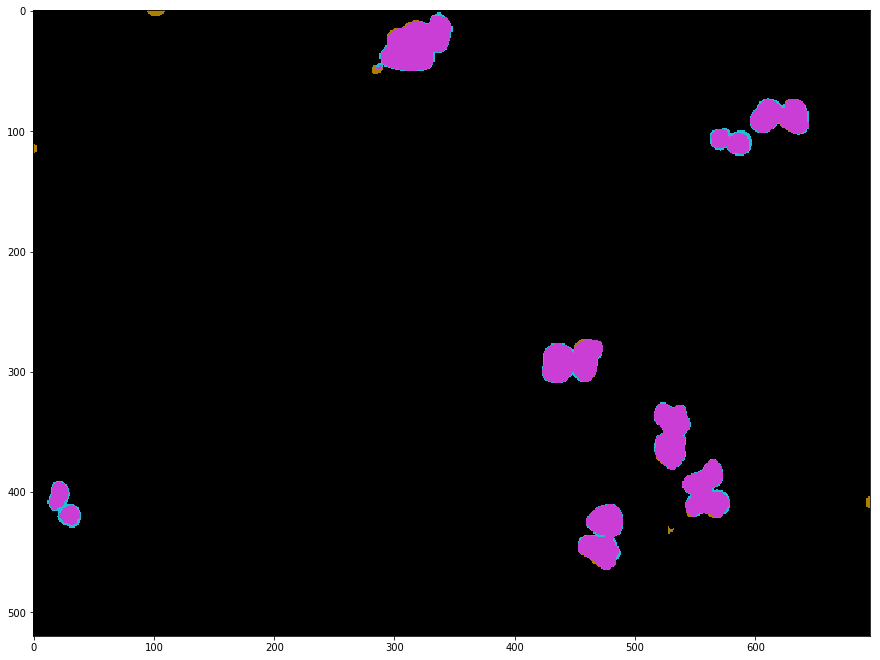

26 / 50
# nuclei gt 112
# nuclei DL 100
# matches 99
# overdetections 1
# underdetections 13
# mean IoU 0.682907


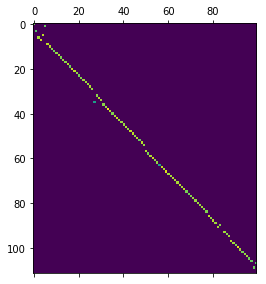

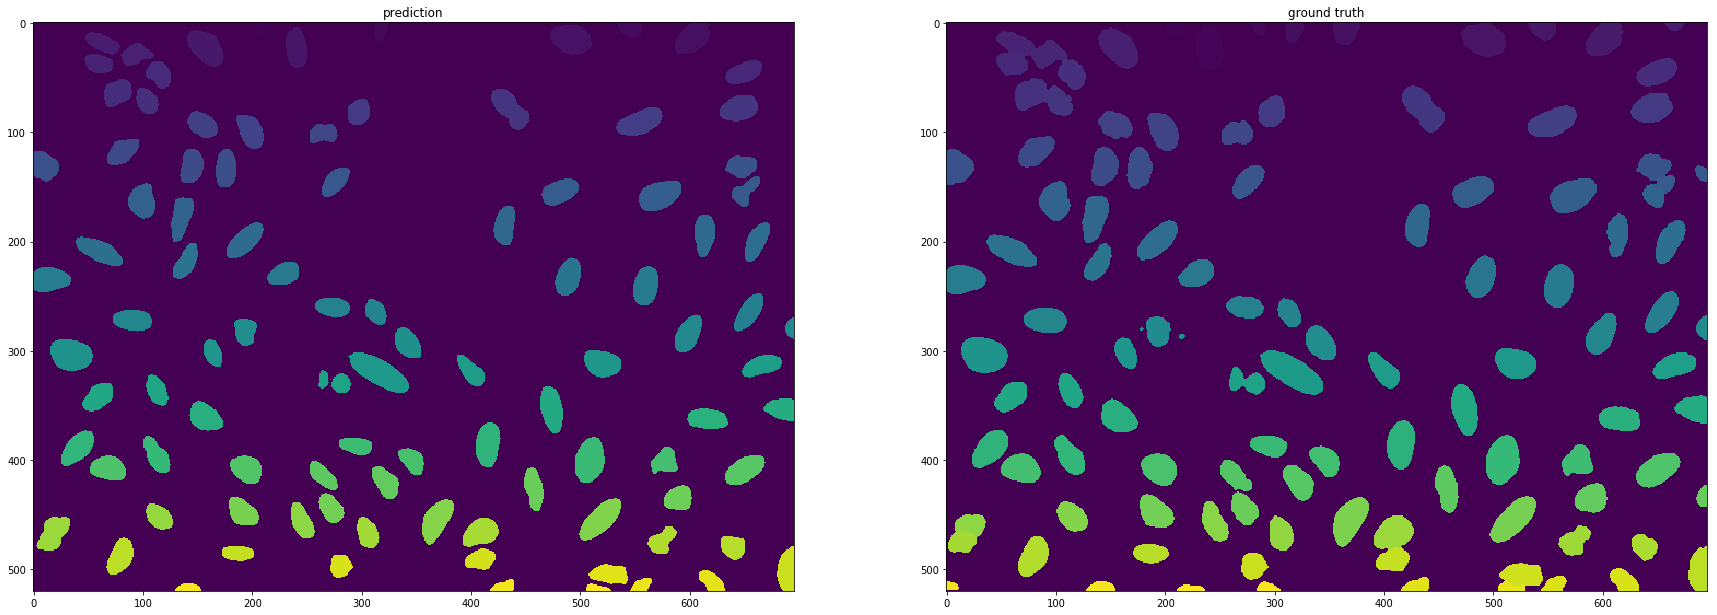

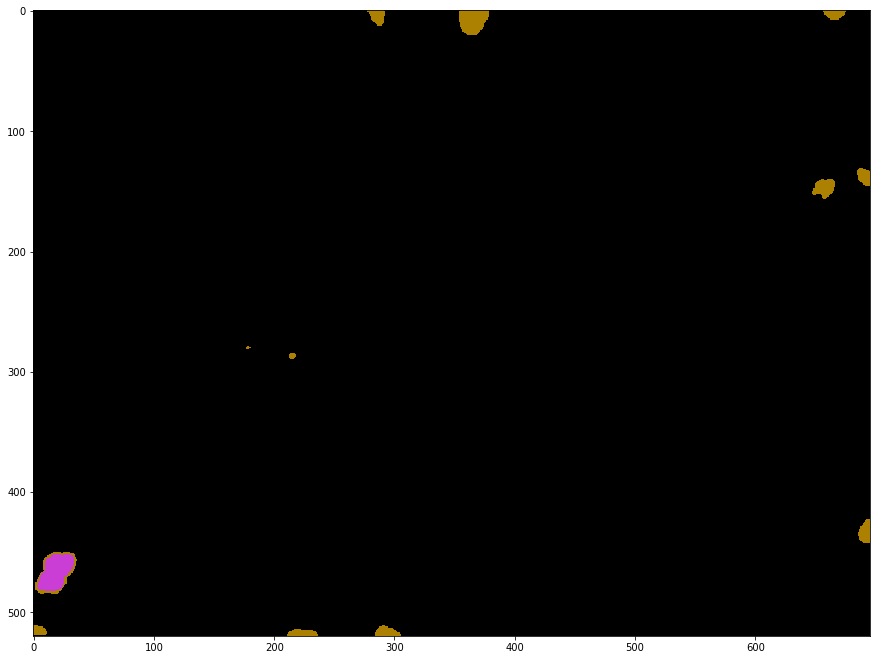

# nuclei gt 112
# nuclei CP 94
# matches 91
# overdetections 3
# underdetections 21
# mean IoU 0.721476


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


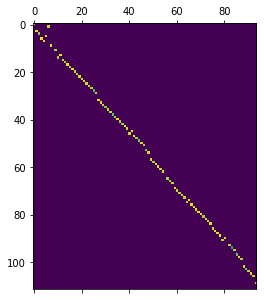

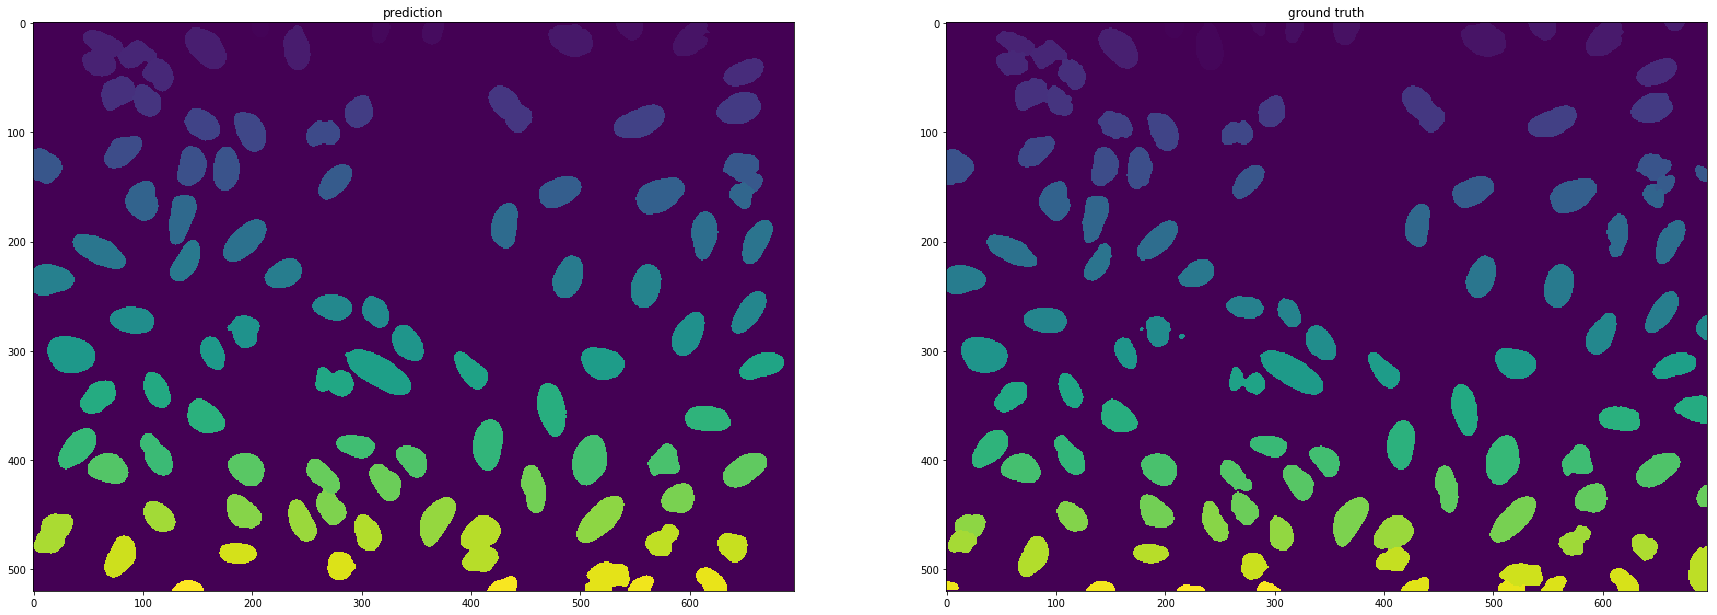

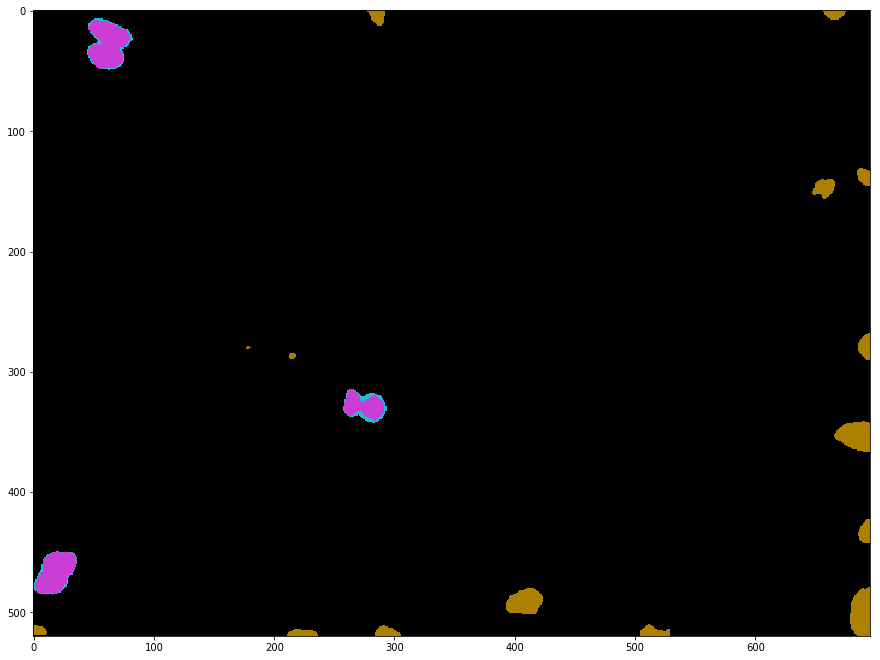

27 / 50
# nuclei gt 102
# nuclei DL 97
# matches 95
# overdetections 2
# underdetections 7
# mean IoU 0.709871


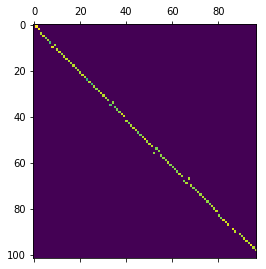

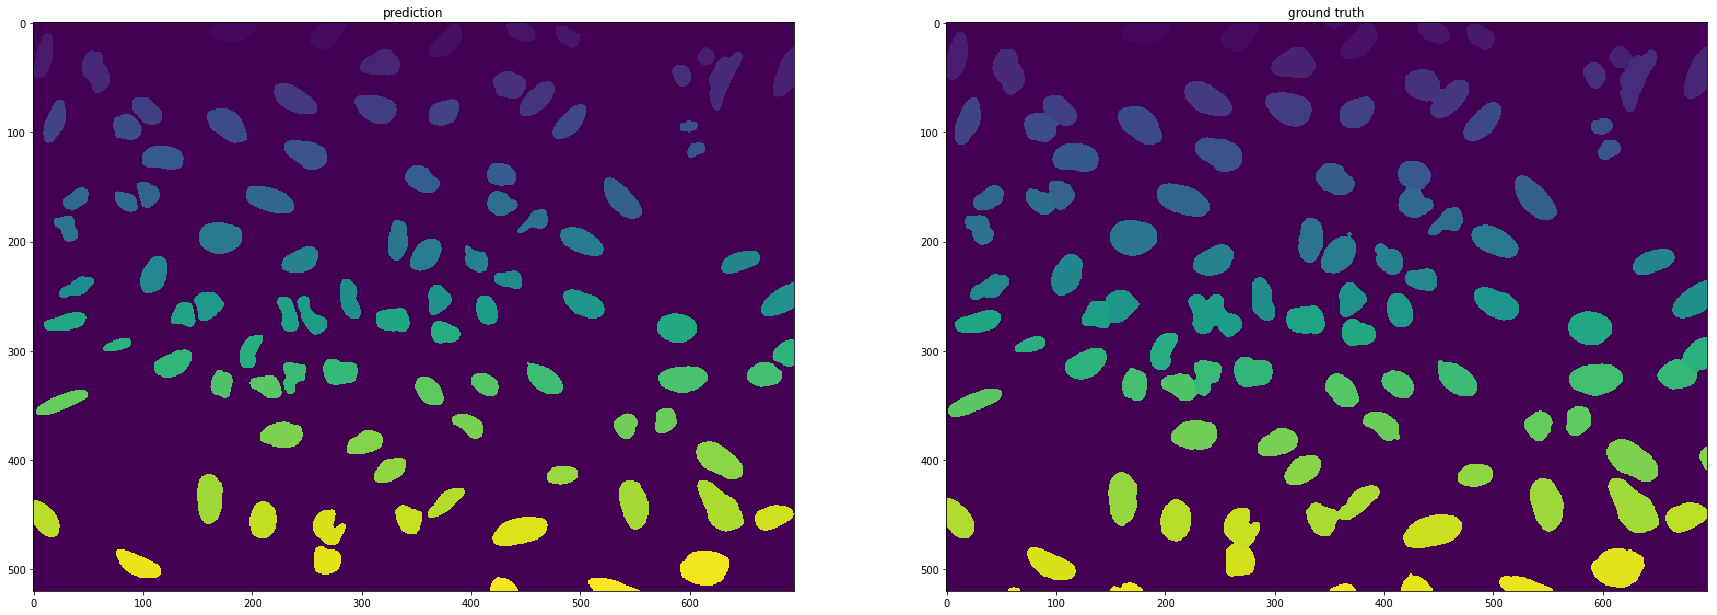

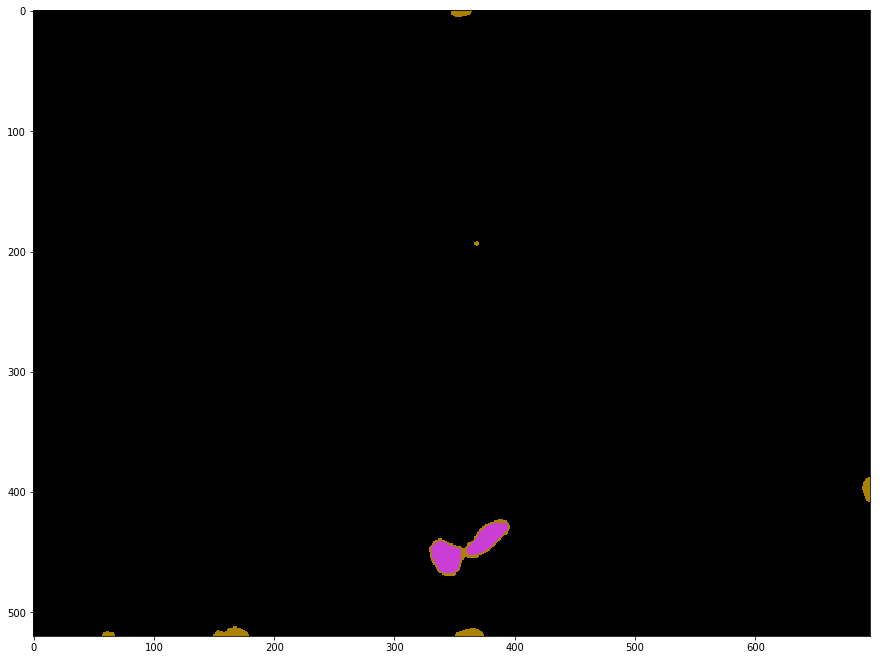

# nuclei gt 102
# nuclei CP 94
# matches 90
# overdetections 4
# underdetections 12
# mean IoU 0.796557


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B12_s9_w1ABE4C6B8-6110-4D7D-B782-94C43FDC2E1F.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


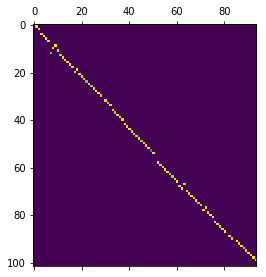

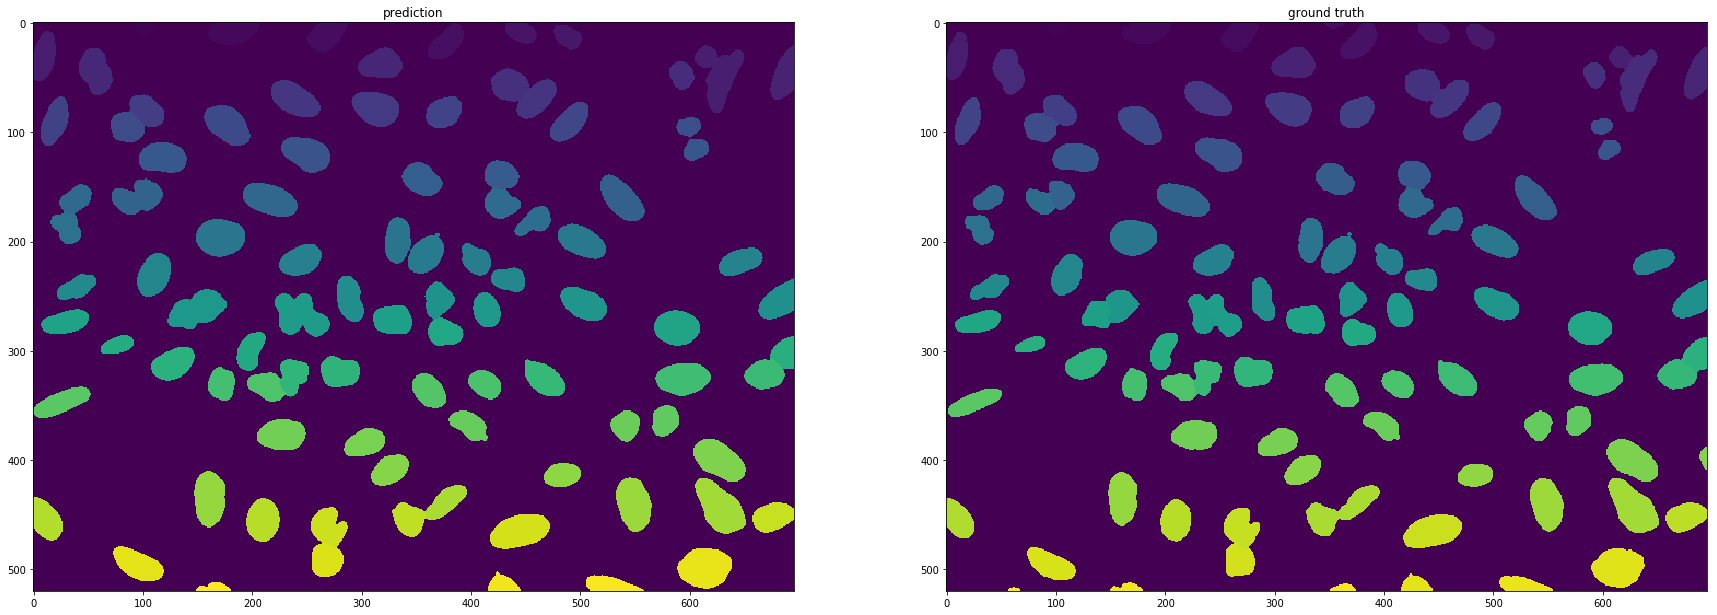

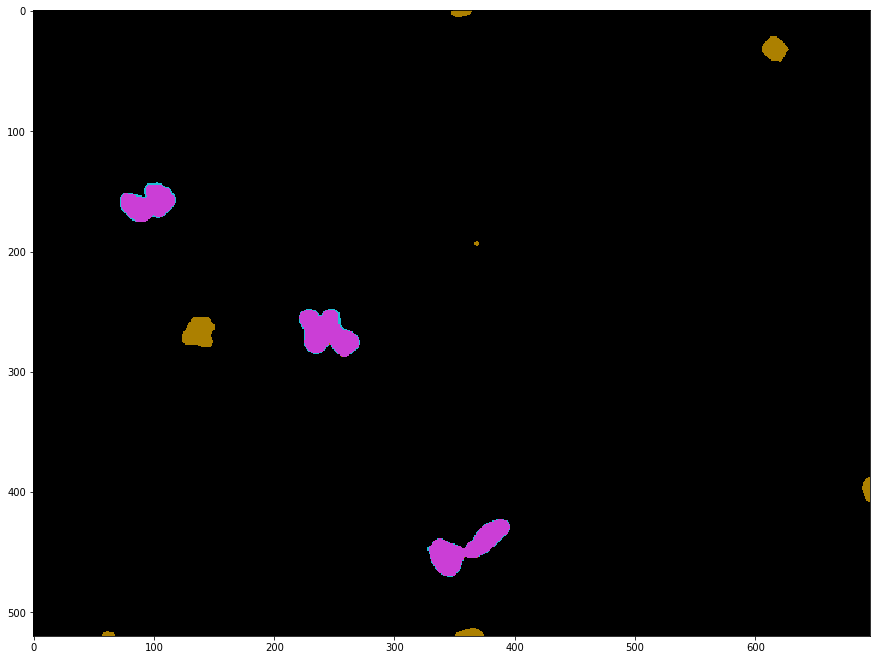

28 / 50
# nuclei gt 143
# nuclei DL 112
# matches 109
# overdetections 3
# underdetections 34
# mean IoU 0.580936


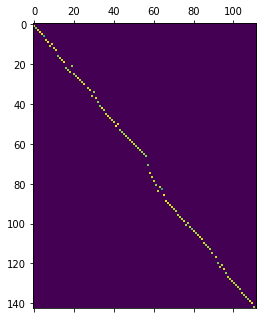

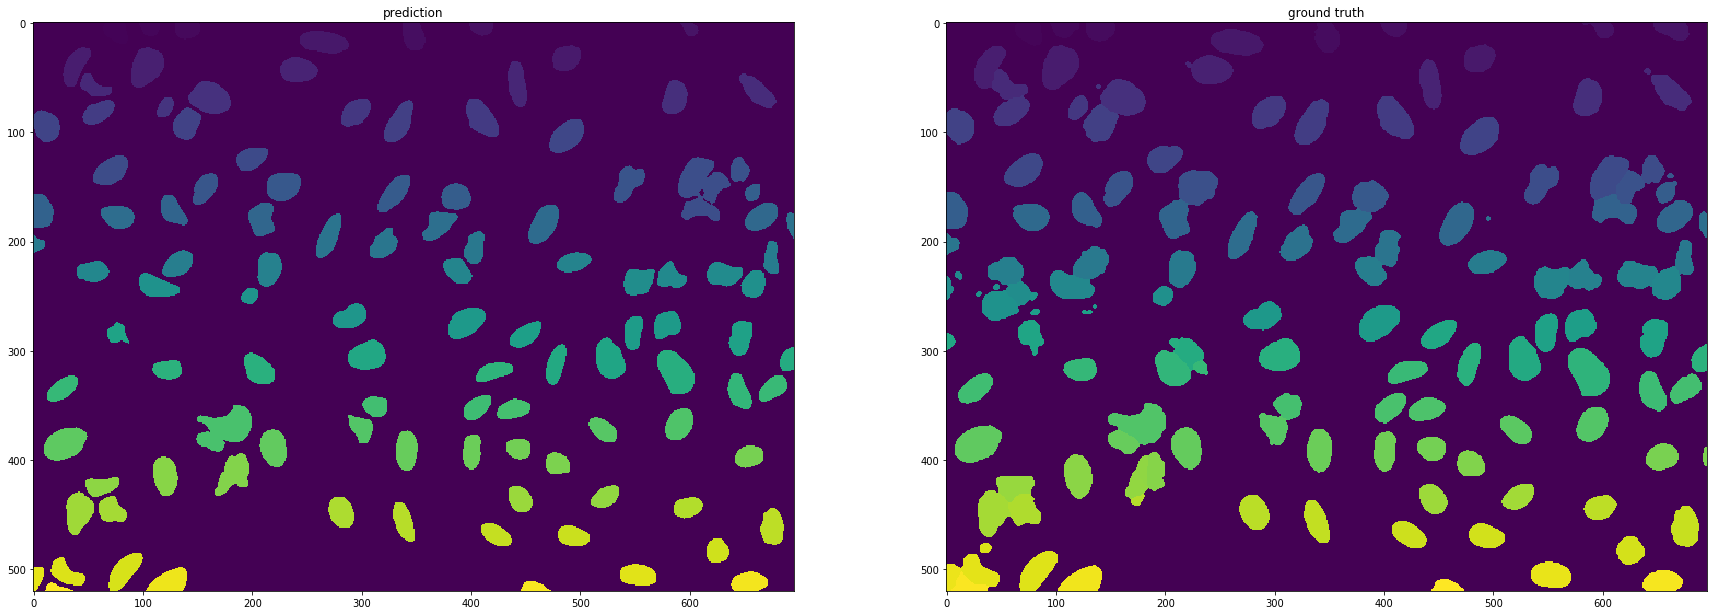

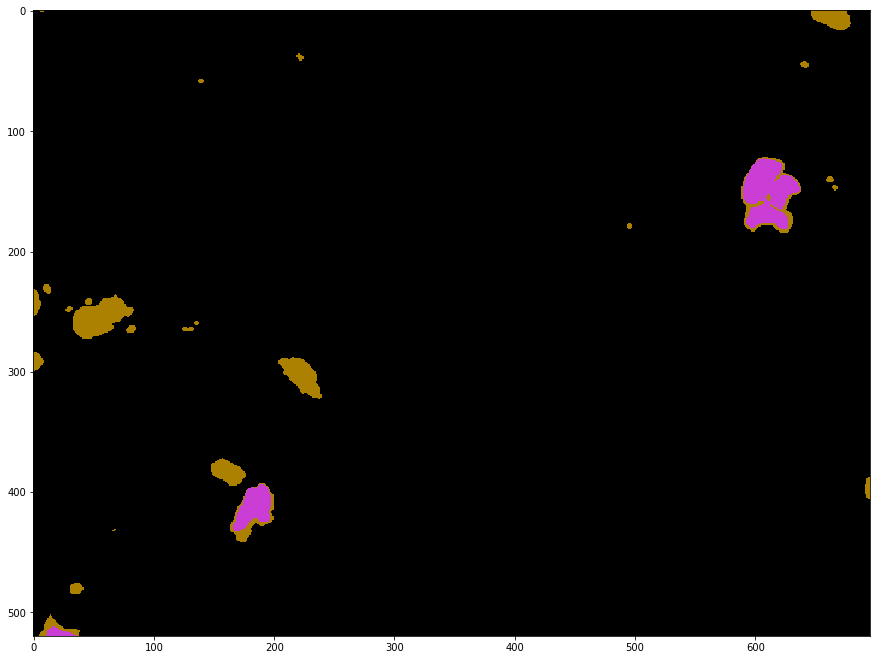

# nuclei gt 143
# nuclei CP 105
# matches 101
# overdetections 4
# underdetections 42
# mean IoU 0.62986


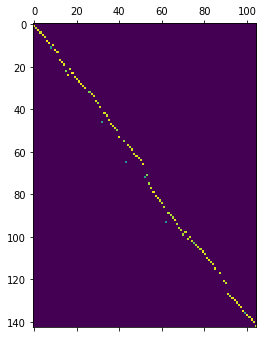

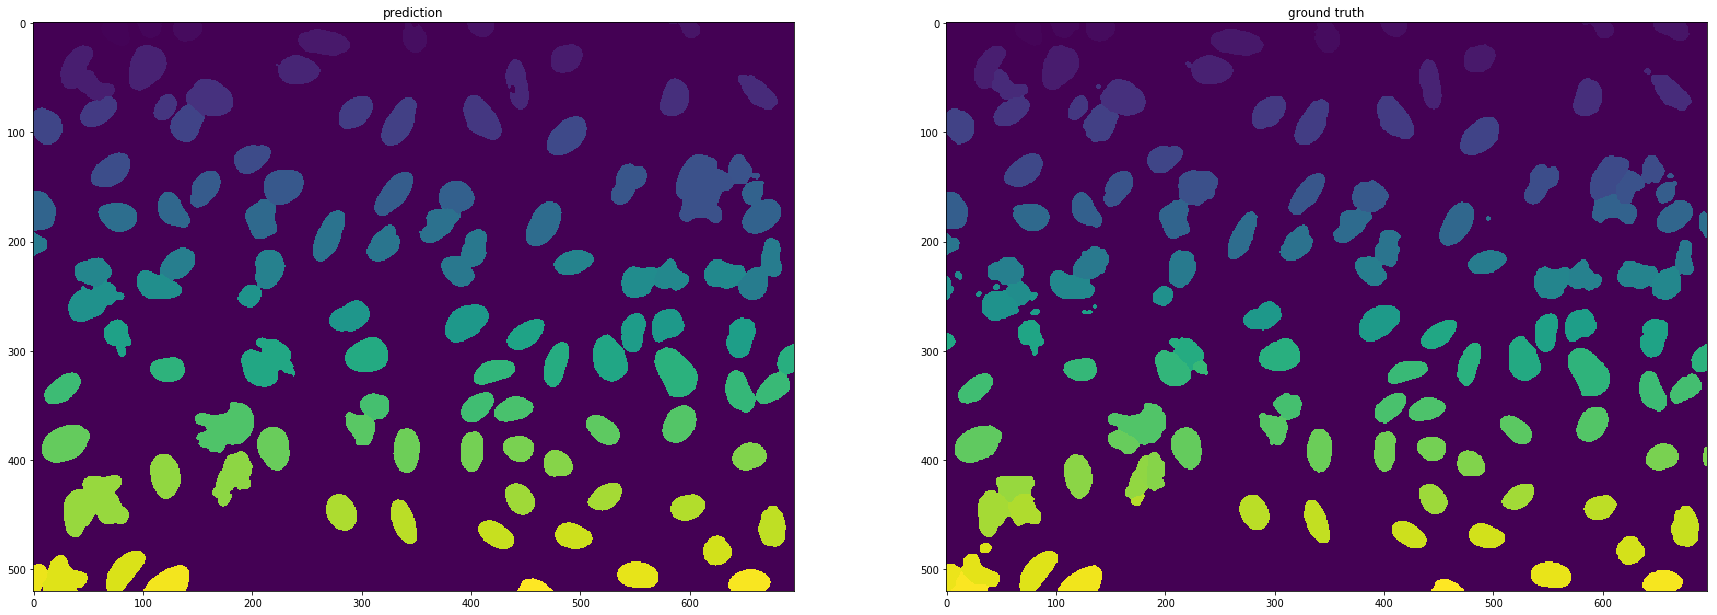

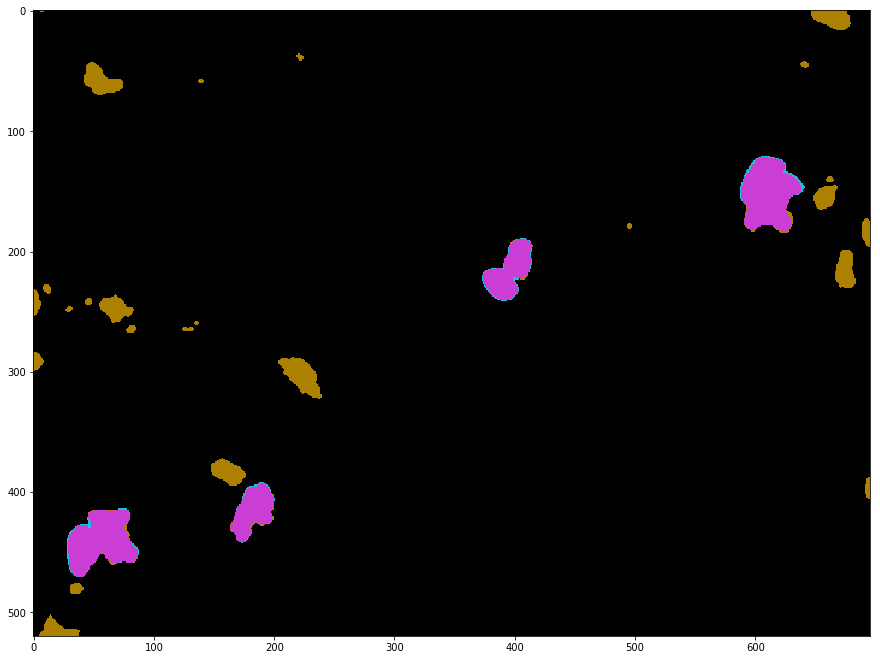

29 / 50
# nuclei gt 96
# nuclei DL 92
# matches 90
# overdetections 2
# underdetections 6
# mean IoU 0.734777


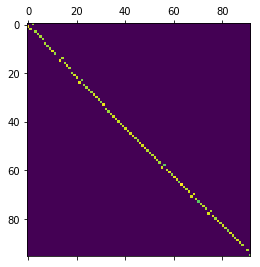

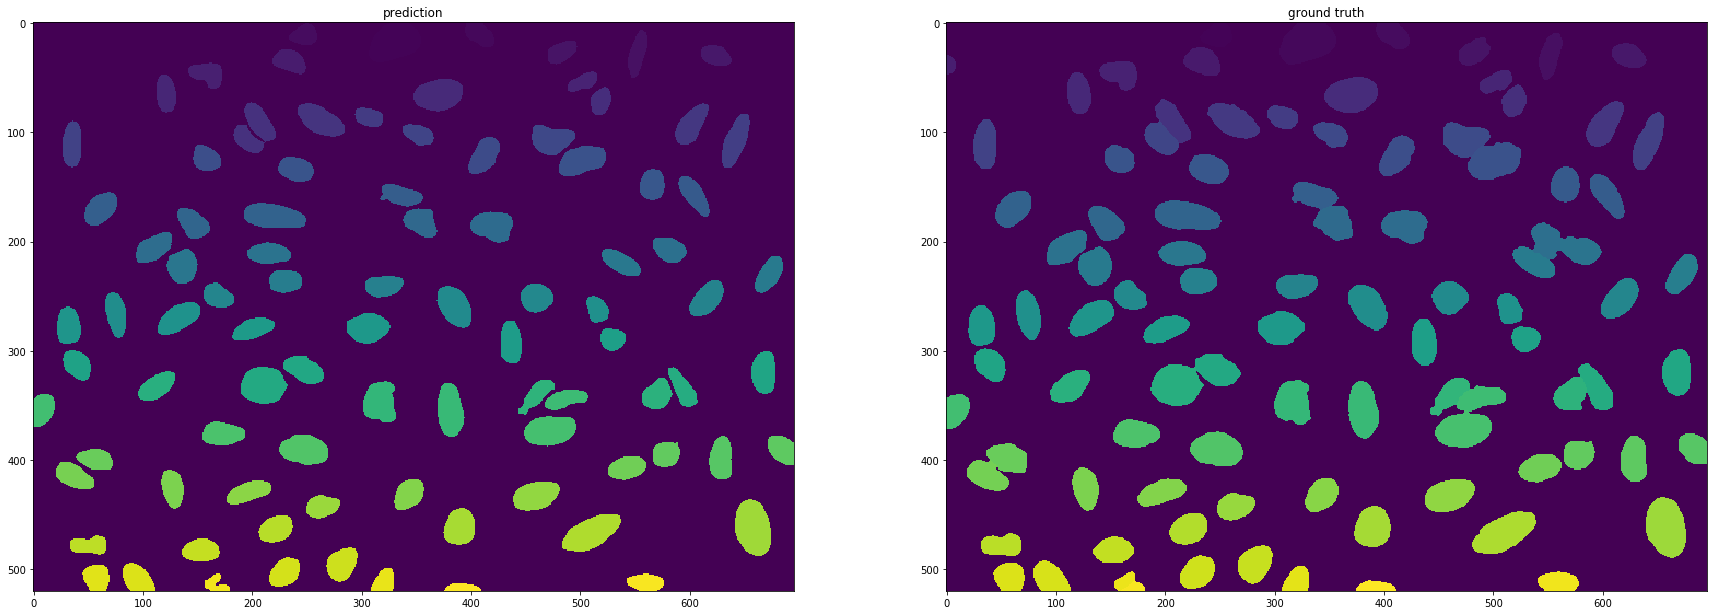

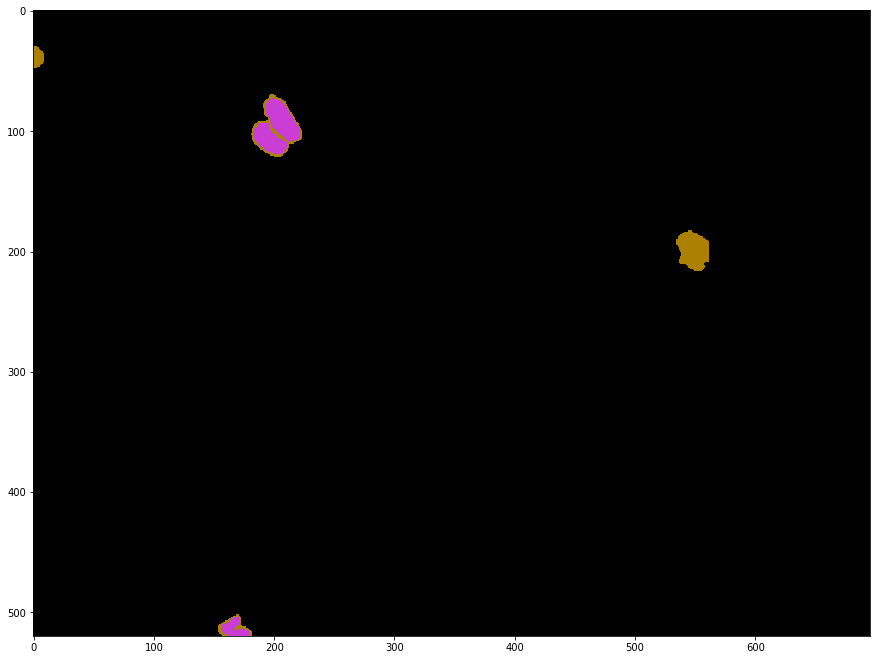

# nuclei gt 96
# nuclei CP 89
# matches 83
# overdetections 6
# underdetections 13
# mean IoU 0.782716


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D02_s8_w1AC6783DF-ED35-4818-8091-E6D02AF4BFBD.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


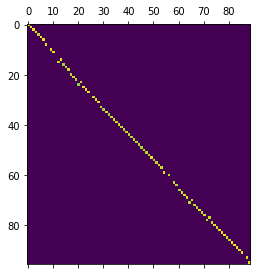

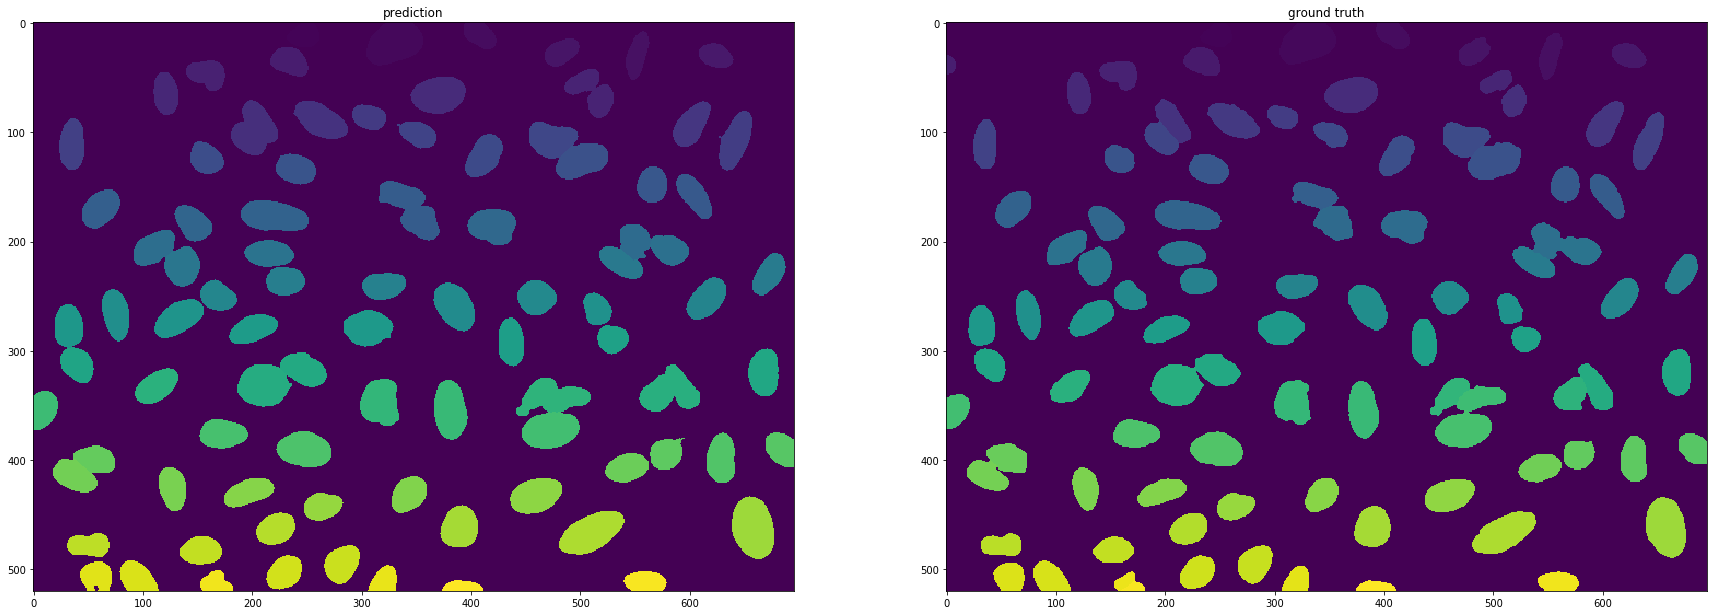

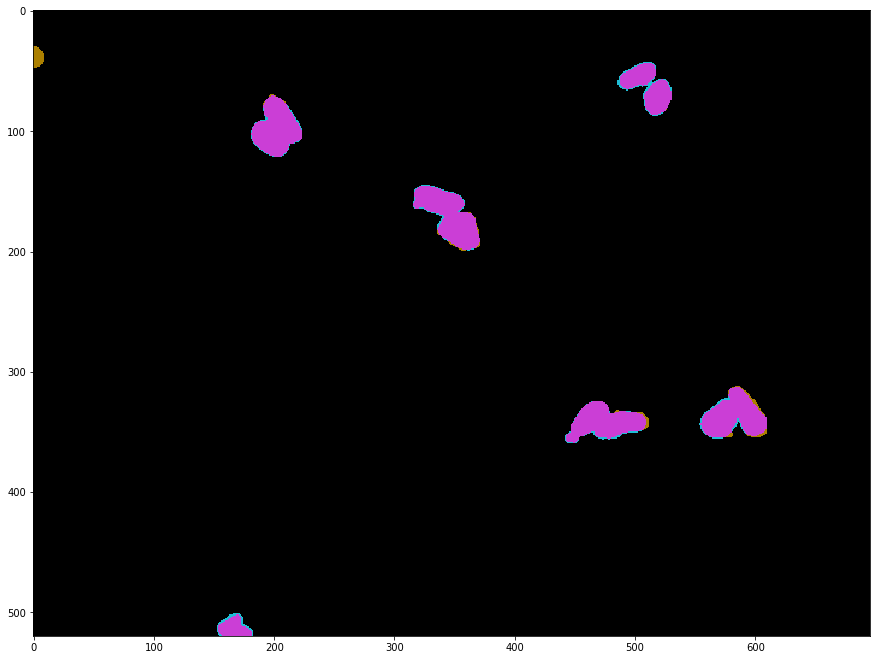

30 / 50
# nuclei gt 146
# nuclei DL 141
# matches 140
# overdetections 1
# underdetections 6
# mean IoU 0.711121


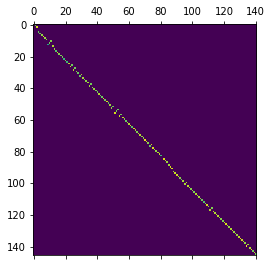

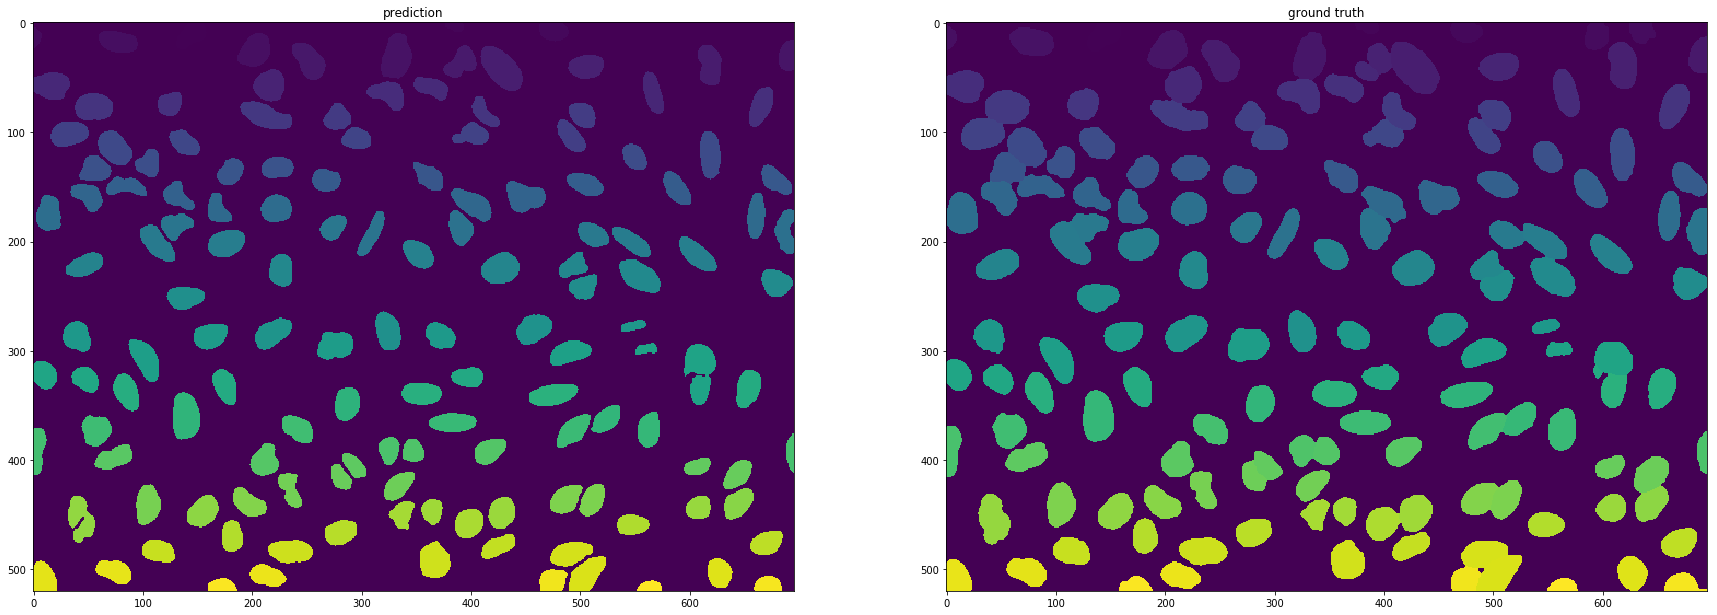

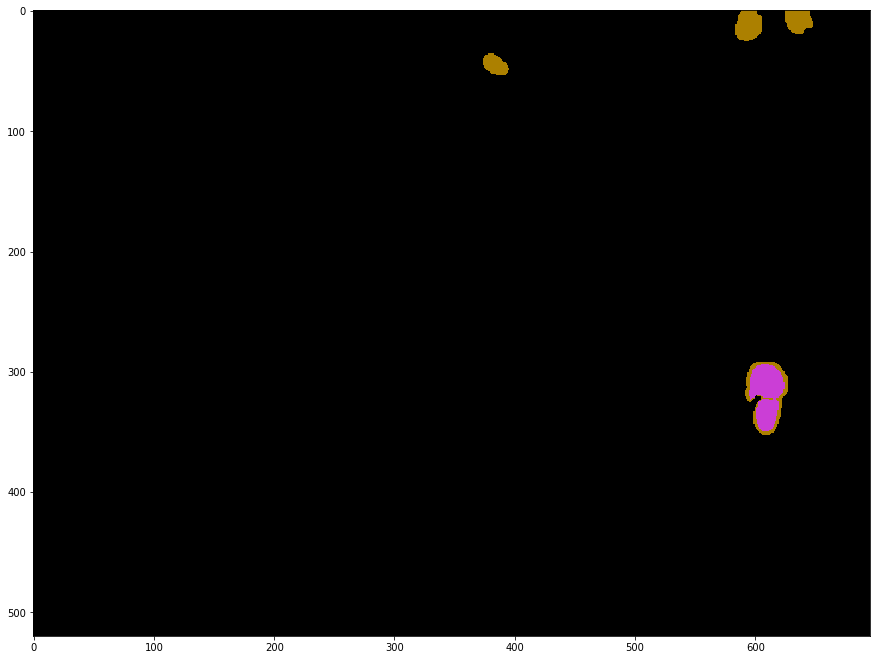

# nuclei gt 146
# nuclei CP 127
# matches 118
# overdetections 9
# underdetections 28
# mean IoU 0.7359


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


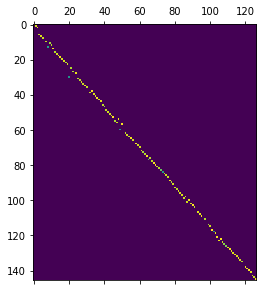

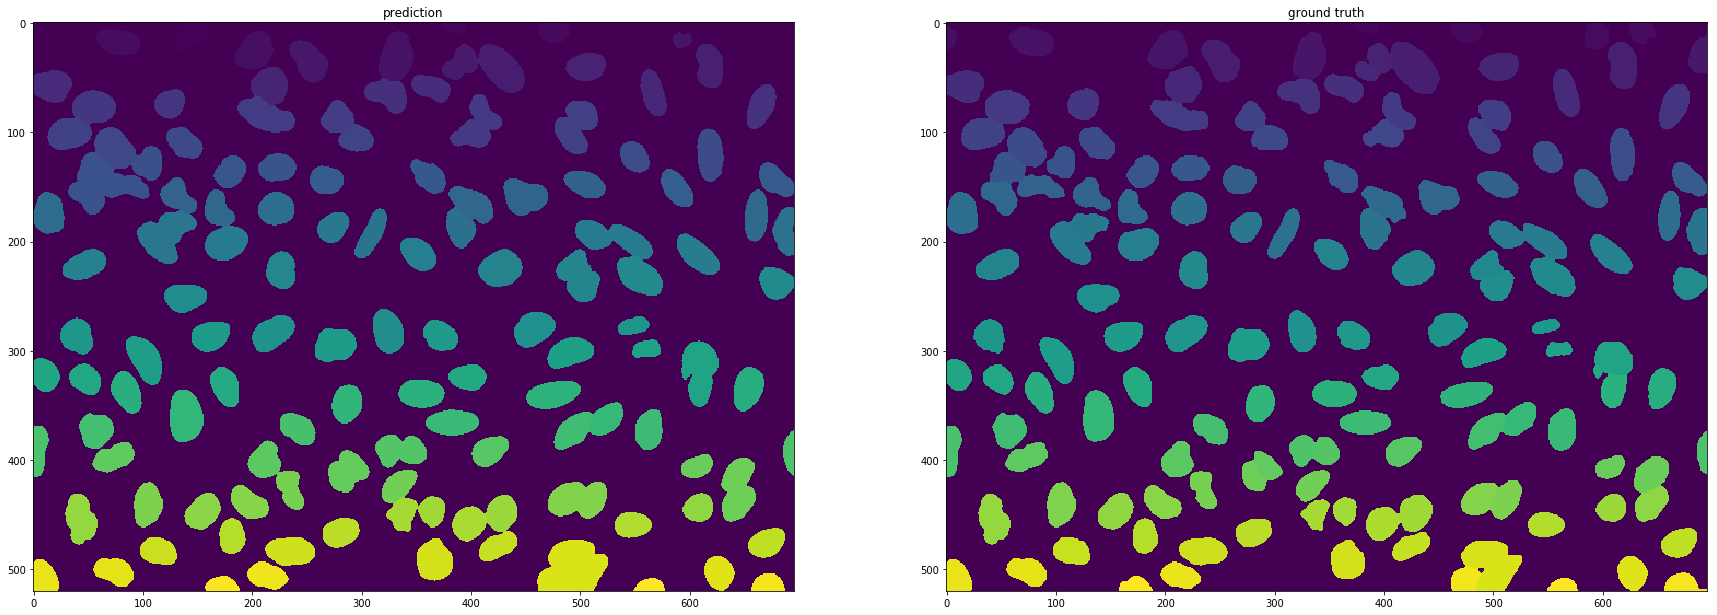

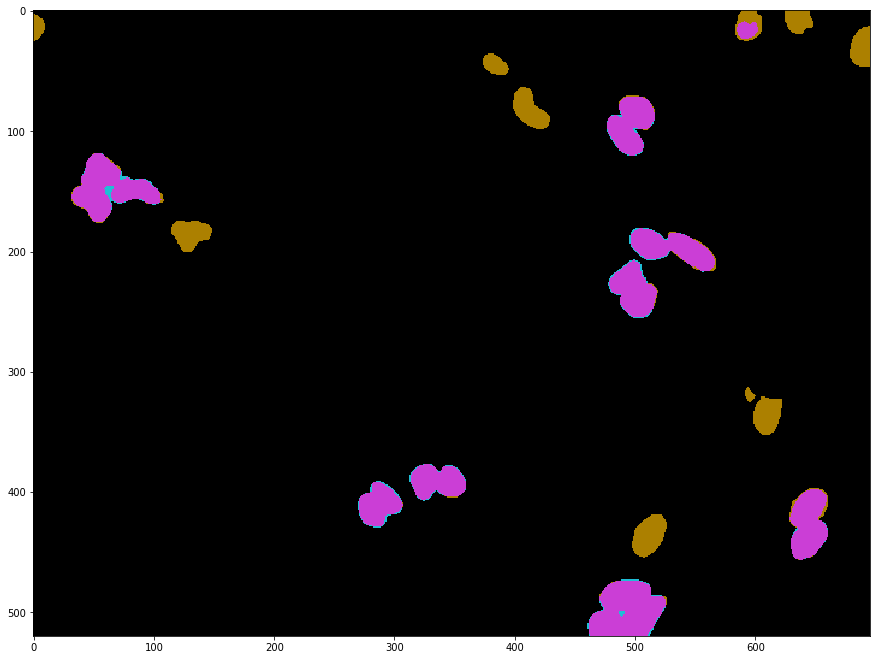

31 / 50
# nuclei gt 52
# nuclei DL 47
# matches 47
# overdetections 0
# underdetections 5
# mean IoU 0.701475


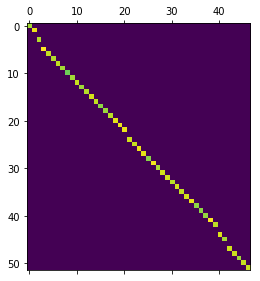

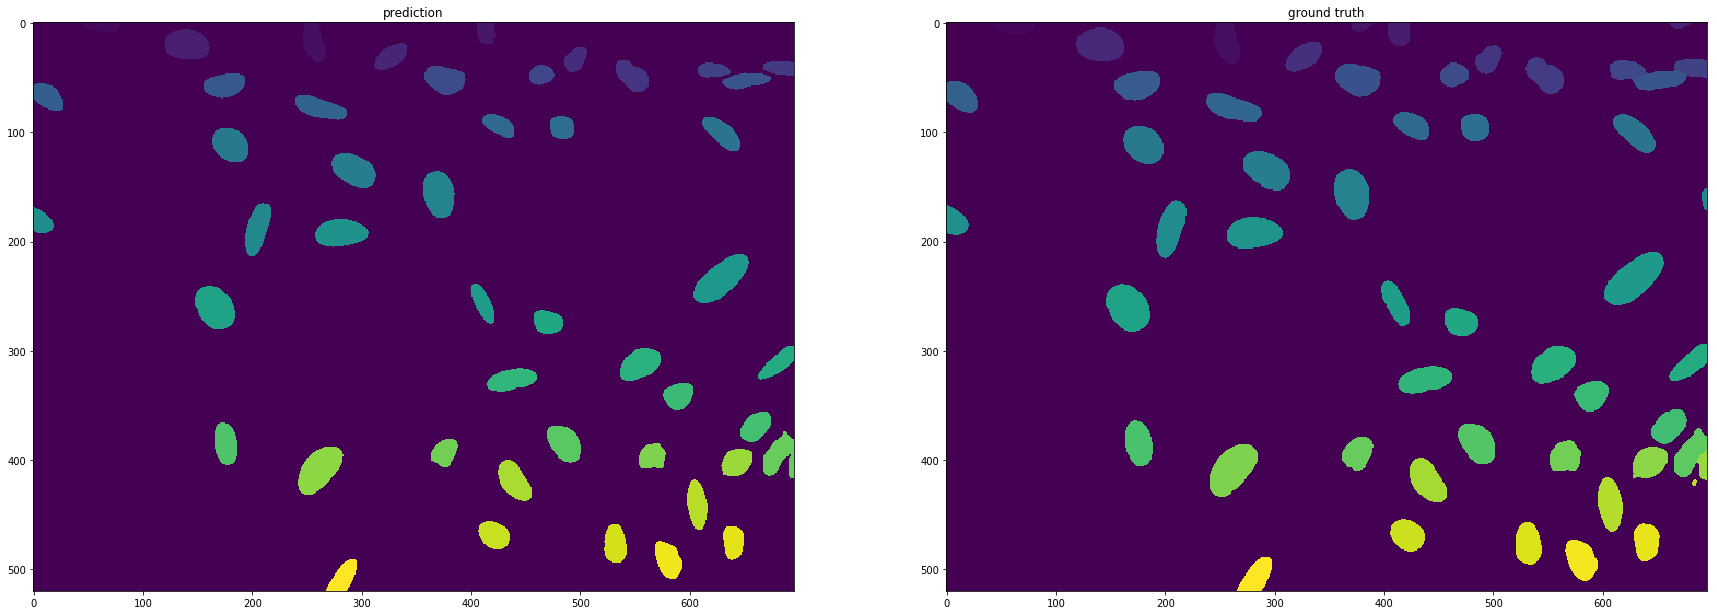

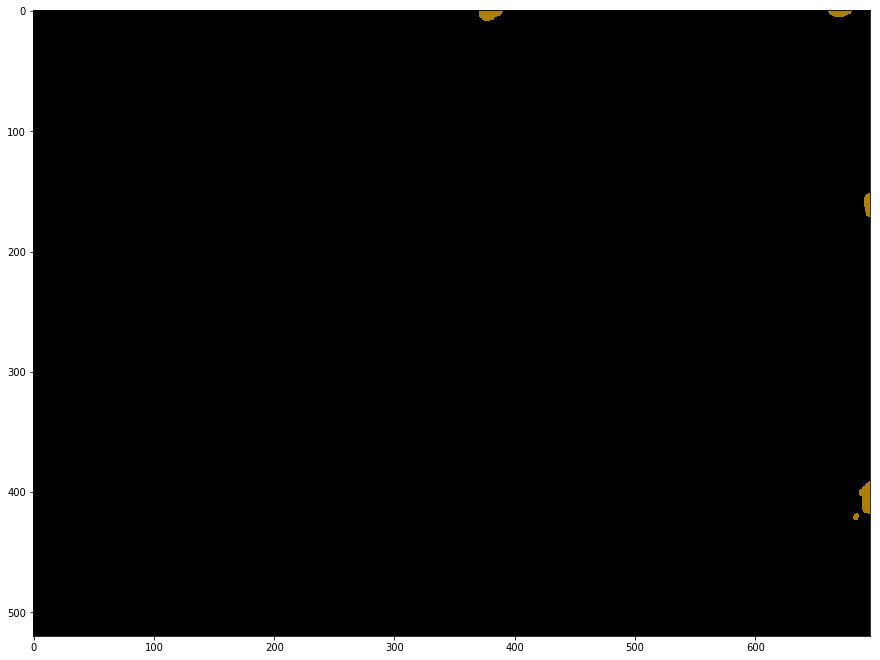

# nuclei gt 52
# nuclei CP 47
# matches 47
# overdetections 0
# underdetections 5
# mean IoU 0.819785


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A24_s9_w152CD6793-DA45-4975-869A-CBD49D645E37.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


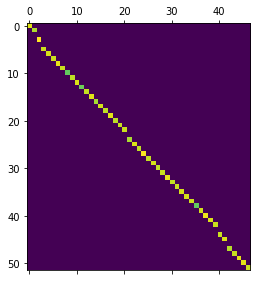

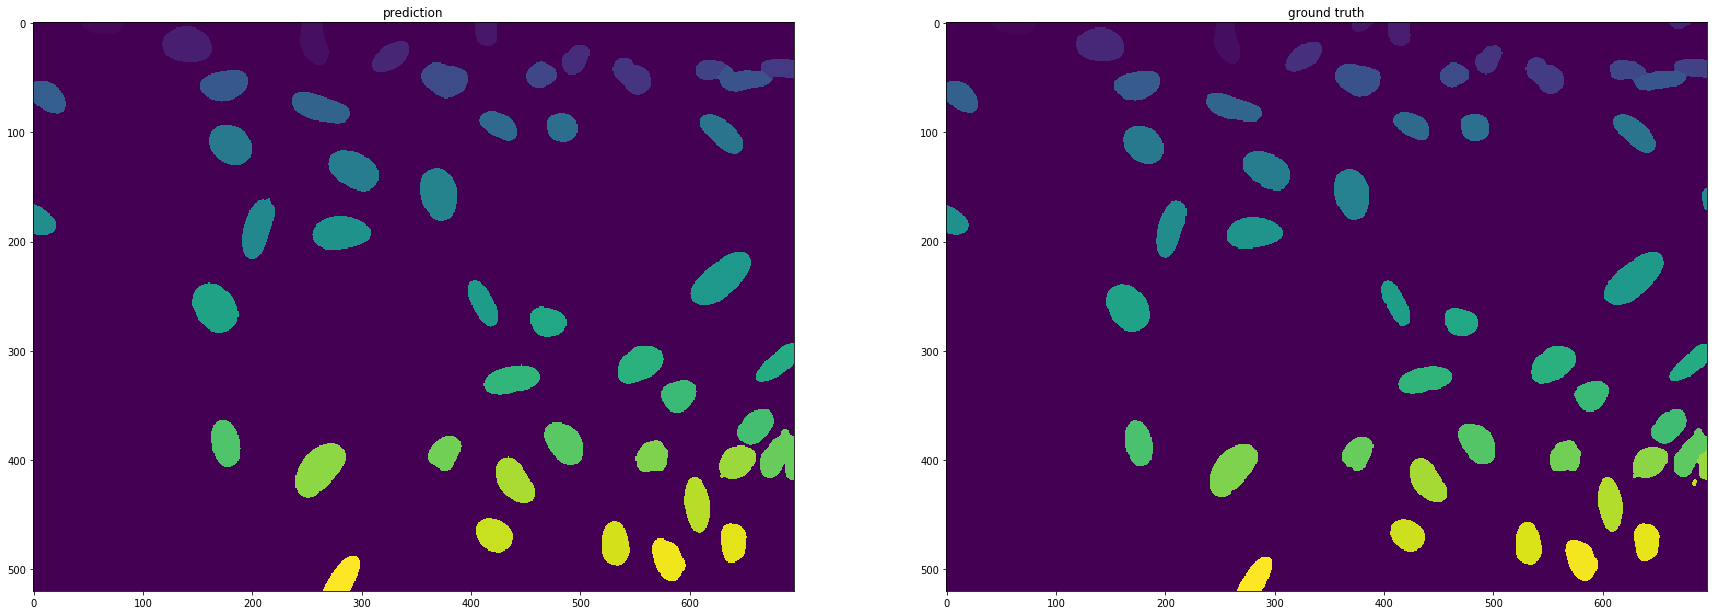

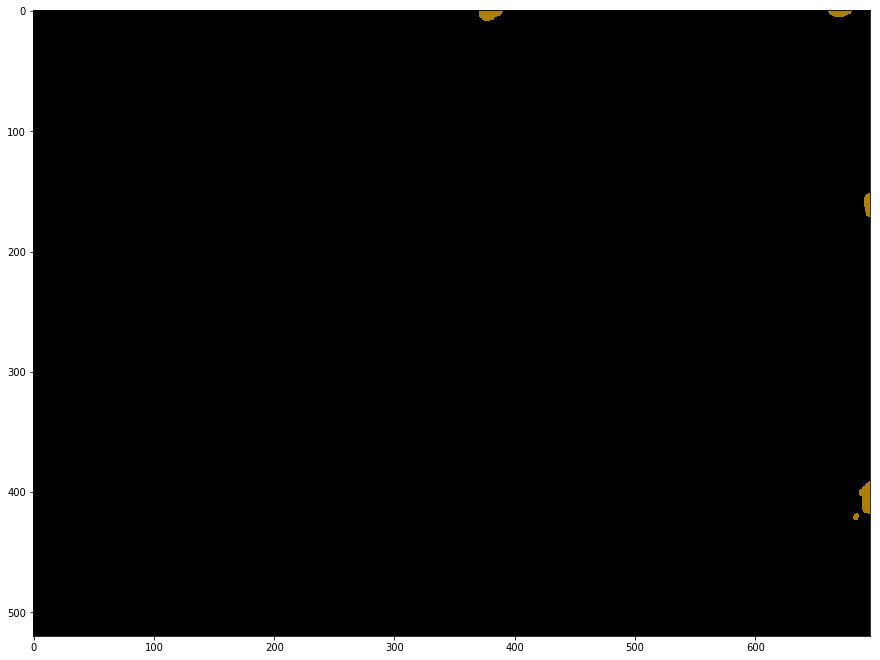

32 / 50
# nuclei gt 150
# nuclei DL 140
# matches 137
# overdetections 3
# underdetections 13
# mean IoU 0.702467


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_A24_s9_w152CD6793-DA45-4975-869A-CBD49D645E37.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


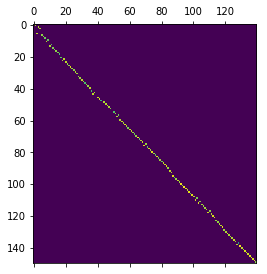

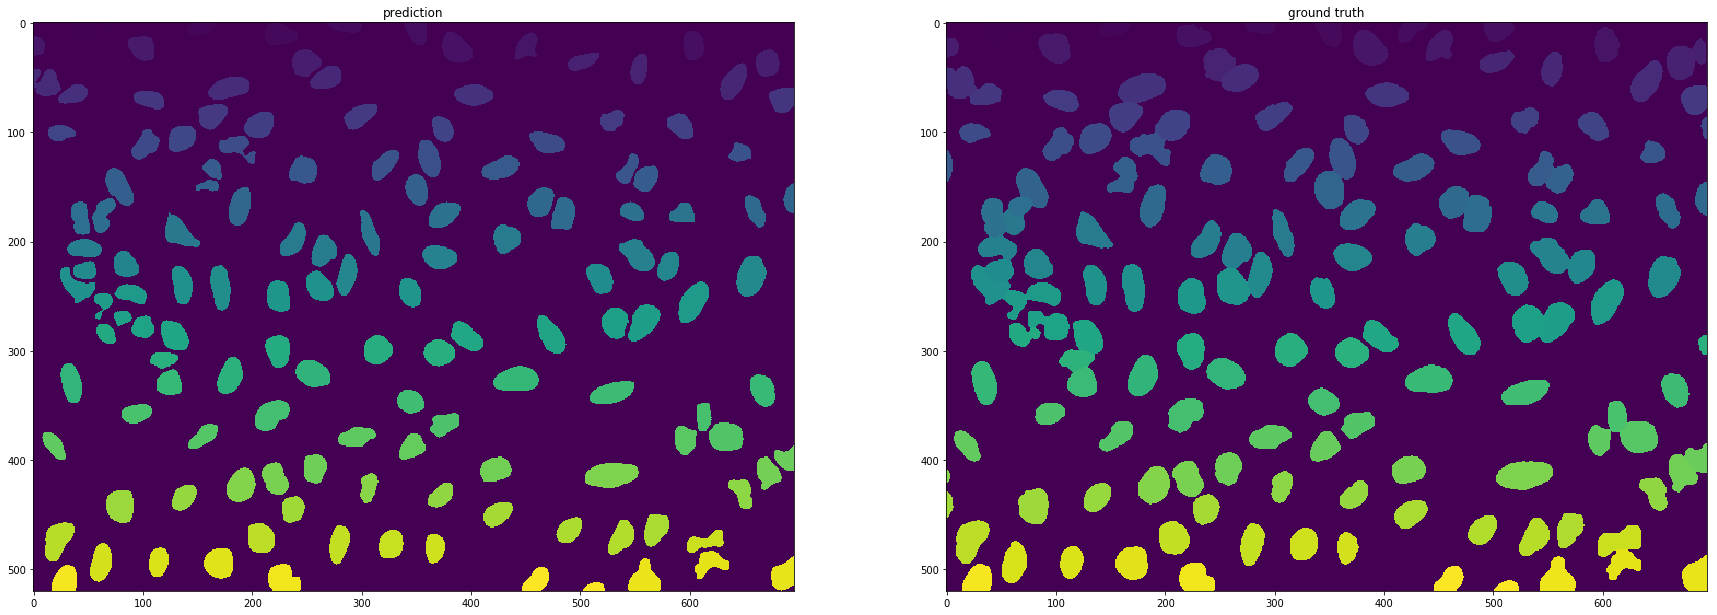

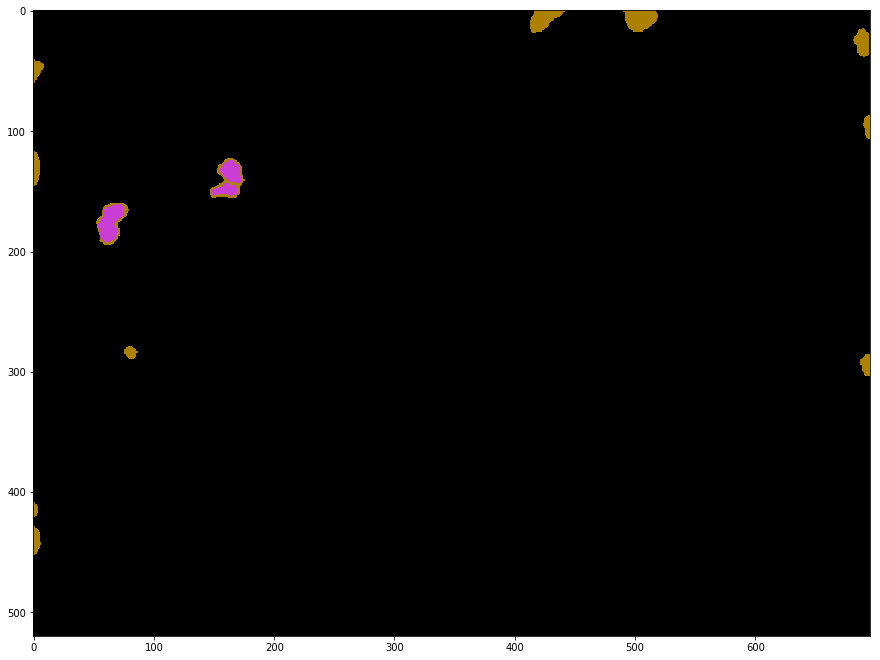

# nuclei gt 150
# nuclei CP 128
# matches 122
# overdetections 6
# underdetections 28
# mean IoU 0.703132


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D06_s5_w13C67AAA9-6E81-42DB-AC5F-7126602F3607.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


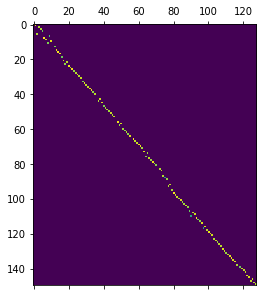

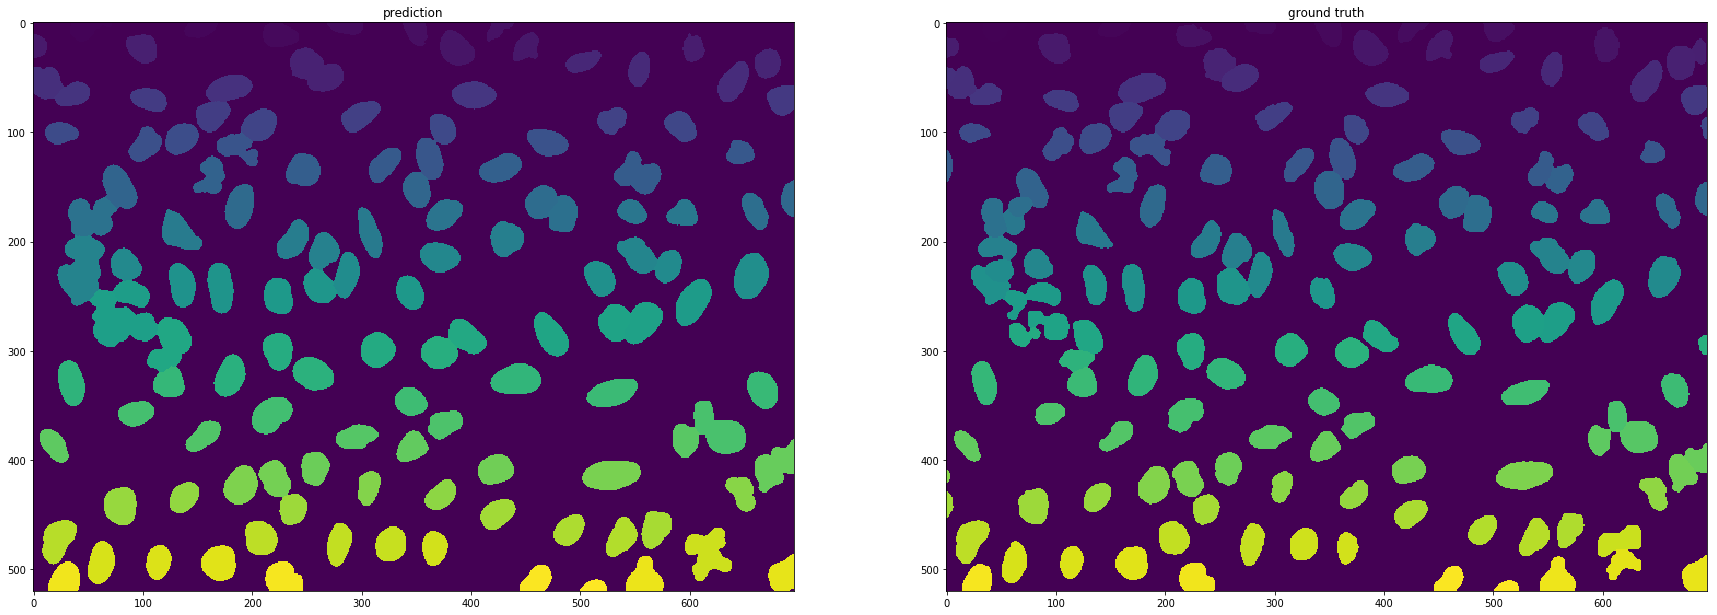

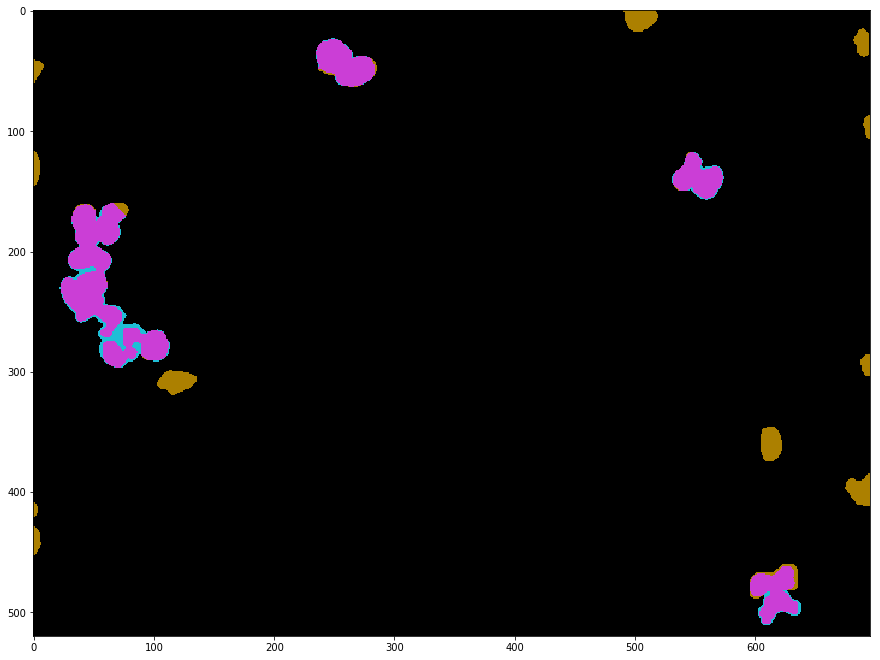

33 / 50
# nuclei gt 112
# nuclei DL 107
# matches 107
# overdetections 0
# underdetections 5
# mean IoU 0.723081


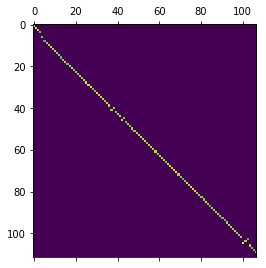

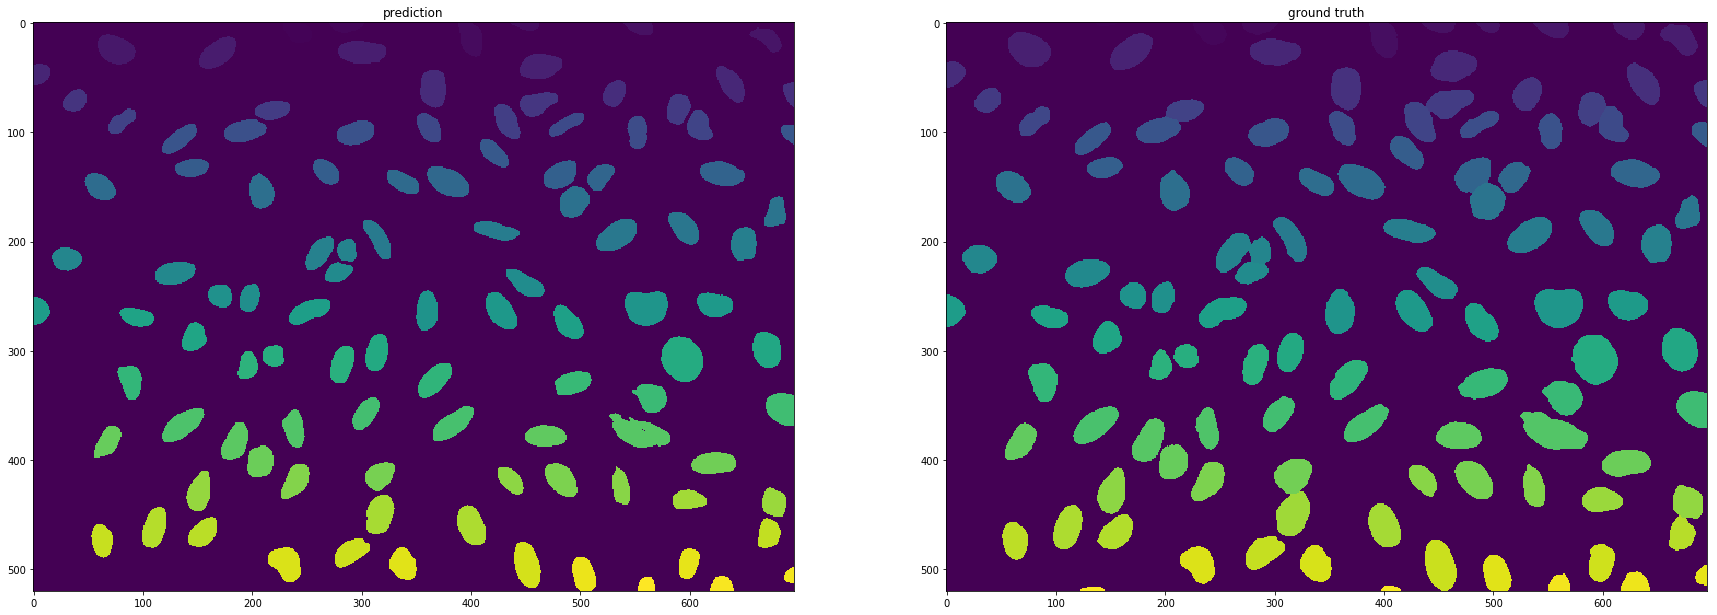

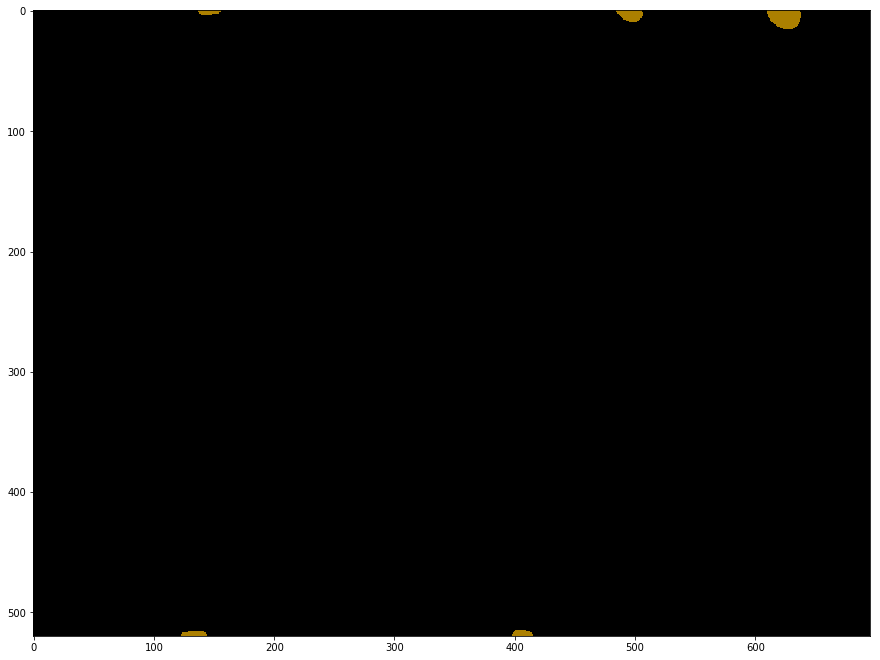

# nuclei gt 112
# nuclei CP 101
# matches 99
# overdetections 2
# underdetections 13
# mean IoU 0.794319


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


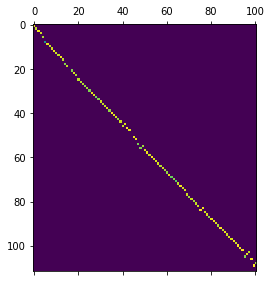

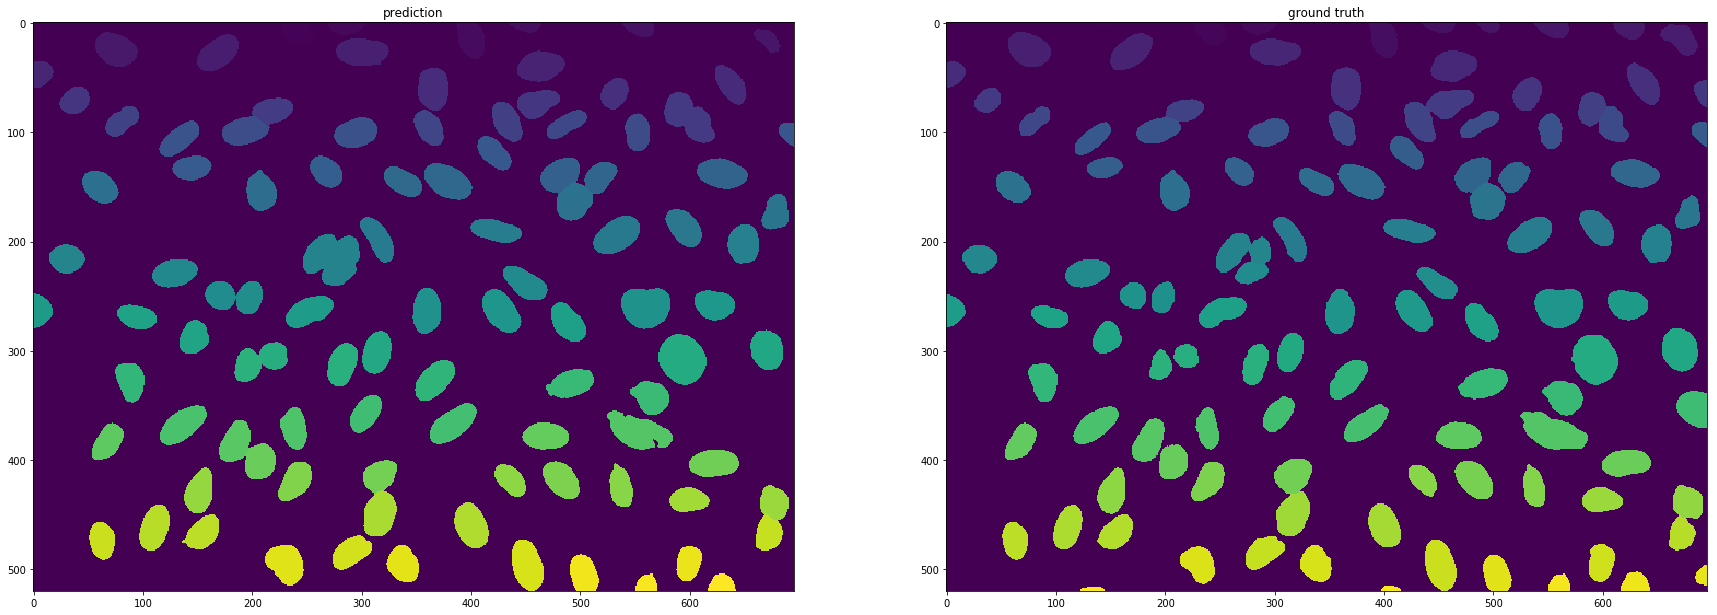

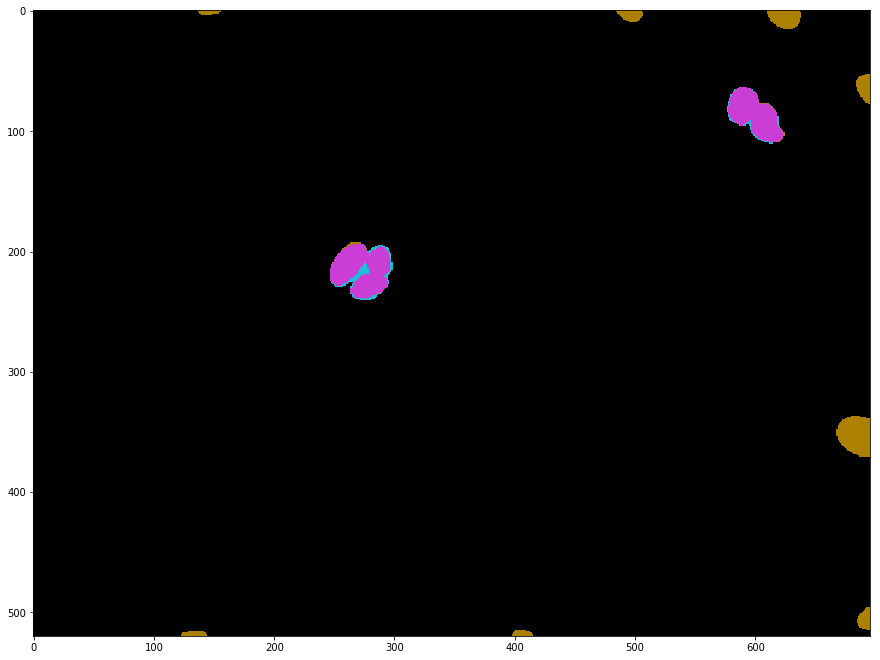

34 / 50
# nuclei gt 144
# nuclei DL 135
# matches 135
# overdetections 0
# underdetections 9
# mean IoU 0.722278


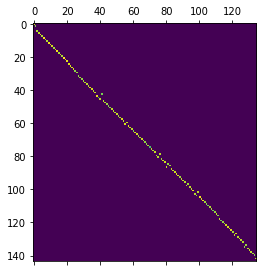

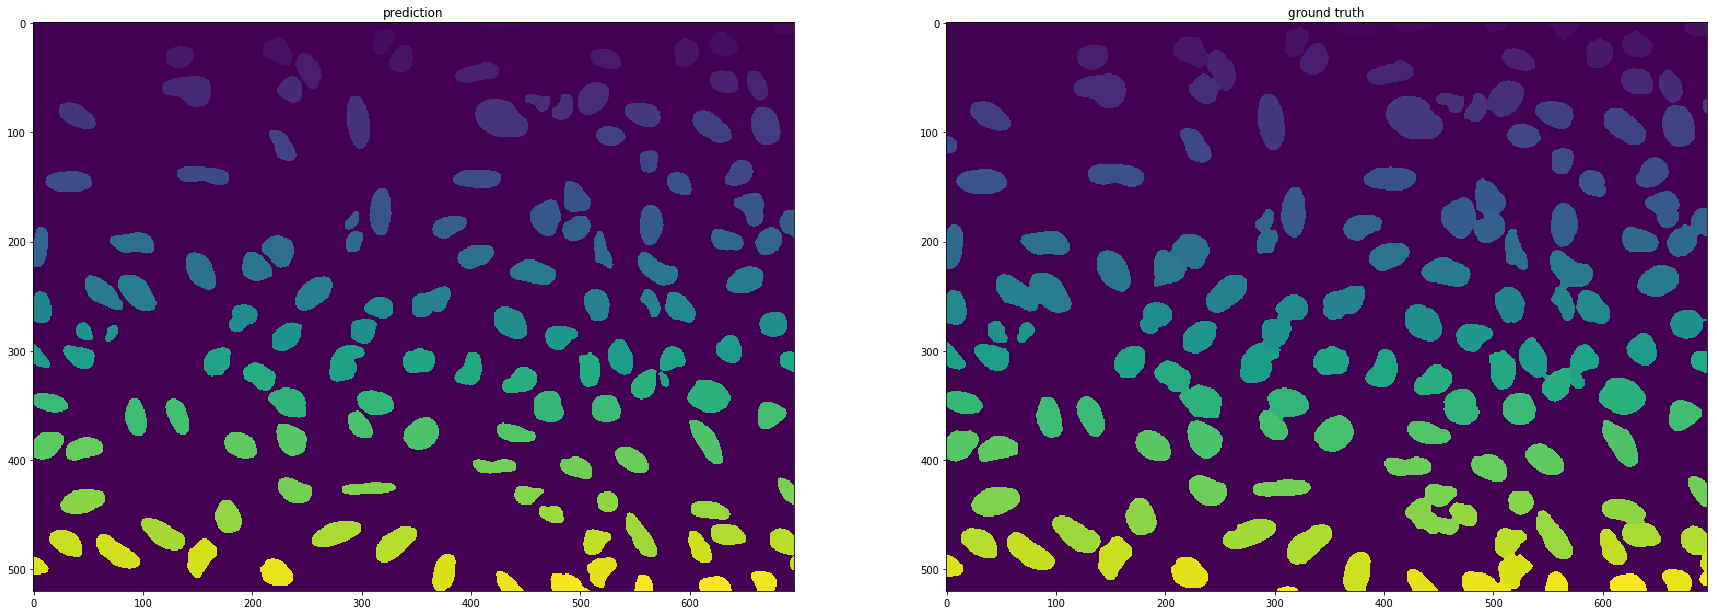

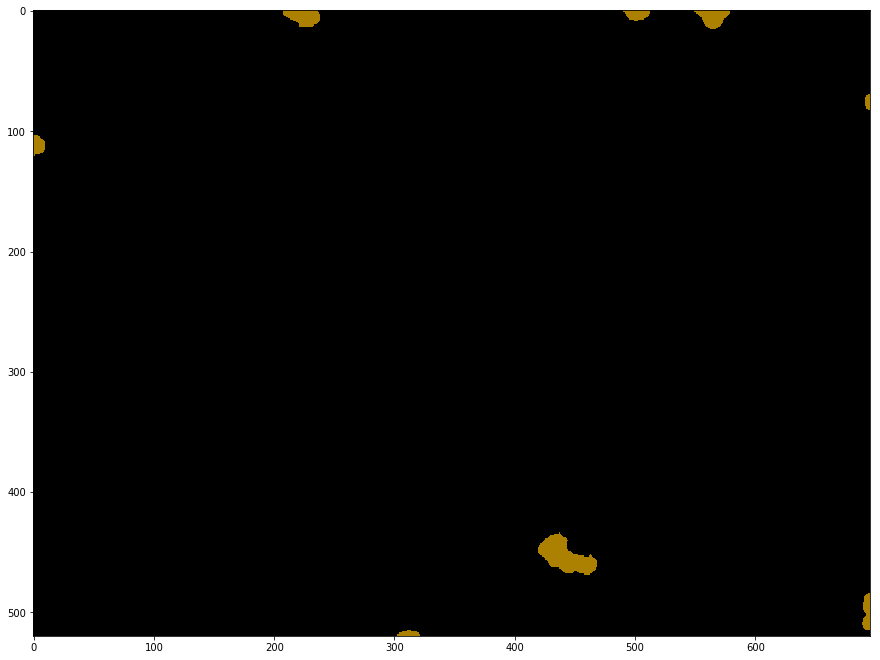

# nuclei gt 144
# nuclei CP 129
# matches 124
# overdetections 5
# underdetections 20
# mean IoU 0.747469


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D19_s6_w1EB1F11AE-4FB6-481F-94D9-40246870F0CB.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


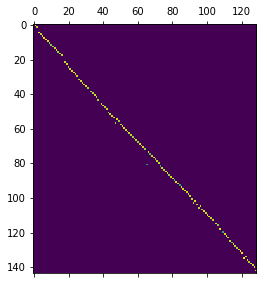

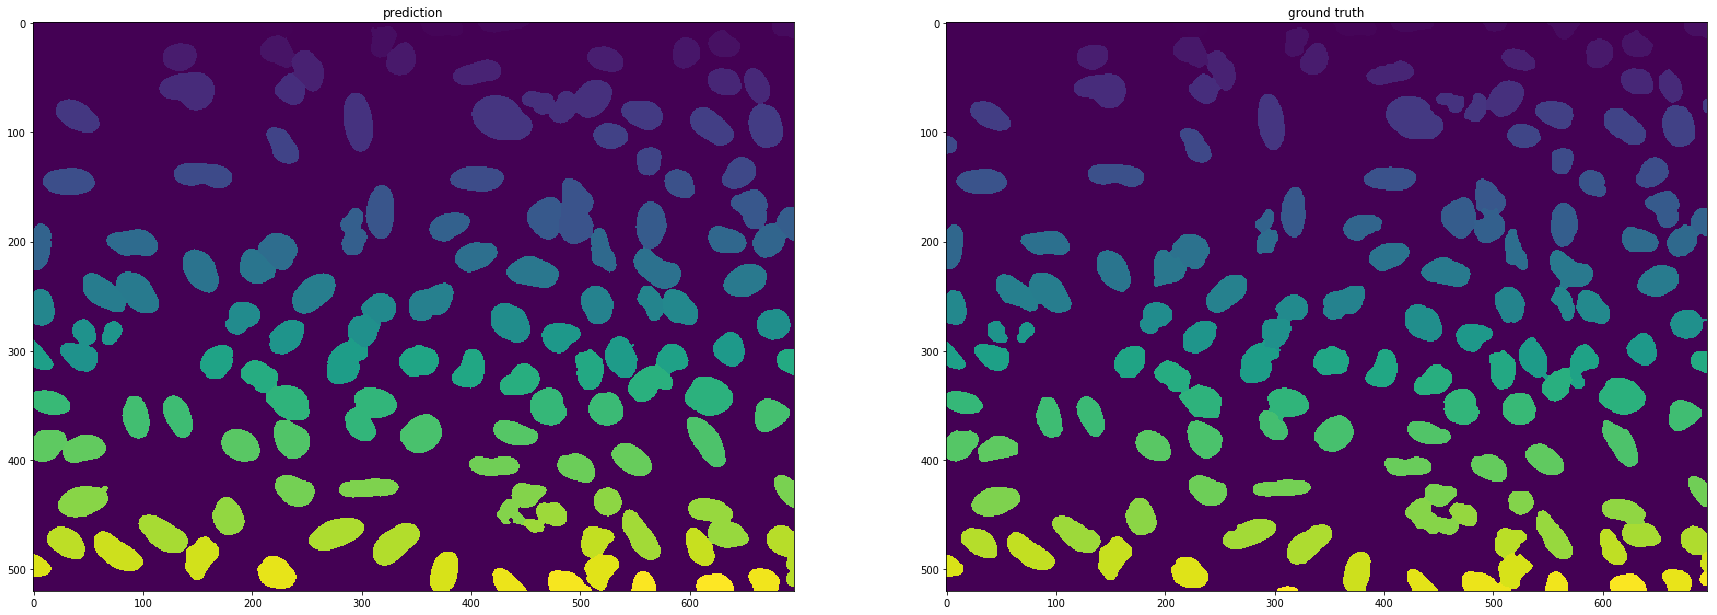

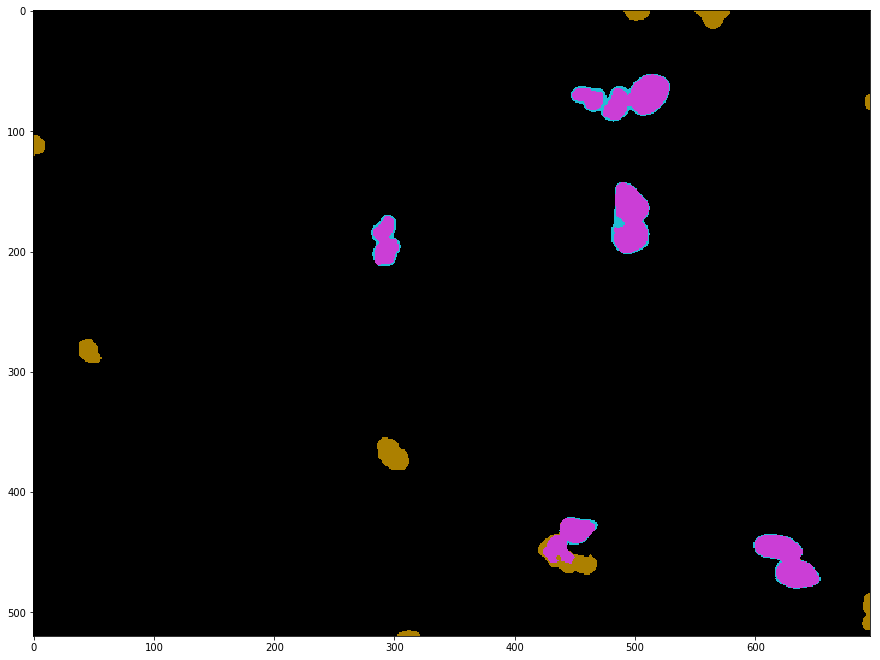

35 / 50
# nuclei gt 109
# nuclei DL 104
# matches 103
# overdetections 1
# underdetections 6
# mean IoU 0.743406


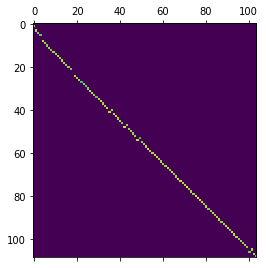

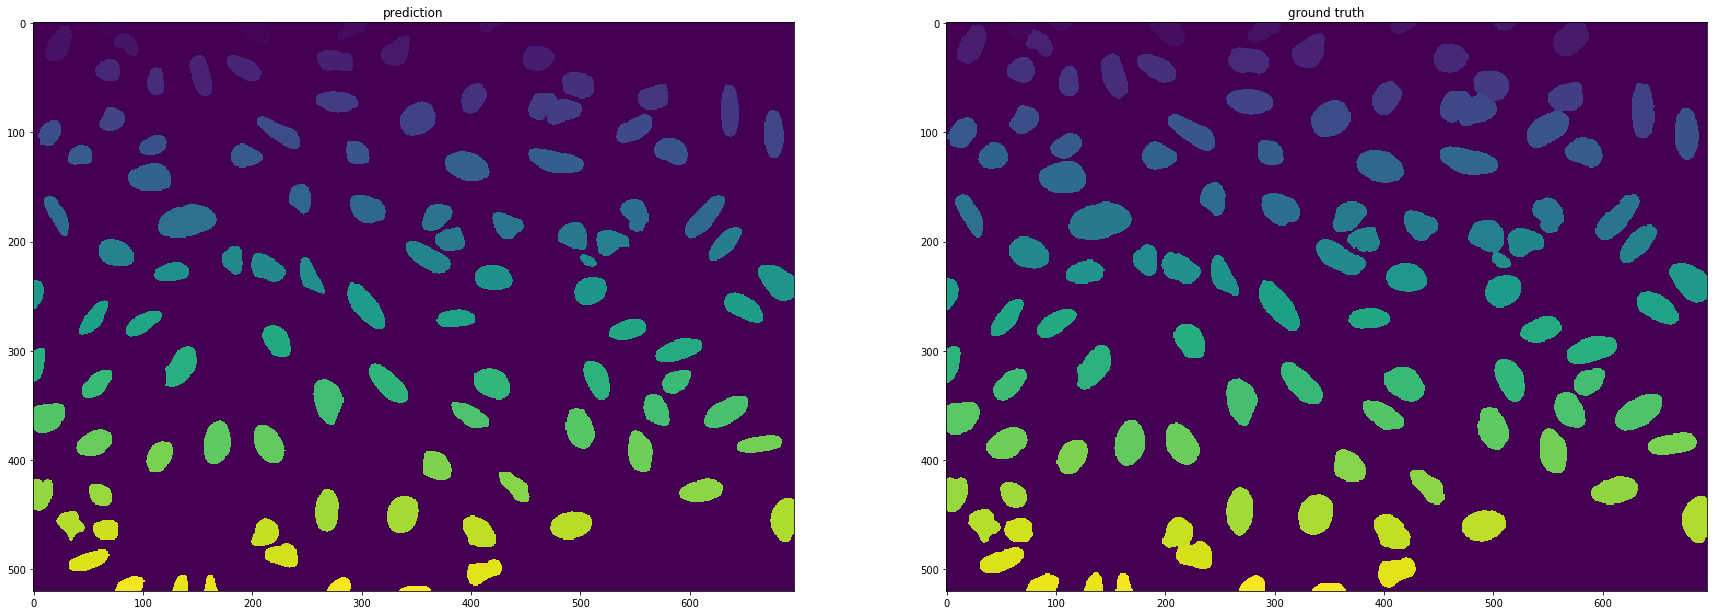

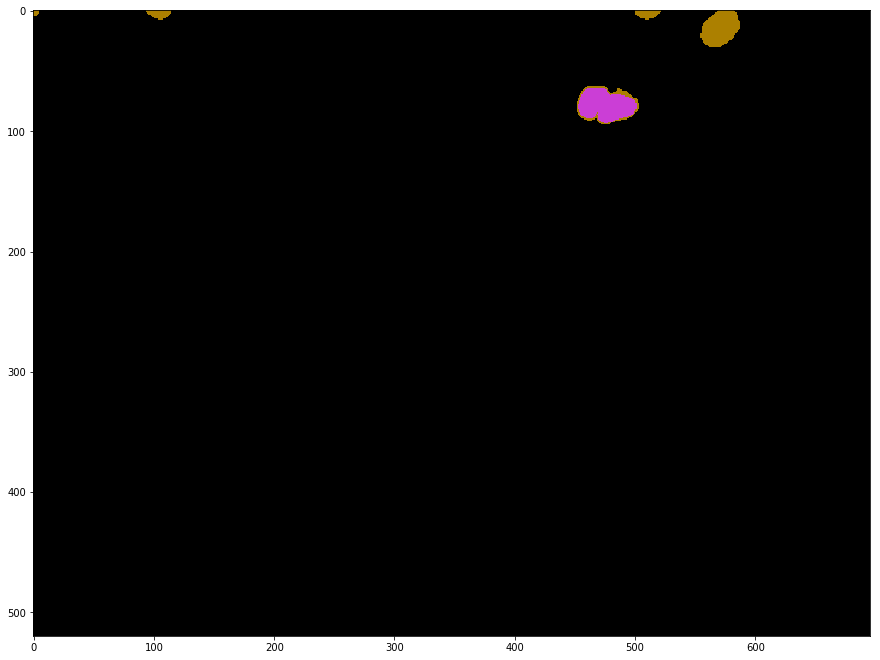

# nuclei gt 109
# nuclei CP 103
# matches 101
# overdetections 2
# underdetections 8
# mean IoU 0.812713


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


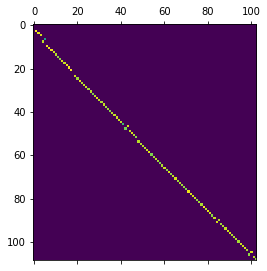

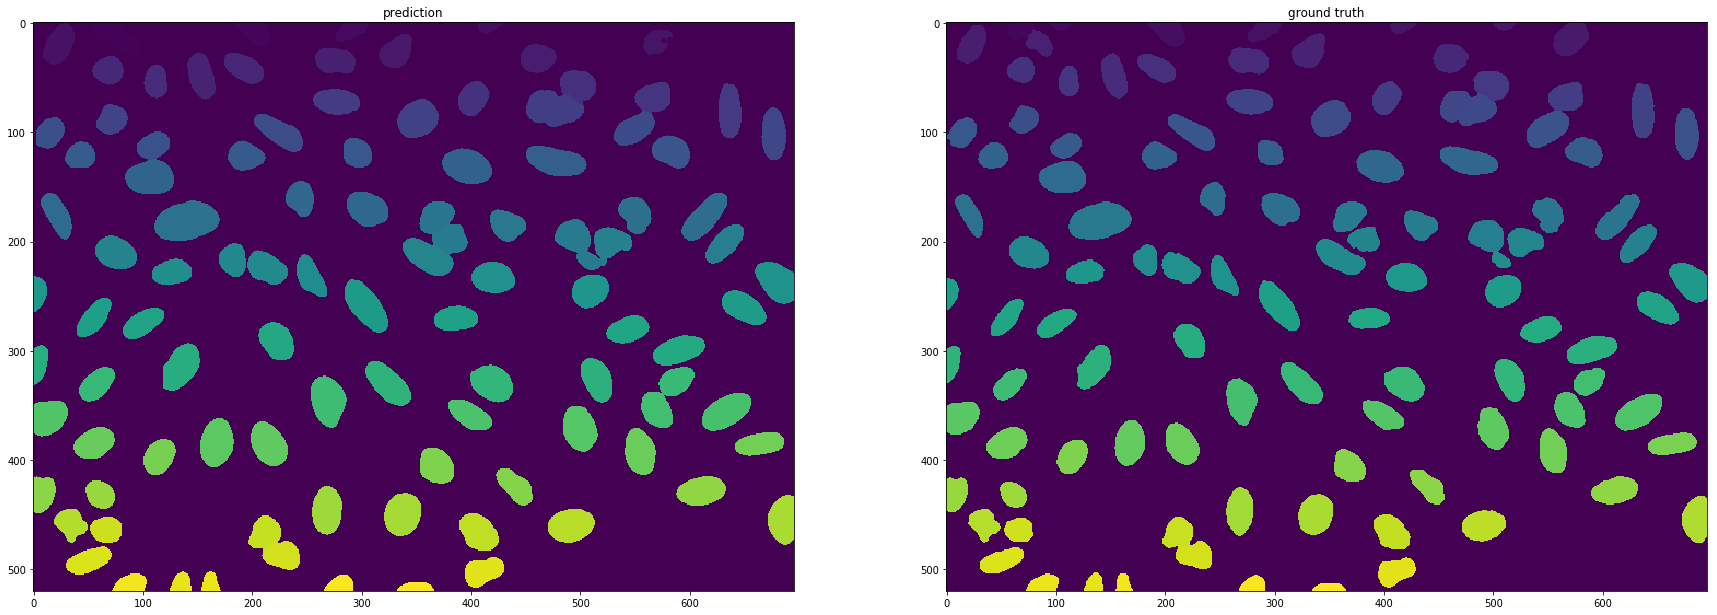

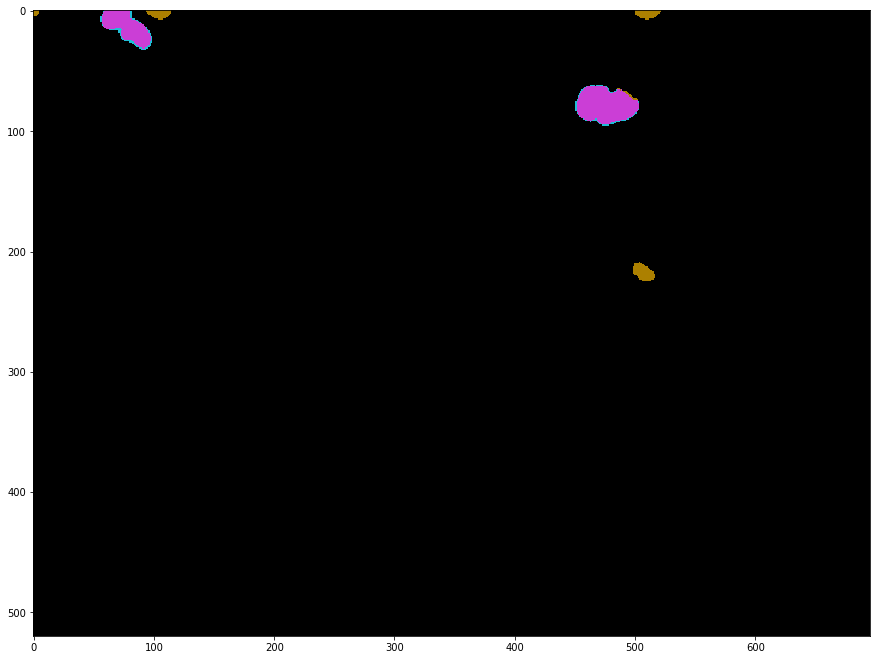

36 / 50
# nuclei gt 141
# nuclei DL 126
# matches 126
# overdetections 0
# underdetections 15
# mean IoU 0.680555


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


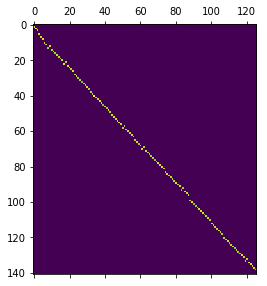

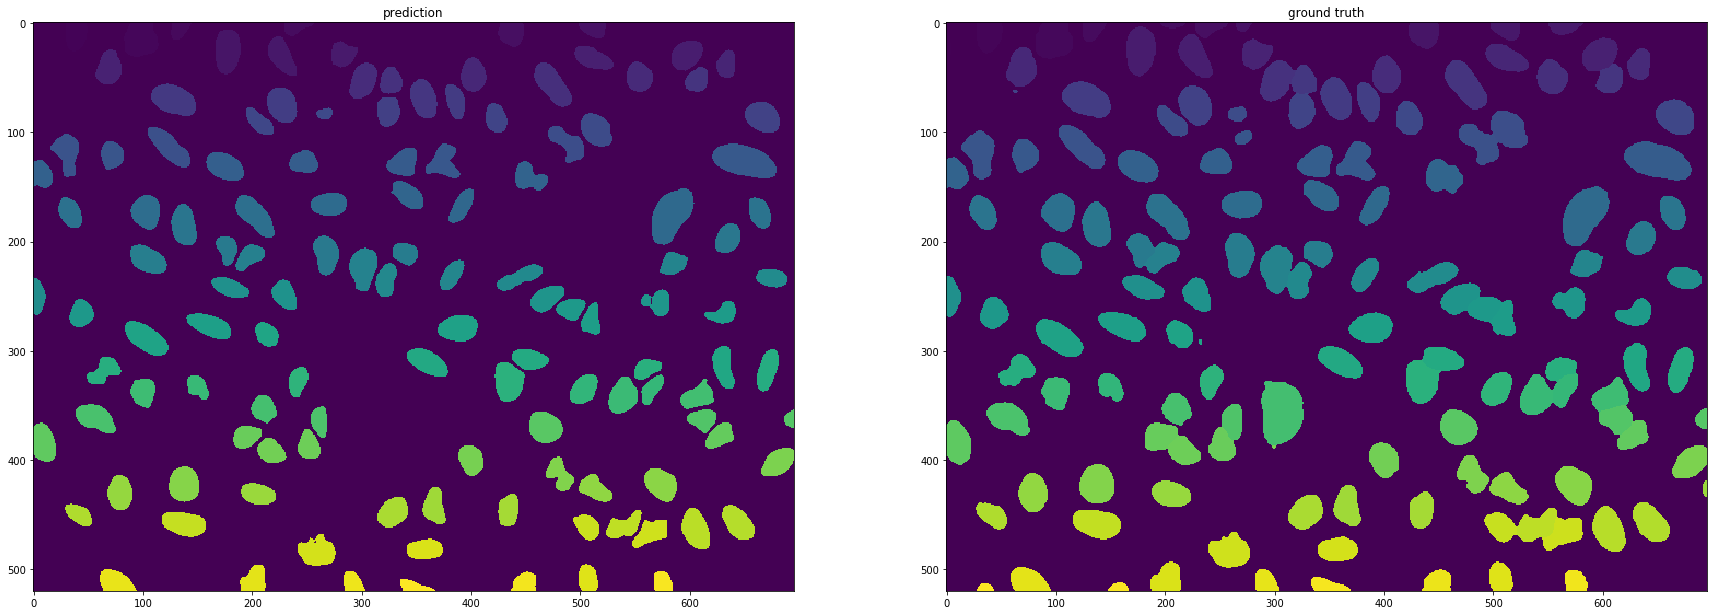

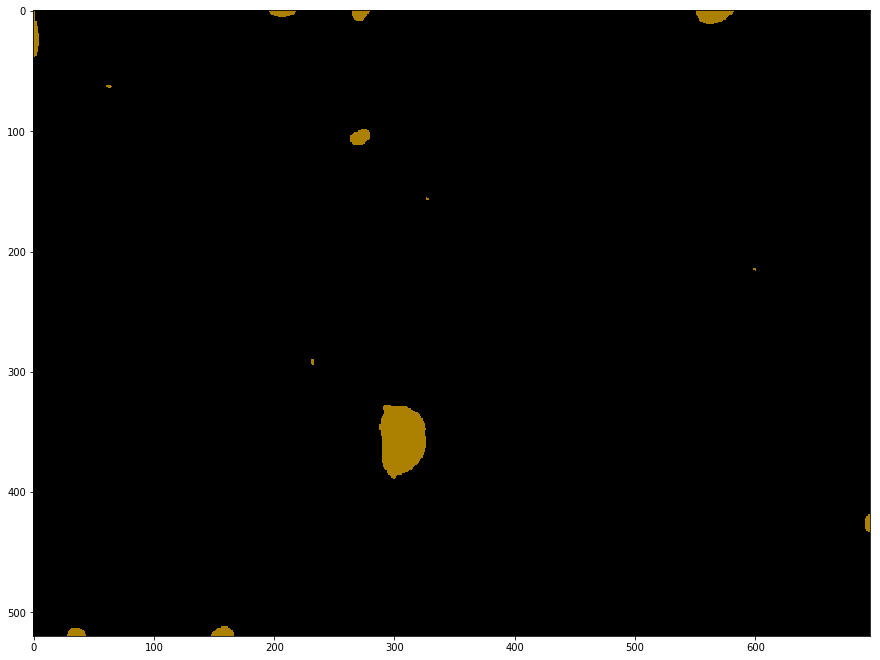

# nuclei gt 141
# nuclei CP 114
# matches 107
# overdetections 7
# underdetections 34
# mean IoU 0.690171


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_C05_s7_w1F71963FB-8F29-41CB-A5F5-07CB9584BBC5.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


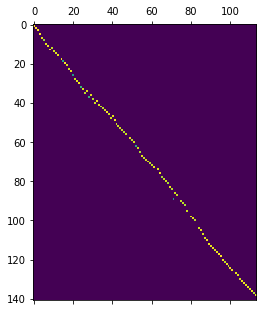

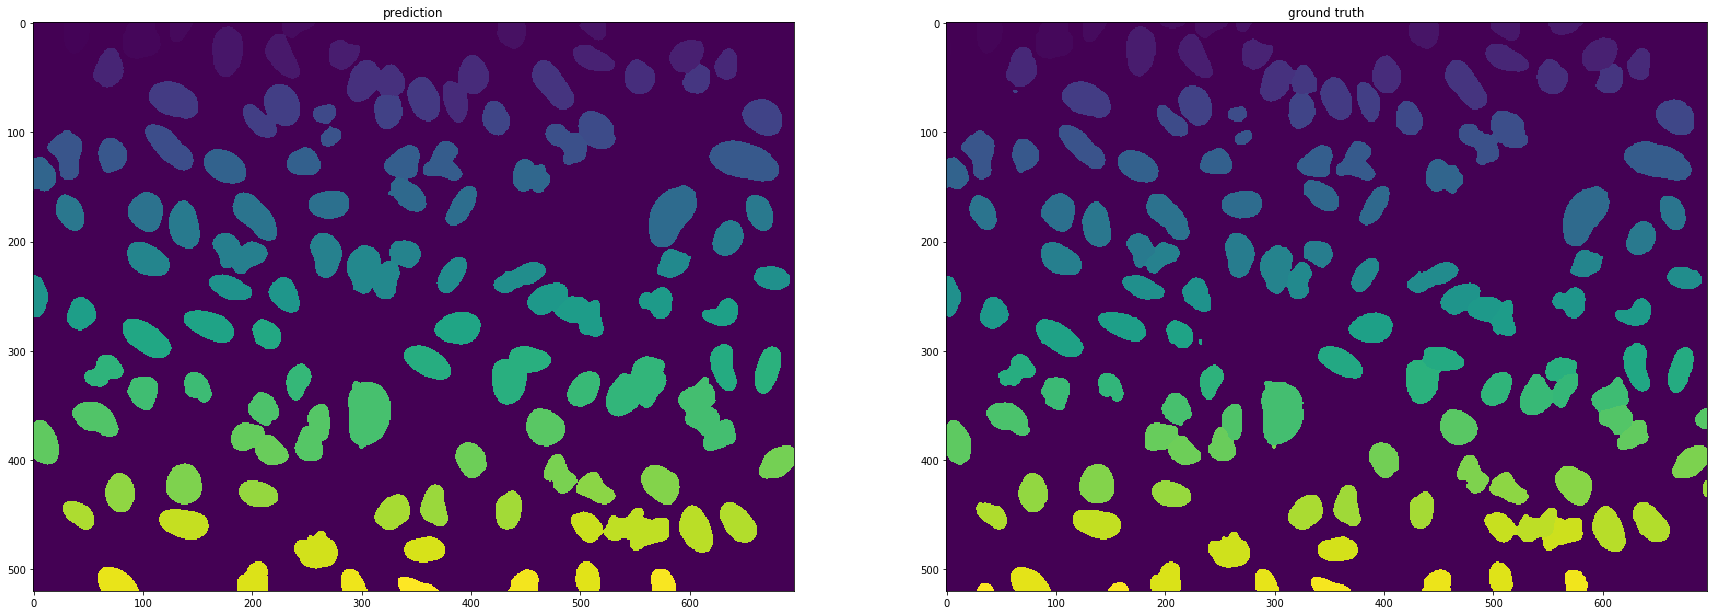

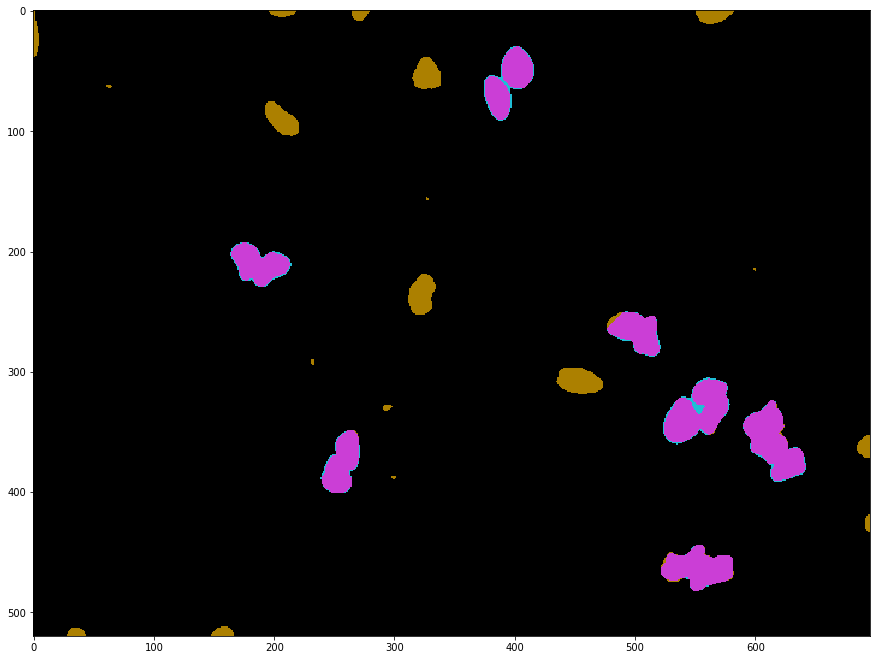

37 / 50
# nuclei gt 154
# nuclei DL 148
# matches 146
# overdetections 2
# underdetections 8
# mean IoU 0.711475


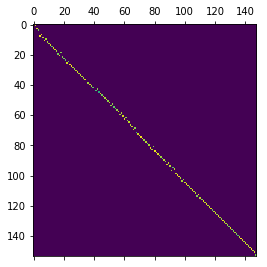

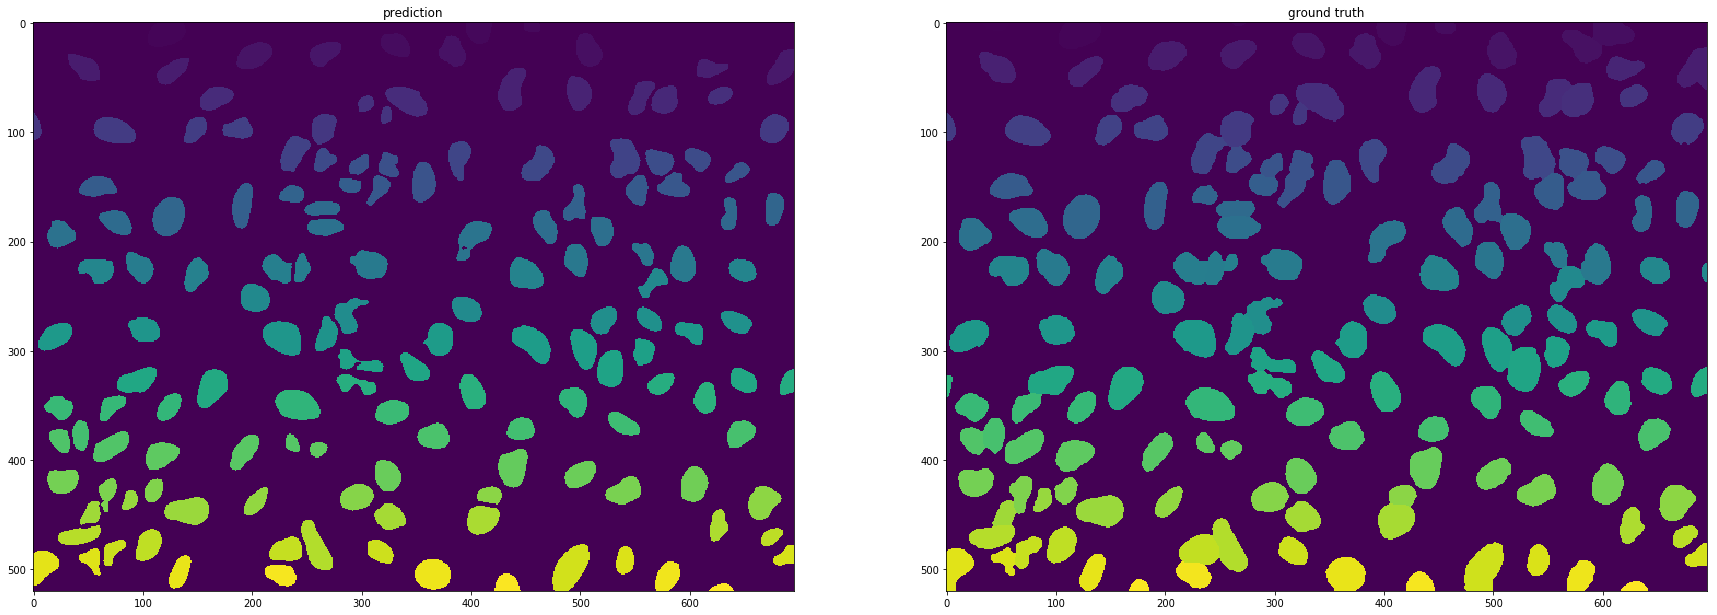

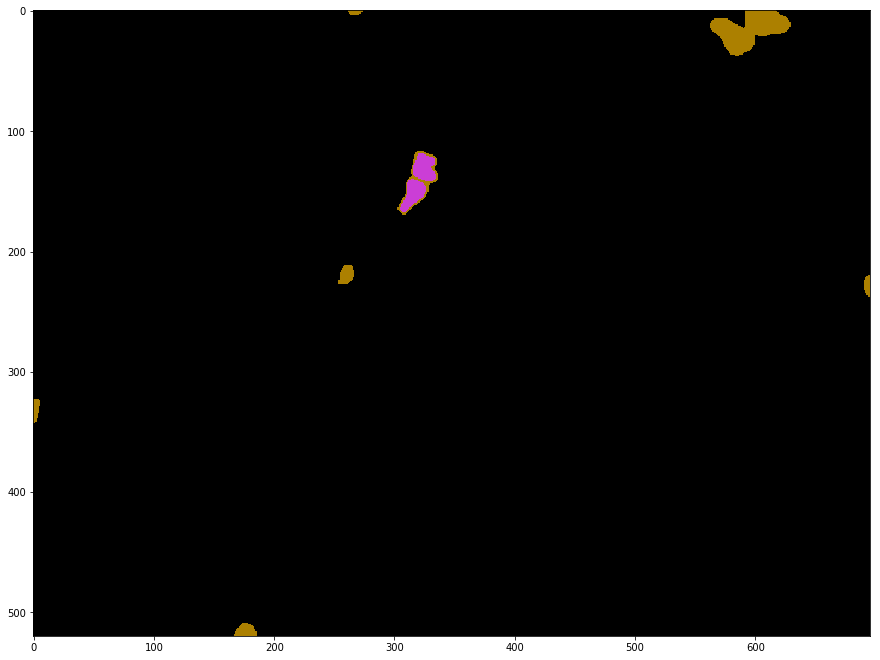

# nuclei gt 154
# nuclei CP 133
# matches 124
# overdetections 9
# underdetections 30
# mean IoU 0.704172


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


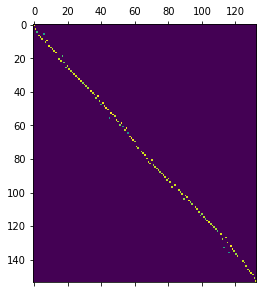

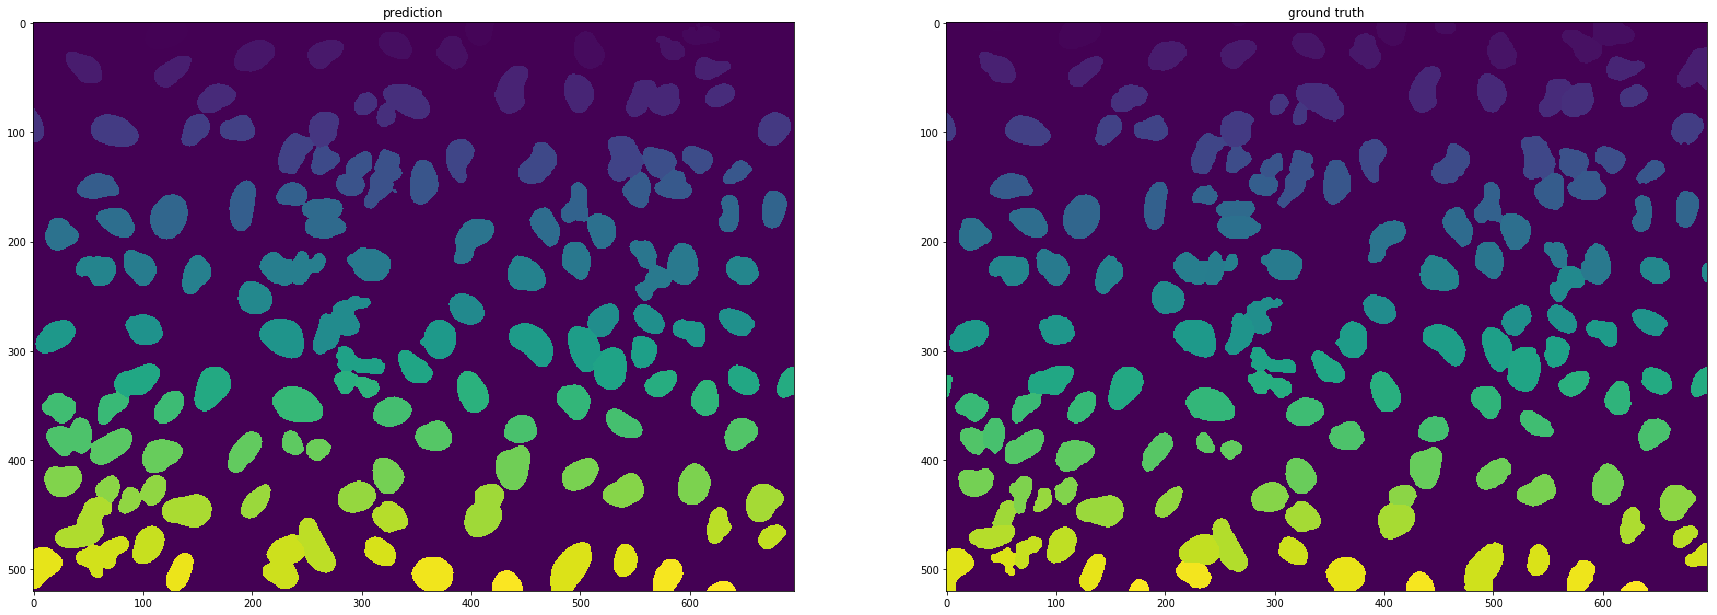

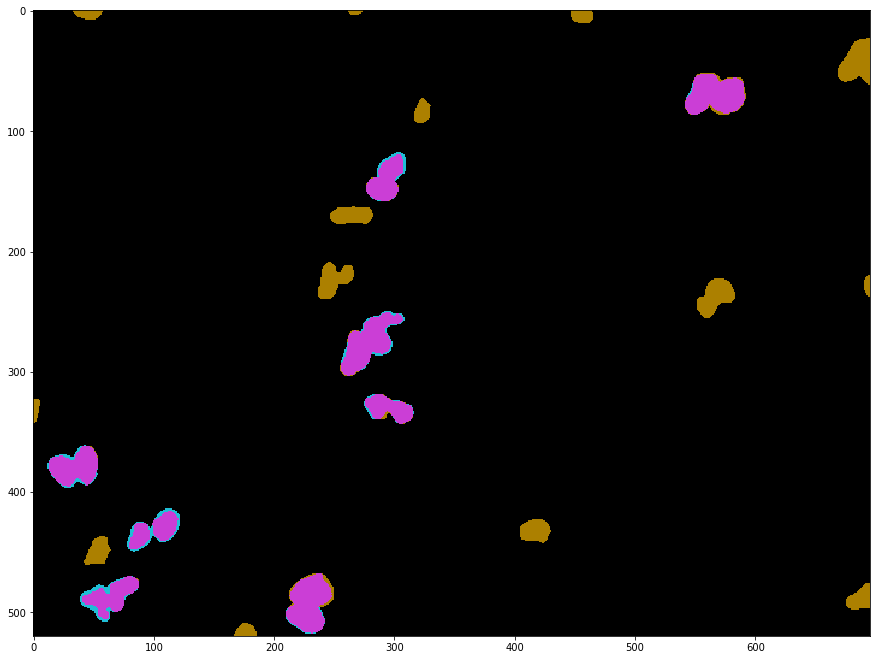

38 / 50
# nuclei gt 96
# nuclei DL 92
# matches 90
# overdetections 2
# underdetections 6
# mean IoU 0.691021


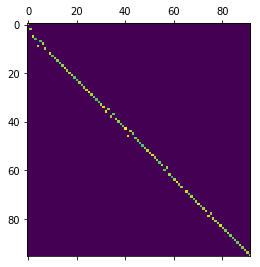

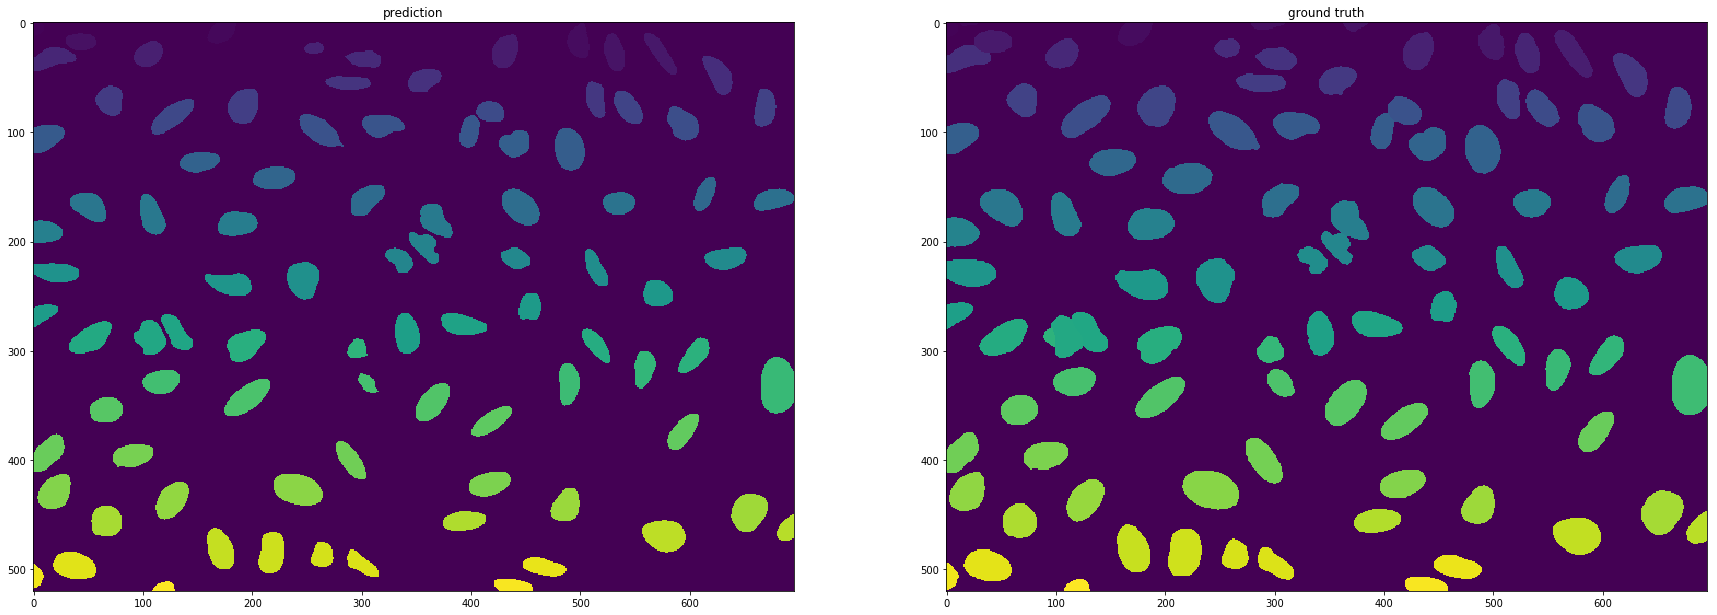

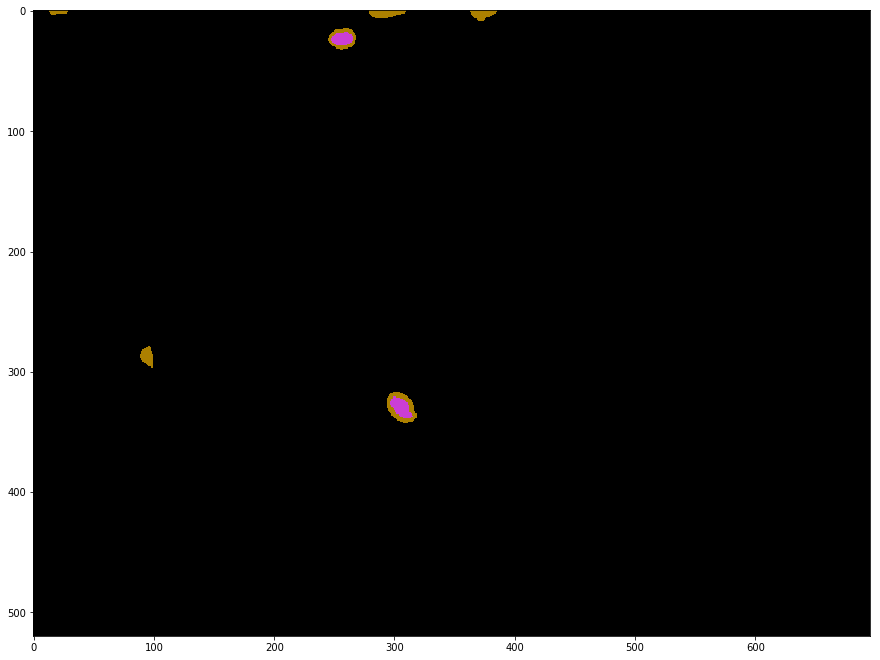

# nuclei gt 96
# nuclei CP 89
# matches 88
# overdetections 1
# underdetections 8
# mean IoU 0.835224


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


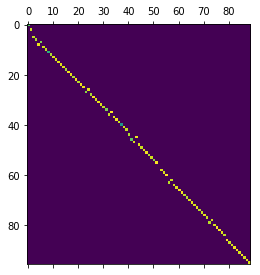

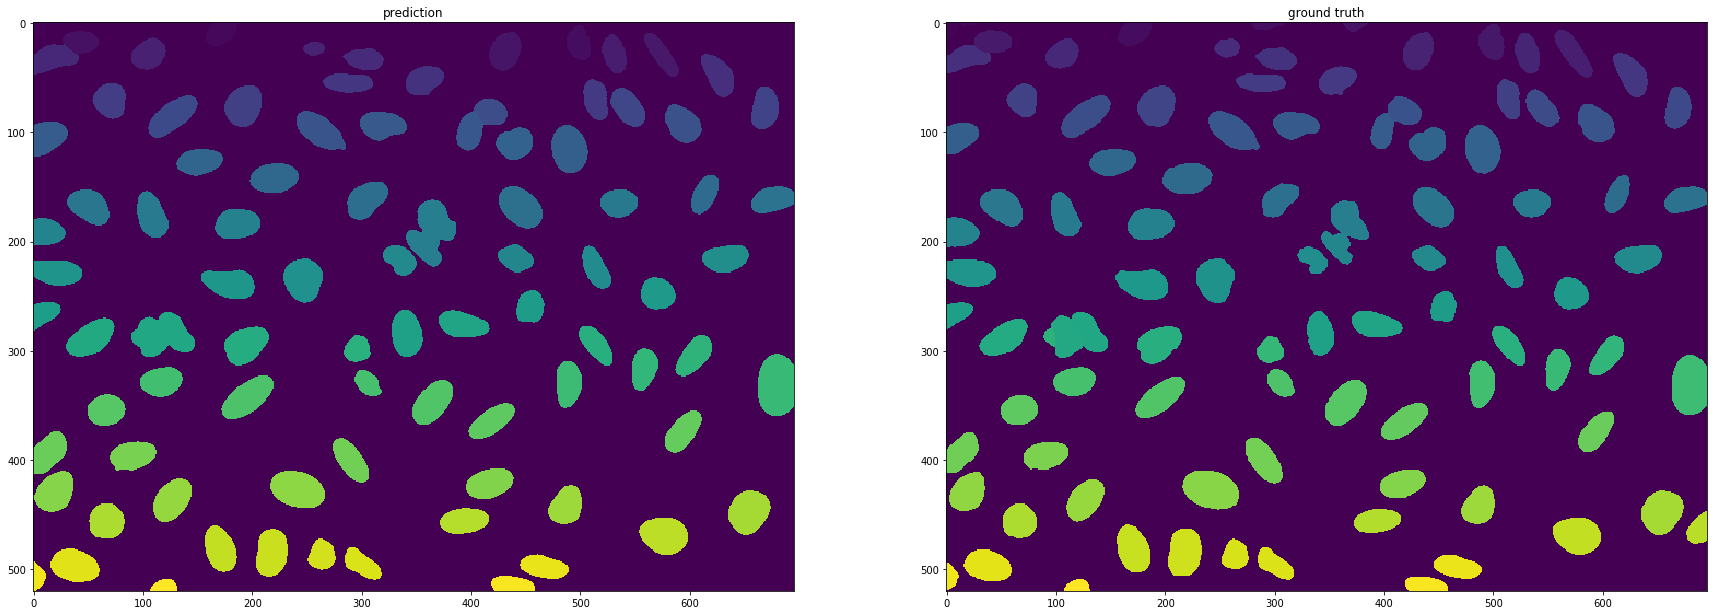

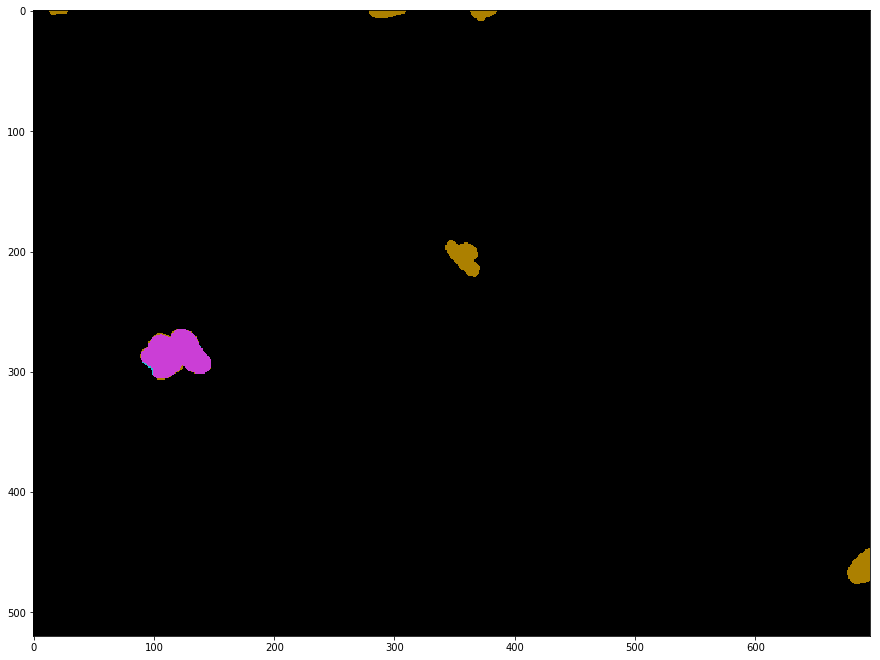

39 / 50
# nuclei gt 111
# nuclei DL 102
# matches 101
# overdetections 1
# underdetections 10
# mean IoU 0.698967


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


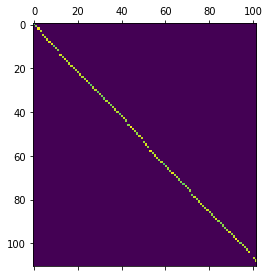

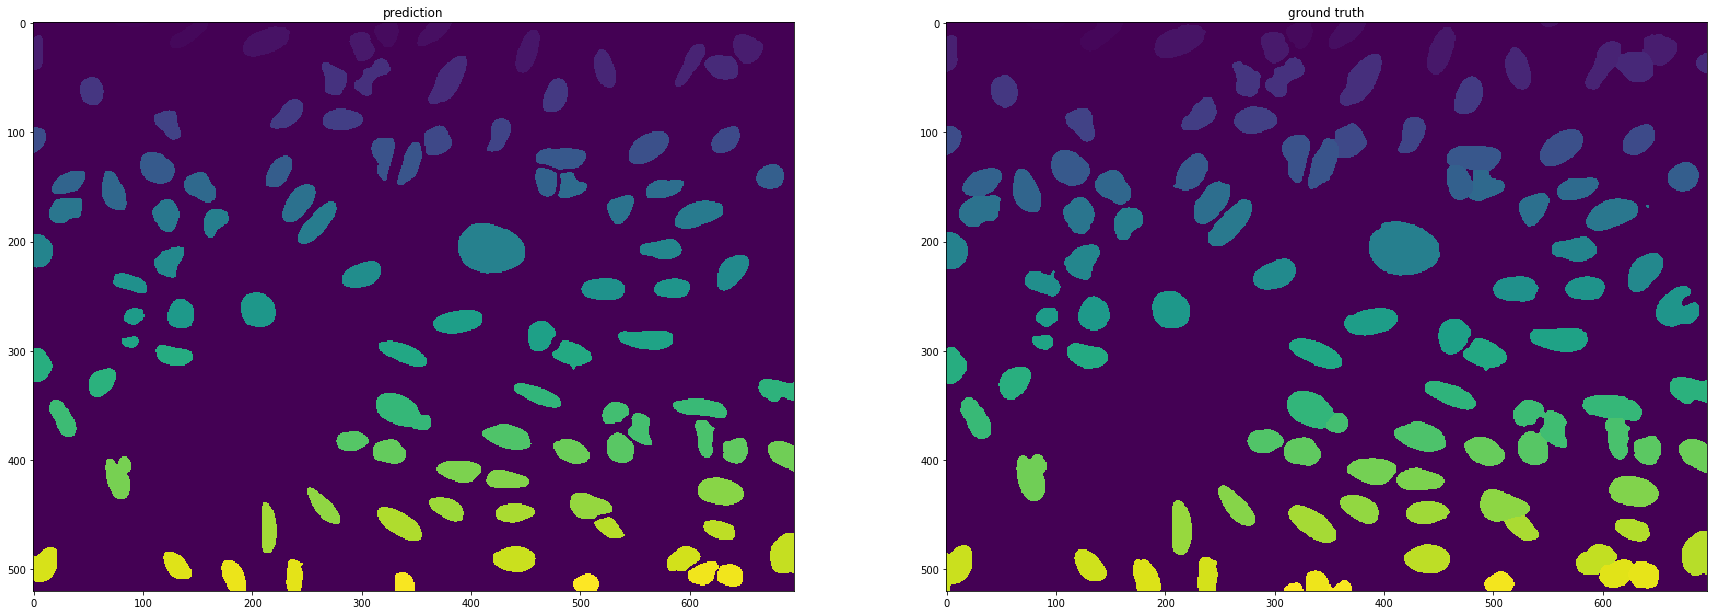

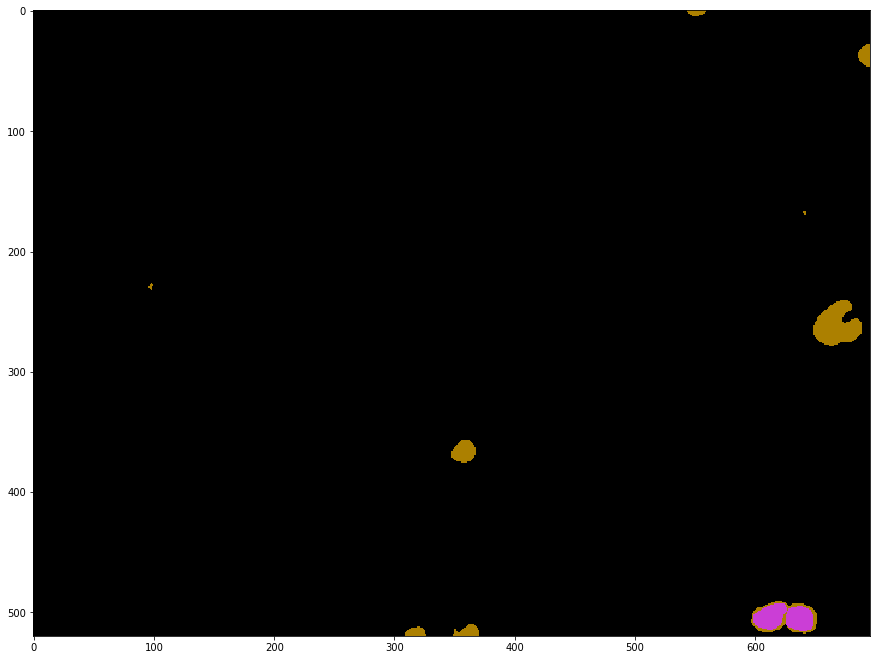

# nuclei gt 111
# nuclei CP 95
# matches 89
# overdetections 6
# underdetections 22
# mean IoU 0.701471


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D04_s9_w17B6268DB-8215-4DC6-943C-CC009A8A5732.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


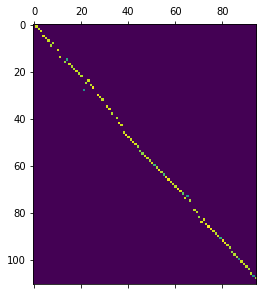

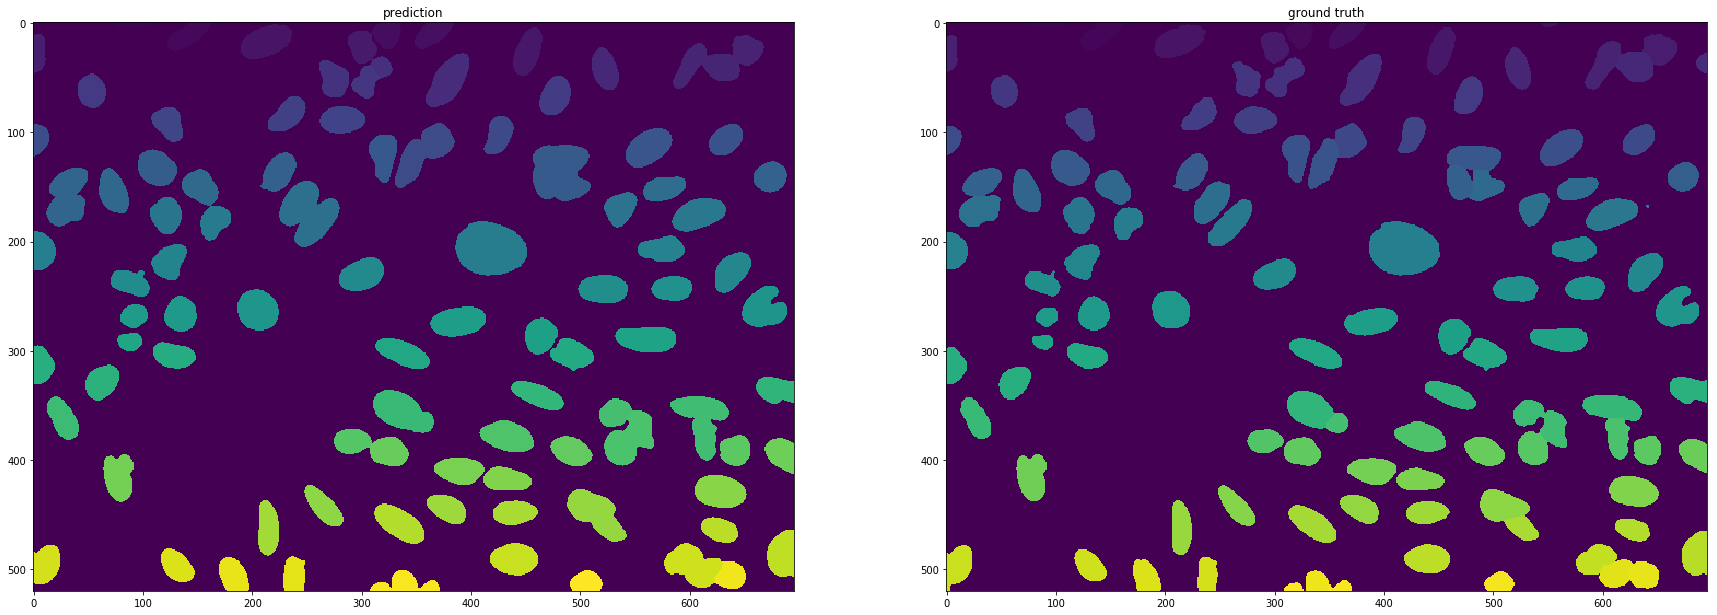

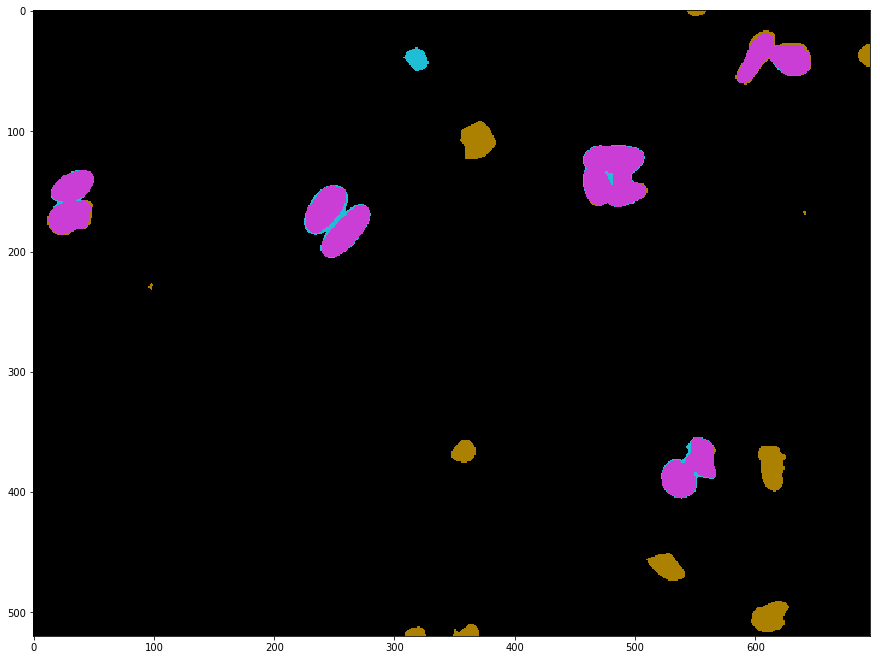

40 / 50
# nuclei gt 123
# nuclei DL 113
# matches 109
# overdetections 4
# underdetections 14
# mean IoU 0.64461


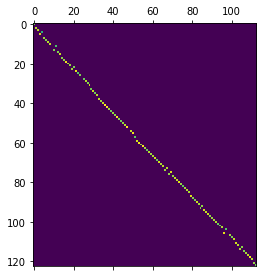

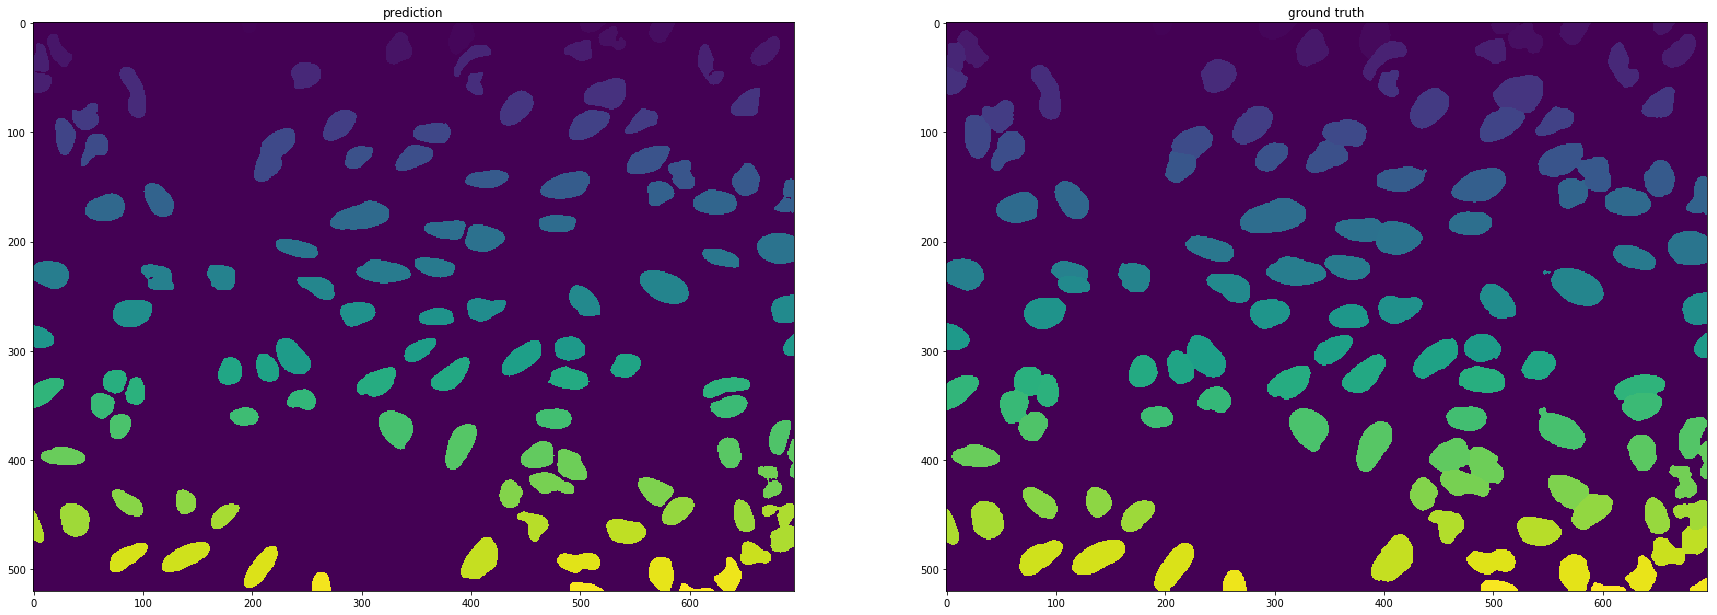

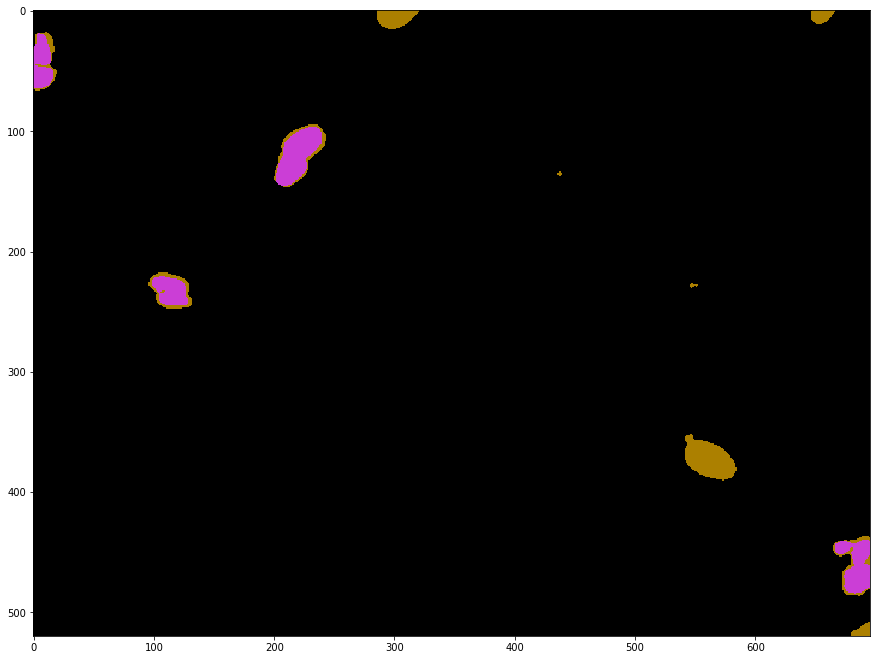

# nuclei gt 123
# nuclei CP 100
# matches 90
# overdetections 10
# underdetections 33
# mean IoU 0.658144


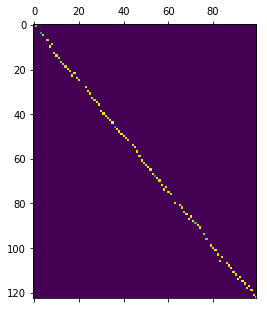

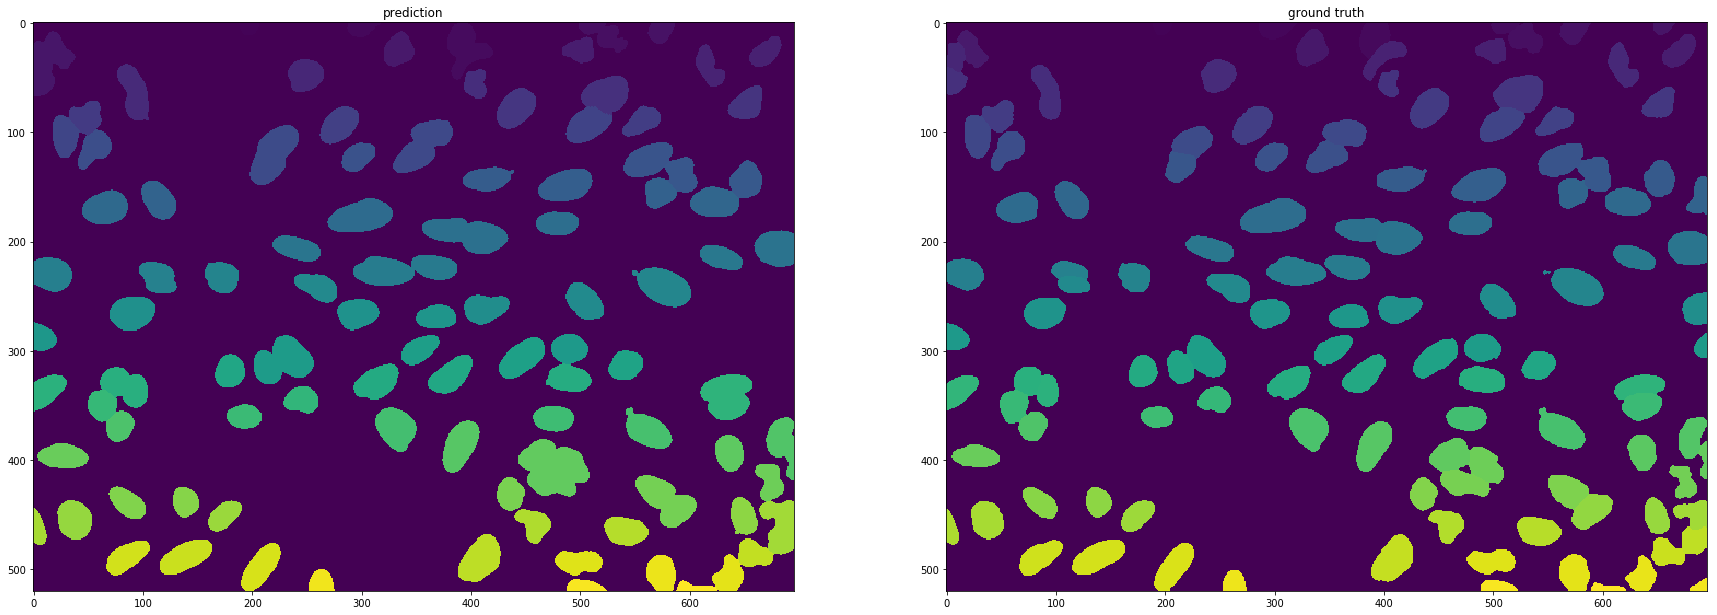

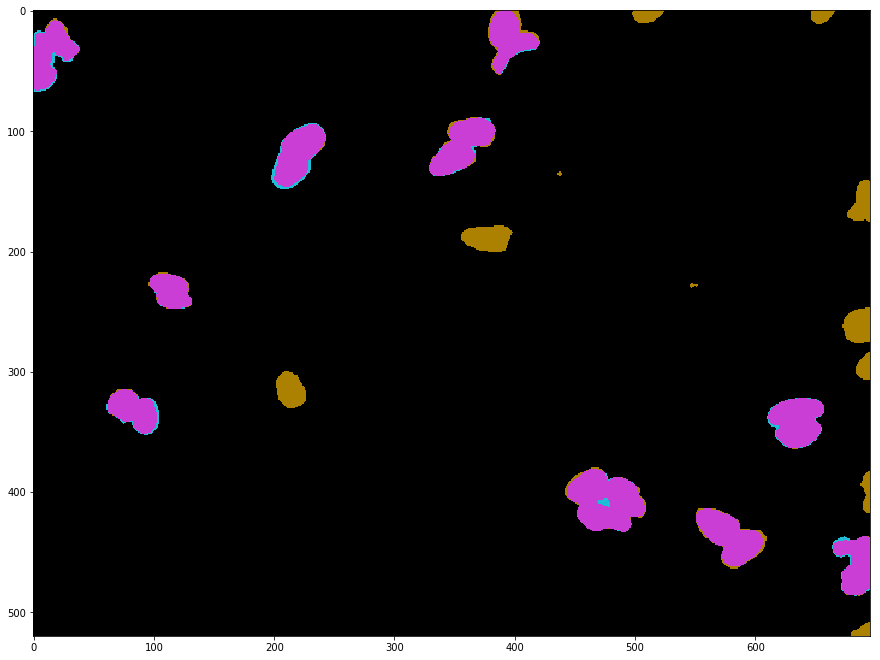

41 / 50
# nuclei gt 101
# nuclei DL 91
# matches 89
# overdetections 2
# underdetections 12
# mean IoU 0.678244


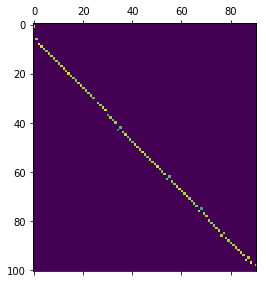

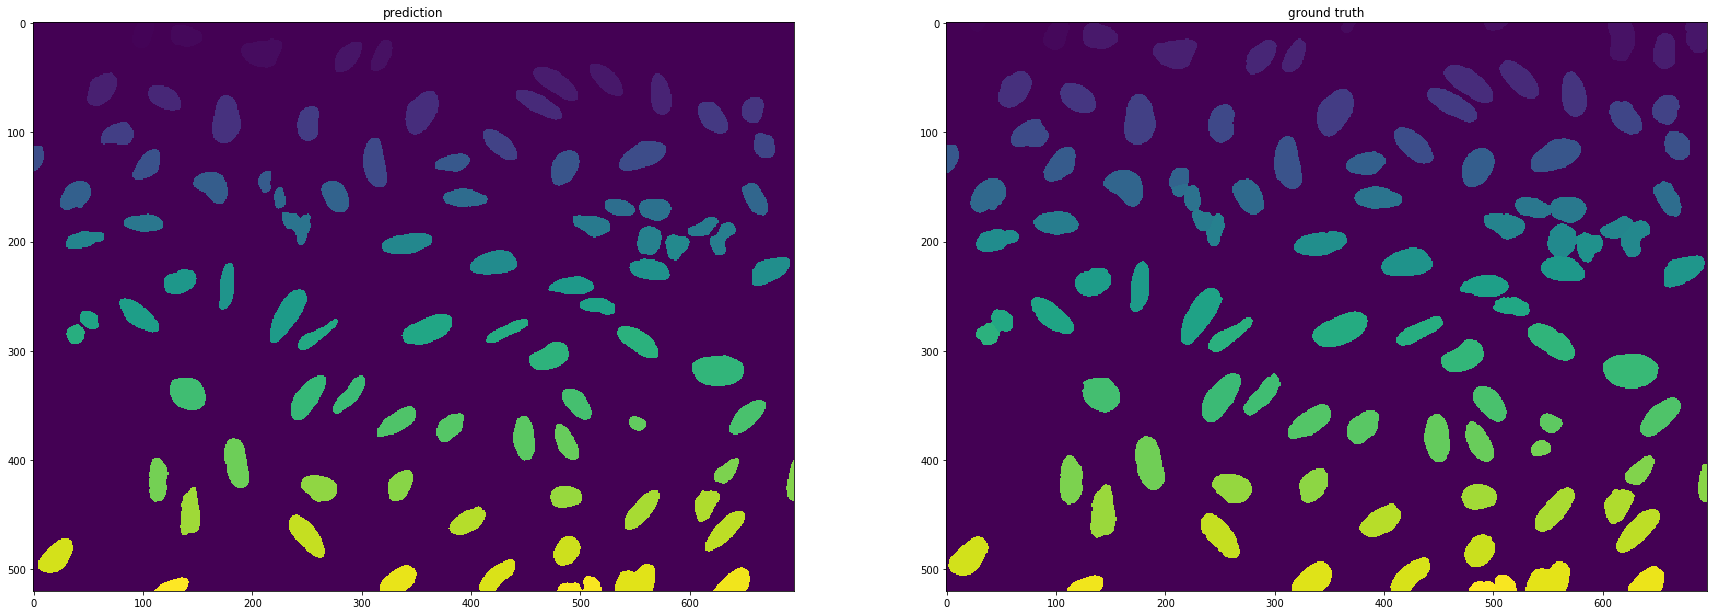

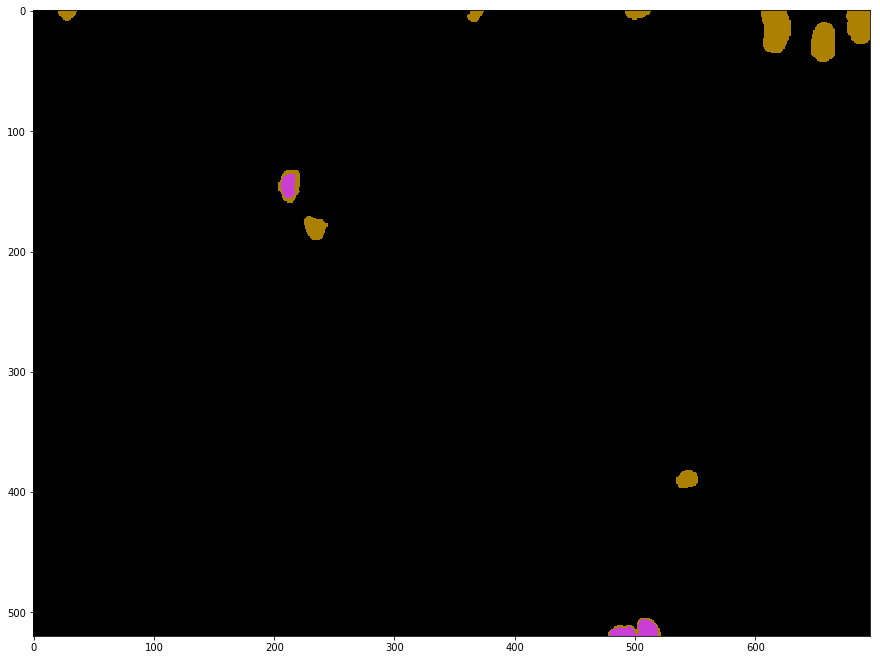

# nuclei gt 101
# nuclei CP 92
# matches 90
# overdetections 2
# underdetections 11
# mean IoU 0.773738


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_B21_s4_w1521471E0-9BD7-492A-8739-9C782C2585B0.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


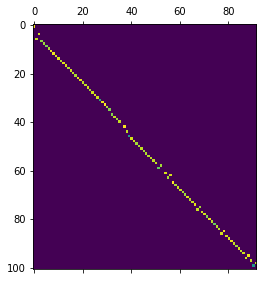

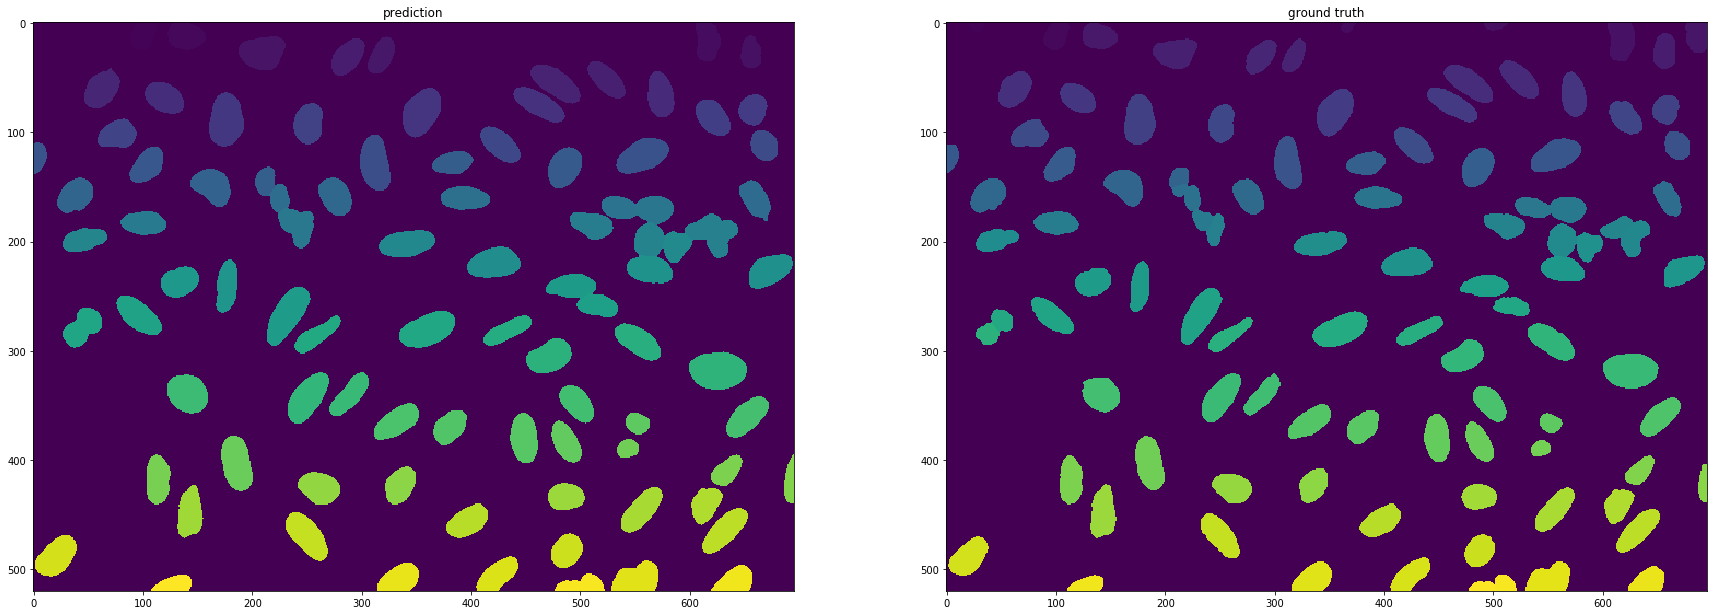

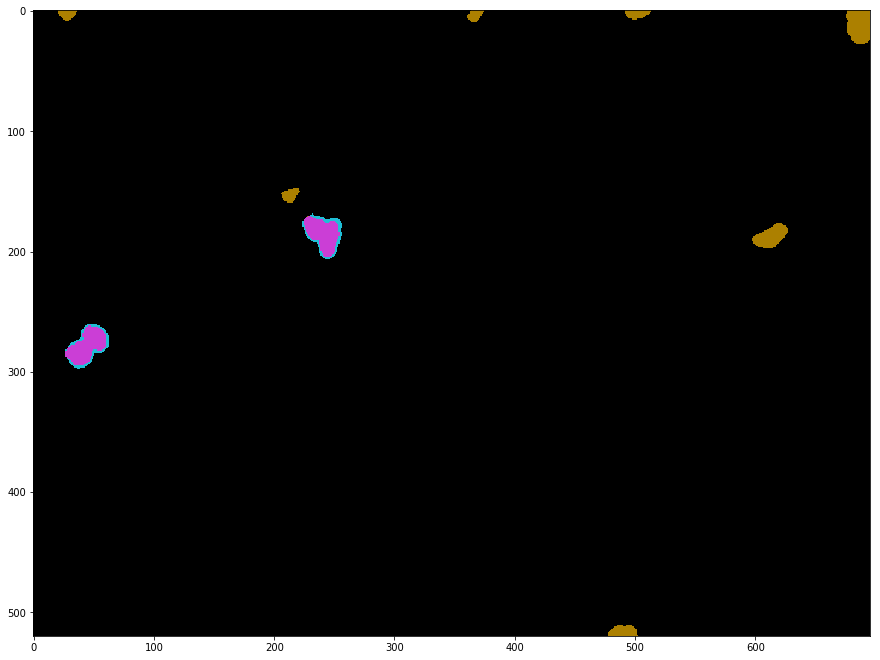

42 / 50
# nuclei gt 141
# nuclei DL 131
# matches 130
# overdetections 1
# underdetections 11
# mean IoU 0.703793


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_B21_s4_w1521471E0-9BD7-492A-8739-9C782C2585B0.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


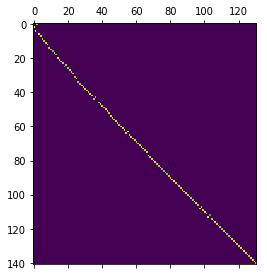

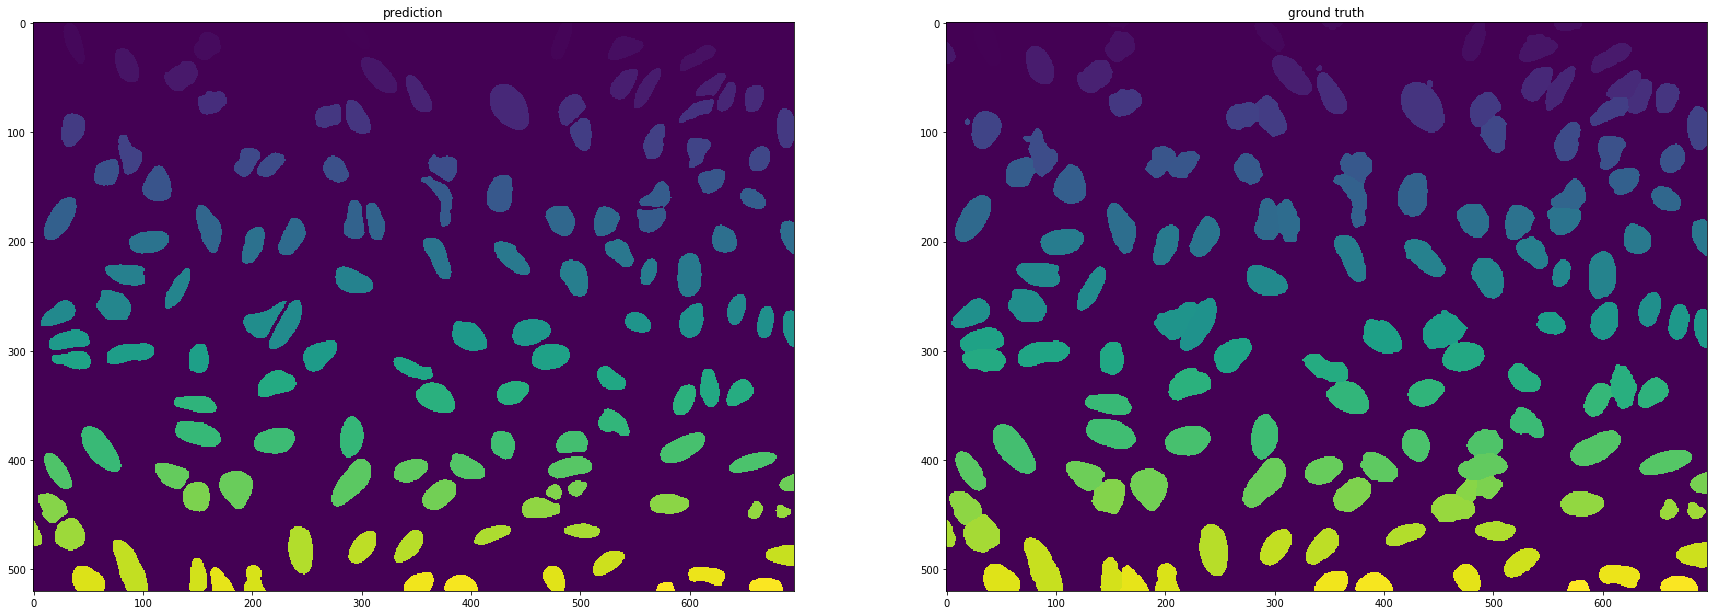

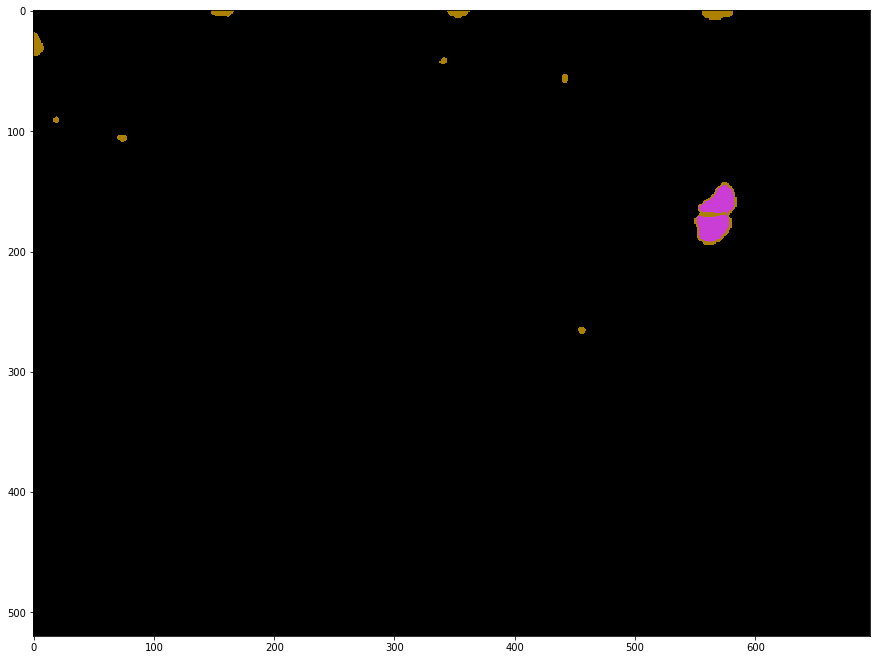

# nuclei gt 141
# nuclei CP 116
# matches 109
# overdetections 7
# underdetections 32
# mean IoU 0.68756


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


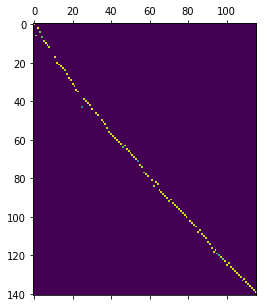

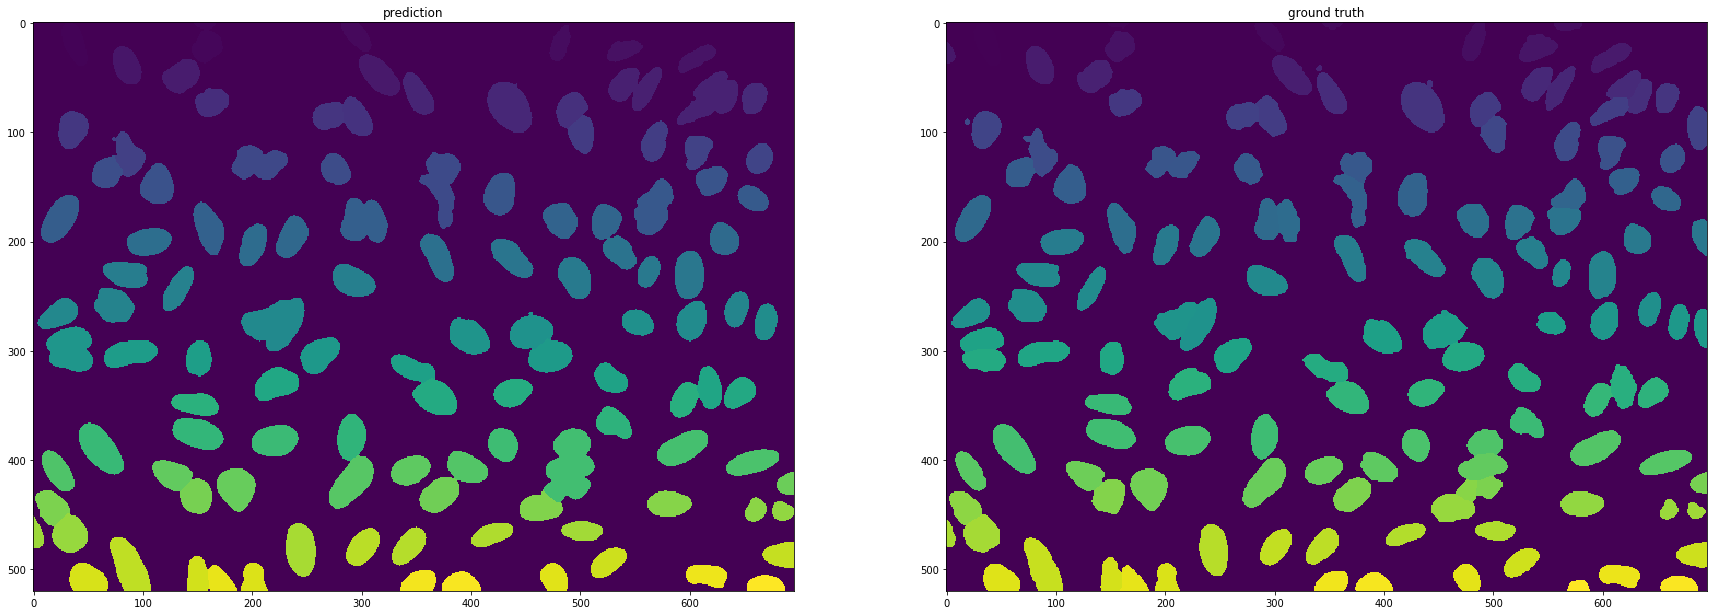

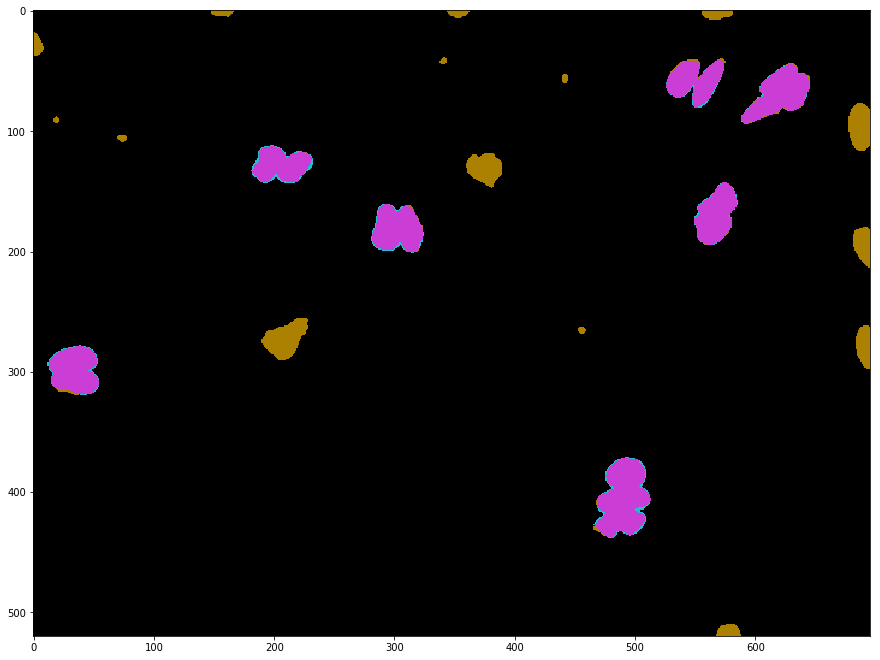

43 / 50
# nuclei gt 107
# nuclei DL 98
# matches 97
# overdetections 1
# underdetections 10
# mean IoU 0.687349


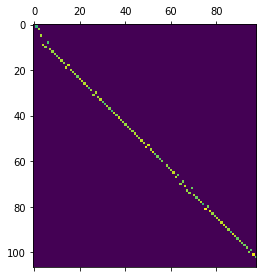

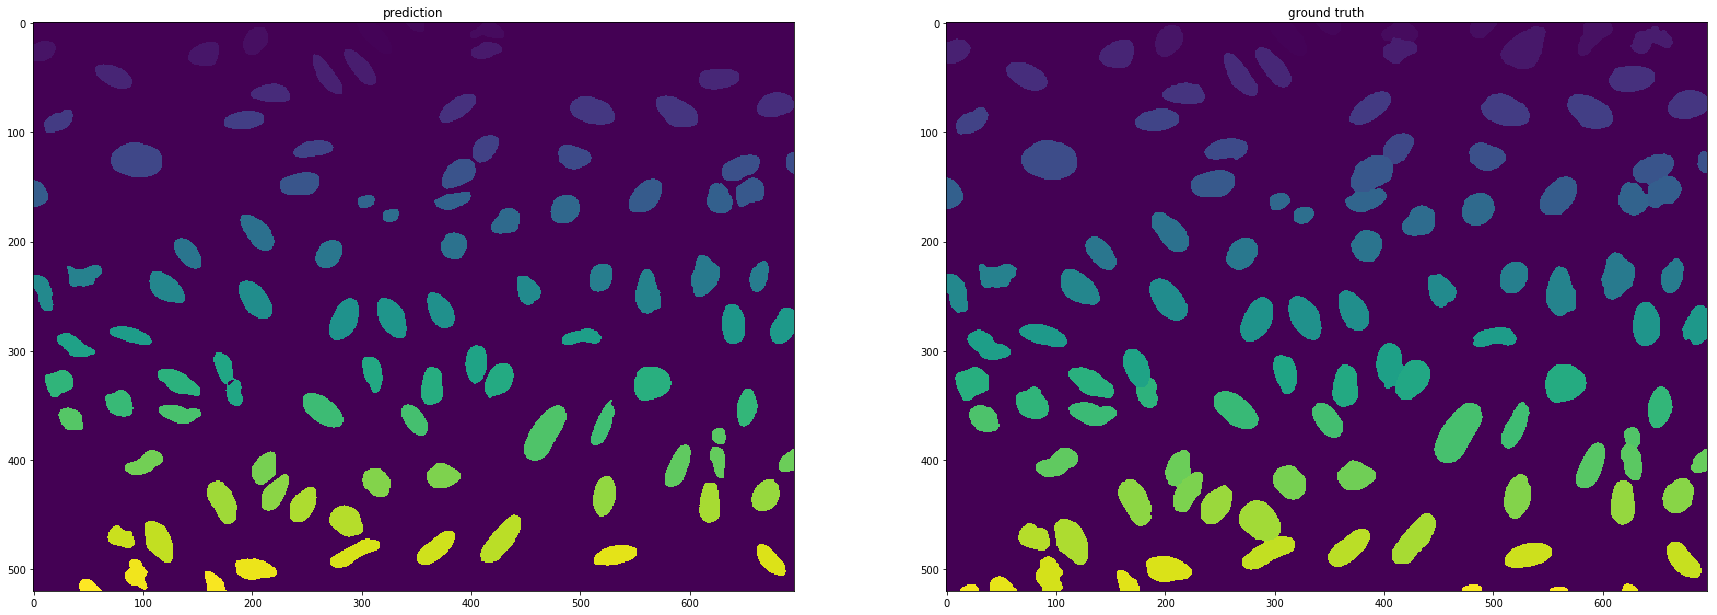

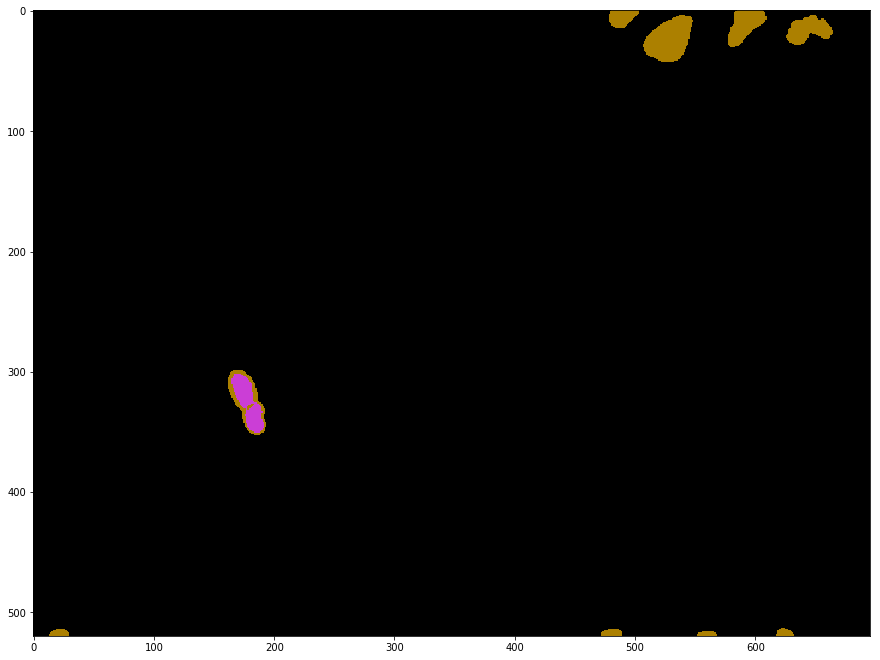

# nuclei gt 107
# nuclei CP 91
# matches 86
# overdetections 5
# underdetections 21
# mean IoU 0.720749


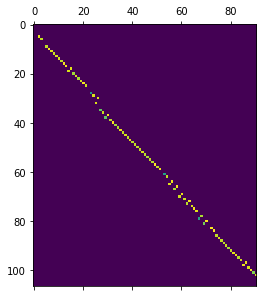

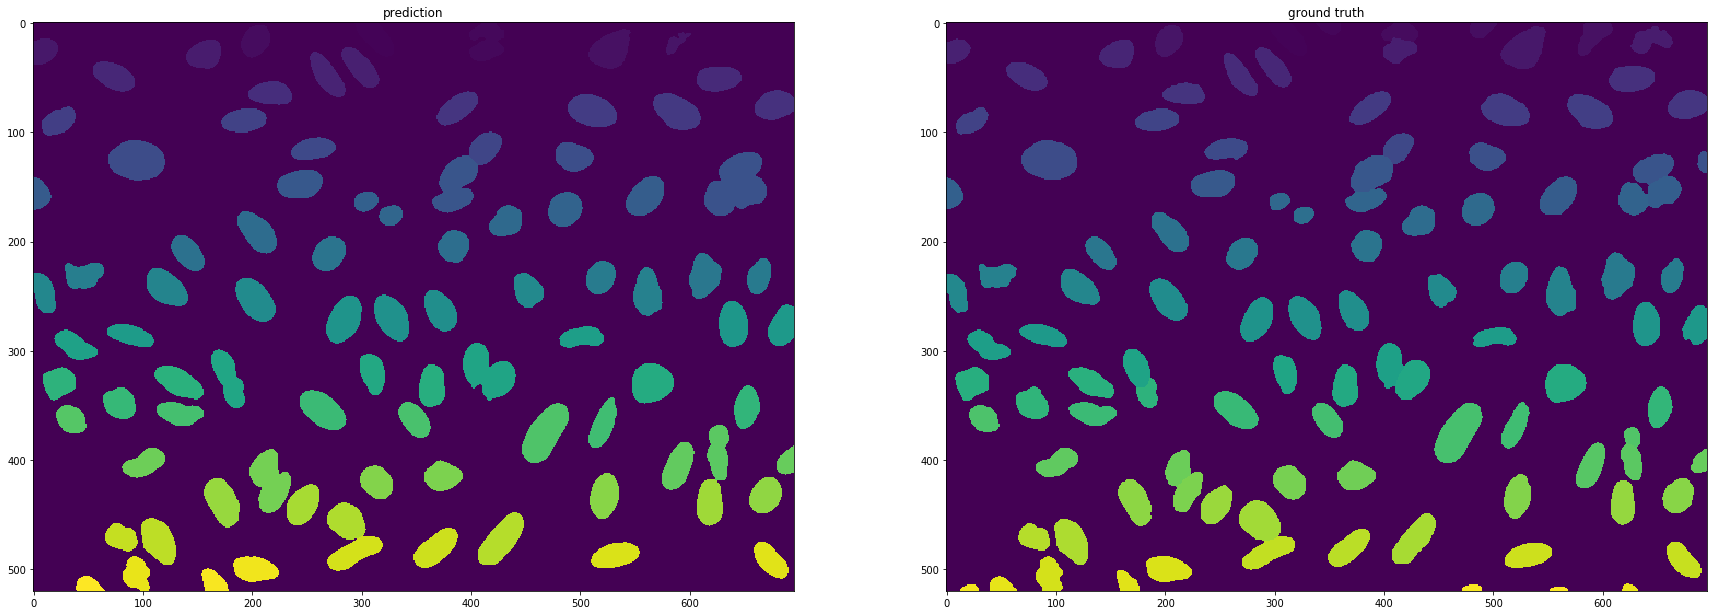

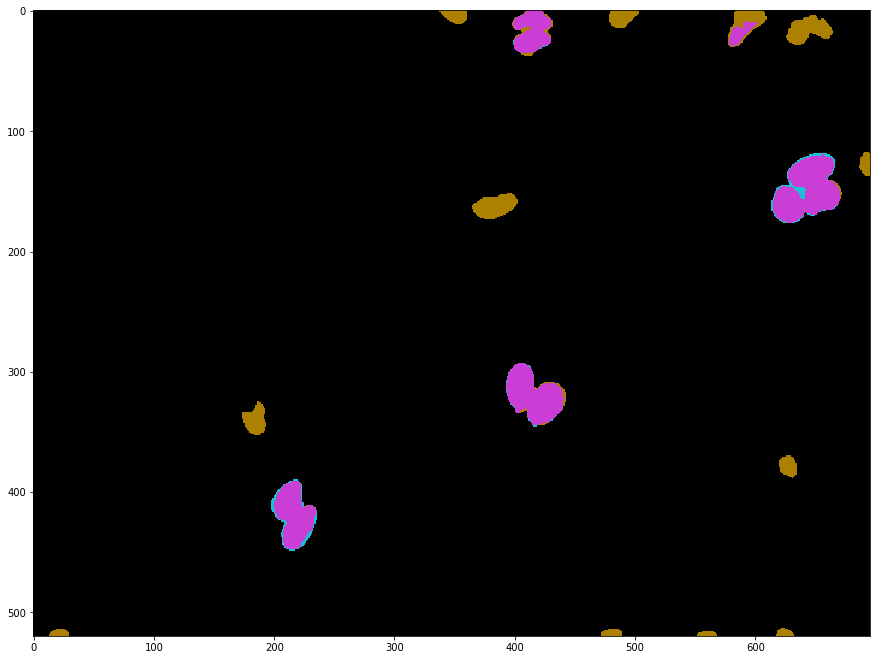

44 / 50
# nuclei gt 89
# nuclei DL 85
# matches 85
# overdetections 0
# underdetections 4
# mean IoU 0.7475


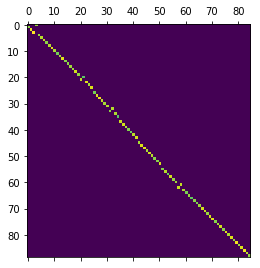

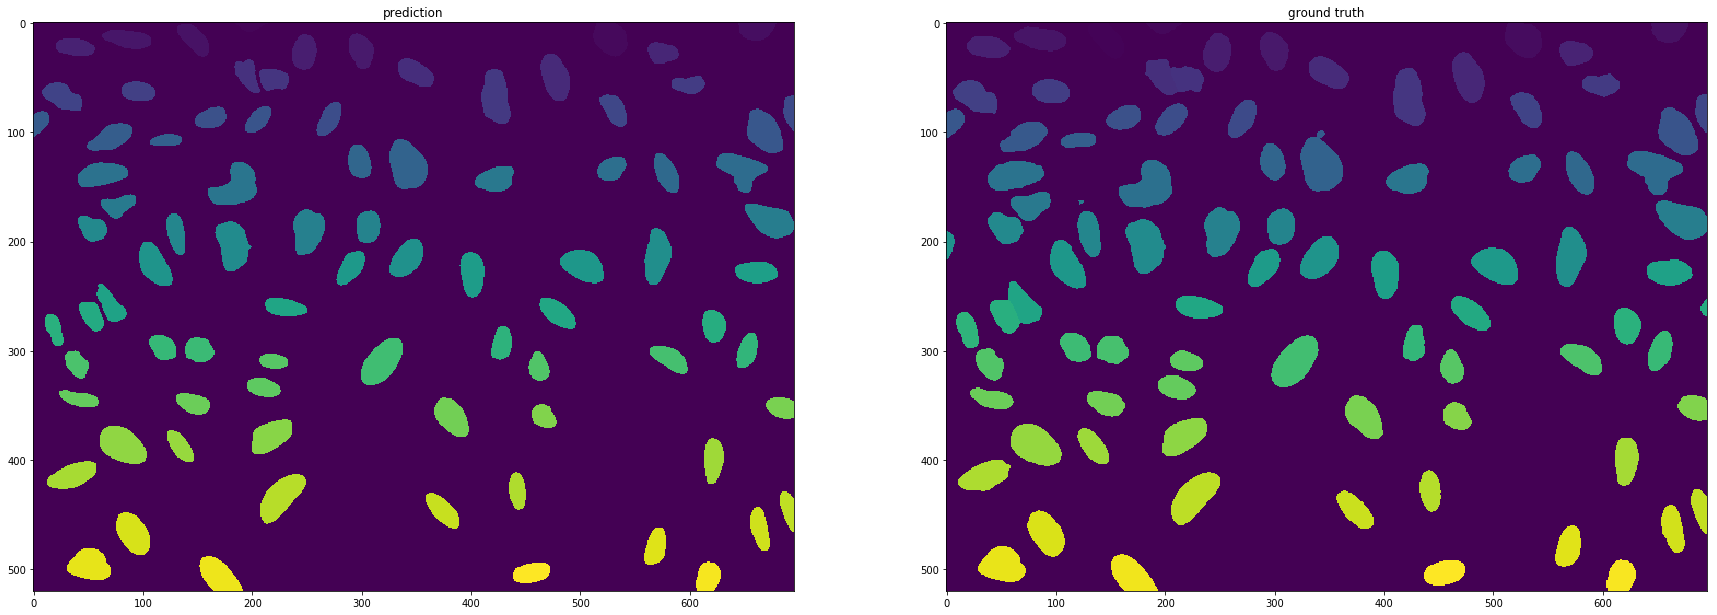

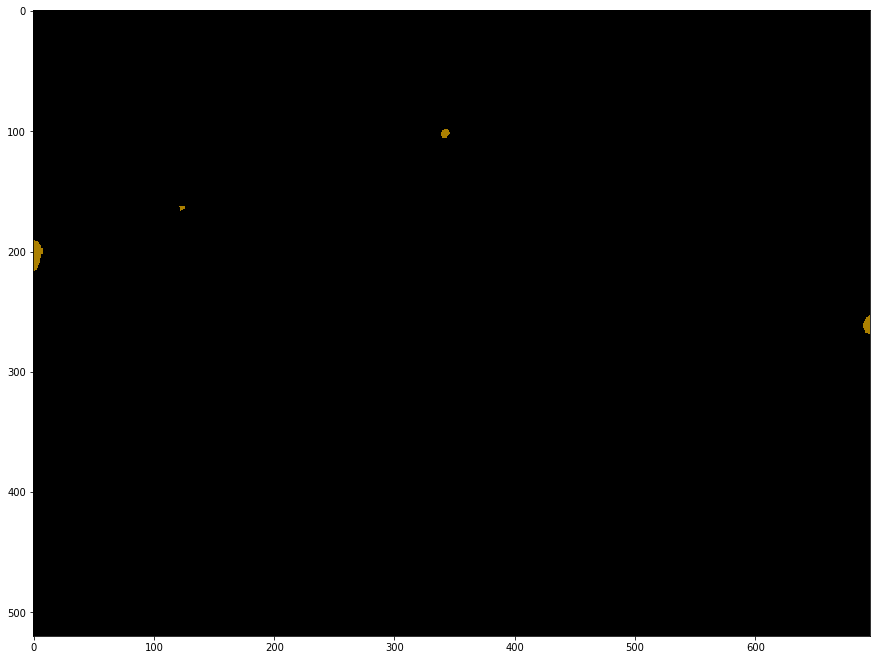

# nuclei gt 89
# nuclei CP 82
# matches 82
# overdetections 0
# underdetections 7
# mean IoU 0.834744


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


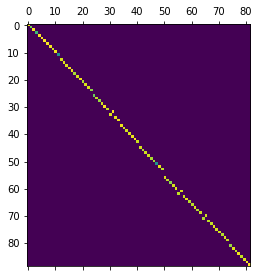

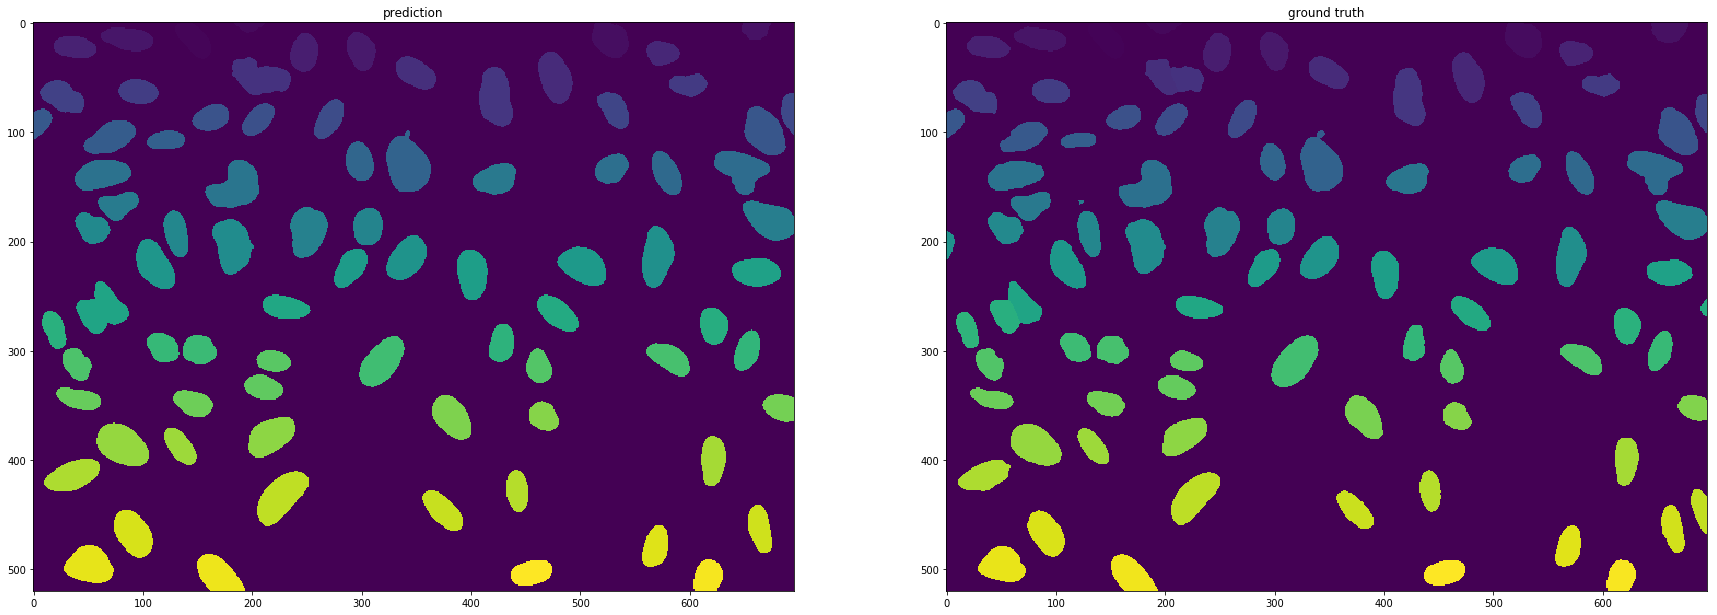

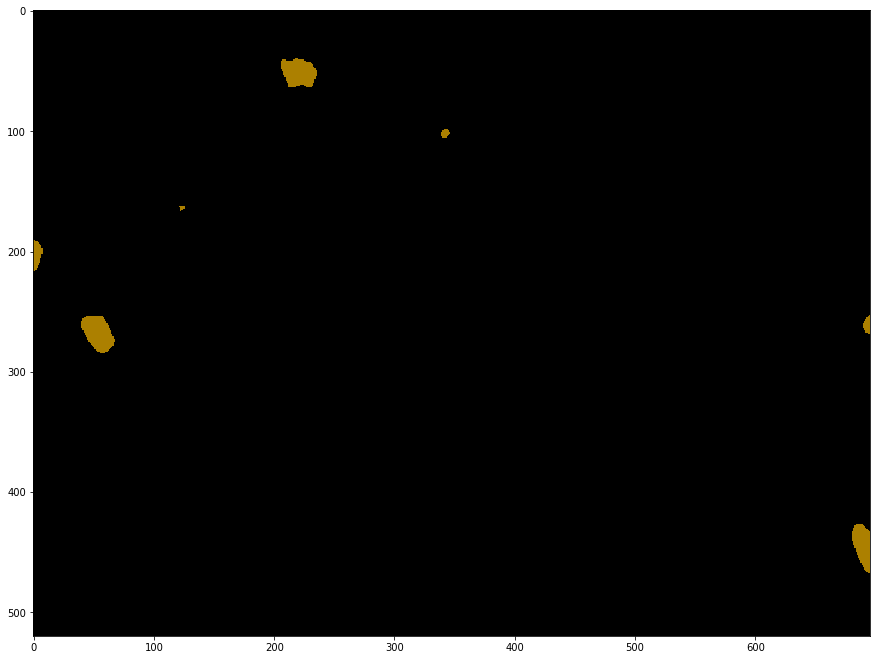

45 / 50
# nuclei gt 127
# nuclei DL 118
# matches 118
# overdetections 0
# underdetections 9
# mean IoU 0.72673


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


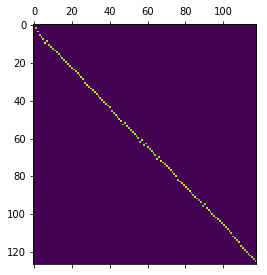

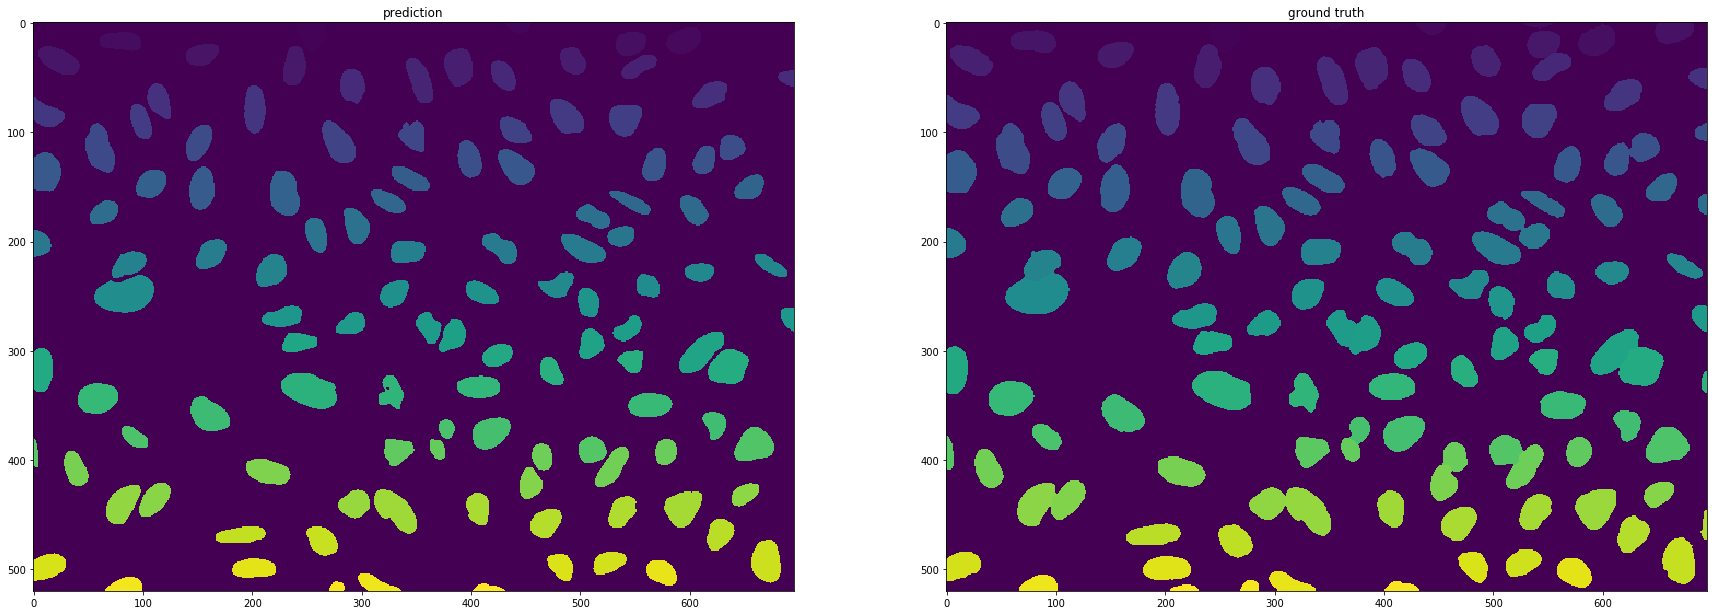

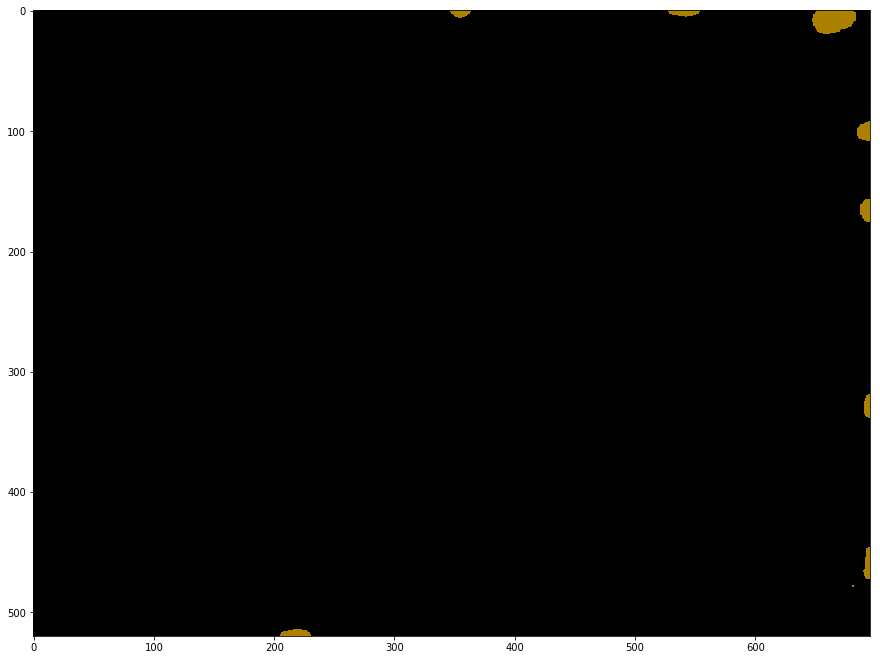

# nuclei gt 127
# nuclei CP 111
# matches 109
# overdetections 2
# underdetections 18
# mean IoU 0.770548


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A20_s4_w153DE191F-B112-471B-AC0A-FAD27990714B.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


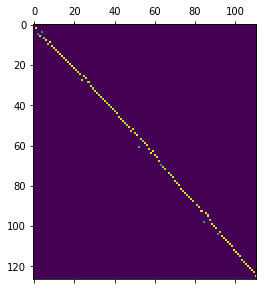

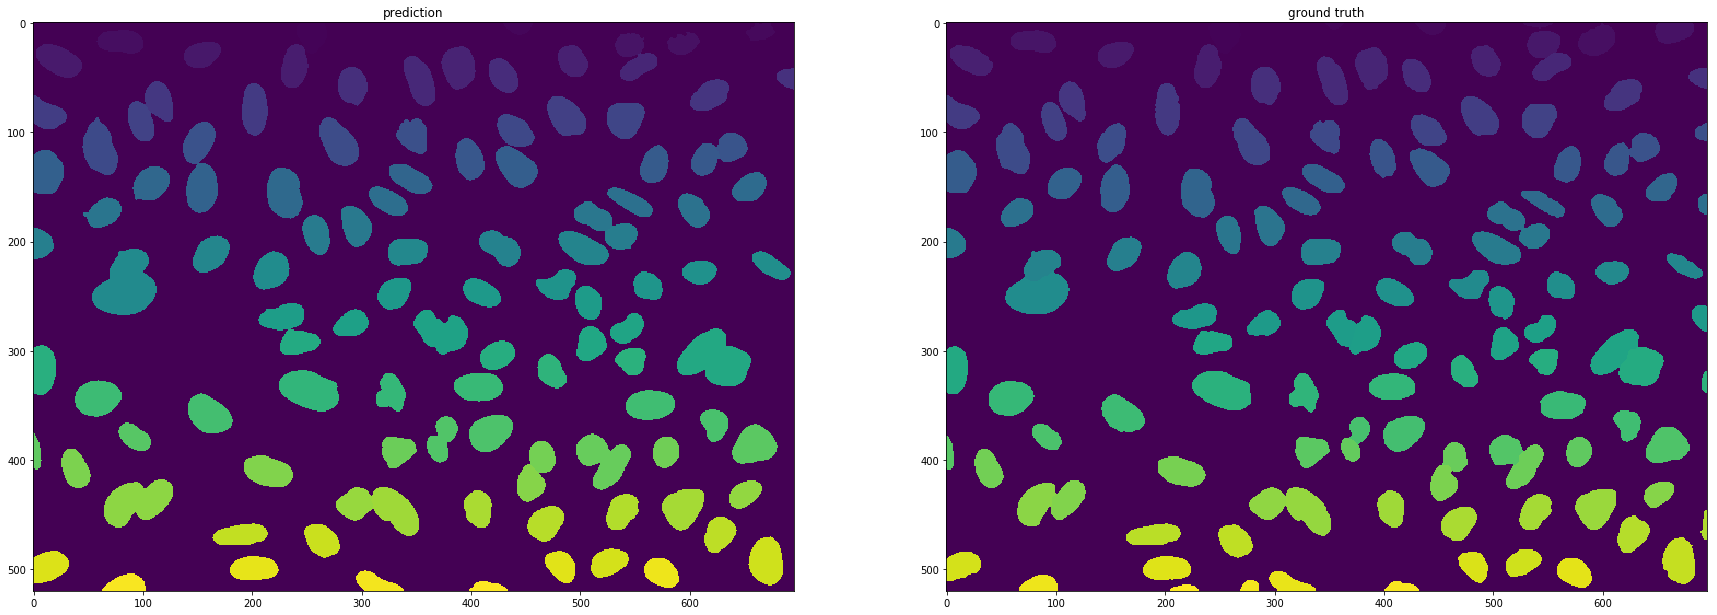

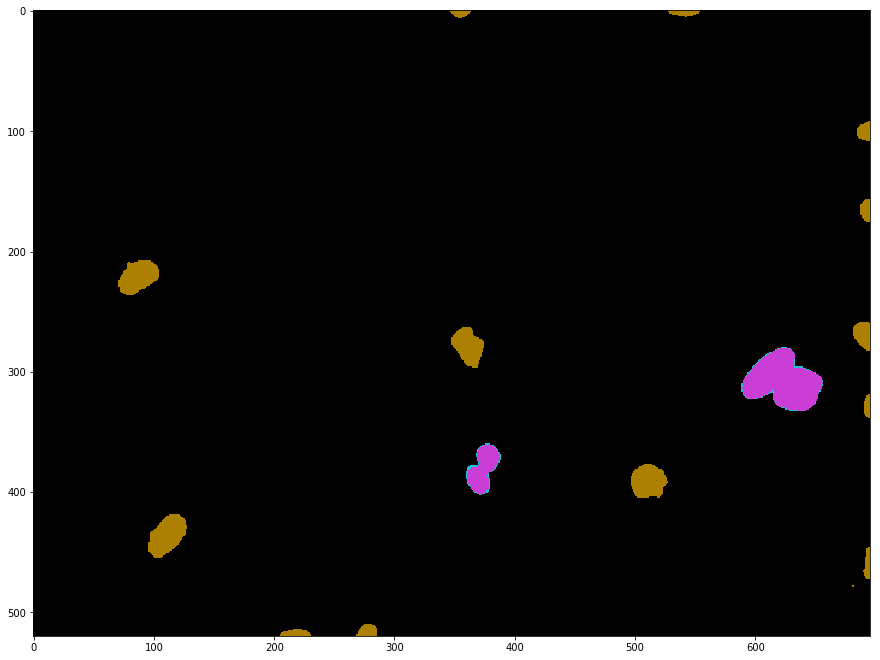

46 / 50
# nuclei gt 150
# nuclei DL 145
# matches 142
# overdetections 3
# underdetections 8
# mean IoU 0.702575


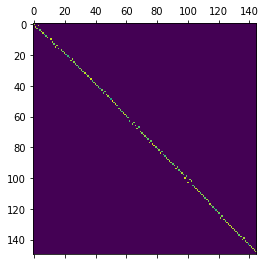

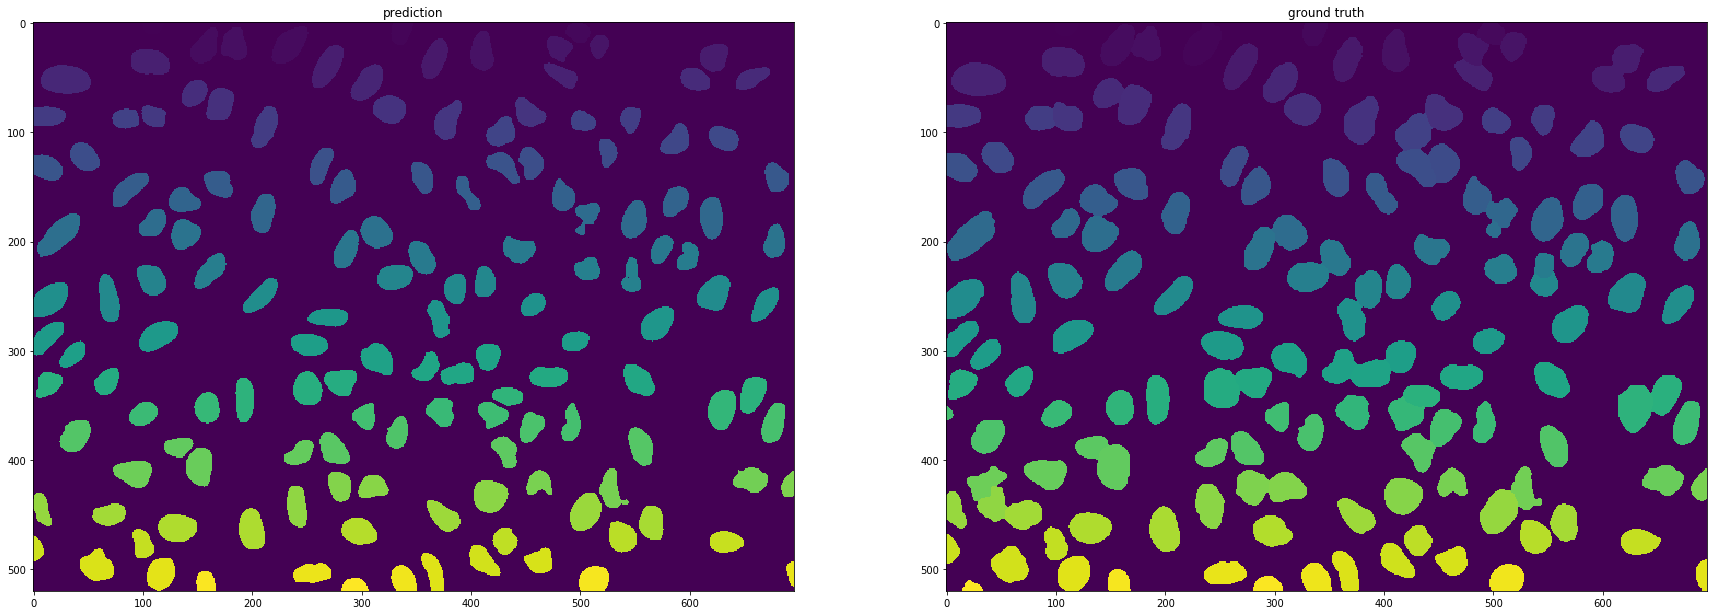

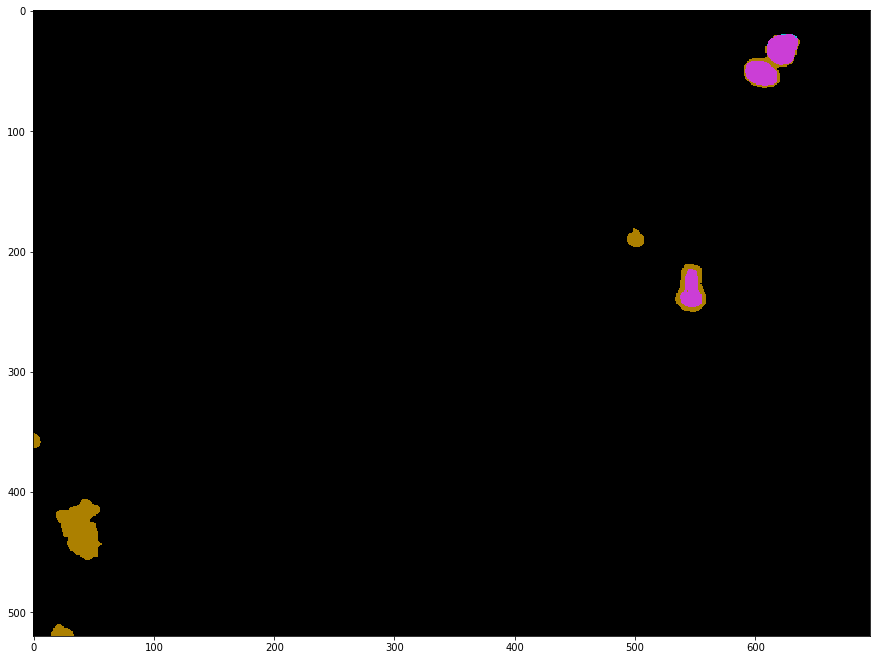

# nuclei gt 150
# nuclei CP 141
# matches 138
# overdetections 3
# underdetections 12
# mean IoU 0.824939


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


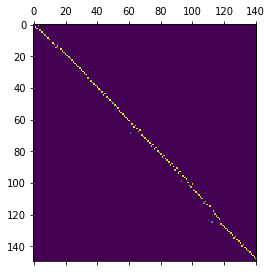

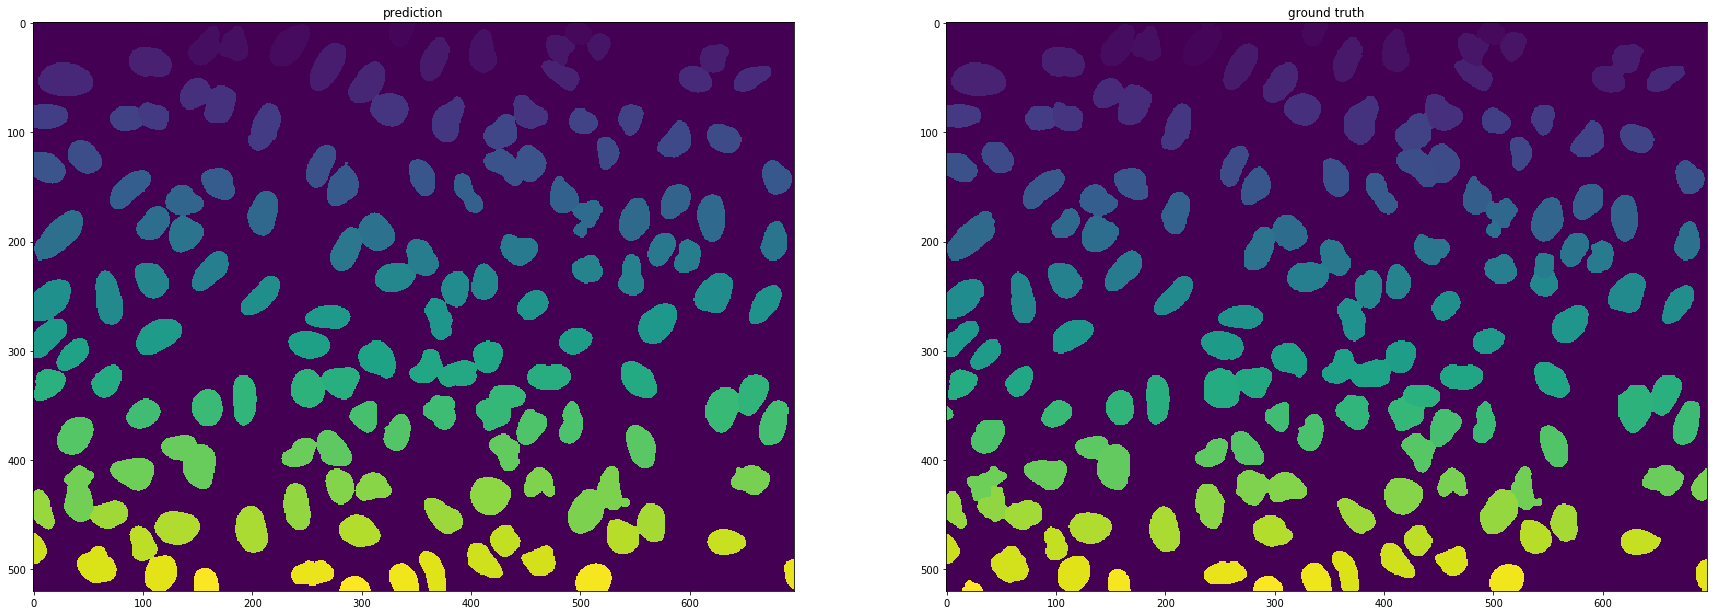

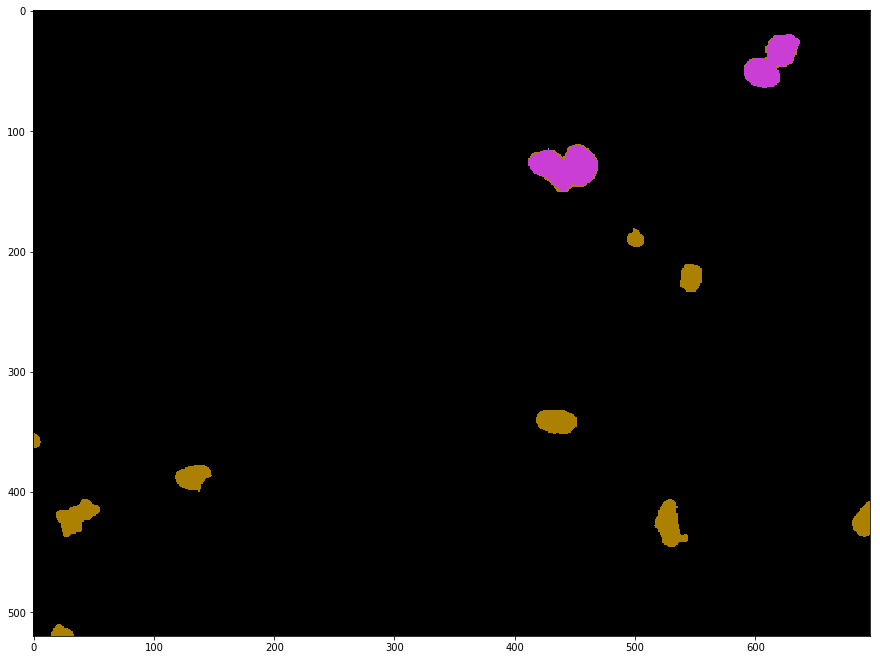

47 / 50
# nuclei gt 90
# nuclei DL 83
# matches 81
# overdetections 2
# underdetections 9
# mean IoU 0.685549


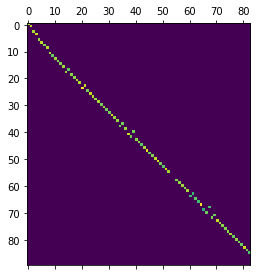

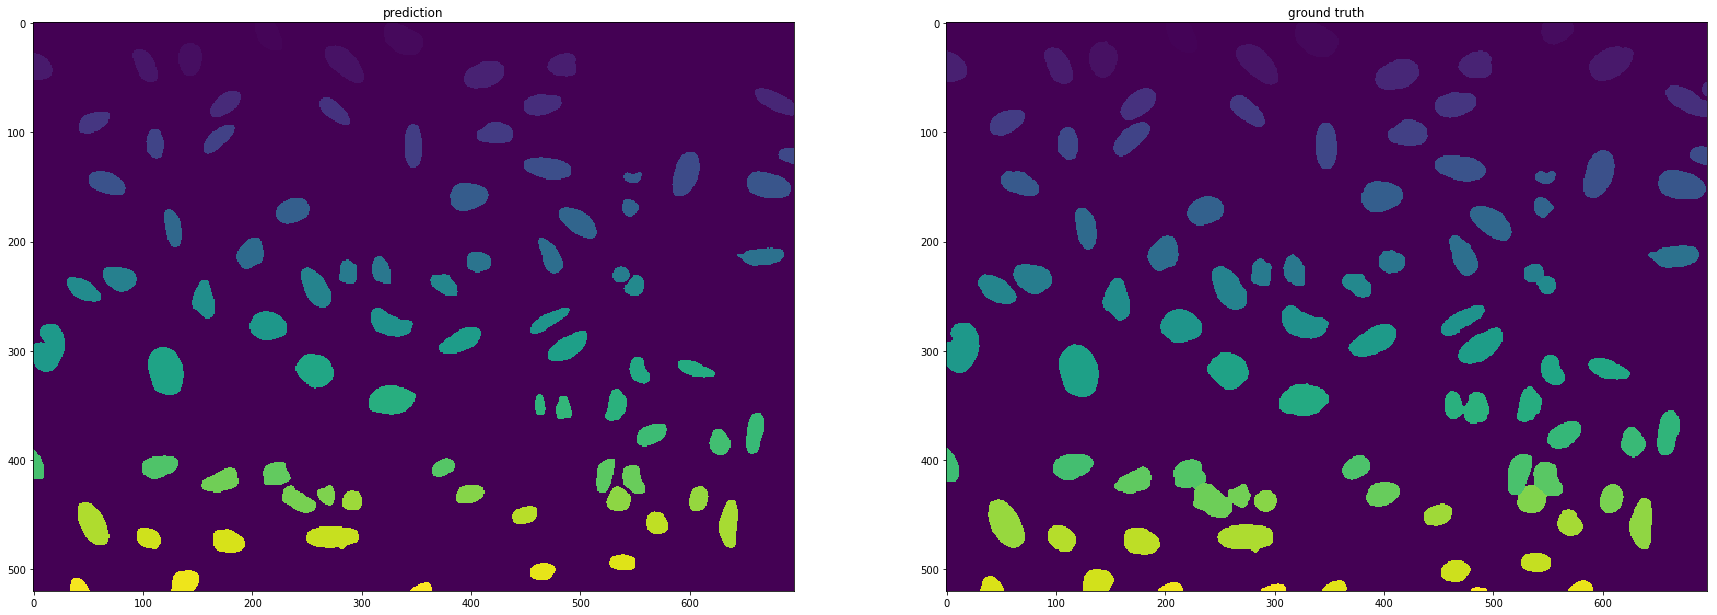

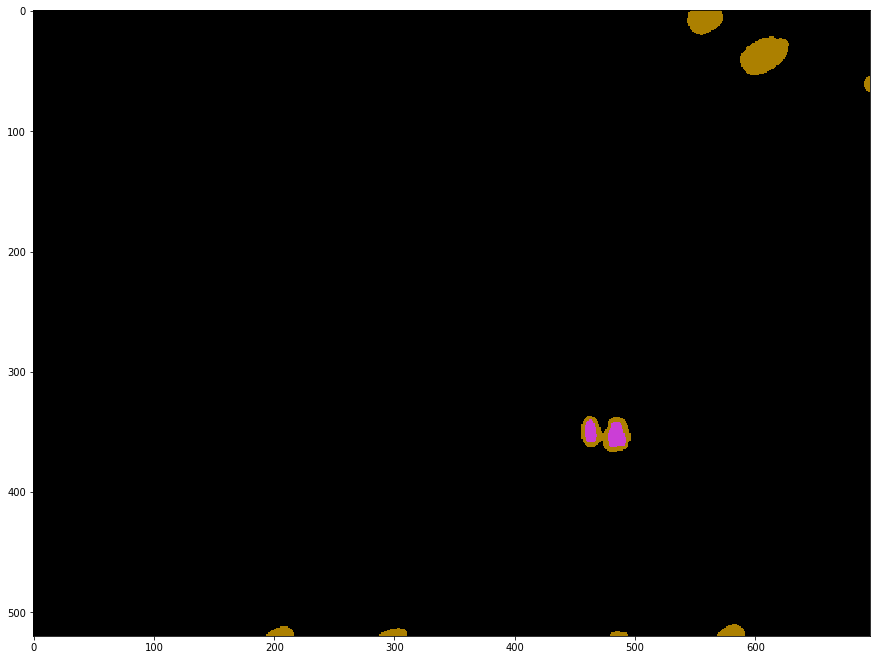

# nuclei gt 90
# nuclei CP 80
# matches 78
# overdetections 2
# underdetections 12
# mean IoU 0.751531


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


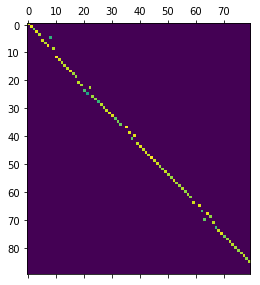

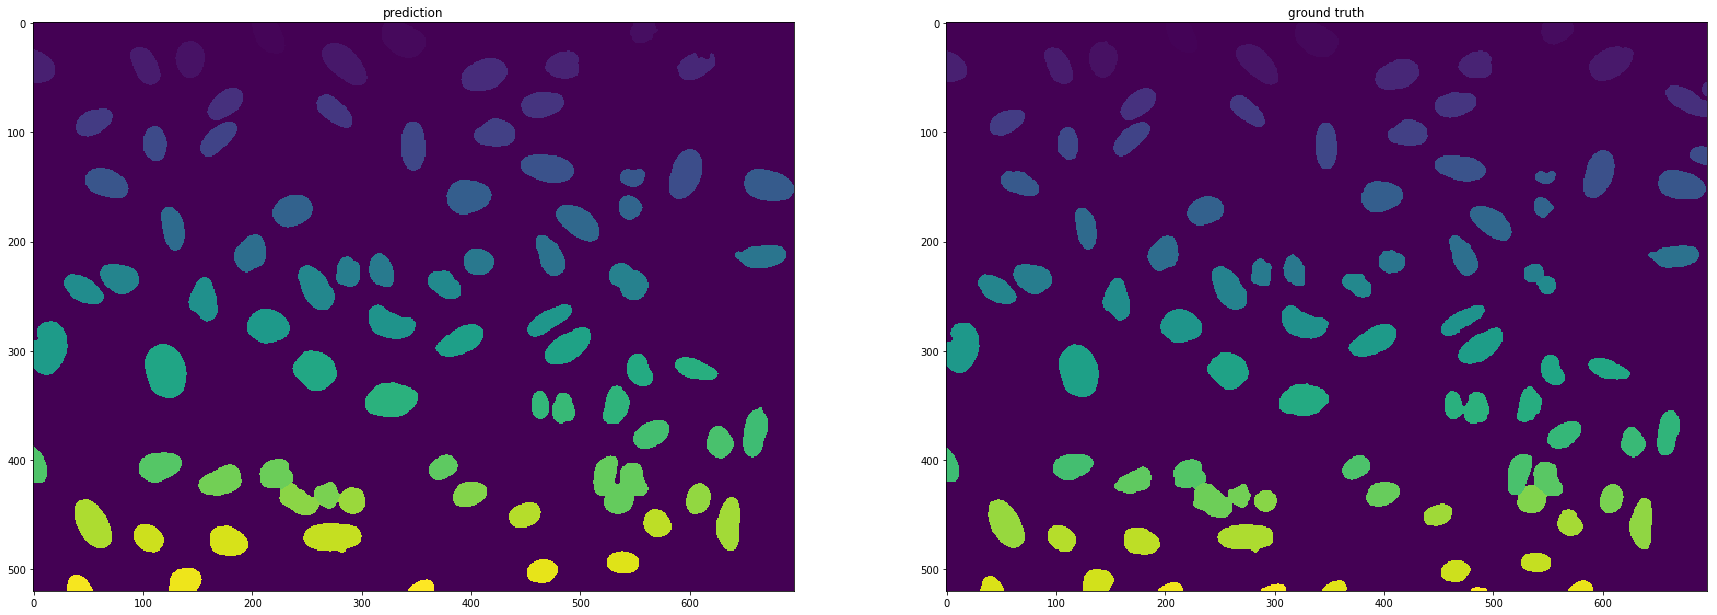

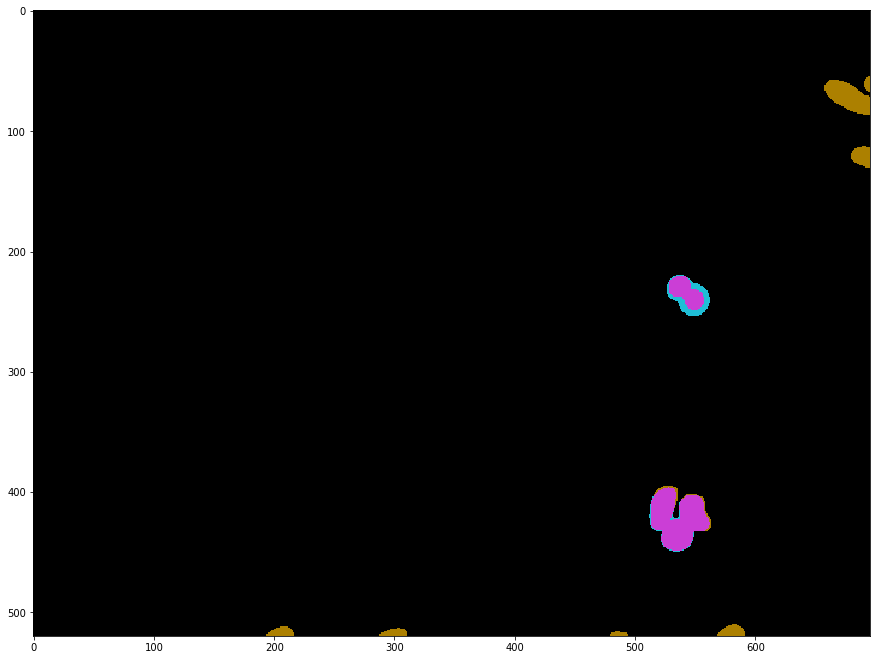

48 / 50
# nuclei gt 47
# nuclei DL 35
# matches 34
# overdetections 1
# underdetections 13
# mean IoU 0.602111


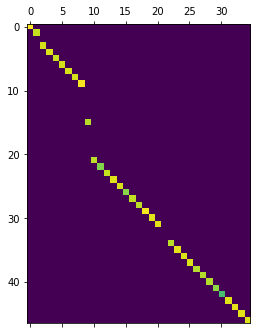

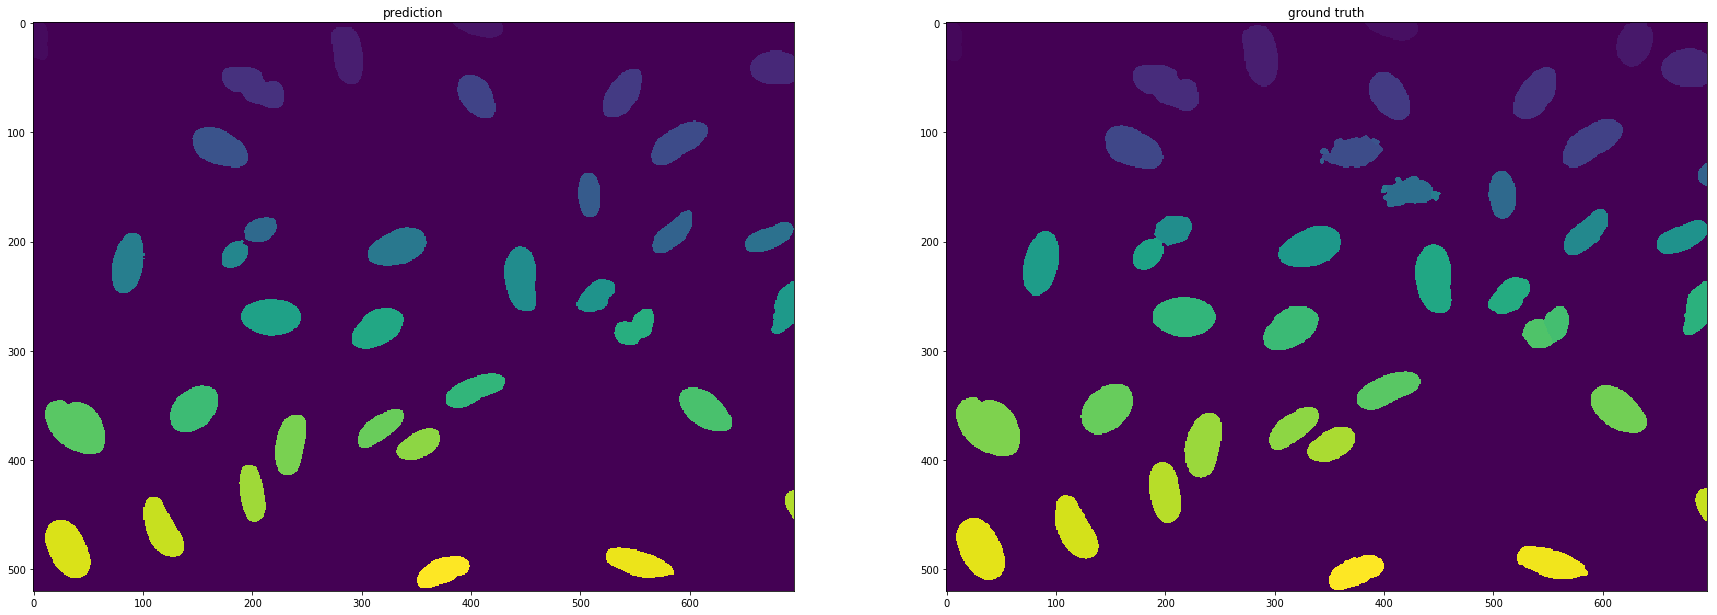

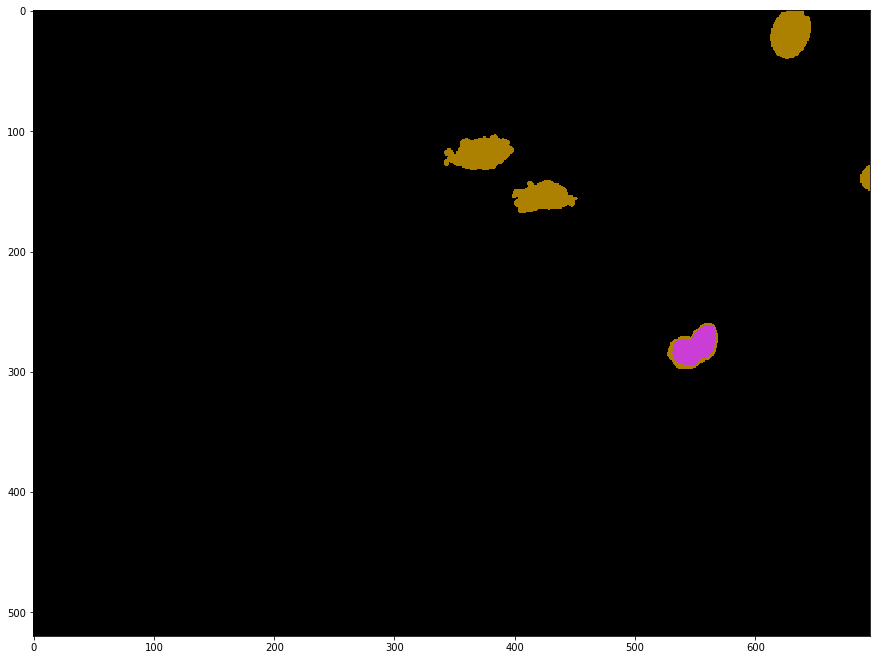

# nuclei gt 47
# nuclei CP 38
# matches 37
# overdetections 1
# underdetections 10
# mean IoU 0.714295


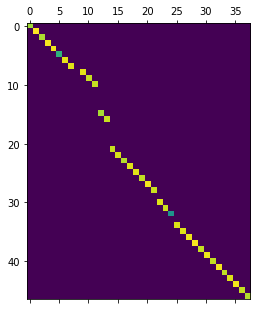

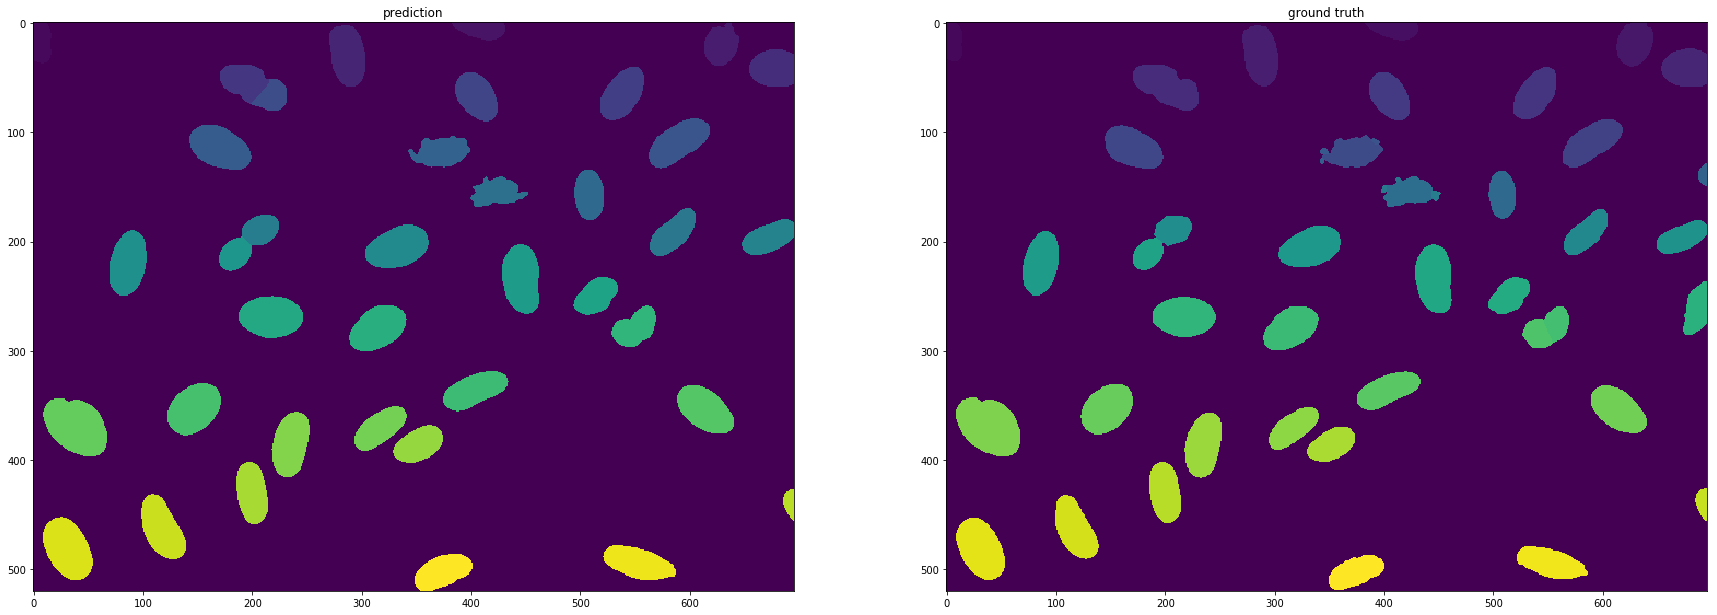

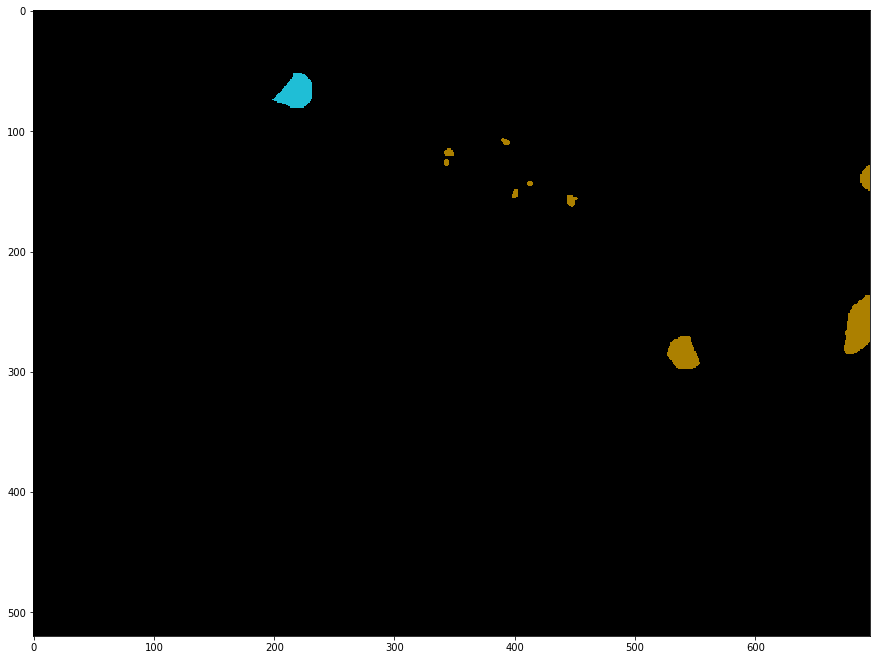

49 / 50
# nuclei gt 127
# nuclei DL 117
# matches 117
# overdetections 0
# underdetections 10
# mean IoU 0.712202


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_CP/IXMtest_C02_s4_w1661FF37C-AB9B-4038-BDF3-D21DFD2811BE.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


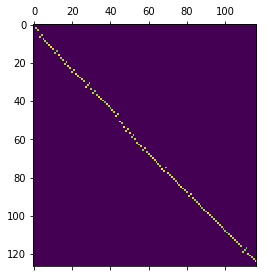

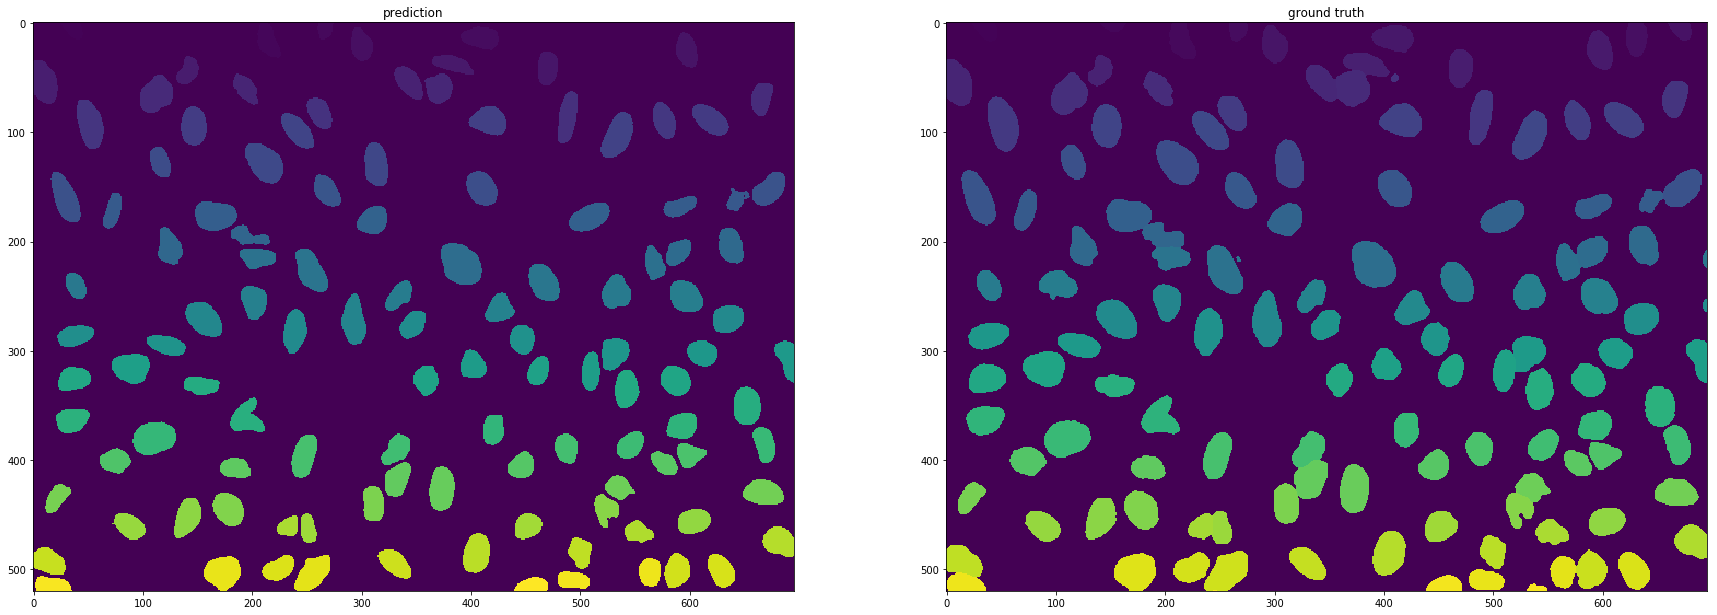

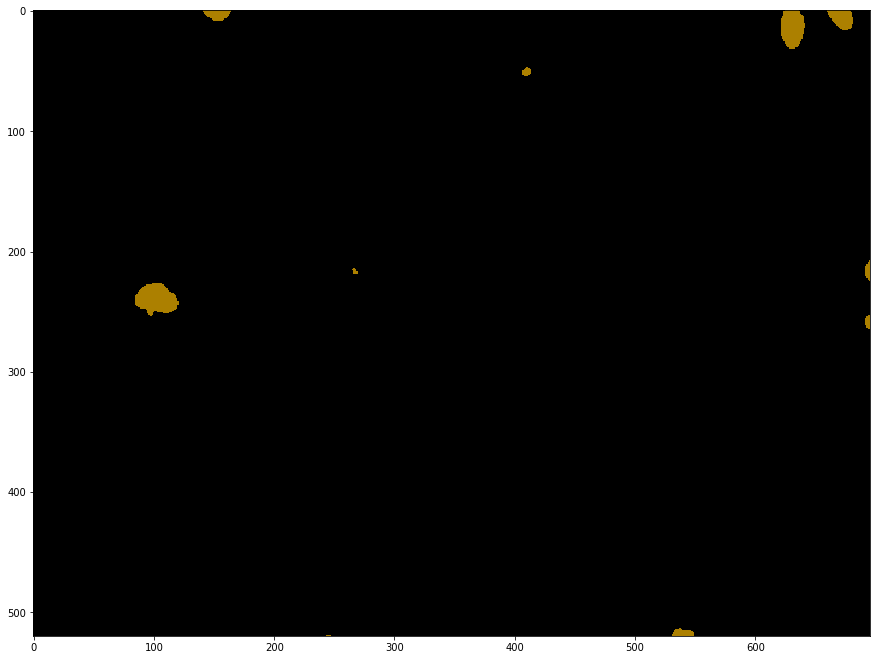

# nuclei gt 127
# nuclei CP 110
# matches 102
# overdetections 8
# underdetections 25
# mean IoU 0.733458


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_A15_s5_w1825174D4-ED30-490C-9635-6196417D6C9D.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


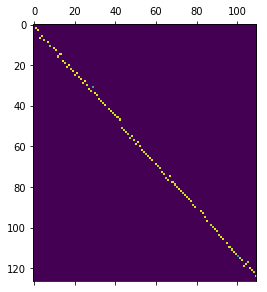

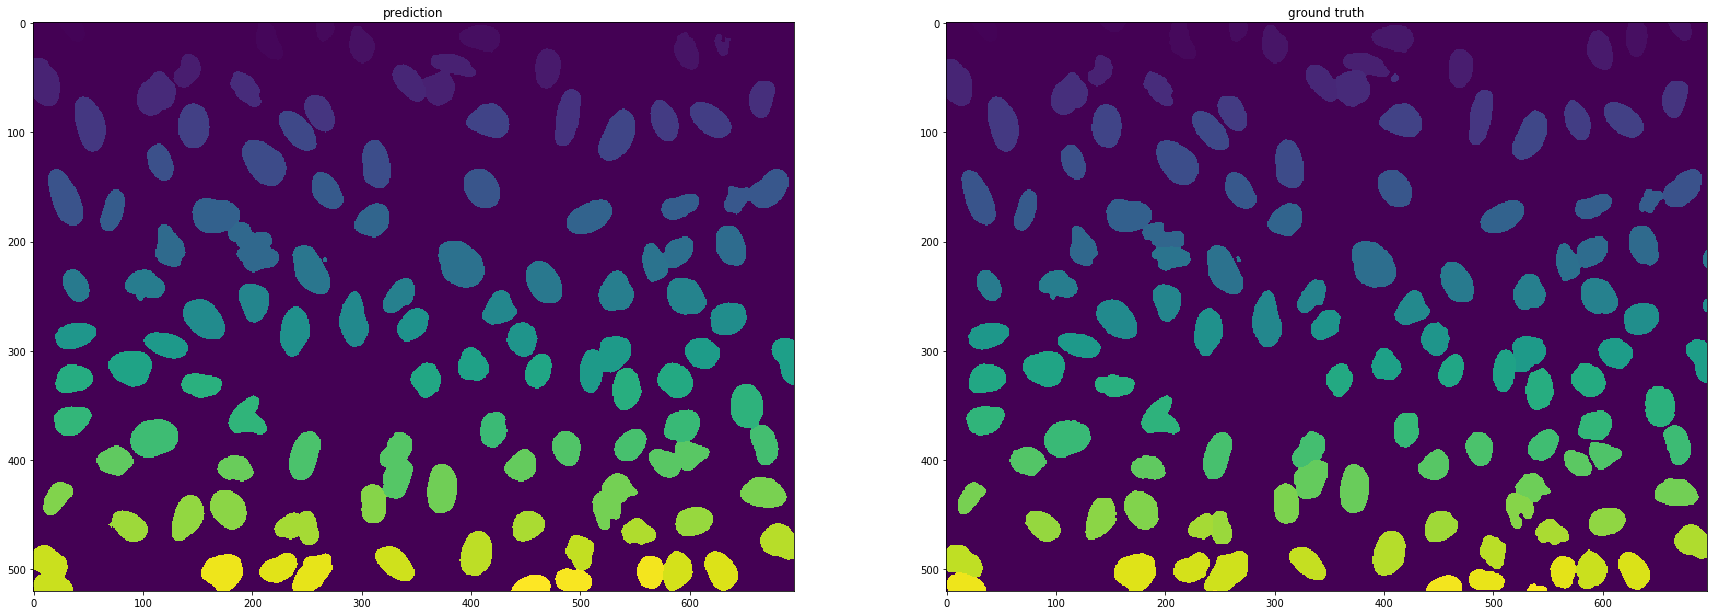

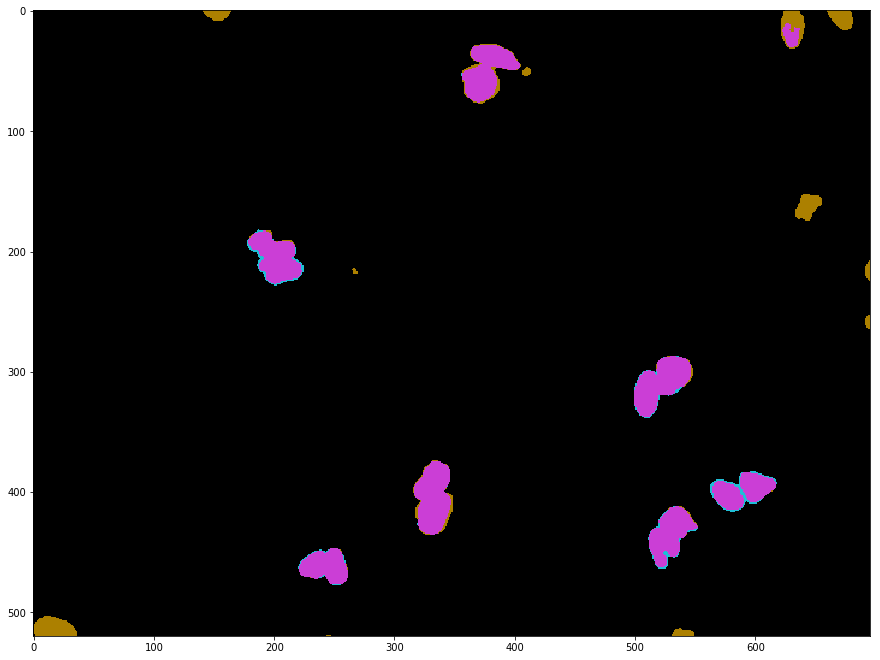

50 / 50
# nuclei gt 162
# nuclei DL 154
# matches 153
# overdetections 1
# underdetections 9
# mean IoU 0.729184


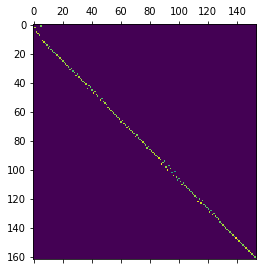

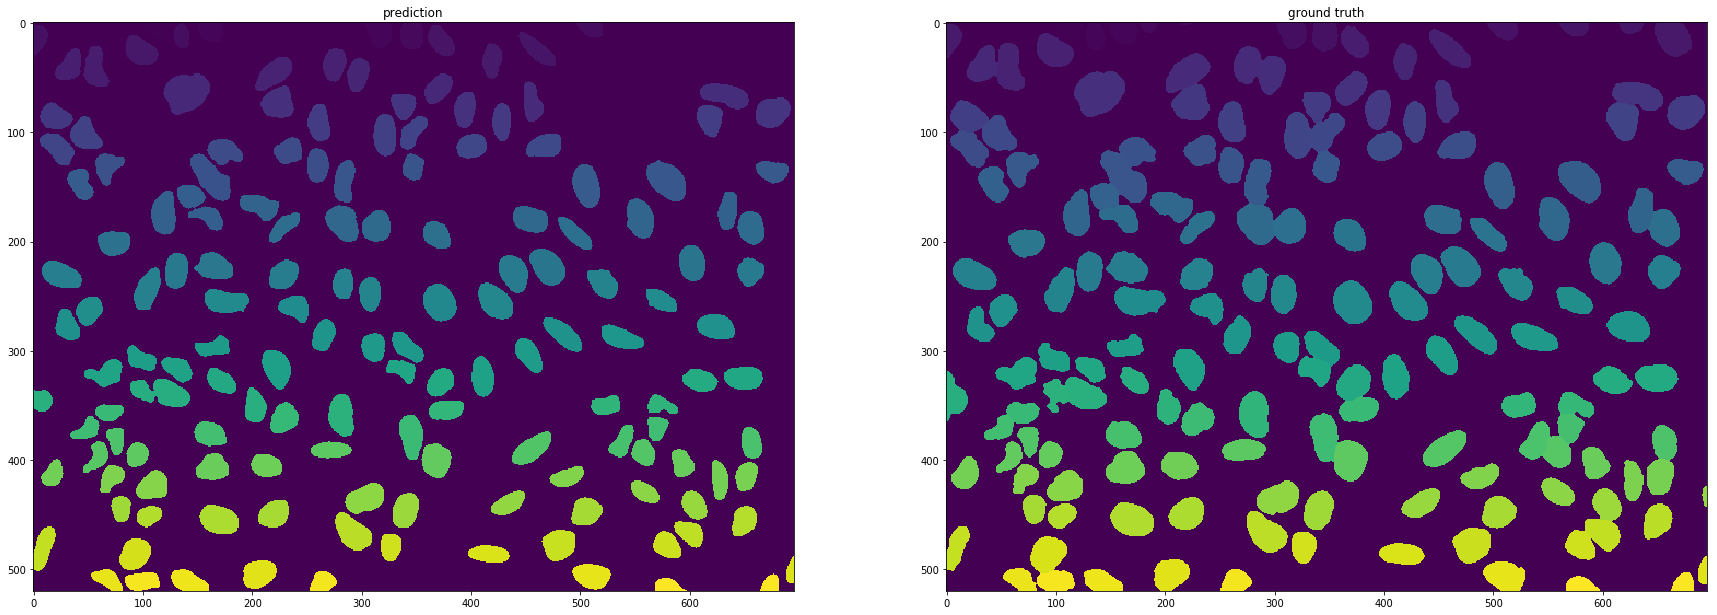

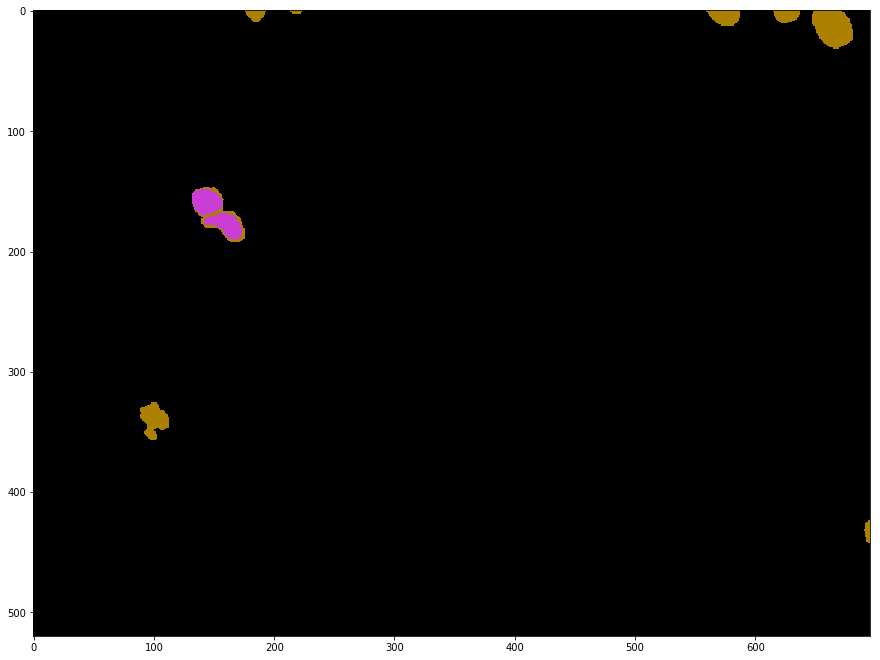

# nuclei gt 162
# nuclei CP 135
# matches 123
# overdetections 12
# underdetections 39
# mean IoU 0.670015


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/BBBC022_hand_200/err_img_DL/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.eps is a low contrast image
  warn('%s is a low contrast image' % fname)


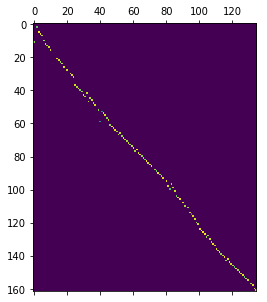

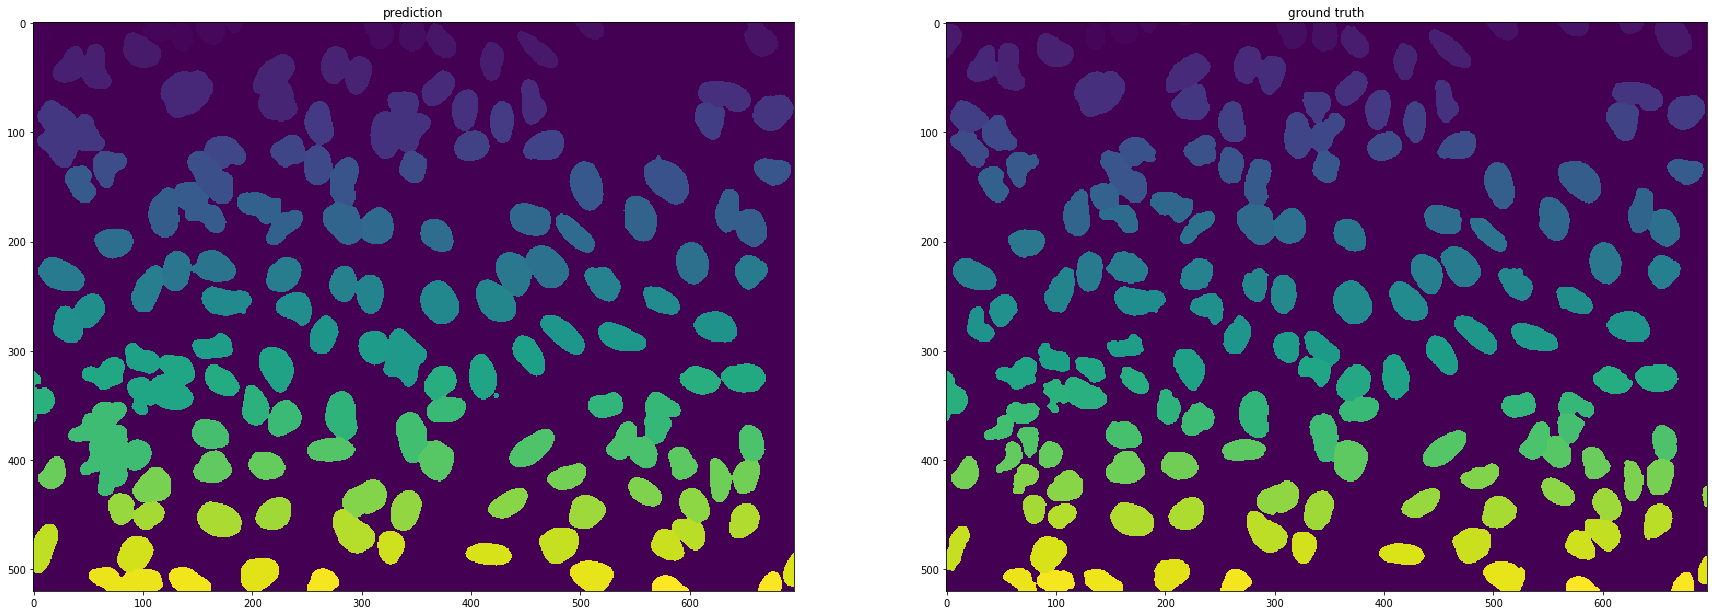

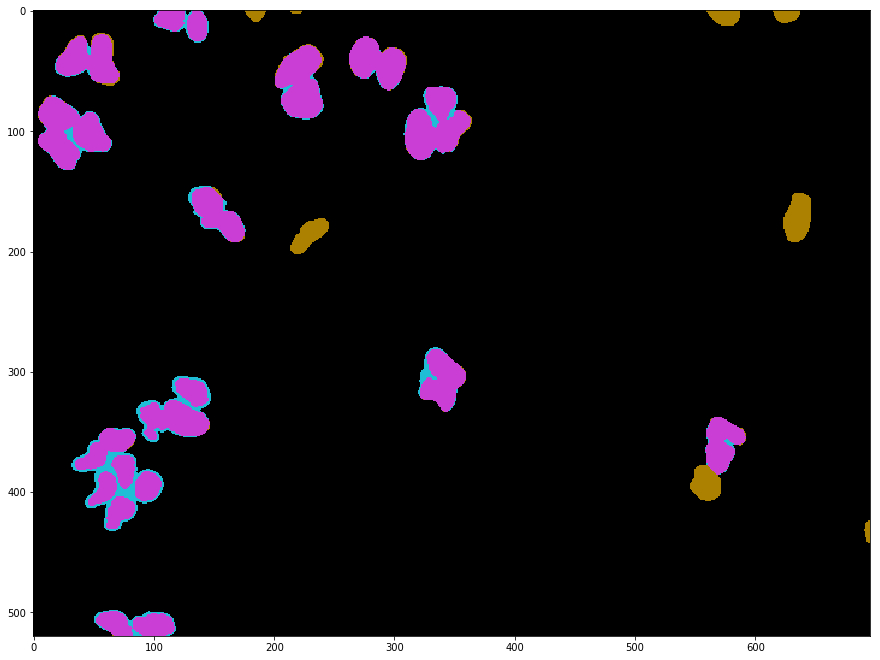

In [4]:
# visualize splits and merges for 5 images each
for i in range(len(all_gt_files)):
    
    # print progress
    print(i + 1, '/', len(all_gt_files))
    
    # get filename
    gt_filename = all_gt_files[i]
    filename_wo_ext = os.path.splitext(gt_filename)[0]
    
    # load error matrices
    mat_dl = np.load(mat_dl_dir + filename_wo_ext + '.npy')
    mat_cp = np.load(mat_cp_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename_wo_ext + '.png')
    seg_dl = skimage.io.imread(dl_data_dir + filename_wo_ext + '.png')
    seg_cp = skimage.io.imread(cp_data_dir + filename_wo_ext + '.png')
    
    # visualize only if matrices are full (no empty images and some detection)
    if(mat_dl.size != 0):
        visualize(mat_dl, seg_gt, seg_dl, 'DL', filename_wo_ext, err_img_out_dir_dl)
    if(mat_cp.size != 0):
        visualize(mat_cp, seg_gt, seg_cp, 'CP', filename_wo_ext, err_img_out_dir_cp)